In [1]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import math
import time
from math import sqrt
from sklearn.impute import KNNImputer
import seaborn as sns

# Importing Data

In [35]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_cv = pd.read_csv('X_cv.csv')
y_cv = pd.read_csv('y_cv.csv')
X_train_cv = pd.read_csv('X_train_cv.csv')
y_train_cv = pd.read_csv('y_train_cv.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

predict_feature = pd.read_csv('predict_feature.csv')

# Defining Functions

## LSTM Function

In [6]:
def run(batchSize, numEpochs, X, Y, pred_set, actual_set):
    #Reshaping
    trainX =np.array(X)
    X = trainX.reshape(X.shape[0], 1, X.shape[1])
    
    testX =np.array(pred_set)
    pred_set = testX.reshape(pred_set.shape[0], 1, pred_set.shape[1])
    
    #Building the LSTM Model
    lstm = Sequential()
    lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation="relu", return_sequences=False))
    lstm.add(Dense(1))
    lstm.compile(loss="mean_squared_error", optimizer="adam")
    plot_model(lstm, show_shapes=True, show_layer_names=True)

    ##################################################
    
    # Fitting the RNN to the Training set
    history = lstm.fit(X, Y, epochs=numEpochs, batch_size=batchSize, verbose=1, shuffle=False)
    predicted_Price = lstm.predict(pred_set)

    orig = actual_set

    rmse = sqrt(mean_squared_error(orig, predicted_Price))
    mape = get_mape(orig, predicted_Price)
    # Calculate RMSE
    print("RMSE on train set = %0.3f" % rmse)
    # Calculate MAPE
    print("MAPE on train set = %0.3f%%" % mape)

    return rmse, mape

## MAPE Function

In [5]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Model Tuning

## Tuning Epochs Parameter

In [7]:
# vary training batches
param_label = 'epochs'
param_list = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
error_rate = {param_label: [], 'rmse': [], 'mape': []}
default_batch_size = 32

for param in param_list:
    rmse, mape = run(default_batch_size, param, X_train, y_train, X_cv, y_cv)
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape'].append(mape)

error_rate = pd.DataFrame(error_rate)
error_rate

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


2022-04-24 23:43:50.921596: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/500
14/14 [==============================] - 1s 2ms/step - loss: 887548032.0000
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 887530752.0000
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 887507520.0000
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 887471360.0000
Epoch 5/500
14/14 [==============================] - 0s 1ms/step - loss: 887419904.0000
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 887352448.0000
Epoch 7/500
14/14 [==============================] - 0s 1ms/step - loss: 887269952.0000
Epoch 8/500
14/14 [==============================] - 0s 1ms/step - loss: 887174528.0000
Epoch 9/500
14/14 [==============================] - 0s 1ms/step - loss: 887068480.0000
Epoch 10/500
14/14 [==============================] - 0s 1ms/step - loss: 886953664.0000
Epoch 11/500
14/14 [==============================] - 0s 1ms/step - loss: 886831040.0000
Epoch 12/500
14/14 [==========

14/14 [==============================] - 0s 1ms/step - loss: 853857728.0000
Epoch 94/500
14/14 [==============================] - 0s 1ms/step - loss: 853213248.0000
Epoch 95/500
14/14 [==============================] - 0s 1ms/step - loss: 852563840.0000
Epoch 96/500
14/14 [==============================] - 0s 1ms/step - loss: 851909760.0000
Epoch 97/500
14/14 [==============================] - 0s 1ms/step - loss: 851250688.0000
Epoch 98/500
14/14 [==============================] - 0s 1ms/step - loss: 850586944.0000
Epoch 99/500
14/14 [==============================] - 0s 1ms/step - loss: 849918208.0000
Epoch 100/500
14/14 [==============================] - 0s 1ms/step - loss: 849244928.0000
Epoch 101/500
14/14 [==============================] - 0s 1ms/step - loss: 848566912.0000
Epoch 102/500
14/14 [==============================] - 0s 1ms/step - loss: 847884224.0000
Epoch 103/500
14/14 [==============================] - 0s 1ms/step - loss: 847196928.0000
Epoch 104/500
14/14 [=========

14/14 [==============================] - 0s 1ms/step - loss: 778844224.0000
Epoch 185/500
14/14 [==============================] - 0s 1ms/step - loss: 777874112.0000
Epoch 186/500
14/14 [==============================] - 0s 1ms/step - loss: 776901696.0000
Epoch 187/500
14/14 [==============================] - 0s 1ms/step - loss: 775926976.0000
Epoch 188/500
14/14 [==============================] - 0s 1ms/step - loss: 774949760.0000
Epoch 189/500
14/14 [==============================] - 0s 1ms/step - loss: 773970304.0000
Epoch 190/500
14/14 [==============================] - 0s 1ms/step - loss: 772988480.0000
Epoch 191/500
14/14 [==============================] - 0s 1ms/step - loss: 772004288.0000
Epoch 192/500
14/14 [==============================] - 0s 1ms/step - loss: 771017920.0000
Epoch 193/500
14/14 [==============================] - 0s 1ms/step - loss: 770029312.0000
Epoch 194/500
14/14 [==============================] - 0s 1ms/step - loss: 769038400.0000
Epoch 195/500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 683127296.0000
Epoch 276/500
14/14 [==============================] - 0s 1ms/step - loss: 682017280.0000
Epoch 277/500
14/14 [==============================] - 0s 1ms/step - loss: 680906304.0000
Epoch 278/500
14/14 [==============================] - 0s 1ms/step - loss: 679794688.0000
Epoch 279/500
14/14 [==============================] - 0s 1ms/step - loss: 678682368.0000
Epoch 280/500
14/14 [==============================] - 0s 1ms/step - loss: 677569344.0000
Epoch 281/500
14/14 [==============================] - 0s 1ms/step - loss: 676455488.0000
Epoch 282/500
14/14 [==============================] - 0s 1ms/step - loss: 675341184.0000
Epoch 283/500
14/14 [==============================] - 0s 1ms/step - loss: 674226112.0000
Epoch 284/500
14/14 [==============================] - 0s 1ms/step - loss: 673110400.0000
Epoch 285/500
14/14 [==============================] - 0s 1ms/step - loss: 671994048.0000
Epoch 286/500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 580776000.0000
Epoch 367/500
14/14 [==============================] - 0s 1ms/step - loss: 579655104.0000
Epoch 368/500
14/14 [==============================] - 0s 1ms/step - loss: 578534656.0000
Epoch 369/500
14/14 [==============================] - 0s 1ms/step - loss: 577414784.0000
Epoch 370/500
14/14 [==============================] - 0s 1ms/step - loss: 576295232.0000
Epoch 371/500
14/14 [==============================] - 0s 1ms/step - loss: 575176320.0000
Epoch 372/500
14/14 [==============================] - 0s 1ms/step - loss: 574057984.0000
Epoch 373/500
14/14 [==============================] - 0s 1ms/step - loss: 572940032.0000
Epoch 374/500
14/14 [==============================] - 0s 1ms/step - loss: 571822784.0000
Epoch 375/500
14/14 [==============================] - 0s 1ms/step - loss: 570705920.0000
Epoch 376/500
14/14 [==============================] - 0s 1ms/step - loss: 569589824.0000
Epoch 377/500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 482053824.0000
Epoch 458/500
14/14 [==============================] - 0s 1ms/step - loss: 481020064.0000
Epoch 459/500
14/14 [==============================] - 0s 1ms/step - loss: 479987776.0000
Epoch 460/500
14/14 [==============================] - 0s 1ms/step - loss: 478956832.0000
Epoch 461/500
14/14 [==============================] - 0s 1ms/step - loss: 477927296.0000
Epoch 462/500
14/14 [==============================] - 0s 1ms/step - loss: 476899232.0000
Epoch 463/500
14/14 [==============================] - 0s 1ms/step - loss: 475872576.0000
Epoch 464/500
14/14 [==============================] - 0s 1ms/step - loss: 474847392.0000
Epoch 465/500
14/14 [==============================] - 0s 1ms/step - loss: 473823616.0000
Epoch 466/500
14/14 [==============================] - 0s 1ms/step - loss: 472801344.0000
Epoch 467/500
14/14 [==============================] - 0s 1ms/step - loss: 471780544.0000
Epoch 468/500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 880857600.0000
Epoch 46/1000
14/14 [==============================] - 0s 1ms/step - loss: 880592640.0000
Epoch 47/1000
14/14 [==============================] - 0s 1ms/step - loss: 880322944.0000
Epoch 48/1000
14/14 [==============================] - 0s 1ms/step - loss: 880048512.0000
Epoch 49/1000
14/14 [==============================] - 0s 1ms/step - loss: 879769408.0000
Epoch 50/1000
14/14 [==============================] - 0s 1ms/step - loss: 879485568.0000
Epoch 51/1000
14/14 [==============================] - 0s 1ms/step - loss: 879197184.0000
Epoch 52/1000
14/14 [==============================] - 0s 1ms/step - loss: 878904128.0000
Epoch 53/1000
14/14 [==============================] - 0s 1ms/step - loss: 878606528.0000
Epoch 54/1000
14/14 [==============================] - 0s 1ms/step - loss: 878304256.0000
Epoch 55/1000
14/14 [==============================] - 0s 1ms/step - loss: 877997568.0000
Epoch 56/1000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 840657920.0000
Epoch 136/1000
14/14 [==============================] - 0s 1ms/step - loss: 840054592.0000
Epoch 137/1000
14/14 [==============================] - 0s 1ms/step - loss: 839448512.0000
Epoch 138/1000
14/14 [==============================] - 0s 1ms/step - loss: 838839552.0000
Epoch 139/1000
14/14 [==============================] - 0s 1ms/step - loss: 838227904.0000
Epoch 140/1000
14/14 [==============================] - 0s 1ms/step - loss: 837613312.0000
Epoch 141/1000
14/14 [==============================] - 0s 1ms/step - loss: 836995968.0000
Epoch 142/1000
14/14 [==============================] - 0s 1ms/step - loss: 836375872.0000
Epoch 143/1000
14/14 [==============================] - 0s 1ms/step - loss: 835753088.0000
Epoch 144/1000
14/14 [==============================] - 0s 1ms/step - loss: 835127552.0000
Epoch 145/1000
14/14 [==============================] - 0s 1ms/step - loss: 834499328.0000
Epoch 146/1000

14/14 [==============================] - 0s 1ms/step - loss: 776820672.0000
Epoch 226/1000
14/14 [==============================] - 0s 1ms/step - loss: 776022016.0000
Epoch 227/1000
14/14 [==============================] - 0s 1ms/step - loss: 775221760.0000
Epoch 228/1000
14/14 [==============================] - 0s 1ms/step - loss: 774419840.0000
Epoch 229/1000
14/14 [==============================] - 0s 1ms/step - loss: 773616576.0000
Epoch 230/1000
14/14 [==============================] - 0s 1ms/step - loss: 772811648.0000
Epoch 231/1000
14/14 [==============================] - 0s 1ms/step - loss: 772005184.0000
Epoch 232/1000
14/14 [==============================] - 0s 1ms/step - loss: 771197120.0000
Epoch 233/1000
14/14 [==============================] - 0s 1ms/step - loss: 770387648.0000
Epoch 234/1000
14/14 [==============================] - 0s 1ms/step - loss: 769576576.0000
Epoch 235/1000
14/14 [==============================] - 0s 1ms/step - loss: 768764096.0000
Epoch 236/1000

14/14 [==============================] - 0s 1ms/step - loss: 699827584.0000
Epoch 316/1000
14/14 [==============================] - 0s 2ms/step - loss: 698927232.0000
Epoch 317/1000
14/14 [==============================] - 0s 2ms/step - loss: 698026112.0000
Epoch 318/1000
14/14 [==============================] - 0s 1ms/step - loss: 697124288.0000
Epoch 319/1000
14/14 [==============================] - 0s 1ms/step - loss: 696221760.0000
Epoch 320/1000
14/14 [==============================] - 0s 1ms/step - loss: 695318656.0000
Epoch 321/1000
14/14 [==============================] - 0s 1ms/step - loss: 694414784.0000
Epoch 322/1000
14/14 [==============================] - 0s 1ms/step - loss: 693510208.0000
Epoch 323/1000
14/14 [==============================] - 0s 1ms/step - loss: 692605184.0000
Epoch 324/1000
14/14 [==============================] - 0s 1ms/step - loss: 691699328.0000
Epoch 325/1000
14/14 [==============================] - 0s 1ms/step - loss: 690792832.0000
Epoch 326/1000

14/14 [==============================] - 0s 1ms/step - loss: 616908224.0000
Epoch 406/1000
14/14 [==============================] - 0s 1ms/step - loss: 615976128.0000
Epoch 407/1000
14/14 [==============================] - 0s 1ms/step - loss: 615044032.0000
Epoch 408/1000
14/14 [==============================] - 0s 1ms/step - loss: 614111936.0000
Epoch 409/1000
14/14 [==============================] - 0s 1ms/step - loss: 613179840.0000
Epoch 410/1000
14/14 [==============================] - 0s 1ms/step - loss: 612247680.0000
Epoch 411/1000
14/14 [==============================] - 0s 1ms/step - loss: 611315712.0000
Epoch 412/1000
14/14 [==============================] - 0s 1ms/step - loss: 610383680.0000
Epoch 413/1000
14/14 [==============================] - 0s 1ms/step - loss: 609451712.0000
Epoch 414/1000
14/14 [==============================] - 0s 1ms/step - loss: 608519808.0000
Epoch 415/1000
14/14 [==============================] - 0s 1ms/step - loss: 607587904.0000
Epoch 416/1000

14/14 [==============================] - 0s 1ms/step - loss: 533809280.0000
Epoch 496/1000
14/14 [==============================] - 0s 1ms/step - loss: 532904064.0000
Epoch 497/1000
14/14 [==============================] - 0s 1ms/step - loss: 531999328.0000
Epoch 498/1000
14/14 [==============================] - 0s 1ms/step - loss: 531095264.0000
Epoch 499/1000
14/14 [==============================] - 0s 1ms/step - loss: 530191808.0000
Epoch 500/1000
14/14 [==============================] - 0s 1ms/step - loss: 529288960.0000
Epoch 501/1000
14/14 [==============================] - 0s 1ms/step - loss: 528386720.0000
Epoch 502/1000
14/14 [==============================] - 0s 1ms/step - loss: 527485152.0000
Epoch 503/1000
14/14 [==============================] - 0s 1ms/step - loss: 526584160.0000
Epoch 504/1000
14/14 [==============================] - 0s 1ms/step - loss: 525683808.0000
Epoch 505/1000
14/14 [==============================] - 0s 1ms/step - loss: 524784128.0000
Epoch 506/1000

14/14 [==============================] - 0s 1ms/step - loss: 455386016.0000
Epoch 586/1000
14/14 [==============================] - 0s 1ms/step - loss: 454556704.0000
Epoch 587/1000
14/14 [==============================] - 0s 1ms/step - loss: 453728448.0000
Epoch 588/1000
14/14 [==============================] - 0s 1ms/step - loss: 452901280.0000
Epoch 589/1000
14/14 [==============================] - 0s 1ms/step - loss: 452075200.0000
Epoch 590/1000
14/14 [==============================] - 0s 1ms/step - loss: 451250208.0000
Epoch 591/1000
14/14 [==============================] - 0s 1ms/step - loss: 450426336.0000
Epoch 592/1000
14/14 [==============================] - 0s 1ms/step - loss: 449603552.0000
Epoch 593/1000
14/14 [==============================] - 0s 1ms/step - loss: 448781824.0000
Epoch 594/1000
14/14 [==============================] - 0s 1ms/step - loss: 447961248.0000
Epoch 595/1000
14/14 [==============================] - 0s 1ms/step - loss: 447141792.0000
Epoch 596/1000

14/14 [==============================] - 0s 1ms/step - loss: 385560032.0000
Epoch 676/1000
14/14 [==============================] - 0s 1ms/step - loss: 384844000.0000
Epoch 677/1000
14/14 [==============================] - 0s 1ms/step - loss: 384129344.0000
Epoch 678/1000
14/14 [==============================] - 0s 1ms/step - loss: 383416192.0000
Epoch 679/1000
14/14 [==============================] - 0s 1ms/step - loss: 382704416.0000
Epoch 680/1000
14/14 [==============================] - 0s 1ms/step - loss: 381994048.0000
Epoch 681/1000
14/14 [==============================] - 0s 1ms/step - loss: 381285088.0000
Epoch 682/1000
14/14 [==============================] - 0s 1ms/step - loss: 380577568.0000
Epoch 683/1000
14/14 [==============================] - 0s 1ms/step - loss: 379871520.0000
Epoch 684/1000
14/14 [==============================] - 0s 1ms/step - loss: 379166880.0000
Epoch 685/1000
14/14 [==============================] - 0s 1ms/step - loss: 378463648.0000
Epoch 686/1000

14/14 [==============================] - 0s 1ms/step - loss: 325773664.0000
Epoch 766/1000
14/14 [==============================] - 0s 1ms/step - loss: 325066816.0000
Epoch 767/1000
14/14 [==============================] - 0s 1ms/step - loss: 324361632.0000
Epoch 768/1000
14/14 [==============================] - 0s 1ms/step - loss: 323658848.0000
Epoch 769/1000
14/14 [==============================] - 0s 1ms/step - loss: 322958816.0000
Epoch 770/1000
14/14 [==============================] - 0s 1ms/step - loss: 322261632.0000
Epoch 771/1000
14/14 [==============================] - 0s 1ms/step - loss: 321567328.0000
Epoch 772/1000
14/14 [==============================] - 0s 1ms/step - loss: 320875744.0000
Epoch 773/1000
14/14 [==============================] - 0s 1ms/step - loss: 320186816.0000
Epoch 774/1000
14/14 [==============================] - 0s 1ms/step - loss: 319500288.0000
Epoch 775/1000
14/14 [==============================] - 0s 1ms/step - loss: 318815968.0000
Epoch 776/1000

14/14 [==============================] - 0s 1ms/step - loss: 267190576.0000
Epoch 856/1000
14/14 [==============================] - 0s 1ms/step - loss: 266573520.0000
Epoch 857/1000
14/14 [==============================] - 0s 1ms/step - loss: 265957136.0000
Epoch 858/1000
14/14 [==============================] - 0s 1ms/step - loss: 265341360.0000
Epoch 859/1000
14/14 [==============================] - 0s 1ms/step - loss: 264726304.0000
Epoch 860/1000
14/14 [==============================] - 0s 1ms/step - loss: 264111888.0000
Epoch 861/1000
14/14 [==============================] - 0s 1ms/step - loss: 263498064.0000
Epoch 862/1000
14/14 [==============================] - 0s 1ms/step - loss: 262884928.0000
Epoch 863/1000
14/14 [==============================] - 0s 1ms/step - loss: 262272432.0000
Epoch 864/1000
14/14 [==============================] - 0s 1ms/step - loss: 261660608.0000
Epoch 865/1000
14/14 [==============================] - 0s 1ms/step - loss: 261049424.0000
Epoch 866/1000

14/14 [==============================] - 0s 1ms/step - loss: 214260160.0000
Epoch 946/1000
14/14 [==============================] - 0s 1ms/step - loss: 213701680.0000
Epoch 947/1000
14/14 [==============================] - 0s 1ms/step - loss: 213143904.0000
Epoch 948/1000
14/14 [==============================] - 0s 1ms/step - loss: 212586848.0000
Epoch 949/1000
14/14 [==============================] - 0s 1ms/step - loss: 212030384.0000
Epoch 950/1000
14/14 [==============================] - 0s 1ms/step - loss: 211474640.0000
Epoch 951/1000
14/14 [==============================] - 0s 1ms/step - loss: 210919536.0000
Epoch 952/1000
14/14 [==============================] - 0s 1ms/step - loss: 210365120.0000
Epoch 953/1000
14/14 [==============================] - 0s 1ms/step - loss: 209811360.0000
Epoch 954/1000
14/14 [==============================] - 0s 1ms/step - loss: 209258288.0000
Epoch 955/1000
14/14 [==============================] - 0s 1ms/step - loss: 208705872.0000
Epoch 956/1000

14/14 [==============================] - 0s 1ms/step - loss: 884061440.0000
Epoch 34/1500
14/14 [==============================] - 0s 1ms/step - loss: 883875776.0000
Epoch 35/1500
14/14 [==============================] - 0s 1ms/step - loss: 883685632.0000
Epoch 36/1500
14/14 [==============================] - 0s 1ms/step - loss: 883490944.0000
Epoch 37/1500
14/14 [==============================] - 0s 1ms/step - loss: 883292032.0000
Epoch 38/1500
14/14 [==============================] - 0s 1ms/step - loss: 883088640.0000
Epoch 39/1500
14/14 [==============================] - 0s 1ms/step - loss: 882881024.0000
Epoch 40/1500
14/14 [==============================] - 0s 1ms/step - loss: 882668928.0000
Epoch 41/1500
14/14 [==============================] - 0s 1ms/step - loss: 882452480.0000
Epoch 42/1500
14/14 [==============================] - 0s 1ms/step - loss: 882231616.0000
Epoch 43/1500
14/14 [==============================] - 0s 1ms/step - loss: 882006528.0000
Epoch 44/1500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 851652800.0000
Epoch 124/1500
14/14 [==============================] - 0s 1ms/step - loss: 851139968.0000
Epoch 125/1500
14/14 [==============================] - 0s 1ms/step - loss: 850624384.0000
Epoch 126/1500
14/14 [==============================] - 0s 1ms/step - loss: 850105856.0000
Epoch 127/1500
14/14 [==============================] - 0s 1ms/step - loss: 849584704.0000
Epoch 128/1500
14/14 [==============================] - 0s 1ms/step - loss: 849060736.0000
Epoch 129/1500
14/14 [==============================] - 0s 1ms/step - loss: 848534080.0000
Epoch 130/1500
14/14 [==============================] - 0s 1ms/step - loss: 848004672.0000
Epoch 131/1500
14/14 [==============================] - 0s 1ms/step - loss: 847472512.0000
Epoch 132/1500
14/14 [==============================] - 0s 1ms/step - loss: 846937728.0000
Epoch 133/1500
14/14 [==============================] - 0s 1ms/step - loss: 846400256.0000
Epoch 134/1500

14/14 [==============================] - 0s 1ms/step - loss: 795952064.0000
Epoch 214/1500
14/14 [==============================] - 0s 1ms/step - loss: 795242240.0000
Epoch 215/1500
14/14 [==============================] - 0s 1ms/step - loss: 794530688.0000
Epoch 216/1500
14/14 [==============================] - 0s 1ms/step - loss: 793817472.0000
Epoch 217/1500
14/14 [==============================] - 0s 1ms/step - loss: 793102656.0000
Epoch 218/1500
14/14 [==============================] - 0s 1ms/step - loss: 792386304.0000
Epoch 219/1500
14/14 [==============================] - 0s 1ms/step - loss: 791668224.0000
Epoch 220/1500
14/14 [==============================] - 0s 1ms/step - loss: 790948544.0000
Epoch 221/1500
14/14 [==============================] - 0s 1ms/step - loss: 790227392.0000
Epoch 222/1500
14/14 [==============================] - 0s 1ms/step - loss: 789504576.0000
Epoch 223/1500
14/14 [==============================] - 0s 1ms/step - loss: 788780224.0000
Epoch 224/1500

14/14 [==============================] - 0s 1ms/step - loss: 726543104.0000
Epoch 304/1500
14/14 [==============================] - 0s 1ms/step - loss: 725720896.0000
Epoch 305/1500
14/14 [==============================] - 0s 1ms/step - loss: 724897856.0000
Epoch 306/1500
14/14 [==============================] - 0s 1ms/step - loss: 724073920.0000
Epoch 307/1500
14/14 [==============================] - 0s 1ms/step - loss: 723249024.0000
Epoch 308/1500
14/14 [==============================] - 0s 1ms/step - loss: 722423360.0000
Epoch 309/1500
14/14 [==============================] - 0s 1ms/step - loss: 721596864.0000
Epoch 310/1500
14/14 [==============================] - 0s 1ms/step - loss: 720769536.0000
Epoch 311/1500
14/14 [==============================] - 0s 1ms/step - loss: 719941376.0000
Epoch 312/1500
14/14 [==============================] - 0s 1ms/step - loss: 719112384.0000
Epoch 313/1500
14/14 [==============================] - 0s 1ms/step - loss: 718282560.0000
Epoch 314/1500

14/14 [==============================] - 0s 1ms/step - loss: 649876288.0000
Epoch 394/1500
14/14 [==============================] - 0s 1ms/step - loss: 649003456.0000
Epoch 395/1500
14/14 [==============================] - 0s 1ms/step - loss: 648130368.0000
Epoch 396/1500
14/14 [==============================] - 0s 1ms/step - loss: 647257088.0000
Epoch 397/1500
14/14 [==============================] - 0s 1ms/step - loss: 646383552.0000
Epoch 398/1500
14/14 [==============================] - 0s 1ms/step - loss: 645509696.0000
Epoch 399/1500
14/14 [==============================] - 0s 1ms/step - loss: 644635776.0000
Epoch 400/1500
14/14 [==============================] - 0s 1ms/step - loss: 643761408.0000
Epoch 401/1500
14/14 [==============================] - 0s 1ms/step - loss: 642886912.0000
Epoch 402/1500
14/14 [==============================] - 0s 1ms/step - loss: 642012224.0000
Epoch 403/1500
14/14 [==============================] - 0s 1ms/step - loss: 641137344.0000
Epoch 404/1500

14/14 [==============================] - 0s 1ms/step - loss: 571012800.0000
Epoch 484/1500
14/14 [==============================] - 0s 1ms/step - loss: 570141248.0000
Epoch 485/1500
14/14 [==============================] - 0s 1ms/step - loss: 569269888.0000
Epoch 486/1500
14/14 [==============================] - 0s 1ms/step - loss: 568398784.0000
Epoch 487/1500
14/14 [==============================] - 0s 1ms/step - loss: 567528064.0000
Epoch 488/1500
14/14 [==============================] - 0s 1ms/step - loss: 566657536.0000
Epoch 489/1500
14/14 [==============================] - 0s 1ms/step - loss: 565787392.0000
Epoch 490/1500
14/14 [==============================] - 0s 1ms/step - loss: 564917504.0000
Epoch 491/1500
14/14 [==============================] - 0s 1ms/step - loss: 564048000.0000
Epoch 492/1500
14/14 [==============================] - 0s 1ms/step - loss: 563178752.0000
Epoch 493/1500
14/14 [==============================] - 0s 1ms/step - loss: 562309888.0000
Epoch 494/1500

14/14 [==============================] - 0s 1ms/step - loss: 494317536.0000
Epoch 574/1500
14/14 [==============================] - 0s 1ms/step - loss: 493492256.0000
Epoch 575/1500
14/14 [==============================] - 0s 1ms/step - loss: 492667776.0000
Epoch 576/1500
14/14 [==============================] - 0s 1ms/step - loss: 491844000.0000
Epoch 577/1500
14/14 [==============================] - 0s 1ms/step - loss: 491020992.0000
Epoch 578/1500
14/14 [==============================] - 0s 1ms/step - loss: 490198720.0000
Epoch 579/1500
14/14 [==============================] - 0s 1ms/step - loss: 489377248.0000
Epoch 580/1500
14/14 [==============================] - 0s 1ms/step - loss: 488556480.0000
Epoch 581/1500
14/14 [==============================] - 0s 1ms/step - loss: 487736544.0000
Epoch 582/1500
14/14 [==============================] - 0s 1ms/step - loss: 486917344.0000
Epoch 583/1500
14/14 [==============================] - 0s 1ms/step - loss: 486098976.0000
Epoch 584/1500

14/14 [==============================] - 0s 1ms/step - loss: 423528576.0000
Epoch 664/1500
14/14 [==============================] - 0s 1ms/step - loss: 422787168.0000
Epoch 665/1500
14/14 [==============================] - 0s 1ms/step - loss: 422046816.0000
Epoch 666/1500
14/14 [==============================] - 0s 1ms/step - loss: 421307552.0000
Epoch 667/1500
14/14 [==============================] - 0s 1ms/step - loss: 420569440.0000
Epoch 668/1500
14/14 [==============================] - 0s 1ms/step - loss: 419832416.0000
Epoch 669/1500
14/14 [==============================] - 0s 1ms/step - loss: 419096512.0000
Epoch 670/1500
14/14 [==============================] - 0s 1ms/step - loss: 418361792.0000
Epoch 671/1500
14/14 [==============================] - 0s 1ms/step - loss: 417628128.0000
Epoch 672/1500
14/14 [==============================] - 0s 2ms/step - loss: 416895584.0000
Epoch 673/1500
14/14 [==============================] - 0s 1ms/step - loss: 416164224.0000
Epoch 674/1500

14/14 [==============================] - 0s 1ms/step - loss: 361570240.0000
Epoch 754/1500
14/14 [==============================] - 0s 1ms/step - loss: 360939520.0000
Epoch 755/1500
14/14 [==============================] - 0s 1ms/step - loss: 360310144.0000
Epoch 756/1500
14/14 [==============================] - 0s 1ms/step - loss: 359682080.0000
Epoch 757/1500
14/14 [==============================] - 0s 1ms/step - loss: 359055392.0000
Epoch 758/1500
14/14 [==============================] - 0s 1ms/step - loss: 358430016.0000
Epoch 759/1500
14/14 [==============================] - 0s 1ms/step - loss: 357805952.0000
Epoch 760/1500
14/14 [==============================] - 0s 1ms/step - loss: 357183264.0000
Epoch 761/1500
14/14 [==============================] - 0s 1ms/step - loss: 356561856.0000
Epoch 762/1500
14/14 [==============================] - 0s 1ms/step - loss: 355941824.0000
Epoch 763/1500
14/14 [==============================] - 0s 1ms/step - loss: 355323168.0000
Epoch 764/1500

14/14 [==============================] - 0s 1ms/step - loss: 305142592.0000
Epoch 844/1500
14/14 [==============================] - 0s 1ms/step - loss: 304519360.0000
Epoch 845/1500
14/14 [==============================] - 0s 1ms/step - loss: 303896768.0000
Epoch 846/1500
14/14 [==============================] - 0s 2ms/step - loss: 303274880.0000
Epoch 847/1500
14/14 [==============================] - 0s 1ms/step - loss: 302653664.0000
Epoch 848/1500
14/14 [==============================] - 0s 1ms/step - loss: 302033056.0000
Epoch 849/1500
14/14 [==============================] - 0s 1ms/step - loss: 301413120.0000
Epoch 850/1500
14/14 [==============================] - 0s 1ms/step - loss: 300793856.0000
Epoch 851/1500
14/14 [==============================] - 0s 2ms/step - loss: 300175232.0000
Epoch 852/1500
14/14 [==============================] - 0s 1ms/step - loss: 299557248.0000
Epoch 853/1500
14/14 [==============================] - 0s 1ms/step - loss: 298939904.0000
Epoch 854/1500

14/14 [==============================] - 0s 1ms/step - loss: 251436704.0000
Epoch 934/1500
14/14 [==============================] - 0s 1ms/step - loss: 250865408.0000
Epoch 935/1500
14/14 [==============================] - 0s 1ms/step - loss: 250294656.0000
Epoch 936/1500
14/14 [==============================] - 0s 1ms/step - loss: 249724480.0000
Epoch 937/1500
14/14 [==============================] - 0s 1ms/step - loss: 249154800.0000
Epoch 938/1500
14/14 [==============================] - 0s 1ms/step - loss: 248585664.0000
Epoch 939/1500
14/14 [==============================] - 0s 1ms/step - loss: 248017088.0000
Epoch 940/1500
14/14 [==============================] - 0s 1ms/step - loss: 247449040.0000
Epoch 941/1500
14/14 [==============================] - 0s 1ms/step - loss: 246881488.0000
Epoch 942/1500
14/14 [==============================] - 0s 1ms/step - loss: 246314512.0000
Epoch 943/1500
14/14 [==============================] - 0s 1ms/step - loss: 245748096.0000
Epoch 944/1500

Epoch 1023/1500
14/14 [==============================] - 0s 1ms/step - loss: 202258448.0000
Epoch 1024/1500
14/14 [==============================] - 0s 1ms/step - loss: 201739280.0000
Epoch 1025/1500
14/14 [==============================] - 0s 1ms/step - loss: 201220752.0000
Epoch 1026/1500
14/14 [==============================] - 0s 1ms/step - loss: 200702864.0000
Epoch 1027/1500
14/14 [==============================] - 0s 2ms/step - loss: 200185680.0000
Epoch 1028/1500
14/14 [==============================] - 0s 1ms/step - loss: 199669120.0000
Epoch 1029/1500
14/14 [==============================] - 0s 1ms/step - loss: 199153200.0000
Epoch 1030/1500
14/14 [==============================] - 0s 1ms/step - loss: 198637984.0000
Epoch 1031/1500
14/14 [==============================] - 0s 1ms/step - loss: 198123392.0000
Epoch 1032/1500
14/14 [==============================] - 0s 1ms/step - loss: 197609440.0000
Epoch 1033/1500
14/14 [==============================] - 0s 1ms/step - loss: 197

14/14 [==============================] - 0s 1ms/step - loss: 158784576.0000
Epoch 1113/1500
14/14 [==============================] - 0s 1ms/step - loss: 158329536.0000
Epoch 1114/1500
14/14 [==============================] - 0s 1ms/step - loss: 157875248.0000
Epoch 1115/1500
14/14 [==============================] - 0s 1ms/step - loss: 157421760.0000
Epoch 1116/1500
14/14 [==============================] - 0s 1ms/step - loss: 156969056.0000
Epoch 1117/1500
14/14 [==============================] - 0s 1ms/step - loss: 156517184.0000
Epoch 1118/1500
14/14 [==============================] - 0s 1ms/step - loss: 156066048.0000
Epoch 1119/1500
14/14 [==============================] - 0s 1ms/step - loss: 155615744.0000
Epoch 1120/1500
14/14 [==============================] - 0s 1ms/step - loss: 155166240.0000
Epoch 1121/1500
14/14 [==============================] - 0s 1ms/step - loss: 154717488.0000
Epoch 1122/1500
14/14 [==============================] - 0s 1ms/step - loss: 154269552.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 121477448.0000
Epoch 1202/1500
14/14 [==============================] - 0s 2ms/step - loss: 121096144.0000
Epoch 1203/1500
14/14 [==============================] - 0s 2ms/step - loss: 120715728.0000
Epoch 1204/1500
14/14 [==============================] - 0s 1ms/step - loss: 120336168.0000
Epoch 1205/1500
14/14 [==============================] - 0s 1ms/step - loss: 119957432.0000
Epoch 1206/1500
14/14 [==============================] - 0s 1ms/step - loss: 119579624.0000
Epoch 1207/1500
14/14 [==============================] - 0s 1ms/step - loss: 119202648.0000
Epoch 1208/1500
14/14 [==============================] - 0s 1ms/step - loss: 118826544.0000
Epoch 1209/1500
14/14 [==============================] - 0s 1ms/step - loss: 118451288.0000
Epoch 1210/1500
14/14 [==============================] - 0s 1ms/step - loss: 118076928.0000
Epoch 1211/1500
14/14 [==============================] - 0s 1ms/step - loss: 117703440.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 90972704.0000
Epoch 1291/1500
14/14 [==============================] - 0s 1ms/step - loss: 90669656.0000
Epoch 1292/1500
14/14 [==============================] - 0s 1ms/step - loss: 90367544.0000
Epoch 1293/1500
14/14 [==============================] - 0s 1ms/step - loss: 90066256.0000
Epoch 1294/1500
14/14 [==============================] - 0s 1ms/step - loss: 89765880.0000
Epoch 1295/1500
14/14 [==============================] - 0s 1ms/step - loss: 89466376.0000
Epoch 1296/1500
14/14 [==============================] - 0s 1ms/step - loss: 89167776.0000
Epoch 1297/1500
14/14 [==============================] - 0s 1ms/step - loss: 88870040.0000
Epoch 1298/1500
14/14 [==============================] - 0s 1ms/step - loss: 88573184.0000
Epoch 1299/1500
14/14 [==============================] - 0s 1ms/step - loss: 88277216.0000
Epoch 1300/1500
14/14 [==============================] - 0s 1ms/step - loss: 87982120.0000
Epoch 1301/1500

14/14 [==============================] - 0s 1ms/step - loss: 67188296.0000
Epoch 1381/1500
14/14 [==============================] - 0s 1ms/step - loss: 66962728.0000
Epoch 1382/1500
14/14 [==============================] - 0s 1ms/step - loss: 66738008.0000
Epoch 1383/1500
14/14 [==============================] - 0s 1ms/step - loss: 66514112.0000
Epoch 1384/1500
14/14 [==============================] - 0s 1ms/step - loss: 66291016.0000
Epoch 1385/1500
14/14 [==============================] - 0s 1ms/step - loss: 66068752.0000
Epoch 1386/1500
14/14 [==============================] - 0s 1ms/step - loss: 65847288.0000
Epoch 1387/1500
14/14 [==============================] - 0s 1ms/step - loss: 65626664.0000
Epoch 1388/1500
14/14 [==============================] - 0s 1ms/step - loss: 65406848.0000
Epoch 1389/1500
14/14 [==============================] - 0s 2ms/step - loss: 65187824.0000
Epoch 1390/1500
14/14 [==============================] - 0s 1ms/step - loss: 64969644.0000
Epoch 1391/1500

14/14 [==============================] - 0s 1ms/step - loss: 49980280.0000
Epoch 1471/1500
14/14 [==============================] - 0s 1ms/step - loss: 49820940.0000
Epoch 1472/1500
14/14 [==============================] - 0s 1ms/step - loss: 49662224.0000
Epoch 1473/1500
14/14 [==============================] - 0s 1ms/step - loss: 49504076.0000
Epoch 1474/1500
14/14 [==============================] - 0s 1ms/step - loss: 49346504.0000
Epoch 1475/1500
14/14 [==============================] - 0s 1ms/step - loss: 49189524.0000
Epoch 1476/1500
14/14 [==============================] - 0s 1ms/step - loss: 49033108.0000
Epoch 1477/1500
14/14 [==============================] - 0s 1ms/step - loss: 48877256.0000
Epoch 1478/1500
14/14 [==============================] - 0s 1ms/step - loss: 48721968.0000
Epoch 1479/1500
14/14 [==============================] - 0s 1ms/step - loss: 48567240.0000
Epoch 1480/1500
14/14 [==============================] - 0s 1ms/step - loss: 48413044.0000
Epoch 1481/1500

14/14 [==============================] - 0s 1ms/step - loss: 879604992.0000
Epoch 59/2000
14/14 [==============================] - 0s 1ms/step - loss: 879348416.0000
Epoch 60/2000
14/14 [==============================] - 0s 1ms/step - loss: 879088256.0000
Epoch 61/2000
14/14 [==============================] - 0s 1ms/step - loss: 878824448.0000
Epoch 62/2000
14/14 [==============================] - 0s 1ms/step - loss: 878556992.0000
Epoch 63/2000
14/14 [==============================] - 0s 1ms/step - loss: 878286144.0000
Epoch 64/2000
14/14 [==============================] - 0s 1ms/step - loss: 878011584.0000
Epoch 65/2000
14/14 [==============================] - 0s 1ms/step - loss: 877733440.0000
Epoch 66/2000
14/14 [==============================] - 0s 1ms/step - loss: 877451840.0000
Epoch 67/2000
14/14 [==============================] - 0s 1ms/step - loss: 877166720.0000
Epoch 68/2000
14/14 [==============================] - 0s 1ms/step - loss: 876878208.0000
Epoch 69/2000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 844018112.0000
Epoch 149/2000
14/14 [==============================] - 0s 1ms/step - loss: 843502208.0000
Epoch 150/2000
14/14 [==============================] - 0s 1ms/step - loss: 842984128.0000
Epoch 151/2000
14/14 [==============================] - 0s 1ms/step - loss: 842463936.0000
Epoch 152/2000
14/14 [==============================] - 0s 1ms/step - loss: 841941440.0000
Epoch 153/2000
14/14 [==============================] - 0s 1ms/step - loss: 841416768.0000
Epoch 154/2000
14/14 [==============================] - 0s 1ms/step - loss: 840889984.0000
Epoch 155/2000
14/14 [==============================] - 0s 1ms/step - loss: 840360960.0000
Epoch 156/2000
14/14 [==============================] - 0s 1ms/step - loss: 839829824.0000
Epoch 157/2000
14/14 [==============================] - 0s 1ms/step - loss: 839296576.0000
Epoch 158/2000
14/14 [==============================] - 0s 1ms/step - loss: 838761280.0000
Epoch 159/2000

14/14 [==============================] - 0s 1ms/step - loss: 789957248.0000
Epoch 239/2000
14/14 [==============================] - 0s 1ms/step - loss: 789282752.0000
Epoch 240/2000
14/14 [==============================] - 0s 1ms/step - loss: 788606976.0000
Epoch 241/2000
14/14 [==============================] - 0s 1ms/step - loss: 787929920.0000
Epoch 242/2000
14/14 [==============================] - 0s 1ms/step - loss: 787251328.0000
Epoch 243/2000
14/14 [==============================] - 0s 1ms/step - loss: 786571584.0000
Epoch 244/2000
14/14 [==============================] - 0s 1ms/step - loss: 785890432.0000
Epoch 245/2000
14/14 [==============================] - 0s 1ms/step - loss: 785207936.0000
Epoch 246/2000
14/14 [==============================] - 0s 1ms/step - loss: 784524160.0000
Epoch 247/2000
14/14 [==============================] - 0s 1ms/step - loss: 783839040.0000
Epoch 248/2000
14/14 [==============================] - 0s 1ms/step - loss: 783152704.0000
Epoch 249/2000

14/14 [==============================] - 0s 1ms/step - loss: 724645760.0000
Epoch 329/2000
14/14 [==============================] - 0s 1ms/step - loss: 723876864.0000
Epoch 330/2000
14/14 [==============================] - 0s 1ms/step - loss: 723107072.0000
Epoch 331/2000
14/14 [==============================] - 0s 1ms/step - loss: 722336448.0000
Epoch 332/2000
14/14 [==============================] - 0s 1ms/step - loss: 721565120.0000
Epoch 333/2000
14/14 [==============================] - 0s 1ms/step - loss: 720793088.0000
Epoch 334/2000
14/14 [==============================] - 0s 1ms/step - loss: 720020352.0000
Epoch 335/2000
14/14 [==============================] - 0s 1ms/step - loss: 719246848.0000
Epoch 336/2000
14/14 [==============================] - 0s 1ms/step - loss: 718472576.0000
Epoch 337/2000
14/14 [==============================] - 0s 1ms/step - loss: 717697600.0000
Epoch 338/2000
14/14 [==============================] - 0s 1ms/step - loss: 716921984.0000
Epoch 339/2000

14/14 [==============================] - 0s 1ms/step - loss: 653053888.0000
Epoch 419/2000
14/14 [==============================] - 0s 1ms/step - loss: 652238976.0000
Epoch 420/2000
14/14 [==============================] - 0s 5ms/step - loss: 651423680.0000
Epoch 421/2000
14/14 [==============================] - 0s 2ms/step - loss: 650608256.0000
Epoch 422/2000
14/14 [==============================] - 0s 2ms/step - loss: 649792448.0000
Epoch 423/2000
14/14 [==============================] - 0s 2ms/step - loss: 648976512.0000
Epoch 424/2000
14/14 [==============================] - 0s 2ms/step - loss: 648160320.0000
Epoch 425/2000
14/14 [==============================] - 0s 2ms/step - loss: 647343808.0000
Epoch 426/2000
14/14 [==============================] - 0s 2ms/step - loss: 646527168.0000
Epoch 427/2000
14/14 [==============================] - 0s 2ms/step - loss: 645710208.0000
Epoch 428/2000
14/14 [==============================] - 0s 1ms/step - loss: 644893056.0000
Epoch 429/2000

14/14 [==============================] - 0s 1ms/step - loss: 579247296.0000
Epoch 509/2000
14/14 [==============================] - 0s 1ms/step - loss: 578428736.0000
Epoch 510/2000
14/14 [==============================] - 0s 1ms/step - loss: 577610368.0000
Epoch 511/2000
14/14 [==============================] - 0s 1ms/step - loss: 576792256.0000
Epoch 512/2000
14/14 [==============================] - 0s 1ms/step - loss: 575974208.0000
Epoch 513/2000
14/14 [==============================] - 0s 1ms/step - loss: 575156544.0000
Epoch 514/2000
14/14 [==============================] - 0s 1ms/step - loss: 574338880.0000
Epoch 515/2000
14/14 [==============================] - 0s 1ms/step - loss: 573521536.0000
Epoch 516/2000
14/14 [==============================] - 0s 1ms/step - loss: 572704320.0000
Epoch 517/2000
14/14 [==============================] - 0s 1ms/step - loss: 571887424.0000
Epoch 518/2000
14/14 [==============================] - 0s 1ms/step - loss: 571070656.0000
Epoch 519/2000

14/14 [==============================] - 0s 1ms/step - loss: 506843232.0000
Epoch 599/2000
14/14 [==============================] - 0s 1ms/step - loss: 506059072.0000
Epoch 600/2000
14/14 [==============================] - 0s 1ms/step - loss: 505275584.0000
Epoch 601/2000
14/14 [==============================] - 0s 1ms/step - loss: 504492640.0000
Epoch 602/2000
14/14 [==============================] - 0s 1ms/step - loss: 503710208.0000
Epoch 603/2000
14/14 [==============================] - 0s 1ms/step - loss: 502928416.0000
Epoch 604/2000
14/14 [==============================] - 0s 1ms/step - loss: 502147296.0000
Epoch 605/2000
14/14 [==============================] - 0s 1ms/step - loss: 501366656.0000
Epoch 606/2000
14/14 [==============================] - 0s 1ms/step - loss: 500586656.0000
Epoch 607/2000
14/14 [==============================] - 0s 2ms/step - loss: 499807296.0000
Epoch 608/2000
14/14 [==============================] - 0s 2ms/step - loss: 499028480.0000
Epoch 609/2000

14/14 [==============================] - 0s 1ms/step - loss: 439034944.0000
Epoch 689/2000
14/14 [==============================] - 0s 1ms/step - loss: 438317824.0000
Epoch 690/2000
14/14 [==============================] - 0s 1ms/step - loss: 437601568.0000
Epoch 691/2000
14/14 [==============================] - 0s 1ms/step - loss: 436886304.0000
Epoch 692/2000
14/14 [==============================] - 0s 1ms/step - loss: 436171872.0000
Epoch 693/2000
14/14 [==============================] - 0s 1ms/step - loss: 435458368.0000
Epoch 694/2000
14/14 [==============================] - 0s 1ms/step - loss: 434745824.0000
Epoch 695/2000
14/14 [==============================] - 0s 1ms/step - loss: 434034112.0000
Epoch 696/2000
14/14 [==============================] - 0s 1ms/step - loss: 433323424.0000
Epoch 697/2000
14/14 [==============================] - 0s 1ms/step - loss: 432613568.0000
Epoch 698/2000
14/14 [==============================] - 0s 1ms/step - loss: 431904672.0000
Epoch 699/2000

14/14 [==============================] - 0s 1ms/step - loss: 378437760.0000
Epoch 779/2000
14/14 [==============================] - 0s 1ms/step - loss: 377812736.0000
Epoch 780/2000
14/14 [==============================] - 0s 1ms/step - loss: 377188800.0000
Epoch 781/2000
14/14 [==============================] - 0s 1ms/step - loss: 376566016.0000
Epoch 782/2000
14/14 [==============================] - 0s 1ms/step - loss: 375944320.0000
Epoch 783/2000
14/14 [==============================] - 0s 1ms/step - loss: 375323840.0000
Epoch 784/2000
14/14 [==============================] - 0s 1ms/step - loss: 374704448.0000
Epoch 785/2000
14/14 [==============================] - 0s 1ms/step - loss: 374086240.0000
Epoch 786/2000
14/14 [==============================] - 0s 1ms/step - loss: 373469152.0000
Epoch 787/2000
14/14 [==============================] - 0s 1ms/step - loss: 372853152.0000
Epoch 788/2000
14/14 [==============================] - 0s 1ms/step - loss: 372238336.0000
Epoch 789/2000

14/14 [==============================] - 0s 1ms/step - loss: 324591008.0000
Epoch 869/2000
14/14 [==============================] - 0s 1ms/step - loss: 323981920.0000
Epoch 870/2000
14/14 [==============================] - 0s 1ms/step - loss: 323374048.0000
Epoch 871/2000
14/14 [==============================] - 0s 1ms/step - loss: 322767328.0000
Epoch 872/2000
14/14 [==============================] - 0s 1ms/step - loss: 322161632.0000
Epoch 873/2000
14/14 [==============================] - 0s 1ms/step - loss: 321556896.0000
Epoch 874/2000
14/14 [==============================] - 0s 1ms/step - loss: 320953152.0000
Epoch 875/2000
14/14 [==============================] - 0s 1ms/step - loss: 320350304.0000
Epoch 876/2000
14/14 [==============================] - 0s 1ms/step - loss: 319748288.0000
Epoch 877/2000
14/14 [==============================] - 0s 1ms/step - loss: 319147136.0000
Epoch 878/2000
14/14 [==============================] - 0s 1ms/step - loss: 318546816.0000
Epoch 879/2000

14/14 [==============================] - 0s 1ms/step - loss: 272381696.0000
Epoch 959/2000
14/14 [==============================] - 0s 2ms/step - loss: 271825088.0000
Epoch 960/2000
14/14 [==============================] - 0s 1ms/step - loss: 271268992.0000
Epoch 961/2000
14/14 [==============================] - 0s 1ms/step - loss: 270713312.0000
Epoch 962/2000
14/14 [==============================] - 0s 1ms/step - loss: 270158144.0000
Epoch 963/2000
14/14 [==============================] - 0s 1ms/step - loss: 269603424.0000
Epoch 964/2000
14/14 [==============================] - 0s 1ms/step - loss: 269049184.0000
Epoch 965/2000
14/14 [==============================] - 0s 1ms/step - loss: 268495392.0000
Epoch 966/2000
14/14 [==============================] - 0s 1ms/step - loss: 267942048.0000
Epoch 967/2000
14/14 [==============================] - 0s 1ms/step - loss: 267389216.0000
Epoch 968/2000
14/14 [==============================] - 0s 1ms/step - loss: 266836864.0000
Epoch 969/2000

14/14 [==============================] - 0s 1ms/step - loss: 224642320.0000
Epoch 1048/2000
14/14 [==============================] - 0s 1ms/step - loss: 224126912.0000
Epoch 1049/2000
14/14 [==============================] - 0s 1ms/step - loss: 223611984.0000
Epoch 1050/2000
14/14 [==============================] - 0s 1ms/step - loss: 223097520.0000
Epoch 1051/2000
14/14 [==============================] - 0s 1ms/step - loss: 222583584.0000
Epoch 1052/2000
14/14 [==============================] - 0s 1ms/step - loss: 222070160.0000
Epoch 1053/2000
14/14 [==============================] - 0s 1ms/step - loss: 221557216.0000
Epoch 1054/2000
14/14 [==============================] - 0s 1ms/step - loss: 221044768.0000
Epoch 1055/2000
14/14 [==============================] - 0s 1ms/step - loss: 220532864.0000
Epoch 1056/2000
14/14 [==============================] - 0s 1ms/step - loss: 220021456.0000
Epoch 1057/2000
14/14 [==============================] - 0s 1ms/step - loss: 219510576.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 180924352.0000
Epoch 1137/2000
14/14 [==============================] - 0s 1ms/step - loss: 180460336.0000
Epoch 1138/2000
14/14 [==============================] - 0s 1ms/step - loss: 179996976.0000
Epoch 1139/2000
14/14 [==============================] - 0s 1ms/step - loss: 179534272.0000
Epoch 1140/2000
14/14 [==============================] - 0s 1ms/step - loss: 179072208.0000
Epoch 1141/2000
14/14 [==============================] - 0s 1ms/step - loss: 178610832.0000
Epoch 1142/2000
14/14 [==============================] - 0s 1ms/step - loss: 178150080.0000
Epoch 1143/2000
14/14 [==============================] - 0s 1ms/step - loss: 177690032.0000
Epoch 1144/2000
14/14 [==============================] - 0s 1ms/step - loss: 177230624.0000
Epoch 1145/2000
14/14 [==============================] - 0s 1ms/step - loss: 176771904.0000
Epoch 1146/2000
14/14 [==============================] - 0s 1ms/step - loss: 176313824.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 142316880.0000
Epoch 1226/2000
14/14 [==============================] - 0s 1ms/step - loss: 141915312.0000
Epoch 1227/2000
14/14 [==============================] - 0s 1ms/step - loss: 141514480.0000
Epoch 1228/2000
14/14 [==============================] - 0s 1ms/step - loss: 141114400.0000
Epoch 1229/2000
14/14 [==============================] - 0s 1ms/step - loss: 140715040.0000
Epoch 1230/2000
14/14 [==============================] - 0s 1ms/step - loss: 140316448.0000
Epoch 1231/2000
14/14 [==============================] - 0s 1ms/step - loss: 139918576.0000
Epoch 1232/2000
14/14 [==============================] - 0s 1ms/step - loss: 139521456.0000
Epoch 1233/2000
14/14 [==============================] - 0s 1ms/step - loss: 139125120.0000
Epoch 1234/2000
14/14 [==============================] - 0s 1ms/step - loss: 138729472.0000
Epoch 1235/2000
14/14 [==============================] - 0s 1ms/step - loss: 138334592.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 109534080.0000
Epoch 1315/2000
14/14 [==============================] - 0s 1ms/step - loss: 109200272.0000
Epoch 1316/2000
14/14 [==============================] - 0s 1ms/step - loss: 108867224.0000
Epoch 1317/2000
14/14 [==============================] - 0s 1ms/step - loss: 108534960.0000
Epoch 1318/2000
14/14 [==============================] - 0s 1ms/step - loss: 108203496.0000
Epoch 1319/2000
14/14 [==============================] - 0s 1ms/step - loss: 107872808.0000
Epoch 1320/2000
14/14 [==============================] - 0s 1ms/step - loss: 107542880.0000
Epoch 1321/2000
14/14 [==============================] - 0s 1ms/step - loss: 107213752.0000
Epoch 1322/2000
14/14 [==============================] - 0s 1ms/step - loss: 106885392.0000
Epoch 1323/2000
14/14 [==============================] - 0s 1ms/step - loss: 106557824.0000
Epoch 1324/2000
14/14 [==============================] - 0s 1ms/step - loss: 106231056.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 82907608.0000
Epoch 1404/2000
14/14 [==============================] - 0s 1ms/step - loss: 82643960.0000
Epoch 1405/2000
14/14 [==============================] - 0s 1ms/step - loss: 82381104.0000
Epoch 1406/2000
14/14 [==============================] - 0s 1ms/step - loss: 82119040.0000
Epoch 1407/2000
14/14 [==============================] - 0s 1ms/step - loss: 81857744.0000
Epoch 1408/2000
14/14 [==============================] - 0s 1ms/step - loss: 81597248.0000
Epoch 1409/2000
14/14 [==============================] - 0s 1ms/step - loss: 81337512.0000
Epoch 1410/2000
14/14 [==============================] - 0s 1ms/step - loss: 81078576.0000
Epoch 1411/2000
14/14 [==============================] - 0s 1ms/step - loss: 80820424.0000
Epoch 1412/2000
14/14 [==============================] - 0s 1ms/step - loss: 80563056.0000
Epoch 1413/2000
14/14 [==============================] - 0s 1ms/step - loss: 80306448.0000
Epoch 1414/2000

14/14 [==============================] - 0s 1ms/step - loss: 62248108.0000
Epoch 1494/2000
14/14 [==============================] - 0s 1ms/step - loss: 62052200.0000
Epoch 1495/2000
14/14 [==============================] - 0s 1ms/step - loss: 61856972.0000
Epoch 1496/2000
14/14 [==============================] - 0s 1ms/step - loss: 61662476.0000
Epoch 1497/2000
14/14 [==============================] - 0s 1ms/step - loss: 61468648.0000
Epoch 1498/2000
14/14 [==============================] - 0s 1ms/step - loss: 61275548.0000
Epoch 1499/2000
14/14 [==============================] - 0s 1ms/step - loss: 61083108.0000
Epoch 1500/2000
14/14 [==============================] - 0s 2ms/step - loss: 60891380.0000
Epoch 1501/2000
14/14 [==============================] - 0s 1ms/step - loss: 60700356.0000
Epoch 1502/2000
14/14 [==============================] - 0s 1ms/step - loss: 60510000.0000
Epoch 1503/2000
14/14 [==============================] - 0s 1ms/step - loss: 60320360.0000
Epoch 1504/2000

14/14 [==============================] - 0s 1ms/step - loss: 47153384.0000
Epoch 1584/2000
14/14 [==============================] - 0s 1ms/step - loss: 47009696.0000
Epoch 1585/2000
14/14 [==============================] - 0s 1ms/step - loss: 46866348.0000
Epoch 1586/2000
14/14 [==============================] - 0s 1ms/step - loss: 46723372.0000
Epoch 1587/2000
14/14 [==============================] - 0s 1ms/step - loss: 46580760.0000
Epoch 1588/2000
14/14 [==============================] - 0s 1ms/step - loss: 46438496.0000
Epoch 1589/2000
14/14 [==============================] - 0s 1ms/step - loss: 46296548.0000
Epoch 1590/2000
14/14 [==============================] - 0s 1ms/step - loss: 46154948.0000
Epoch 1591/2000
14/14 [==============================] - 0s 1ms/step - loss: 46013664.0000
Epoch 1592/2000
14/14 [==============================] - 0s 1ms/step - loss: 45872680.0000
Epoch 1593/2000
14/14 [==============================] - 0s 1ms/step - loss: 45732036.0000
Epoch 1594/2000

14/14 [==============================] - 0s 1ms/step - loss: 35725968.0000
Epoch 1674/2000
14/14 [==============================] - 0s 1ms/step - loss: 35618284.0000
Epoch 1675/2000
14/14 [==============================] - 0s 1ms/step - loss: 35511032.0000
Epoch 1676/2000
14/14 [==============================] - 0s 1ms/step - loss: 35404212.0000
Epoch 1677/2000
14/14 [==============================] - 0s 1ms/step - loss: 35297820.0000
Epoch 1678/2000
14/14 [==============================] - 0s 1ms/step - loss: 35191856.0000
Epoch 1679/2000
14/14 [==============================] - 0s 1ms/step - loss: 35086312.0000
Epoch 1680/2000
14/14 [==============================] - 0s 1ms/step - loss: 34981180.0000
Epoch 1681/2000
14/14 [==============================] - 0s 1ms/step - loss: 34876492.0000
Epoch 1682/2000
14/14 [==============================] - 0s 1ms/step - loss: 34772228.0000
Epoch 1683/2000
14/14 [==============================] - 0s 1ms/step - loss: 34668392.0000
Epoch 1684/2000

14/14 [==============================] - 0s 1ms/step - loss: 27669518.0000
Epoch 1764/2000
14/14 [==============================] - 0s 1ms/step - loss: 27597370.0000
Epoch 1765/2000
14/14 [==============================] - 0s 1ms/step - loss: 27525574.0000
Epoch 1766/2000
14/14 [==============================] - 0s 1ms/step - loss: 27454132.0000
Epoch 1767/2000
14/14 [==============================] - 0s 1ms/step - loss: 27383028.0000
Epoch 1768/2000
14/14 [==============================] - 0s 1ms/step - loss: 27312284.0000
Epoch 1769/2000
14/14 [==============================] - 0s 1ms/step - loss: 27241882.0000
Epoch 1770/2000
14/14 [==============================] - 0s 1ms/step - loss: 27171828.0000
Epoch 1771/2000
14/14 [==============================] - 0s 1ms/step - loss: 27102120.0000
Epoch 1772/2000
14/14 [==============================] - 0s 1ms/step - loss: 27032758.0000
Epoch 1773/2000
14/14 [==============================] - 0s 1ms/step - loss: 26963730.0000
Epoch 1774/2000

14/14 [==============================] - 0s 1ms/step - loss: 22461084.0000
Epoch 1854/2000
14/14 [==============================] - 0s 1ms/step - loss: 22416354.0000
Epoch 1855/2000
14/14 [==============================] - 0s 1ms/step - loss: 22371876.0000
Epoch 1856/2000
14/14 [==============================] - 0s 1ms/step - loss: 22327670.0000
Epoch 1857/2000
14/14 [==============================] - 0s 1ms/step - loss: 22283706.0000
Epoch 1858/2000
14/14 [==============================] - 0s 1ms/step - loss: 22239994.0000
Epoch 1859/2000
14/14 [==============================] - 0s 1ms/step - loss: 22196526.0000
Epoch 1860/2000
14/14 [==============================] - 0s 1ms/step - loss: 22153318.0000
Epoch 1861/2000
14/14 [==============================] - 0s 1ms/step - loss: 22110354.0000
Epoch 1862/2000
14/14 [==============================] - 0s 2ms/step - loss: 22067636.0000
Epoch 1863/2000
14/14 [==============================] - 0s 1ms/step - loss: 22025176.0000
Epoch 1864/2000

14/14 [==============================] - 0s 1ms/step - loss: 19330966.0000
Epoch 1944/2000
14/14 [==============================] - 0s 1ms/step - loss: 19304862.0000
Epoch 1945/2000
14/14 [==============================] - 0s 1ms/step - loss: 19278910.0000
Epoch 1946/2000
14/14 [==============================] - 0s 1ms/step - loss: 19253108.0000
Epoch 1947/2000
14/14 [==============================] - 0s 1ms/step - loss: 19227476.0000
Epoch 1948/2000
14/14 [==============================] - 0s 1ms/step - loss: 19201990.0000
Epoch 1949/2000
14/14 [==============================] - 0s 1ms/step - loss: 19176650.0000
Epoch 1950/2000
14/14 [==============================] - 0s 1ms/step - loss: 19151462.0000
Epoch 1951/2000
14/14 [==============================] - 0s 1ms/step - loss: 19126418.0000
Epoch 1952/2000
14/14 [==============================] - 0s 1ms/step - loss: 19101524.0000
Epoch 1953/2000
14/14 [==============================] - 0s 1ms/step - loss: 19076786.0000
Epoch 1954/2000

14/14 [==============================] - 0s 1ms/step - loss: 883612800.0000
Epoch 32/2500
14/14 [==============================] - 0s 1ms/step - loss: 883393088.0000
Epoch 33/2500
14/14 [==============================] - 0s 1ms/step - loss: 883168128.0000
Epoch 34/2500
14/14 [==============================] - 0s 1ms/step - loss: 882937920.0000
Epoch 35/2500
14/14 [==============================] - 0s 1ms/step - loss: 882702272.0000
Epoch 36/2500
14/14 [==============================] - 0s 1ms/step - loss: 882461312.0000
Epoch 37/2500
14/14 [==============================] - 0s 1ms/step - loss: 882215104.0000
Epoch 38/2500
14/14 [==============================] - 0s 1ms/step - loss: 881963584.0000
Epoch 39/2500
14/14 [==============================] - 0s 1ms/step - loss: 881706816.0000
Epoch 40/2500
14/14 [==============================] - 0s 1ms/step - loss: 881444736.0000
Epoch 41/2500
14/14 [==============================] - 0s 1ms/step - loss: 881177408.0000
Epoch 42/2500
14/14 [===

Epoch 122/2500
14/14 [==============================] - 0s 1ms/step - loss: 844175680.0000
Epoch 123/2500
14/14 [==============================] - 0s 1ms/step - loss: 843556672.0000
Epoch 124/2500
14/14 [==============================] - 0s 1ms/step - loss: 842934400.0000
Epoch 125/2500
14/14 [==============================] - 0s 1ms/step - loss: 842308736.0000
Epoch 126/2500
14/14 [==============================] - 0s 1ms/step - loss: 841679872.0000
Epoch 127/2500
14/14 [==============================] - 0s 1ms/step - loss: 841047872.0000
Epoch 128/2500
14/14 [==============================] - 0s 1ms/step - loss: 840412480.0000
Epoch 129/2500
14/14 [==============================] - 0s 1ms/step - loss: 839773952.0000
Epoch 130/2500
14/14 [==============================] - 0s 1ms/step - loss: 839132224.0000
Epoch 131/2500
14/14 [==============================] - 0s 1ms/step - loss: 838487296.0000
Epoch 132/2500
14/14 [==============================] - 0s 1ms/step - loss: 837839168.0000

14/14 [==============================] - 0s 1ms/step - loss: 777422016.0000
Epoch 213/2500
14/14 [==============================] - 0s 1ms/step - loss: 776578048.0000
Epoch 214/2500
14/14 [==============================] - 0s 1ms/step - loss: 775732288.0000
Epoch 215/2500
14/14 [==============================] - 0s 1ms/step - loss: 774884736.0000
Epoch 216/2500
14/14 [==============================] - 0s 1ms/step - loss: 774035520.0000
Epoch 217/2500
14/14 [==============================] - 0s 1ms/step - loss: 773184448.0000
Epoch 218/2500
14/14 [==============================] - 0s 1ms/step - loss: 772331648.0000
Epoch 219/2500
14/14 [==============================] - 0s 1ms/step - loss: 771477312.0000
Epoch 220/2500
14/14 [==============================] - 0s 1ms/step - loss: 770621056.0000
Epoch 221/2500
14/14 [==============================] - 0s 1ms/step - loss: 769763200.0000
Epoch 222/2500
14/14 [==============================] - 0s 1ms/step - loss: 768903616.0000
Epoch 223/2500

14/14 [==============================] - 0s 1ms/step - loss: 695800512.0000
Epoch 303/2500
14/14 [==============================] - 0s 1ms/step - loss: 694845120.0000
Epoch 304/2500
14/14 [==============================] - 0s 1ms/step - loss: 693888960.0000
Epoch 305/2500
14/14 [==============================] - 0s 1ms/step - loss: 692932160.0000
Epoch 306/2500
14/14 [==============================] - 0s 1ms/step - loss: 691974592.0000
Epoch 307/2500
14/14 [==============================] - 0s 1ms/step - loss: 691016320.0000
Epoch 308/2500
14/14 [==============================] - 0s 1ms/step - loss: 690057344.0000
Epoch 309/2500
14/14 [==============================] - 0s 1ms/step - loss: 689097728.0000
Epoch 310/2500
14/14 [==============================] - 0s 1ms/step - loss: 688137344.0000
Epoch 311/2500
14/14 [==============================] - 0s 1ms/step - loss: 687176384.0000
Epoch 312/2500
14/14 [==============================] - 0s 1ms/step - loss: 686214720.0000
Epoch 313/2500

14/14 [==============================] - 0s 1ms/step - loss: 607998720.0000
Epoch 393/2500
14/14 [==============================] - 0s 1ms/step - loss: 607014912.0000
Epoch 394/2500
14/14 [==============================] - 0s 1ms/step - loss: 606031296.0000
Epoch 395/2500
14/14 [==============================] - 0s 1ms/step - loss: 605047808.0000
Epoch 396/2500
14/14 [==============================] - 0s 1ms/step - loss: 604064384.0000
Epoch 397/2500
14/14 [==============================] - 0s 1ms/step - loss: 603081024.0000
Epoch 398/2500
14/14 [==============================] - 0s 1ms/step - loss: 602097856.0000
Epoch 399/2500
14/14 [==============================] - 0s 1ms/step - loss: 601114816.0000
Epoch 400/2500
14/14 [==============================] - 0s 1ms/step - loss: 600131968.0000
Epoch 401/2500
14/14 [==============================] - 0s 1ms/step - loss: 599149120.0000
Epoch 402/2500
14/14 [==============================] - 0s 2ms/step - loss: 598166528.0000
Epoch 403/2500

14/14 [==============================] - 0s 1ms/step - loss: 520755648.0000
Epoch 483/2500
14/14 [==============================] - 0s 1ms/step - loss: 519811296.0000
Epoch 484/2500
14/14 [==============================] - 0s 1ms/step - loss: 518867808.0000
Epoch 485/2500
14/14 [==============================] - 0s 1ms/step - loss: 517924992.0000
Epoch 486/2500
14/14 [==============================] - 0s 1ms/step - loss: 516982944.0000
Epoch 487/2500
14/14 [==============================] - 0s 1ms/step - loss: 516041760.0000
Epoch 488/2500
14/14 [==============================] - 0s 1ms/step - loss: 515101344.0000
Epoch 489/2500
14/14 [==============================] - 0s 1ms/step - loss: 514161760.0000
Epoch 490/2500
14/14 [==============================] - 0s 1ms/step - loss: 513223040.0000
Epoch 491/2500
14/14 [==============================] - 0s 1ms/step - loss: 512285056.0000
Epoch 492/2500
14/14 [==============================] - 0s 1ms/step - loss: 511347872.0000
Epoch 493/2500

14/14 [==============================] - 0s 1ms/step - loss: 439604832.0000
Epoch 573/2500
14/14 [==============================] - 0s 1ms/step - loss: 438754848.0000
Epoch 574/2500
14/14 [==============================] - 0s 1ms/step - loss: 437906176.0000
Epoch 575/2500
14/14 [==============================] - 0s 1ms/step - loss: 437058752.0000
Epoch 576/2500
14/14 [==============================] - 0s 1ms/step - loss: 436212672.0000
Epoch 577/2500
14/14 [==============================] - 0s 1ms/step - loss: 435367840.0000
Epoch 578/2500
14/14 [==============================] - 0s 1ms/step - loss: 434524480.0000
Epoch 579/2500
14/14 [==============================] - 0s 1ms/step - loss: 433682336.0000
Epoch 580/2500
14/14 [==============================] - 0s 1ms/step - loss: 432841536.0000
Epoch 581/2500
14/14 [==============================] - 0s 1ms/step - loss: 432002080.0000
Epoch 582/2500
14/14 [==============================] - 0s 1ms/step - loss: 431164032.0000
Epoch 583/2500

14/14 [==============================] - 0s 1ms/step - loss: 368826688.0000
Epoch 663/2500
14/14 [==============================] - 0s 1ms/step - loss: 368110368.0000
Epoch 664/2500
14/14 [==============================] - 0s 1ms/step - loss: 367395680.0000
Epoch 665/2500
14/14 [==============================] - 0s 1ms/step - loss: 366682656.0000
Epoch 666/2500
14/14 [==============================] - 0s 1ms/step - loss: 365971264.0000
Epoch 667/2500
14/14 [==============================] - 0s 1ms/step - loss: 365261472.0000
Epoch 668/2500
14/14 [==============================] - 0s 1ms/step - loss: 364553312.0000
Epoch 669/2500
14/14 [==============================] - 0s 1ms/step - loss: 363846848.0000
Epoch 670/2500
14/14 [==============================] - 0s 1ms/step - loss: 363142048.0000
Epoch 671/2500
14/14 [==============================] - 0s 1ms/step - loss: 362438848.0000
Epoch 672/2500
14/14 [==============================] - 0s 1ms/step - loss: 361737376.0000
Epoch 673/2500

14/14 [==============================] - 0s 1ms/step - loss: 306835968.0000
Epoch 753/2500
14/14 [==============================] - 0s 1ms/step - loss: 306140288.0000
Epoch 754/2500
14/14 [==============================] - 0s 1ms/step - loss: 305445760.0000
Epoch 755/2500
14/14 [==============================] - 0s 1ms/step - loss: 304752352.0000
Epoch 756/2500
14/14 [==============================] - 0s 1ms/step - loss: 304060032.0000
Epoch 757/2500
14/14 [==============================] - 0s 1ms/step - loss: 303368832.0000
Epoch 758/2500
14/14 [==============================] - 0s 1ms/step - loss: 302678592.0000
Epoch 759/2500
14/14 [==============================] - 0s 1ms/step - loss: 301989376.0000
Epoch 760/2500
14/14 [==============================] - 0s 1ms/step - loss: 301301152.0000
Epoch 761/2500
14/14 [==============================] - 0s 1ms/step - loss: 300613888.0000
Epoch 762/2500
14/14 [==============================] - 0s 1ms/step - loss: 299927584.0000
Epoch 763/2500

14/14 [==============================] - 0s 2ms/step - loss: 247585008.0000
Epoch 843/2500
14/14 [==============================] - 0s 1ms/step - loss: 246960640.0000
Epoch 844/2500
14/14 [==============================] - 0s 1ms/step - loss: 246336992.0000
Epoch 845/2500
14/14 [==============================] - 0s 1ms/step - loss: 245714064.0000
Epoch 846/2500
14/14 [==============================] - 0s 1ms/step - loss: 245091872.0000
Epoch 847/2500
14/14 [==============================] - 0s 1ms/step - loss: 244470416.0000
Epoch 848/2500
14/14 [==============================] - 0s 1ms/step - loss: 243849632.0000
Epoch 849/2500
14/14 [==============================] - 0s 1ms/step - loss: 243229568.0000
Epoch 850/2500
14/14 [==============================] - 0s 1ms/step - loss: 242610208.0000
Epoch 851/2500
14/14 [==============================] - 0s 1ms/step - loss: 241991536.0000
Epoch 852/2500
14/14 [==============================] - 0s 1ms/step - loss: 241373600.0000
Epoch 853/2500

14/14 [==============================] - 0s 1ms/step - loss: 194257440.0000
Epoch 933/2500
14/14 [==============================] - 0s 1ms/step - loss: 193698880.0000
Epoch 934/2500
14/14 [==============================] - 0s 1ms/step - loss: 193141152.0000
Epoch 935/2500
14/14 [==============================] - 0s 1ms/step - loss: 192584176.0000
Epoch 936/2500
14/14 [==============================] - 0s 1ms/step - loss: 192028048.0000
Epoch 937/2500
14/14 [==============================] - 0s 1ms/step - loss: 191472768.0000
Epoch 938/2500
14/14 [==============================] - 0s 1ms/step - loss: 190918256.0000
Epoch 939/2500
14/14 [==============================] - 0s 1ms/step - loss: 190364608.0000
Epoch 940/2500
14/14 [==============================] - 0s 1ms/step - loss: 189811744.0000
Epoch 941/2500
14/14 [==============================] - 0s 1ms/step - loss: 189259744.0000
Epoch 942/2500
14/14 [==============================] - 0s 1ms/step - loss: 188708560.0000
Epoch 943/2500

Epoch 1022/2500
14/14 [==============================] - 0s 1ms/step - loss: 147505520.0000
Epoch 1023/2500
14/14 [==============================] - 0s 1ms/step - loss: 147028704.0000
Epoch 1024/2500
14/14 [==============================] - 0s 1ms/step - loss: 146552864.0000
Epoch 1025/2500
14/14 [==============================] - 0s 1ms/step - loss: 146078032.0000
Epoch 1026/2500
14/14 [==============================] - 0s 1ms/step - loss: 145604192.0000
Epoch 1027/2500
14/14 [==============================] - 0s 1ms/step - loss: 145131312.0000
Epoch 1028/2500
14/14 [==============================] - 0s 1ms/step - loss: 144659440.0000
Epoch 1029/2500
14/14 [==============================] - 0s 1ms/step - loss: 144188576.0000
Epoch 1030/2500
14/14 [==============================] - 0s 1ms/step - loss: 143718704.0000
Epoch 1031/2500
14/14 [==============================] - 0s 1ms/step - loss: 143249792.0000
Epoch 1032/2500
14/14 [==============================] - 0s 1ms/step - loss: 142

14/14 [==============================] - 0s 1ms/step - loss: 109060352.0000
Epoch 1112/2500
14/14 [==============================] - 0s 1ms/step - loss: 108675408.0000
Epoch 1113/2500
14/14 [==============================] - 0s 1ms/step - loss: 108291504.0000
Epoch 1114/2500
14/14 [==============================] - 0s 1ms/step - loss: 107908656.0000
Epoch 1115/2500
14/14 [==============================] - 0s 1ms/step - loss: 107526912.0000
Epoch 1116/2500
14/14 [==============================] - 0s 1ms/step - loss: 107146184.0000
Epoch 1117/2500
14/14 [==============================] - 0s 1ms/step - loss: 106766552.0000
Epoch 1118/2500
14/14 [==============================] - 0s 1ms/step - loss: 106387960.0000
Epoch 1119/2500
14/14 [==============================] - 0s 1ms/step - loss: 106010456.0000
Epoch 1120/2500
14/14 [==============================] - 0s 1ms/step - loss: 105634024.0000
Epoch 1121/2500
14/14 [==============================] - 0s 1ms/step - loss: 105258640.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 78970712.0000
Epoch 1201/2500
14/14 [==============================] - 0s 1ms/step - loss: 78680288.0000
Epoch 1202/2500
14/14 [==============================] - 0s 1ms/step - loss: 78390912.0000
Epoch 1203/2500
14/14 [==============================] - 0s 1ms/step - loss: 78102568.0000
Epoch 1204/2500
14/14 [==============================] - 0s 1ms/step - loss: 77815288.0000
Epoch 1205/2500
14/14 [==============================] - 0s 1ms/step - loss: 77529048.0000
Epoch 1206/2500
14/14 [==============================] - 0s 1ms/step - loss: 77243864.0000
Epoch 1207/2500
14/14 [==============================] - 0s 1ms/step - loss: 76959696.0000
Epoch 1208/2500
14/14 [==============================] - 0s 1ms/step - loss: 76676576.0000
Epoch 1209/2500
14/14 [==============================] - 0s 1ms/step - loss: 76394488.0000
Epoch 1210/2500
14/14 [==============================] - 0s 1ms/step - loss: 76113432.0000
Epoch 1211/2500

14/14 [==============================] - 0s 1ms/step - loss: 56860148.0000
Epoch 1291/2500
14/14 [==============================] - 0s 1ms/step - loss: 56657840.0000
Epoch 1292/2500
14/14 [==============================] - 0s 1ms/step - loss: 56456408.0000
Epoch 1293/2500
14/14 [==============================] - 0s 1ms/step - loss: 56255828.0000
Epoch 1294/2500
14/14 [==============================] - 0s 1ms/step - loss: 56056156.0000
Epoch 1295/2500
14/14 [==============================] - 0s 1ms/step - loss: 55857360.0000
Epoch 1296/2500
14/14 [==============================] - 0s 1ms/step - loss: 55659432.0000
Epoch 1297/2500
14/14 [==============================] - 0s 1ms/step - loss: 55462372.0000
Epoch 1298/2500
14/14 [==============================] - 0s 1ms/step - loss: 55266184.0000
Epoch 1299/2500
14/14 [==============================] - 0s 1ms/step - loss: 55070860.0000
Epoch 1300/2500
14/14 [==============================] - 0s 1ms/step - loss: 54876392.0000
Epoch 1301/2500

14/14 [==============================] - 0s 1ms/step - loss: 41690408.0000
Epoch 1381/2500
14/14 [==============================] - 0s 1ms/step - loss: 41548300.0000
Epoch 1382/2500
14/14 [==============================] - 0s 1ms/step - loss: 41406720.0000
Epoch 1383/2500
14/14 [==============================] - 0s 1ms/step - loss: 41265656.0000
Epoch 1384/2500
14/14 [==============================] - 0s 1ms/step - loss: 41125168.0000
Epoch 1385/2500
14/14 [==============================] - 0s 1ms/step - loss: 40985236.0000
Epoch 1386/2500
14/14 [==============================] - 0s 1ms/step - loss: 40845860.0000
Epoch 1387/2500
14/14 [==============================] - 0s 1ms/step - loss: 40707060.0000
Epoch 1388/2500
14/14 [==============================] - 0s 1ms/step - loss: 40568832.0000
Epoch 1389/2500
14/14 [==============================] - 0s 1ms/step - loss: 40431172.0000
Epoch 1390/2500
14/14 [==============================] - 0s 1ms/step - loss: 40294108.0000
Epoch 1391/2500

14/14 [==============================] - 0s 1ms/step - loss: 31113696.0000
Epoch 1471/2500
14/14 [==============================] - 0s 1ms/step - loss: 31019992.0000
Epoch 1472/2500
14/14 [==============================] - 0s 1ms/step - loss: 30926746.0000
Epoch 1473/2500
14/14 [==============================] - 0s 1ms/step - loss: 30833982.0000
Epoch 1474/2500
14/14 [==============================] - 0s 1ms/step - loss: 30741678.0000
Epoch 1475/2500
14/14 [==============================] - 0s 1ms/step - loss: 30649840.0000
Epoch 1476/2500
14/14 [==============================] - 0s 1ms/step - loss: 30558466.0000
Epoch 1477/2500
14/14 [==============================] - 0s 1ms/step - loss: 30467562.0000
Epoch 1478/2500
14/14 [==============================] - 0s 1ms/step - loss: 30377114.0000
Epoch 1479/2500
14/14 [==============================] - 0s 1ms/step - loss: 30287114.0000
Epoch 1480/2500
14/14 [==============================] - 0s 1ms/step - loss: 30197582.0000
Epoch 1481/2500

14/14 [==============================] - 0s 1ms/step - loss: 24321574.0000
Epoch 1561/2500
14/14 [==============================] - 0s 1ms/step - loss: 24261158.0000
Epoch 1562/2500
14/14 [==============================] - 0s 1ms/step - loss: 24200948.0000
Epoch 1563/2500
14/14 [==============================] - 0s 1ms/step - loss: 24140936.0000
Epoch 1564/2500
14/14 [==============================] - 0s 1ms/step - loss: 24081102.0000
Epoch 1565/2500
14/14 [==============================] - 0s 1ms/step - loss: 24021456.0000
Epoch 1566/2500
14/14 [==============================] - 0s 1ms/step - loss: 23961982.0000
Epoch 1567/2500
14/14 [==============================] - 0s 1ms/step - loss: 23902684.0000
Epoch 1568/2500
14/14 [==============================] - 0s 1ms/step - loss: 23843560.0000
Epoch 1569/2500
14/14 [==============================] - 0s 1ms/step - loss: 23784596.0000
Epoch 1570/2500
14/14 [==============================] - 0s 1ms/step - loss: 23725806.0000
Epoch 1571/2500

14/14 [==============================] - 0s 1ms/step - loss: 20034224.0000
Epoch 1651/2500
14/14 [==============================] - 0s 1ms/step - loss: 20000714.0000
Epoch 1652/2500
14/14 [==============================] - 0s 1ms/step - loss: 19967454.0000
Epoch 1653/2500
14/14 [==============================] - 0s 1ms/step - loss: 19934446.0000
Epoch 1654/2500
14/14 [==============================] - 0s 1ms/step - loss: 19901688.0000
Epoch 1655/2500
14/14 [==============================] - 0s 1ms/step - loss: 19869176.0000
Epoch 1656/2500
14/14 [==============================] - 0s 1ms/step - loss: 19836914.0000
Epoch 1657/2500
14/14 [==============================] - 0s 1ms/step - loss: 19804896.0000
Epoch 1658/2500
14/14 [==============================] - 0s 1ms/step - loss: 19773118.0000
Epoch 1659/2500
14/14 [==============================] - 0s 1ms/step - loss: 19741586.0000
Epoch 1660/2500
14/14 [==============================] - 0s 1ms/step - loss: 19710294.0000
Epoch 1661/2500

14/14 [==============================] - 0s 1ms/step - loss: 17847932.0000
Epoch 1741/2500
14/14 [==============================] - 0s 1ms/step - loss: 17831100.0000
Epoch 1742/2500
14/14 [==============================] - 0s 1ms/step - loss: 17814400.0000
Epoch 1743/2500
14/14 [==============================] - 0s 1ms/step - loss: 17797814.0000
Epoch 1744/2500
14/14 [==============================] - 0s 1ms/step - loss: 17781362.0000
Epoch 1745/2500
14/14 [==============================] - 0s 2ms/step - loss: 17765020.0000
Epoch 1746/2500
14/14 [==============================] - 0s 1ms/step - loss: 17748798.0000
Epoch 1747/2500
14/14 [==============================] - 0s 1ms/step - loss: 17732698.0000
Epoch 1748/2500
14/14 [==============================] - 0s 1ms/step - loss: 17716714.0000
Epoch 1749/2500
14/14 [==============================] - 0s 1ms/step - loss: 17700852.0000
Epoch 1750/2500
14/14 [==============================] - 0s 1ms/step - loss: 17685100.0000
Epoch 1751/2500

14/14 [==============================] - 0s 1ms/step - loss: 16718267.0000
Epoch 1831/2500
14/14 [==============================] - 0s 1ms/step - loss: 16708996.0000
Epoch 1832/2500
14/14 [==============================] - 0s 1ms/step - loss: 16699776.0000
Epoch 1833/2500
14/14 [==============================] - 0s 1ms/step - loss: 16690607.0000
Epoch 1834/2500
14/14 [==============================] - 0s 1ms/step - loss: 16681494.0000
Epoch 1835/2500
14/14 [==============================] - 0s 1ms/step - loss: 16672425.0000
Epoch 1836/2500
14/14 [==============================] - 0s 1ms/step - loss: 16663413.0000
Epoch 1837/2500
14/14 [==============================] - 0s 1ms/step - loss: 16654448.0000
Epoch 1838/2500
14/14 [==============================] - 0s 1ms/step - loss: 16645534.0000
Epoch 1839/2500
14/14 [==============================] - 0s 1ms/step - loss: 16636664.0000
Epoch 1840/2500
14/14 [==============================] - 0s 1ms/step - loss: 16627846.0000
Epoch 1841/2500

14/14 [==============================] - 0s 1ms/step - loss: 16042816.0000
Epoch 1921/2500
14/14 [==============================] - 0s 1ms/step - loss: 16036636.0000
Epoch 1922/2500
14/14 [==============================] - 0s 2ms/step - loss: 16030476.0000
Epoch 1923/2500
14/14 [==============================] - 0s 1ms/step - loss: 16024330.0000
Epoch 1924/2500
14/14 [==============================] - 0s 1ms/step - loss: 16018206.0000
Epoch 1925/2500
14/14 [==============================] - 0s 1ms/step - loss: 16012103.0000
Epoch 1926/2500
14/14 [==============================] - 0s 1ms/step - loss: 16006015.0000
Epoch 1927/2500
14/14 [==============================] - 0s 1ms/step - loss: 15999948.0000
Epoch 1928/2500
14/14 [==============================] - 0s 1ms/step - loss: 15993897.0000
Epoch 1929/2500
14/14 [==============================] - 0s 1ms/step - loss: 15987870.0000
Epoch 1930/2500
14/14 [==============================] - 0s 1ms/step - loss: 15981853.0000
Epoch 1931/2500

14/14 [==============================] - 0s 1ms/step - loss: 15529810.0000
Epoch 2011/2500
14/14 [==============================] - 0s 2ms/step - loss: 15524124.0000
Epoch 2012/2500
14/14 [==============================] - 0s 1ms/step - loss: 15518430.0000
Epoch 2013/2500
14/14 [==============================] - 0s 1ms/step - loss: 15512727.0000
Epoch 2014/2500
14/14 [==============================] - 0s 1ms/step - loss: 15507011.0000
Epoch 2015/2500
14/14 [==============================] - 0s 1ms/step - loss: 15501292.0000
Epoch 2016/2500
14/14 [==============================] - 0s 1ms/step - loss: 15495565.0000
Epoch 2017/2500
14/14 [==============================] - 0s 1ms/step - loss: 15489831.0000
Epoch 2018/2500
14/14 [==============================] - 0s 1ms/step - loss: 15484089.0000
Epoch 2019/2500
14/14 [==============================] - 0s 1ms/step - loss: 15478339.0000
Epoch 2020/2500
14/14 [==============================] - 0s 2ms/step - loss: 15472582.0000
Epoch 2021/2500

14/14 [==============================] - 0s 1ms/step - loss: 15053622.0000
Epoch 2101/2500
14/14 [==============================] - 0s 1ms/step - loss: 15049137.0000
Epoch 2102/2500
14/14 [==============================] - 0s 1ms/step - loss: 15044669.0000
Epoch 2103/2500
14/14 [==============================] - 0s 1ms/step - loss: 15040215.0000
Epoch 2104/2500
14/14 [==============================] - 0s 2ms/step - loss: 15035776.0000
Epoch 2105/2500
14/14 [==============================] - 0s 2ms/step - loss: 15031352.0000
Epoch 2106/2500
14/14 [==============================] - 0s 1ms/step - loss: 15026941.0000
Epoch 2107/2500
14/14 [==============================] - 0s 1ms/step - loss: 15022543.0000
Epoch 2108/2500
14/14 [==============================] - 0s 1ms/step - loss: 15018163.0000
Epoch 2109/2500
14/14 [==============================] - 0s 2ms/step - loss: 15013791.0000
Epoch 2110/2500
14/14 [==============================] - 0s 1ms/step - loss: 15009434.0000
Epoch 2111/2500

14/14 [==============================] - 0s 2ms/step - loss: 14694052.0000
Epoch 2191/2500
14/14 [==============================] - 0s 1ms/step - loss: 14690429.0000
Epoch 2192/2500
14/14 [==============================] - 0s 1ms/step - loss: 14686820.0000
Epoch 2193/2500
14/14 [==============================] - 0s 1ms/step - loss: 14683215.0000
Epoch 2194/2500
14/14 [==============================] - 0s 1ms/step - loss: 14679611.0000
Epoch 2195/2500
14/14 [==============================] - 0s 1ms/step - loss: 14676021.0000
Epoch 2196/2500
14/14 [==============================] - 0s 1ms/step - loss: 14672433.0000
Epoch 2197/2500
14/14 [==============================] - 0s 1ms/step - loss: 14668849.0000
Epoch 2198/2500
14/14 [==============================] - 0s 1ms/step - loss: 14665276.0000
Epoch 2199/2500
14/14 [==============================] - 0s 1ms/step - loss: 14661707.0000
Epoch 2200/2500
14/14 [==============================] - 0s 1ms/step - loss: 14658142.0000
Epoch 2201/2500

14/14 [==============================] - 0s 2ms/step - loss: 14389905.0000
Epoch 2281/2500
14/14 [==============================] - 0s 2ms/step - loss: 14386734.0000
Epoch 2282/2500
14/14 [==============================] - 0s 1ms/step - loss: 14383568.0000
Epoch 2283/2500
14/14 [==============================] - 0s 1ms/step - loss: 14380402.0000
Epoch 2284/2500
14/14 [==============================] - 0s 1ms/step - loss: 14377242.0000
Epoch 2285/2500
14/14 [==============================] - 0s 1ms/step - loss: 14374088.0000
Epoch 2286/2500
14/14 [==============================] - 0s 1ms/step - loss: 14370938.0000
Epoch 2287/2500
14/14 [==============================] - 0s 1ms/step - loss: 14367786.0000
Epoch 2288/2500
14/14 [==============================] - 0s 1ms/step - loss: 14364645.0000
Epoch 2289/2500
14/14 [==============================] - 0s 1ms/step - loss: 14361505.0000
Epoch 2290/2500
14/14 [==============================] - 0s 1ms/step - loss: 14358367.0000
Epoch 2291/2500

14/14 [==============================] - 0s 1ms/step - loss: 14118212.0000
Epoch 2371/2500
14/14 [==============================] - 0s 1ms/step - loss: 14115332.0000
Epoch 2372/2500
14/14 [==============================] - 0s 1ms/step - loss: 14112455.0000
Epoch 2373/2500
14/14 [==============================] - 0s 1ms/step - loss: 14109579.0000
Epoch 2374/2500
14/14 [==============================] - 0s 1ms/step - loss: 14106709.0000
Epoch 2375/2500
14/14 [==============================] - 0s 1ms/step - loss: 14103837.0000
Epoch 2376/2500
14/14 [==============================] - 0s 1ms/step - loss: 14100974.0000
Epoch 2377/2500
14/14 [==============================] - 0s 1ms/step - loss: 14098105.0000
Epoch 2378/2500
14/14 [==============================] - 0s 1ms/step - loss: 14095242.0000
Epoch 2379/2500
14/14 [==============================] - 0s 1ms/step - loss: 14092385.0000
Epoch 2380/2500
14/14 [==============================] - 0s 1ms/step - loss: 14089529.0000
Epoch 2381/2500

14/14 [==============================] - 0s 1ms/step - loss: 13868739.0000
Epoch 2461/2500
14/14 [==============================] - 0s 1ms/step - loss: 13866066.0000
Epoch 2462/2500
14/14 [==============================] - 0s 1ms/step - loss: 13863398.0000
Epoch 2463/2500
14/14 [==============================] - 0s 1ms/step - loss: 13860731.0000
Epoch 2464/2500
14/14 [==============================] - 0s 1ms/step - loss: 13858065.0000
Epoch 2465/2500
14/14 [==============================] - 0s 1ms/step - loss: 13855399.0000
Epoch 2466/2500
14/14 [==============================] - 0s 2ms/step - loss: 13852741.0000
Epoch 2467/2500
14/14 [==============================] - 0s 1ms/step - loss: 13850080.0000
Epoch 2468/2500
14/14 [==============================] - 0s 1ms/step - loss: 13847421.0000
Epoch 2469/2500
14/14 [==============================] - 0s 1ms/step - loss: 13844767.0000
Epoch 2470/2500
14/14 [==============================] - 0s 1ms/step - loss: 13842113.0000
Epoch 2471/2500

14/14 [==============================] - 0s 2ms/step - loss: 877196800.0000
Epoch 49/3000
14/14 [==============================] - 0s 2ms/step - loss: 876808832.0000
Epoch 50/3000
14/14 [==============================] - 0s 2ms/step - loss: 876414336.0000
Epoch 51/3000
14/14 [==============================] - 0s 1ms/step - loss: 876013440.0000
Epoch 52/3000
14/14 [==============================] - 0s 1ms/step - loss: 875606144.0000
Epoch 53/3000
14/14 [==============================] - 0s 2ms/step - loss: 875192512.0000
Epoch 54/3000
14/14 [==============================] - 0s 1ms/step - loss: 874772544.0000
Epoch 55/3000
14/14 [==============================] - 0s 1ms/step - loss: 874346304.0000
Epoch 56/3000
14/14 [==============================] - 0s 1ms/step - loss: 873913792.0000
Epoch 57/3000
14/14 [==============================] - 0s 2ms/step - loss: 873475200.0000
Epoch 58/3000
14/14 [==============================] - 0s 2ms/step - loss: 873030144.0000
Epoch 59/3000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 820434176.0000
Epoch 139/3000
14/14 [==============================] - 0s 1ms/step - loss: 819600384.0000
Epoch 140/3000
14/14 [==============================] - 0s 2ms/step - loss: 818763008.0000
Epoch 141/3000
14/14 [==============================] - 0s 1ms/step - loss: 817922176.0000
Epoch 142/3000
14/14 [==============================] - 0s 2ms/step - loss: 817077824.0000
Epoch 143/3000
14/14 [==============================] - 0s 2ms/step - loss: 816230016.0000
Epoch 144/3000
14/14 [==============================] - 0s 2ms/step - loss: 815378752.0000
Epoch 145/3000
14/14 [==============================] - 0s 1ms/step - loss: 814524096.0000
Epoch 146/3000
14/14 [==============================] - 0s 1ms/step - loss: 813666112.0000
Epoch 147/3000
14/14 [==============================] - 0s 1ms/step - loss: 812804736.0000
Epoch 148/3000
14/14 [==============================] - 0s 1ms/step - loss: 811940096.0000
Epoch 149/3000

14/14 [==============================] - 0s 1ms/step - loss: 734130048.0000
Epoch 229/3000
14/14 [==============================] - 0s 1ms/step - loss: 733073472.0000
Epoch 230/3000
14/14 [==============================] - 0s 1ms/step - loss: 732015360.0000
Epoch 231/3000
14/14 [==============================] - 0s 1ms/step - loss: 730955776.0000
Epoch 232/3000
14/14 [==============================] - 0s 2ms/step - loss: 729894592.0000
Epoch 233/3000
14/14 [==============================] - 0s 2ms/step - loss: 728832064.0000
Epoch 234/3000
14/14 [==============================] - 0s 1ms/step - loss: 727768000.0000
Epoch 235/3000
14/14 [==============================] - 0s 2ms/step - loss: 726702400.0000
Epoch 236/3000
14/14 [==============================] - 0s 2ms/step - loss: 725635520.0000
Epoch 237/3000
14/14 [==============================] - 0s 2ms/step - loss: 724567232.0000
Epoch 238/3000
14/14 [==============================] - 0s 2ms/step - loss: 723497472.0000
Epoch 239/3000

14/14 [==============================] - 0s 2ms/step - loss: 634868480.0000
Epoch 319/3000
14/14 [==============================] - 0s 1ms/step - loss: 633739456.0000
Epoch 320/3000
14/14 [==============================] - 0s 2ms/step - loss: 632610240.0000
Epoch 321/3000
14/14 [==============================] - 0s 1ms/step - loss: 631481024.0000
Epoch 322/3000
14/14 [==============================] - 0s 1ms/step - loss: 630351680.0000
Epoch 323/3000
14/14 [==============================] - 0s 1ms/step - loss: 629222080.0000
Epoch 324/3000
14/14 [==============================] - 0s 2ms/step - loss: 628092544.0000
Epoch 325/3000
14/14 [==============================] - 0s 2ms/step - loss: 626962944.0000
Epoch 326/3000
14/14 [==============================] - 0s 2ms/step - loss: 625833216.0000
Epoch 327/3000
14/14 [==============================] - 0s 1ms/step - loss: 624703552.0000
Epoch 328/3000
14/14 [==============================] - 0s 2ms/step - loss: 623573824.0000
Epoch 329/3000

14/14 [==============================] - 0s 1ms/step - loss: 534221984.0000
Epoch 409/3000
14/14 [==============================] - 0s 1ms/step - loss: 533130912.0000
Epoch 410/3000
14/14 [==============================] - 0s 1ms/step - loss: 532040800.0000
Epoch 411/3000
14/14 [==============================] - 0s 1ms/step - loss: 530951648.0000
Epoch 412/3000
14/14 [==============================] - 0s 1ms/step - loss: 529863456.0000
Epoch 413/3000
14/14 [==============================] - 0s 1ms/step - loss: 528776192.0000
Epoch 414/3000
14/14 [==============================] - 0s 1ms/step - loss: 527689952.0000
Epoch 415/3000
14/14 [==============================] - 0s 1ms/step - loss: 526604704.0000
Epoch 416/3000
14/14 [==============================] - 0s 1ms/step - loss: 525520448.0000
Epoch 417/3000
14/14 [==============================] - 0s 1ms/step - loss: 524437216.0000
Epoch 418/3000
14/14 [==============================] - 0s 1ms/step - loss: 523355008.0000
Epoch 419/3000

14/14 [==============================] - 0s 1ms/step - loss: 440913248.0000
Epoch 499/3000
14/14 [==============================] - 0s 1ms/step - loss: 439943872.0000
Epoch 500/3000
14/14 [==============================] - 0s 1ms/step - loss: 438976256.0000
Epoch 501/3000
14/14 [==============================] - 0s 1ms/step - loss: 438010336.0000
Epoch 502/3000
14/14 [==============================] - 0s 1ms/step - loss: 437046176.0000
Epoch 503/3000
14/14 [==============================] - 0s 1ms/step - loss: 436083776.0000
Epoch 504/3000
14/14 [==============================] - 0s 1ms/step - loss: 435123072.0000
Epoch 505/3000
14/14 [==============================] - 0s 1ms/step - loss: 434164160.0000
Epoch 506/3000
14/14 [==============================] - 0s 1ms/step - loss: 433207008.0000
Epoch 507/3000
14/14 [==============================] - 0s 1ms/step - loss: 432251616.0000
Epoch 508/3000
14/14 [==============================] - 0s 1ms/step - loss: 431297984.0000
Epoch 509/3000

14/14 [==============================] - 0s 1ms/step - loss: 361266976.0000
Epoch 589/3000
14/14 [==============================] - 0s 1ms/step - loss: 360475040.0000
Epoch 590/3000
14/14 [==============================] - 0s 1ms/step - loss: 359685312.0000
Epoch 591/3000
14/14 [==============================] - 0s 1ms/step - loss: 358897728.0000
Epoch 592/3000
14/14 [==============================] - 0s 1ms/step - loss: 358112320.0000
Epoch 593/3000
14/14 [==============================] - 0s 1ms/step - loss: 357329088.0000
Epoch 594/3000
14/14 [==============================] - 0s 1ms/step - loss: 356548000.0000
Epoch 595/3000
14/14 [==============================] - 0s 1ms/step - loss: 355769120.0000
Epoch 596/3000
14/14 [==============================] - 0s 2ms/step - loss: 354992352.0000
Epoch 597/3000
14/14 [==============================] - 0s 2ms/step - loss: 354217856.0000
Epoch 598/3000
14/14 [==============================] - 0s 2ms/step - loss: 353445472.0000
Epoch 599/3000

14/14 [==============================] - 0s 1ms/step - loss: 292362496.0000
Epoch 679/3000
14/14 [==============================] - 0s 1ms/step - loss: 291595584.0000
Epoch 680/3000
14/14 [==============================] - 0s 1ms/step - loss: 290829952.0000
Epoch 681/3000
14/14 [==============================] - 0s 1ms/step - loss: 290065632.0000
Epoch 682/3000
14/14 [==============================] - 0s 1ms/step - loss: 289302560.0000
Epoch 683/3000
14/14 [==============================] - 0s 1ms/step - loss: 288540672.0000
Epoch 684/3000
14/14 [==============================] - 0s 1ms/step - loss: 287780032.0000
Epoch 685/3000
14/14 [==============================] - 0s 1ms/step - loss: 287020544.0000
Epoch 686/3000
14/14 [==============================] - 0s 2ms/step - loss: 286262272.0000
Epoch 687/3000
14/14 [==============================] - 0s 2ms/step - loss: 285505120.0000
Epoch 688/3000
14/14 [==============================] - 0s 1ms/step - loss: 284749152.0000
Epoch 689/3000

14/14 [==============================] - 0s 1ms/step - loss: 227597376.0000
Epoch 769/3000
14/14 [==============================] - 0s 2ms/step - loss: 226923072.0000
Epoch 770/3000
14/14 [==============================] - 0s 1ms/step - loss: 226249808.0000
Epoch 771/3000
14/14 [==============================] - 0s 1ms/step - loss: 225577488.0000
Epoch 772/3000
14/14 [==============================] - 0s 1ms/step - loss: 224906176.0000
Epoch 773/3000
14/14 [==============================] - 0s 1ms/step - loss: 224235760.0000
Epoch 774/3000
14/14 [==============================] - 0s 2ms/step - loss: 223566400.0000
Epoch 775/3000
14/14 [==============================] - 0s 1ms/step - loss: 222898032.0000
Epoch 776/3000
14/14 [==============================] - 0s 1ms/step - loss: 222230592.0000
Epoch 777/3000
14/14 [==============================] - 0s 1ms/step - loss: 221564192.0000
Epoch 778/3000
14/14 [==============================] - 0s 1ms/step - loss: 220898736.0000
Epoch 779/3000

14/14 [==============================] - 0s 1ms/step - loss: 170929376.0000
Epoch 859/3000
14/14 [==============================] - 0s 1ms/step - loss: 170347536.0000
Epoch 860/3000
14/14 [==============================] - 0s 1ms/step - loss: 169766832.0000
Epoch 861/3000
14/14 [==============================] - 0s 1ms/step - loss: 169187232.0000
Epoch 862/3000
14/14 [==============================] - 0s 1ms/step - loss: 168608768.0000
Epoch 863/3000
14/14 [==============================] - 0s 1ms/step - loss: 168031456.0000
Epoch 864/3000
14/14 [==============================] - 0s 2ms/step - loss: 167455296.0000
Epoch 865/3000
14/14 [==============================] - 0s 1ms/step - loss: 166880256.0000
Epoch 866/3000
14/14 [==============================] - 0s 2ms/step - loss: 166306352.0000
Epoch 867/3000
14/14 [==============================] - 0s 1ms/step - loss: 165733616.0000
Epoch 868/3000
14/14 [==============================] - 0s 1ms/step - loss: 165162016.0000
Epoch 869/3000

14/14 [==============================] - 0s 1ms/step - loss: 123390128.0000
Epoch 949/3000
14/14 [==============================] - 0s 2ms/step - loss: 122919528.0000
Epoch 950/3000
14/14 [==============================] - 0s 1ms/step - loss: 122450224.0000
Epoch 951/3000
14/14 [==============================] - 0s 1ms/step - loss: 121982216.0000
Epoch 952/3000
14/14 [==============================] - 0s 2ms/step - loss: 121515552.0000
Epoch 953/3000
14/14 [==============================] - 0s 1ms/step - loss: 121050160.0000
Epoch 954/3000
14/14 [==============================] - 0s 2ms/step - loss: 120586120.0000
Epoch 955/3000
14/14 [==============================] - 0s 1ms/step - loss: 120123352.0000
Epoch 956/3000
14/14 [==============================] - 0s 2ms/step - loss: 119661944.0000
Epoch 957/3000
14/14 [==============================] - 0s 1ms/step - loss: 119201824.0000
Epoch 958/3000
14/14 [==============================] - 0s 2ms/step - loss: 118743008.0000
Epoch 959/3000

14/14 [==============================] - 0s 1ms/step - loss: 86329992.0000
Epoch 1039/3000
14/14 [==============================] - 0s 1ms/step - loss: 85978360.0000
Epoch 1040/3000
14/14 [==============================] - 0s 1ms/step - loss: 85628072.0000
Epoch 1041/3000
14/14 [==============================] - 0s 1ms/step - loss: 85279096.0000
Epoch 1042/3000
14/14 [==============================] - 0s 1ms/step - loss: 84931400.0000
Epoch 1043/3000
14/14 [==============================] - 0s 1ms/step - loss: 84585024.0000
Epoch 1044/3000
14/14 [==============================] - 0s 1ms/step - loss: 84239968.0000
Epoch 1045/3000
14/14 [==============================] - 0s 1ms/step - loss: 83896200.0000
Epoch 1046/3000
14/14 [==============================] - 0s 1ms/step - loss: 83553736.0000
Epoch 1047/3000
14/14 [==============================] - 0s 2ms/step - loss: 83212584.0000
Epoch 1048/3000
14/14 [==============================] - 0s 1ms/step - loss: 82872728.0000
Epoch 1049/3000

14/14 [==============================] - 0s 1ms/step - loss: 59781476.0000
Epoch 1129/3000
14/14 [==============================] - 0s 2ms/step - loss: 59542036.0000
Epoch 1130/3000
14/14 [==============================] - 0s 2ms/step - loss: 59303748.0000
Epoch 1131/3000
14/14 [==============================] - 0s 1ms/step - loss: 59066624.0000
Epoch 1132/3000
14/14 [==============================] - 0s 1ms/step - loss: 58830624.0000
Epoch 1133/3000
14/14 [==============================] - 0s 1ms/step - loss: 58595764.0000
Epoch 1134/3000
14/14 [==============================] - 0s 1ms/step - loss: 58362060.0000
Epoch 1135/3000
14/14 [==============================] - 0s 1ms/step - loss: 58129496.0000
Epoch 1136/3000
14/14 [==============================] - 0s 2ms/step - loss: 57898044.0000
Epoch 1137/3000
14/14 [==============================] - 0s 2ms/step - loss: 57667728.0000
Epoch 1138/3000
14/14 [==============================] - 0s 2ms/step - loss: 57438544.0000
Epoch 1139/3000

14/14 [==============================] - 0s 2ms/step - loss: 42376280.0000
Epoch 1219/3000
14/14 [==============================] - 0s 2ms/step - loss: 42222836.0000
Epoch 1220/3000
14/14 [==============================] - 0s 2ms/step - loss: 42070072.0000
Epoch 1221/3000
14/14 [==============================] - 0s 1ms/step - loss: 41917968.0000
Epoch 1222/3000
14/14 [==============================] - 0s 1ms/step - loss: 41766532.0000
Epoch 1223/3000
14/14 [==============================] - 0s 1ms/step - loss: 41615724.0000
Epoch 1224/3000
14/14 [==============================] - 0s 1ms/step - loss: 41465560.0000
Epoch 1225/3000
14/14 [==============================] - 0s 1ms/step - loss: 41316040.0000
Epoch 1226/3000
14/14 [==============================] - 0s 1ms/step - loss: 41167124.0000
Epoch 1227/3000
14/14 [==============================] - 0s 1ms/step - loss: 41018828.0000
Epoch 1228/3000
14/14 [==============================] - 0s 1ms/step - loss: 40871136.0000
Epoch 1229/3000

14/14 [==============================] - 0s 1ms/step - loss: 30941540.0000
Epoch 1309/3000
14/14 [==============================] - 0s 1ms/step - loss: 30840534.0000
Epoch 1310/3000
14/14 [==============================] - 0s 1ms/step - loss: 30740042.0000
Epoch 1311/3000
14/14 [==============================] - 0s 1ms/step - loss: 30640064.0000
Epoch 1312/3000
14/14 [==============================] - 0s 1ms/step - loss: 30540612.0000
Epoch 1313/3000
14/14 [==============================] - 0s 1ms/step - loss: 30441670.0000
Epoch 1314/3000
14/14 [==============================] - 0s 1ms/step - loss: 30343226.0000
Epoch 1315/3000
14/14 [==============================] - 0s 1ms/step - loss: 30245298.0000
Epoch 1316/3000
14/14 [==============================] - 0s 1ms/step - loss: 30147872.0000
Epoch 1317/3000
14/14 [==============================] - 0s 1ms/step - loss: 30050954.0000
Epoch 1318/3000
14/14 [==============================] - 0s 1ms/step - loss: 29954540.0000
Epoch 1319/3000

14/14 [==============================] - 0s 1ms/step - loss: 23855320.0000
Epoch 1399/3000
14/14 [==============================] - 0s 1ms/step - loss: 23797792.0000
Epoch 1400/3000
14/14 [==============================] - 0s 2ms/step - loss: 23740674.0000
Epoch 1401/3000
14/14 [==============================] - 0s 2ms/step - loss: 23683960.0000
Epoch 1402/3000
14/14 [==============================] - 0s 1ms/step - loss: 23627628.0000
Epoch 1403/3000
14/14 [==============================] - 0s 1ms/step - loss: 23571686.0000
Epoch 1404/3000
14/14 [==============================] - 0s 1ms/step - loss: 23516142.0000
Epoch 1405/3000
14/14 [==============================] - 0s 1ms/step - loss: 23460976.0000
Epoch 1406/3000
14/14 [==============================] - 0s 1ms/step - loss: 23406208.0000
Epoch 1407/3000
14/14 [==============================] - 0s 1ms/step - loss: 23351826.0000
Epoch 1408/3000
14/14 [==============================] - 0s 1ms/step - loss: 23297812.0000
Epoch 1409/3000

14/14 [==============================] - 0s 1ms/step - loss: 20032950.0000
Epoch 1489/3000
14/14 [==============================] - 0s 1ms/step - loss: 20003150.0000
Epoch 1490/3000
14/14 [==============================] - 0s 1ms/step - loss: 19973580.0000
Epoch 1491/3000
14/14 [==============================] - 0s 1ms/step - loss: 19944232.0000
Epoch 1492/3000
14/14 [==============================] - 0s 1ms/step - loss: 19915096.0000
Epoch 1493/3000
14/14 [==============================] - 0s 1ms/step - loss: 19886176.0000
Epoch 1494/3000
14/14 [==============================] - 0s 1ms/step - loss: 19857478.0000
Epoch 1495/3000
14/14 [==============================] - 0s 1ms/step - loss: 19828990.0000
Epoch 1496/3000
14/14 [==============================] - 0s 1ms/step - loss: 19800716.0000
Epoch 1497/3000
14/14 [==============================] - 0s 1ms/step - loss: 19772652.0000
Epoch 1498/3000
14/14 [==============================] - 0s 1ms/step - loss: 19744796.0000
Epoch 1499/3000

14/14 [==============================] - 0s 1ms/step - loss: 18067832.0000
Epoch 1579/3000
14/14 [==============================] - 0s 1ms/step - loss: 18052358.0000
Epoch 1580/3000
14/14 [==============================] - 0s 1ms/step - loss: 18036994.0000
Epoch 1581/3000
14/14 [==============================] - 0s 1ms/step - loss: 18021732.0000
Epoch 1582/3000
14/14 [==============================] - 0s 2ms/step - loss: 18006572.0000
Epoch 1583/3000
14/14 [==============================] - 0s 1ms/step - loss: 17991516.0000
Epoch 1584/3000
14/14 [==============================] - 0s 1ms/step - loss: 17976562.0000
Epoch 1585/3000
14/14 [==============================] - 0s 1ms/step - loss: 17961706.0000
Epoch 1586/3000
14/14 [==============================] - 0s 1ms/step - loss: 17946946.0000
Epoch 1587/3000
14/14 [==============================] - 0s 1ms/step - loss: 17932292.0000
Epoch 1588/3000
14/14 [==============================] - 0s 1ms/step - loss: 17917730.0000
Epoch 1589/3000

14/14 [==============================] - 0s 1ms/step - loss: 16997356.0000
Epoch 1669/3000
14/14 [==============================] - 0s 1ms/step - loss: 16988162.0000
Epoch 1670/3000
14/14 [==============================] - 0s 1ms/step - loss: 16979008.0000
Epoch 1671/3000
14/14 [==============================] - 0s 1ms/step - loss: 16969902.0000
Epoch 1672/3000
14/14 [==============================] - 0s 1ms/step - loss: 16960830.0000
Epoch 1673/3000
14/14 [==============================] - 0s 1ms/step - loss: 16951806.0000
Epoch 1674/3000
14/14 [==============================] - 0s 1ms/step - loss: 16942818.0000
Epoch 1675/3000
14/14 [==============================] - 0s 1ms/step - loss: 16933868.0000
Epoch 1676/3000
14/14 [==============================] - 0s 1ms/step - loss: 16924962.0000
Epoch 1677/3000
14/14 [==============================] - 0s 1ms/step - loss: 16916094.0000
Epoch 1678/3000
14/14 [==============================] - 0s 1ms/step - loss: 16907260.0000
Epoch 1679/3000

14/14 [==============================] - 0s 1ms/step - loss: 16295435.0000
Epoch 1759/3000
14/14 [==============================] - 0s 2ms/step - loss: 16288653.0000
Epoch 1760/3000
14/14 [==============================] - 0s 2ms/step - loss: 16281885.0000
Epoch 1761/3000
14/14 [==============================] - 0s 1ms/step - loss: 16275136.0000
Epoch 1762/3000
14/14 [==============================] - 0s 1ms/step - loss: 16268399.0000
Epoch 1763/3000
14/14 [==============================] - 0s 2ms/step - loss: 16261671.0000
Epoch 1764/3000
14/14 [==============================] - 0s 1ms/step - loss: 16254955.0000
Epoch 1765/3000
14/14 [==============================] - 0s 1ms/step - loss: 16248255.0000
Epoch 1766/3000
14/14 [==============================] - 0s 1ms/step - loss: 16241564.0000
Epoch 1767/3000
14/14 [==============================] - 0s 1ms/step - loss: 16234887.0000
Epoch 1768/3000
14/14 [==============================] - 0s 1ms/step - loss: 16228214.0000
Epoch 1769/3000

14/14 [==============================] - 0s 1ms/step - loss: 15596073.0000
Epoch 1849/3000
14/14 [==============================] - 0s 1ms/step - loss: 15589023.0000
Epoch 1850/3000
14/14 [==============================] - 0s 1ms/step - loss: 15582077.0000
Epoch 1851/3000
14/14 [==============================] - 0s 1ms/step - loss: 15575232.0000
Epoch 1852/3000
14/14 [==============================] - 0s 1ms/step - loss: 15568473.0000
Epoch 1853/3000
14/14 [==============================] - 0s 1ms/step - loss: 15561800.0000
Epoch 1854/3000
14/14 [==============================] - 0s 1ms/step - loss: 15555204.0000
Epoch 1855/3000
14/14 [==============================] - 0s 1ms/step - loss: 15548682.0000
Epoch 1856/3000
14/14 [==============================] - 0s 1ms/step - loss: 15542230.0000
Epoch 1857/3000
14/14 [==============================] - 0s 1ms/step - loss: 15535842.0000
Epoch 1858/3000
14/14 [==============================] - 0s 1ms/step - loss: 15529516.0000
Epoch 1859/3000

14/14 [==============================] - 0s 1ms/step - loss: 15115931.0000
Epoch 1939/3000
14/14 [==============================] - 0s 1ms/step - loss: 15111423.0000
Epoch 1940/3000
14/14 [==============================] - 0s 1ms/step - loss: 15106927.0000
Epoch 1941/3000
14/14 [==============================] - 0s 1ms/step - loss: 15102442.0000
Epoch 1942/3000
14/14 [==============================] - 0s 1ms/step - loss: 15097969.0000
Epoch 1943/3000
14/14 [==============================] - 0s 1ms/step - loss: 15093505.0000
Epoch 1944/3000
14/14 [==============================] - 0s 1ms/step - loss: 15089052.0000
Epoch 1945/3000
14/14 [==============================] - 0s 1ms/step - loss: 15084608.0000
Epoch 1946/3000
14/14 [==============================] - 0s 1ms/step - loss: 15080175.0000
Epoch 1947/3000
14/14 [==============================] - 0s 1ms/step - loss: 15075754.0000
Epoch 1948/3000
14/14 [==============================] - 0s 1ms/step - loss: 15071345.0000
Epoch 1949/3000

14/14 [==============================] - 0s 1ms/step - loss: 14745487.0000
Epoch 2029/3000
14/14 [==============================] - 0s 1ms/step - loss: 14741695.0000
Epoch 2030/3000
14/14 [==============================] - 0s 1ms/step - loss: 14737909.0000
Epoch 2031/3000
14/14 [==============================] - 0s 1ms/step - loss: 14734131.0000
Epoch 2032/3000
14/14 [==============================] - 0s 1ms/step - loss: 14730359.0000
Epoch 2033/3000
14/14 [==============================] - 0s 1ms/step - loss: 14726587.0000
Epoch 2034/3000
14/14 [==============================] - 0s 1ms/step - loss: 14722827.0000
Epoch 2035/3000
14/14 [==============================] - 0s 1ms/step - loss: 14719068.0000
Epoch 2036/3000
14/14 [==============================] - 0s 1ms/step - loss: 14715315.0000
Epoch 2037/3000
14/14 [==============================] - 0s 1ms/step - loss: 14711570.0000
Epoch 2038/3000
14/14 [==============================] - 0s 1ms/step - loss: 14707832.0000
Epoch 2039/3000

14/14 [==============================] - 0s 1ms/step - loss: 14424229.0000
Epoch 2119/3000
14/14 [==============================] - 0s 1ms/step - loss: 14420850.0000
Epoch 2120/3000
14/14 [==============================] - 0s 1ms/step - loss: 14417477.0000
Epoch 2121/3000
14/14 [==============================] - 0s 1ms/step - loss: 14414104.0000
Epoch 2122/3000
14/14 [==============================] - 0s 1ms/step - loss: 14410736.0000
Epoch 2123/3000
14/14 [==============================] - 0s 1ms/step - loss: 14407372.0000
Epoch 2124/3000
14/14 [==============================] - 0s 1ms/step - loss: 14404012.0000
Epoch 2125/3000
14/14 [==============================] - 0s 1ms/step - loss: 14400654.0000
Epoch 2126/3000
14/14 [==============================] - 0s 1ms/step - loss: 14397299.0000
Epoch 2127/3000
14/14 [==============================] - 0s 1ms/step - loss: 14393951.0000
Epoch 2128/3000
14/14 [==============================] - 0s 1ms/step - loss: 14390598.0000
Epoch 2129/3000

14/14 [==============================] - 0s 1ms/step - loss: 14131281.0000
Epoch 2209/3000
14/14 [==============================] - 0s 1ms/step - loss: 14128115.0000
Epoch 2210/3000
14/14 [==============================] - 0s 1ms/step - loss: 14124952.0000
Epoch 2211/3000
14/14 [==============================] - 0s 1ms/step - loss: 14121791.0000
Epoch 2212/3000
14/14 [==============================] - 0s 1ms/step - loss: 14118630.0000
Epoch 2213/3000
14/14 [==============================] - 0s 1ms/step - loss: 14115468.0000
Epoch 2214/3000
14/14 [==============================] - 0s 1ms/step - loss: 14112309.0000
Epoch 2215/3000
14/14 [==============================] - 0s 1ms/step - loss: 14109152.0000
Epoch 2216/3000
14/14 [==============================] - 0s 1ms/step - loss: 14105993.0000
Epoch 2217/3000
14/14 [==============================] - 0s 1ms/step - loss: 14102835.0000
Epoch 2218/3000
14/14 [==============================] - 0s 1ms/step - loss: 14099678.0000
Epoch 2219/3000

14/14 [==============================] - 0s 1ms/step - loss: 13844190.0000
Epoch 2299/3000
14/14 [==============================] - 0s 1ms/step - loss: 13840863.0000
Epoch 2300/3000
14/14 [==============================] - 0s 1ms/step - loss: 13837529.0000
Epoch 2301/3000
14/14 [==============================] - 0s 1ms/step - loss: 13834186.0000
Epoch 2302/3000
14/14 [==============================] - 0s 1ms/step - loss: 13830837.0000
Epoch 2303/3000
14/14 [==============================] - 0s 1ms/step - loss: 13827484.0000
Epoch 2304/3000
14/14 [==============================] - 0s 1ms/step - loss: 13824122.0000
Epoch 2305/3000
14/14 [==============================] - 0s 1ms/step - loss: 13820753.0000
Epoch 2306/3000
14/14 [==============================] - 0s 1ms/step - loss: 13817375.0000
Epoch 2307/3000
14/14 [==============================] - 0s 1ms/step - loss: 13813987.0000
Epoch 2308/3000
14/14 [==============================] - 0s 1ms/step - loss: 13810596.0000
Epoch 2309/3000

14/14 [==============================] - 0s 2ms/step - loss: 13495430.0000
Epoch 2389/3000
14/14 [==============================] - 0s 1ms/step - loss: 13490828.0000
Epoch 2390/3000
14/14 [==============================] - 0s 1ms/step - loss: 13486214.0000
Epoch 2391/3000
14/14 [==============================] - 0s 1ms/step - loss: 13481586.0000
Epoch 2392/3000
14/14 [==============================] - 0s 1ms/step - loss: 13476944.0000
Epoch 2393/3000
14/14 [==============================] - 0s 1ms/step - loss: 13472285.0000
Epoch 2394/3000
14/14 [==============================] - 0s 1ms/step - loss: 13467614.0000
Epoch 2395/3000
14/14 [==============================] - 0s 1ms/step - loss: 13462933.0000
Epoch 2396/3000
14/14 [==============================] - 0s 1ms/step - loss: 13458234.0000
Epoch 2397/3000
14/14 [==============================] - 0s 1ms/step - loss: 13453522.0000
Epoch 2398/3000
14/14 [==============================] - 0s 1ms/step - loss: 13448797.0000
Epoch 2399/3000

14/14 [==============================] - 0s 1ms/step - loss: 13049770.0000
Epoch 2479/3000
14/14 [==============================] - 0s 1ms/step - loss: 13044736.0000
Epoch 2480/3000
14/14 [==============================] - 0s 1ms/step - loss: 13039701.0000
Epoch 2481/3000
14/14 [==============================] - 0s 1ms/step - loss: 13034669.0000
Epoch 2482/3000
14/14 [==============================] - 0s 1ms/step - loss: 13029637.0000
Epoch 2483/3000
14/14 [==============================] - 0s 1ms/step - loss: 13024607.0000
Epoch 2484/3000
14/14 [==============================] - 0s 1ms/step - loss: 13019583.0000
Epoch 2485/3000
14/14 [==============================] - 0s 1ms/step - loss: 13014560.0000
Epoch 2486/3000
14/14 [==============================] - 0s 1ms/step - loss: 13009536.0000
Epoch 2487/3000
14/14 [==============================] - 0s 1ms/step - loss: 13004516.0000
Epoch 2488/3000
14/14 [==============================] - 0s 1ms/step - loss: 12999499.0000
Epoch 2489/3000

14/14 [==============================] - 0s 1ms/step - loss: 12603438.0000
Epoch 2569/3000
14/14 [==============================] - 0s 1ms/step - loss: 12598498.0000
Epoch 2570/3000
14/14 [==============================] - 0s 1ms/step - loss: 12593558.0000
Epoch 2571/3000
14/14 [==============================] - 0s 1ms/step - loss: 12588618.0000
Epoch 2572/3000
14/14 [==============================] - 0s 1ms/step - loss: 12583678.0000
Epoch 2573/3000
14/14 [==============================] - 0s 1ms/step - loss: 12578731.0000
Epoch 2574/3000
14/14 [==============================] - 0s 1ms/step - loss: 12573788.0000
Epoch 2575/3000
14/14 [==============================] - 0s 1ms/step - loss: 12568841.0000
Epoch 2576/3000
14/14 [==============================] - 0s 1ms/step - loss: 12563893.0000
Epoch 2577/3000
14/14 [==============================] - 0s 1ms/step - loss: 12558941.0000
Epoch 2578/3000
14/14 [==============================] - 0s 1ms/step - loss: 12553990.0000
Epoch 2579/3000

14/14 [==============================] - 0s 1ms/step - loss: 12148205.0000
Epoch 2659/3000
14/14 [==============================] - 0s 1ms/step - loss: 12142997.0000
Epoch 2660/3000
14/14 [==============================] - 0s 1ms/step - loss: 12137787.0000
Epoch 2661/3000
14/14 [==============================] - 0s 1ms/step - loss: 12132572.0000
Epoch 2662/3000
14/14 [==============================] - 0s 1ms/step - loss: 12127357.0000
Epoch 2663/3000
14/14 [==============================] - 0s 1ms/step - loss: 12122137.0000
Epoch 2664/3000
14/14 [==============================] - 0s 1ms/step - loss: 12116912.0000
Epoch 2665/3000
14/14 [==============================] - 0s 1ms/step - loss: 12111688.0000
Epoch 2666/3000
14/14 [==============================] - 0s 1ms/step - loss: 12106457.0000
Epoch 2667/3000
14/14 [==============================] - 0s 1ms/step - loss: 12101225.0000
Epoch 2668/3000
14/14 [==============================] - 0s 1ms/step - loss: 12095991.0000
Epoch 2669/3000

14/14 [==============================] - 0s 1ms/step - loss: 11621115.0000
Epoch 2749/3000
14/14 [==============================] - 0s 1ms/step - loss: 11615267.0000
Epoch 2750/3000
14/14 [==============================] - 0s 1ms/step - loss: 11609443.0000
Epoch 2751/3000
14/14 [==============================] - 0s 1ms/step - loss: 11603642.0000
Epoch 2752/3000
14/14 [==============================] - 0s 1ms/step - loss: 11597863.0000
Epoch 2753/3000
14/14 [==============================] - 0s 1ms/step - loss: 11592106.0000
Epoch 2754/3000
14/14 [==============================] - 0s 1ms/step - loss: 11586368.0000
Epoch 2755/3000
14/14 [==============================] - 0s 1ms/step - loss: 11580647.0000
Epoch 2756/3000
14/14 [==============================] - 0s 1ms/step - loss: 11574948.0000
Epoch 2757/3000
14/14 [==============================] - 0s 1ms/step - loss: 11569267.0000
Epoch 2758/3000
14/14 [==============================] - 0s 1ms/step - loss: 11563604.0000
Epoch 2759/3000

14/14 [==============================] - 0s 1ms/step - loss: 11146668.0000
Epoch 2839/3000
14/14 [==============================] - 0s 1ms/step - loss: 11141821.0000
Epoch 2840/3000
14/14 [==============================] - 0s 1ms/step - loss: 11136982.0000
Epoch 2841/3000
14/14 [==============================] - 0s 1ms/step - loss: 11132148.0000
Epoch 2842/3000
14/14 [==============================] - 0s 1ms/step - loss: 11127323.0000
Epoch 2843/3000
14/14 [==============================] - 0s 1ms/step - loss: 11122506.0000
Epoch 2844/3000
14/14 [==============================] - 0s 1ms/step - loss: 11117697.0000
Epoch 2845/3000
14/14 [==============================] - 0s 1ms/step - loss: 11112895.0000
Epoch 2846/3000
14/14 [==============================] - 0s 1ms/step - loss: 11108102.0000
Epoch 2847/3000
14/14 [==============================] - 0s 1ms/step - loss: 11103314.0000
Epoch 2848/3000
14/14 [==============================] - 0s 1ms/step - loss: 11098535.0000
Epoch 2849/3000

14/14 [==============================] - 0s 1ms/step - loss: 10738574.0000
Epoch 2929/3000
14/14 [==============================] - 0s 1ms/step - loss: 10734327.0000
Epoch 2930/3000
14/14 [==============================] - 0s 1ms/step - loss: 10730083.0000
Epoch 2931/3000
14/14 [==============================] - 0s 1ms/step - loss: 10725849.0000
Epoch 2932/3000
14/14 [==============================] - 0s 1ms/step - loss: 10721618.0000
Epoch 2933/3000
14/14 [==============================] - 0s 1ms/step - loss: 10717391.0000
Epoch 2934/3000
14/14 [==============================] - 0s 1ms/step - loss: 10713173.0000
Epoch 2935/3000
14/14 [==============================] - 0s 1ms/step - loss: 10708957.0000
Epoch 2936/3000
14/14 [==============================] - 0s 1ms/step - loss: 10704747.0000
Epoch 2937/3000
14/14 [==============================] - 0s 1ms/step - loss: 10700542.0000
Epoch 2938/3000
14/14 [==============================] - 0s 1ms/step - loss: 10696343.0000
Epoch 2939/3000

14/14 [==============================] - 0s 1ms/step - loss: 885746752.0000
Epoch 17/3500
14/14 [==============================] - 0s 1ms/step - loss: 885535232.0000
Epoch 18/3500
14/14 [==============================] - 0s 1ms/step - loss: 885314688.0000
Epoch 19/3500
14/14 [==============================] - 0s 1ms/step - loss: 885084864.0000
Epoch 20/3500
14/14 [==============================] - 0s 1ms/step - loss: 884846080.0000
Epoch 21/3500
14/14 [==============================] - 0s 1ms/step - loss: 884598144.0000
Epoch 22/3500
14/14 [==============================] - 0s 1ms/step - loss: 884341056.0000
Epoch 23/3500
14/14 [==============================] - 0s 1ms/step - loss: 884074944.0000
Epoch 24/3500
14/14 [==============================] - 0s 1ms/step - loss: 883799744.0000
Epoch 25/3500
14/14 [==============================] - 0s 1ms/step - loss: 883515520.0000
Epoch 26/3500
14/14 [==============================] - 0s 1ms/step - loss: 883222272.0000
Epoch 27/3500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 832885248.0000
Epoch 108/3500
14/14 [==============================] - 0s 1ms/step - loss: 831988864.0000
Epoch 109/3500
14/14 [==============================] - 0s 1ms/step - loss: 831086976.0000
Epoch 110/3500
14/14 [==============================] - 0s 1ms/step - loss: 830179776.0000
Epoch 111/3500
14/14 [==============================] - 0s 1ms/step - loss: 829267264.0000
Epoch 112/3500
14/14 [==============================] - 0s 1ms/step - loss: 828349568.0000
Epoch 113/3500
14/14 [==============================] - 0s 1ms/step - loss: 827426624.0000
Epoch 114/3500
14/14 [==============================] - 0s 1ms/step - loss: 826498496.0000
Epoch 115/3500
14/14 [==============================] - 0s 1ms/step - loss: 825565248.0000
Epoch 116/3500
14/14 [==============================] - 0s 1ms/step - loss: 824626880.0000
Epoch 117/3500
14/14 [==============================] - 0s 1ms/step - loss: 823683584.0000
Epoch 118/3500

14/14 [==============================] - 0s 1ms/step - loss: 735405696.0000
Epoch 198/3500
14/14 [==============================] - 0s 1ms/step - loss: 734181760.0000
Epoch 199/3500
14/14 [==============================] - 0s 1ms/step - loss: 732955904.0000
Epoch 200/3500
14/14 [==============================] - 0s 1ms/step - loss: 731728000.0000
Epoch 201/3500
14/14 [==============================] - 0s 1ms/step - loss: 730497984.0000
Epoch 202/3500
14/14 [==============================] - 0s 1ms/step - loss: 729265984.0000
Epoch 203/3500
14/14 [==============================] - 0s 1ms/step - loss: 728032128.0000
Epoch 204/3500
14/14 [==============================] - 0s 1ms/step - loss: 726796288.0000
Epoch 205/3500
14/14 [==============================] - 0s 1ms/step - loss: 725558464.0000
Epoch 206/3500
14/14 [==============================] - 0s 1ms/step - loss: 724318784.0000
Epoch 207/3500
14/14 [==============================] - 0s 1ms/step - loss: 723077312.0000
Epoch 208/3500

14/14 [==============================] - 0s 1ms/step - loss: 620086784.0000
Epoch 288/3500
14/14 [==============================] - 0s 1ms/step - loss: 618780160.0000
Epoch 289/3500
14/14 [==============================] - 0s 1ms/step - loss: 617473728.0000
Epoch 290/3500
14/14 [==============================] - 0s 1ms/step - loss: 616167360.0000
Epoch 291/3500
14/14 [==============================] - 0s 1ms/step - loss: 614861248.0000
Epoch 292/3500
14/14 [==============================] - 0s 1ms/step - loss: 613555328.0000
Epoch 293/3500
14/14 [==============================] - 0s 1ms/step - loss: 612249600.0000
Epoch 294/3500
14/14 [==============================] - 0s 1ms/step - loss: 610944064.0000
Epoch 295/3500
14/14 [==============================] - 0s 1ms/step - loss: 609638784.0000
Epoch 296/3500
14/14 [==============================] - 0s 1ms/step - loss: 608333824.0000
Epoch 297/3500
14/14 [==============================] - 0s 1ms/step - loss: 607029184.0000
Epoch 298/3500

14/14 [==============================] - 0s 1ms/step - loss: 505225600.0000
Epoch 378/3500
14/14 [==============================] - 0s 2ms/step - loss: 504003808.0000
Epoch 379/3500
14/14 [==============================] - 0s 1ms/step - loss: 502783744.0000
Epoch 380/3500
14/14 [==============================] - 0s 1ms/step - loss: 501565344.0000
Epoch 381/3500
14/14 [==============================] - 0s 1ms/step - loss: 500348640.0000
Epoch 382/3500
14/14 [==============================] - 0s 1ms/step - loss: 499133664.0000
Epoch 383/3500
14/14 [==============================] - 0s 1ms/step - loss: 497920384.0000
Epoch 384/3500
14/14 [==============================] - 0s 1ms/step - loss: 496708864.0000
Epoch 385/3500
14/14 [==============================] - 0s 1ms/step - loss: 495499104.0000
Epoch 386/3500
14/14 [==============================] - 0s 1ms/step - loss: 494291104.0000
Epoch 387/3500
14/14 [==============================] - 0s 1ms/step - loss: 493084928.0000
Epoch 388/3500

14/14 [==============================] - 0s 1ms/step - loss: 403418176.0000
Epoch 468/3500
14/14 [==============================] - 0s 2ms/step - loss: 402394176.0000
Epoch 469/3500
14/14 [==============================] - 0s 2ms/step - loss: 401372768.0000
Epoch 470/3500
14/14 [==============================] - 0s 1ms/step - loss: 400354080.0000
Epoch 471/3500
14/14 [==============================] - 0s 1ms/step - loss: 399337952.0000
Epoch 472/3500
14/14 [==============================] - 0s 1ms/step - loss: 398324480.0000
Epoch 473/3500
14/14 [==============================] - 0s 1ms/step - loss: 397313696.0000
Epoch 474/3500
14/14 [==============================] - 0s 1ms/step - loss: 396305536.0000
Epoch 475/3500
14/14 [==============================] - 0s 1ms/step - loss: 395300096.0000
Epoch 476/3500
14/14 [==============================] - 0s 1ms/step - loss: 394297344.0000
Epoch 477/3500
14/14 [==============================] - 0s 1ms/step - loss: 393297248.0000
Epoch 478/3500

14/14 [==============================] - 0s 1ms/step - loss: 322381920.0000
Epoch 558/3500
14/14 [==============================] - 0s 1ms/step - loss: 321603392.0000
Epoch 559/3500
14/14 [==============================] - 0s 1ms/step - loss: 320824896.0000
Epoch 560/3500
14/14 [==============================] - 0s 1ms/step - loss: 320045568.0000
Epoch 561/3500
14/14 [==============================] - 0s 1ms/step - loss: 319264384.0000
Epoch 562/3500
14/14 [==============================] - 0s 1ms/step - loss: 318479936.0000
Epoch 563/3500
14/14 [==============================] - 0s 1ms/step - loss: 317690592.0000
Epoch 564/3500
14/14 [==============================] - 0s 1ms/step - loss: 316894368.0000
Epoch 565/3500
14/14 [==============================] - 0s 1ms/step - loss: 316088928.0000
Epoch 566/3500
14/14 [==============================] - 0s 1ms/step - loss: 315271616.0000
Epoch 567/3500
14/14 [==============================] - 0s 1ms/step - loss: 314439648.0000
Epoch 568/3500

14/14 [==============================] - 0s 2ms/step - loss: 245810768.0000
Epoch 648/3500
14/14 [==============================] - 0s 1ms/step - loss: 245018288.0000
Epoch 649/3500
14/14 [==============================] - 0s 1ms/step - loss: 244227152.0000
Epoch 650/3500
14/14 [==============================] - 0s 2ms/step - loss: 243437392.0000
Epoch 651/3500
14/14 [==============================] - 0s 2ms/step - loss: 242648928.0000
Epoch 652/3500
14/14 [==============================] - 0s 2ms/step - loss: 241861808.0000
Epoch 653/3500
14/14 [==============================] - 0s 1ms/step - loss: 241076064.0000
Epoch 654/3500
14/14 [==============================] - 0s 1ms/step - loss: 240291600.0000
Epoch 655/3500
14/14 [==============================] - 0s 1ms/step - loss: 239508512.0000
Epoch 656/3500
14/14 [==============================] - 0s 1ms/step - loss: 238726752.0000
Epoch 657/3500
14/14 [==============================] - 0s 1ms/step - loss: 237946304.0000
Epoch 658/3500

14/14 [==============================] - 0s 1ms/step - loss: 179778608.0000
Epoch 738/3500
14/14 [==============================] - 0s 1ms/step - loss: 179105552.0000
Epoch 739/3500
14/14 [==============================] - 0s 1ms/step - loss: 178433872.0000
Epoch 740/3500
14/14 [==============================] - 0s 1ms/step - loss: 177763568.0000
Epoch 741/3500
14/14 [==============================] - 0s 1ms/step - loss: 177094688.0000
Epoch 742/3500
14/14 [==============================] - 0s 1ms/step - loss: 176427200.0000
Epoch 743/3500
14/14 [==============================] - 0s 1ms/step - loss: 175761136.0000
Epoch 744/3500
14/14 [==============================] - 0s 1ms/step - loss: 175096448.0000
Epoch 745/3500
14/14 [==============================] - 0s 1ms/step - loss: 174433216.0000
Epoch 746/3500
14/14 [==============================] - 0s 1ms/step - loss: 173771376.0000
Epoch 747/3500
14/14 [==============================] - 0s 1ms/step - loss: 173110976.0000
Epoch 748/3500

14/14 [==============================] - 0s 1ms/step - loss: 125174896.0000
Epoch 828/3500
14/14 [==============================] - 0s 2ms/step - loss: 124640128.0000
Epoch 829/3500
14/14 [==============================] - 0s 2ms/step - loss: 124107024.0000
Epoch 830/3500
14/14 [==============================] - 0s 1ms/step - loss: 123575608.0000
Epoch 831/3500
14/14 [==============================] - 0s 1ms/step - loss: 123045816.0000
Epoch 832/3500
14/14 [==============================] - 0s 1ms/step - loss: 122517696.0000
Epoch 833/3500
14/14 [==============================] - 0s 1ms/step - loss: 121991256.0000
Epoch 834/3500
14/14 [==============================] - 0s 1ms/step - loss: 121466472.0000
Epoch 835/3500
14/14 [==============================] - 0s 1ms/step - loss: 120943352.0000
Epoch 836/3500
14/14 [==============================] - 0s 1ms/step - loss: 120421928.0000
Epoch 837/3500
14/14 [==============================] - 0s 1ms/step - loss: 119902160.0000
Epoch 838/3500

14/14 [==============================] - 0s 1ms/step - loss: 83806096.0000
Epoch 918/3500
14/14 [==============================] - 0s 1ms/step - loss: 83423488.0000
Epoch 919/3500
14/14 [==============================] - 0s 1ms/step - loss: 83042568.0000
Epoch 920/3500
14/14 [==============================] - 0s 1ms/step - loss: 82663304.0000
Epoch 921/3500
14/14 [==============================] - 0s 1ms/step - loss: 82285696.0000
Epoch 922/3500
14/14 [==============================] - 0s 1ms/step - loss: 81909776.0000
Epoch 923/3500
14/14 [==============================] - 0s 1ms/step - loss: 81535504.0000
Epoch 924/3500
14/14 [==============================] - 0s 1ms/step - loss: 81162928.0000
Epoch 925/3500
14/14 [==============================] - 0s 1ms/step - loss: 80792000.0000
Epoch 926/3500
14/14 [==============================] - 0s 1ms/step - loss: 80422744.0000
Epoch 927/3500
14/14 [==============================] - 0s 1ms/step - loss: 80055160.0000
Epoch 928/3500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 55569928.0000
Epoch 1009/3500
14/14 [==============================] - 0s 2ms/step - loss: 55329216.0000
Epoch 1010/3500
14/14 [==============================] - 0s 2ms/step - loss: 55089900.0000
Epoch 1011/3500
14/14 [==============================] - 0s 1ms/step - loss: 54851972.0000
Epoch 1012/3500
14/14 [==============================] - 0s 1ms/step - loss: 54615404.0000
Epoch 1013/3500
14/14 [==============================] - 0s 1ms/step - loss: 54380196.0000
Epoch 1014/3500
14/14 [==============================] - 0s 1ms/step - loss: 54146360.0000
Epoch 1015/3500
14/14 [==============================] - 0s 1ms/step - loss: 53913892.0000
Epoch 1016/3500
14/14 [==============================] - 0s 1ms/step - loss: 53682780.0000
Epoch 1017/3500
14/14 [==============================] - 0s 1ms/step - loss: 53452992.0000
Epoch 1018/3500
14/14 [==============================] - 0s 1ms/step - loss: 53224560.0000
Epoch 1019/3500

14/14 [==============================] - 0s 1ms/step - loss: 38593480.0000
Epoch 1099/3500
14/14 [==============================] - 0s 1ms/step - loss: 38446688.0000
Epoch 1100/3500
14/14 [==============================] - 0s 1ms/step - loss: 38300656.0000
Epoch 1101/3500
14/14 [==============================] - 0s 1ms/step - loss: 38155352.0000
Epoch 1102/3500
14/14 [==============================] - 0s 1ms/step - loss: 38010796.0000
Epoch 1103/3500
14/14 [==============================] - 0s 1ms/step - loss: 37866952.0000
Epoch 1104/3500
14/14 [==============================] - 0s 1ms/step - loss: 37723844.0000
Epoch 1105/3500
14/14 [==============================] - 0s 1ms/step - loss: 37581440.0000
Epoch 1106/3500
14/14 [==============================] - 0s 1ms/step - loss: 37439752.0000
Epoch 1107/3500
14/14 [==============================] - 0s 1ms/step - loss: 37298768.0000
Epoch 1108/3500
14/14 [==============================] - 0s 1ms/step - loss: 37158492.0000
Epoch 1109/3500

14/14 [==============================] - 0s 1ms/step - loss: 28057856.0000
Epoch 1189/3500
14/14 [==============================] - 0s 1ms/step - loss: 27969442.0000
Epoch 1190/3500
14/14 [==============================] - 0s 1ms/step - loss: 27881600.0000
Epoch 1191/3500
14/14 [==============================] - 0s 1ms/step - loss: 27794342.0000
Epoch 1192/3500
14/14 [==============================] - 0s 1ms/step - loss: 27707656.0000
Epoch 1193/3500
14/14 [==============================] - 0s 1ms/step - loss: 27621544.0000
Epoch 1194/3500
14/14 [==============================] - 0s 2ms/step - loss: 27535996.0000
Epoch 1195/3500
14/14 [==============================] - 0s 2ms/step - loss: 27451032.0000
Epoch 1196/3500
14/14 [==============================] - 0s 1ms/step - loss: 27366618.0000
Epoch 1197/3500
14/14 [==============================] - 0s 1ms/step - loss: 27282774.0000
Epoch 1198/3500
14/14 [==============================] - 0s 1ms/step - loss: 27199492.0000
Epoch 1199/3500

14/14 [==============================] - 0s 1ms/step - loss: 22161572.0000
Epoch 1279/3500
14/14 [==============================] - 0s 1ms/step - loss: 22116044.0000
Epoch 1280/3500
14/14 [==============================] - 0s 1ms/step - loss: 22070858.0000
Epoch 1281/3500
14/14 [==============================] - 0s 1ms/step - loss: 22026028.0000
Epoch 1282/3500
14/14 [==============================] - 0s 1ms/step - loss: 21981556.0000
Epoch 1283/3500
14/14 [==============================] - 0s 1ms/step - loss: 21937426.0000
Epoch 1284/3500
14/14 [==============================] - 0s 1ms/step - loss: 21893650.0000
Epoch 1285/3500
14/14 [==============================] - 0s 1ms/step - loss: 21850216.0000
Epoch 1286/3500
14/14 [==============================] - 0s 1ms/step - loss: 21807118.0000
Epoch 1287/3500
14/14 [==============================] - 0s 1ms/step - loss: 21764360.0000
Epoch 1288/3500
14/14 [==============================] - 0s 2ms/step - loss: 21721948.0000
Epoch 1289/3500

14/14 [==============================] - 0s 2ms/step - loss: 19220794.0000
Epoch 1369/3500
14/14 [==============================] - 0s 2ms/step - loss: 19198442.0000
Epoch 1370/3500
14/14 [==============================] - 0s 2ms/step - loss: 19176264.0000
Epoch 1371/3500
14/14 [==============================] - 0s 1ms/step - loss: 19154254.0000
Epoch 1372/3500
14/14 [==============================] - 0s 1ms/step - loss: 19132406.0000
Epoch 1373/3500
14/14 [==============================] - 0s 1ms/step - loss: 19110732.0000
Epoch 1374/3500
14/14 [==============================] - 0s 1ms/step - loss: 19089218.0000
Epoch 1375/3500
14/14 [==============================] - 0s 1ms/step - loss: 19067868.0000
Epoch 1376/3500
14/14 [==============================] - 0s 1ms/step - loss: 19046680.0000
Epoch 1377/3500
14/14 [==============================] - 0s 1ms/step - loss: 19025652.0000
Epoch 1378/3500
14/14 [==============================] - 0s 1ms/step - loss: 19004782.0000
Epoch 1379/3500

14/14 [==============================] - 0s 1ms/step - loss: 17728682.0000
Epoch 1459/3500
14/14 [==============================] - 0s 1ms/step - loss: 17716272.0000
Epoch 1460/3500
14/14 [==============================] - 0s 1ms/step - loss: 17703908.0000
Epoch 1461/3500
14/14 [==============================] - 0s 1ms/step - loss: 17691606.0000
Epoch 1462/3500
14/14 [==============================] - 0s 1ms/step - loss: 17679350.0000
Epoch 1463/3500
14/14 [==============================] - 0s 1ms/step - loss: 17667142.0000
Epoch 1464/3500
14/14 [==============================] - 0s 1ms/step - loss: 17654980.0000
Epoch 1465/3500
14/14 [==============================] - 0s 1ms/step - loss: 17642864.0000
Epoch 1466/3500
14/14 [==============================] - 0s 1ms/step - loss: 17630790.0000
Epoch 1467/3500
14/14 [==============================] - 0s 1ms/step - loss: 17618756.0000
Epoch 1468/3500
14/14 [==============================] - 0s 1ms/step - loss: 17606762.0000
Epoch 1469/3500

14/14 [==============================] - 0s 1ms/step - loss: 16649275.0000
Epoch 1549/3500
14/14 [==============================] - 0s 1ms/step - loss: 16640517.0000
Epoch 1550/3500
14/14 [==============================] - 0s 1ms/step - loss: 16631814.0000
Epoch 1551/3500
14/14 [==============================] - 0s 1ms/step - loss: 16623166.0000
Epoch 1552/3500
14/14 [==============================] - 0s 1ms/step - loss: 16614569.0000
Epoch 1553/3500
14/14 [==============================] - 0s 1ms/step - loss: 16606027.0000
Epoch 1554/3500
14/14 [==============================] - 0s 1ms/step - loss: 16597536.0000
Epoch 1555/3500
14/14 [==============================] - 0s 1ms/step - loss: 16589093.0000
Epoch 1556/3500
14/14 [==============================] - 0s 1ms/step - loss: 16580693.0000
Epoch 1557/3500
14/14 [==============================] - 0s 1ms/step - loss: 16572341.0000
Epoch 1558/3500
14/14 [==============================] - 0s 2ms/step - loss: 16564033.0000
Epoch 1559/3500

14/14 [==============================] - 0s 1ms/step - loss: 15972897.0000
Epoch 1639/3500
14/14 [==============================] - 0s 1ms/step - loss: 15965356.0000
Epoch 1640/3500
14/14 [==============================] - 0s 1ms/step - loss: 15957776.0000
Epoch 1641/3500
14/14 [==============================] - 0s 1ms/step - loss: 15950155.0000
Epoch 1642/3500
14/14 [==============================] - 0s 1ms/step - loss: 15942494.0000
Epoch 1643/3500
14/14 [==============================] - 0s 1ms/step - loss: 15934794.0000
Epoch 1644/3500
14/14 [==============================] - 0s 1ms/step - loss: 15927057.0000
Epoch 1645/3500
14/14 [==============================] - 0s 1ms/step - loss: 15919285.0000
Epoch 1646/3500
14/14 [==============================] - 0s 1ms/step - loss: 15911480.0000
Epoch 1647/3500
14/14 [==============================] - 0s 1ms/step - loss: 15903649.0000
Epoch 1648/3500
14/14 [==============================] - 0s 1ms/step - loss: 15895793.0000
Epoch 1649/3500

14/14 [==============================] - 0s 1ms/step - loss: 15390765.0000
Epoch 1729/3500
14/14 [==============================] - 0s 1ms/step - loss: 15385592.0000
Epoch 1730/3500
14/14 [==============================] - 0s 1ms/step - loss: 15380438.0000
Epoch 1731/3500
14/14 [==============================] - 0s 1ms/step - loss: 15375296.0000
Epoch 1732/3500
14/14 [==============================] - 0s 1ms/step - loss: 15370172.0000
Epoch 1733/3500
14/14 [==============================] - 0s 1ms/step - loss: 15365056.0000
Epoch 1734/3500
14/14 [==============================] - 0s 1ms/step - loss: 15359958.0000
Epoch 1735/3500
14/14 [==============================] - 0s 1ms/step - loss: 15354874.0000
Epoch 1736/3500
14/14 [==============================] - 0s 1ms/step - loss: 15349800.0000
Epoch 1737/3500
14/14 [==============================] - 0s 1ms/step - loss: 15344746.0000
Epoch 1738/3500
14/14 [==============================] - 0s 1ms/step - loss: 15339701.0000
Epoch 1739/3500

14/14 [==============================] - 0s 1ms/step - loss: 14971512.0000
Epoch 1819/3500
14/14 [==============================] - 0s 1ms/step - loss: 14967276.0000
Epoch 1820/3500
14/14 [==============================] - 0s 1ms/step - loss: 14963043.0000
Epoch 1821/3500
14/14 [==============================] - 0s 1ms/step - loss: 14958820.0000
Epoch 1822/3500
14/14 [==============================] - 0s 1ms/step - loss: 14954604.0000
Epoch 1823/3500
14/14 [==============================] - 0s 1ms/step - loss: 14950395.0000
Epoch 1824/3500
14/14 [==============================] - 0s 1ms/step - loss: 14946196.0000
Epoch 1825/3500
14/14 [==============================] - 0s 1ms/step - loss: 14942003.0000
Epoch 1826/3500
14/14 [==============================] - 0s 1ms/step - loss: 14937815.0000
Epoch 1827/3500
14/14 [==============================] - 0s 1ms/step - loss: 14933633.0000
Epoch 1828/3500
14/14 [==============================] - 0s 1ms/step - loss: 14929463.0000
Epoch 1829/3500

14/14 [==============================] - 0s 1ms/step - loss: 14616122.0000
Epoch 1909/3500
14/14 [==============================] - 0s 1ms/step - loss: 14612429.0000
Epoch 1910/3500
14/14 [==============================] - 0s 1ms/step - loss: 14608743.0000
Epoch 1911/3500
14/14 [==============================] - 0s 1ms/step - loss: 14605058.0000
Epoch 1912/3500
14/14 [==============================] - 0s 1ms/step - loss: 14601382.0000
Epoch 1913/3500
14/14 [==============================] - 0s 1ms/step - loss: 14597709.0000
Epoch 1914/3500
14/14 [==============================] - 0s 1ms/step - loss: 14594039.0000
Epoch 1915/3500
14/14 [==============================] - 0s 1ms/step - loss: 14590376.0000
Epoch 1916/3500
14/14 [==============================] - 0s 1ms/step - loss: 14586718.0000
Epoch 1917/3500
14/14 [==============================] - 0s 1ms/step - loss: 14583062.0000
Epoch 1918/3500
14/14 [==============================] - 0s 1ms/step - loss: 14579414.0000
Epoch 1919/3500

14/14 [==============================] - 0s 1ms/step - loss: 14301073.0000
Epoch 1999/3500
14/14 [==============================] - 0s 1ms/step - loss: 14297746.0000
Epoch 2000/3500
14/14 [==============================] - 0s 1ms/step - loss: 14294423.0000
Epoch 2001/3500
14/14 [==============================] - 0s 1ms/step - loss: 14291104.0000
Epoch 2002/3500
14/14 [==============================] - 0s 1ms/step - loss: 14287788.0000
Epoch 2003/3500
14/14 [==============================] - 0s 1ms/step - loss: 14284475.0000
Epoch 2004/3500
14/14 [==============================] - 0s 1ms/step - loss: 14281167.0000
Epoch 2005/3500
14/14 [==============================] - 0s 1ms/step - loss: 14277858.0000
Epoch 2006/3500
14/14 [==============================] - 0s 1ms/step - loss: 14274555.0000
Epoch 2007/3500
14/14 [==============================] - 0s 1ms/step - loss: 14271255.0000
Epoch 2008/3500
14/14 [==============================] - 0s 1ms/step - loss: 14267957.0000
Epoch 2009/3500

14/14 [==============================] - 0s 1ms/step - loss: 14013694.0000
Epoch 2089/3500
14/14 [==============================] - 0s 1ms/step - loss: 14010620.0000
Epoch 2090/3500
14/14 [==============================] - 0s 1ms/step - loss: 14007553.0000
Epoch 2091/3500
14/14 [==============================] - 0s 1ms/step - loss: 14004486.0000
Epoch 2092/3500
14/14 [==============================] - 0s 1ms/step - loss: 14001419.0000
Epoch 2093/3500
14/14 [==============================] - 0s 1ms/step - loss: 13998359.0000
Epoch 2094/3500
14/14 [==============================] - 0s 1ms/step - loss: 13995299.0000
Epoch 2095/3500
14/14 [==============================] - 0s 1ms/step - loss: 13992241.0000
Epoch 2096/3500
14/14 [==============================] - 0s 1ms/step - loss: 13989187.0000
Epoch 2097/3500
14/14 [==============================] - 0s 1ms/step - loss: 13986135.0000
Epoch 2098/3500
14/14 [==============================] - 0s 1ms/step - loss: 13983081.0000
Epoch 2099/3500

14/14 [==============================] - 0s 1ms/step - loss: 13745422.0000
Epoch 2179/3500
14/14 [==============================] - 0s 1ms/step - loss: 13742520.0000
Epoch 2180/3500
14/14 [==============================] - 0s 1ms/step - loss: 13739622.0000
Epoch 2181/3500
14/14 [==============================] - 0s 1ms/step - loss: 13736722.0000
Epoch 2182/3500
14/14 [==============================] - 0s 1ms/step - loss: 13733828.0000
Epoch 2183/3500
14/14 [==============================] - 0s 1ms/step - loss: 13730927.0000
Epoch 2184/3500
14/14 [==============================] - 0s 1ms/step - loss: 13728032.0000
Epoch 2185/3500
14/14 [==============================] - 0s 1ms/step - loss: 13725138.0000
Epoch 2186/3500
14/14 [==============================] - 0s 1ms/step - loss: 13722246.0000
Epoch 2187/3500
14/14 [==============================] - 0s 1ms/step - loss: 13719354.0000
Epoch 2188/3500
14/14 [==============================] - 0s 1ms/step - loss: 13716466.0000
Epoch 2189/3500

14/14 [==============================] - 0s 2ms/step - loss: 13488117.0000
Epoch 2269/3500
14/14 [==============================] - 0s 1ms/step - loss: 13485282.0000
Epoch 2270/3500
14/14 [==============================] - 0s 1ms/step - loss: 13482440.0000
Epoch 2271/3500
14/14 [==============================] - 0s 1ms/step - loss: 13479602.0000
Epoch 2272/3500
14/14 [==============================] - 0s 2ms/step - loss: 13476763.0000
Epoch 2273/3500
14/14 [==============================] - 0s 2ms/step - loss: 13473919.0000
Epoch 2274/3500
14/14 [==============================] - 0s 2ms/step - loss: 13471080.0000
Epoch 2275/3500
14/14 [==============================] - 0s 2ms/step - loss: 13468240.0000
Epoch 2276/3500
14/14 [==============================] - 0s 2ms/step - loss: 13465396.0000
Epoch 2277/3500
14/14 [==============================] - 0s 1ms/step - loss: 13462559.0000
Epoch 2278/3500
14/14 [==============================] - 0s 1ms/step - loss: 13459714.0000
Epoch 2279/3500

14/14 [==============================] - 0s 1ms/step - loss: 13225586.0000
Epoch 2359/3500
14/14 [==============================] - 0s 1ms/step - loss: 13222481.0000
Epoch 2360/3500
14/14 [==============================] - 0s 1ms/step - loss: 13219370.0000
Epoch 2361/3500
14/14 [==============================] - 0s 1ms/step - loss: 13216251.0000
Epoch 2362/3500
14/14 [==============================] - 0s 1ms/step - loss: 13213125.0000
Epoch 2363/3500
14/14 [==============================] - 0s 1ms/step - loss: 13209988.0000
Epoch 2364/3500
14/14 [==============================] - 0s 1ms/step - loss: 13206848.0000
Epoch 2365/3500
14/14 [==============================] - 0s 1ms/step - loss: 13203694.0000
Epoch 2366/3500
14/14 [==============================] - 0s 1ms/step - loss: 13200532.0000
Epoch 2367/3500
14/14 [==============================] - 0s 1ms/step - loss: 13197364.0000
Epoch 2368/3500
14/14 [==============================] - 0s 1ms/step - loss: 13194184.0000
Epoch 2369/3500

14/14 [==============================] - 0s 1ms/step - loss: 12893787.0000
Epoch 2449/3500
14/14 [==============================] - 0s 1ms/step - loss: 12889406.0000
Epoch 2450/3500
14/14 [==============================] - 0s 1ms/step - loss: 12885018.0000
Epoch 2451/3500
14/14 [==============================] - 0s 2ms/step - loss: 12880615.0000
Epoch 2452/3500
14/14 [==============================] - 0s 1ms/step - loss: 12876201.0000
Epoch 2453/3500
14/14 [==============================] - 0s 1ms/step - loss: 12871777.0000
Epoch 2454/3500
14/14 [==============================] - 0s 1ms/step - loss: 12867338.0000
Epoch 2455/3500
14/14 [==============================] - 0s 1ms/step - loss: 12862895.0000
Epoch 2456/3500
14/14 [==============================] - 0s 1ms/step - loss: 12858434.0000
Epoch 2457/3500
14/14 [==============================] - 0s 1ms/step - loss: 12853967.0000
Epoch 2458/3500
14/14 [==============================] - 0s 1ms/step - loss: 12849489.0000
Epoch 2459/3500

14/14 [==============================] - 0s 1ms/step - loss: 12475742.0000
Epoch 2539/3500
14/14 [==============================] - 0s 1ms/step - loss: 12471019.0000
Epoch 2540/3500
14/14 [==============================] - 0s 1ms/step - loss: 12466297.0000
Epoch 2541/3500
14/14 [==============================] - 0s 1ms/step - loss: 12461574.0000
Epoch 2542/3500
14/14 [==============================] - 0s 1ms/step - loss: 12456853.0000
Epoch 2543/3500
14/14 [==============================] - 0s 1ms/step - loss: 12452132.0000
Epoch 2544/3500
14/14 [==============================] - 0s 1ms/step - loss: 12447407.0000
Epoch 2545/3500
14/14 [==============================] - 0s 1ms/step - loss: 12442688.0000
Epoch 2546/3500
14/14 [==============================] - 0s 1ms/step - loss: 12437965.0000
Epoch 2547/3500
14/14 [==============================] - 0s 1ms/step - loss: 12433242.0000
Epoch 2548/3500
14/14 [==============================] - 0s 1ms/step - loss: 12428521.0000
Epoch 2549/3500

14/14 [==============================] - 0s 1ms/step - loss: 12046025.0000
Epoch 2629/3500
14/14 [==============================] - 0s 1ms/step - loss: 12041129.0000
Epoch 2630/3500
14/14 [==============================] - 0s 1ms/step - loss: 12036228.0000
Epoch 2631/3500
14/14 [==============================] - 0s 1ms/step - loss: 12031321.0000
Epoch 2632/3500
14/14 [==============================] - 0s 1ms/step - loss: 12026410.0000
Epoch 2633/3500
14/14 [==============================] - 0s 1ms/step - loss: 12021495.0000
Epoch 2634/3500
14/14 [==============================] - 0s 2ms/step - loss: 12016574.0000
Epoch 2635/3500
14/14 [==============================] - 0s 1ms/step - loss: 12011653.0000
Epoch 2636/3500
14/14 [==============================] - 0s 2ms/step - loss: 12006727.0000
Epoch 2637/3500
14/14 [==============================] - 0s 1ms/step - loss: 12001791.0000
Epoch 2638/3500
14/14 [==============================] - 0s 1ms/step - loss: 11996856.0000
Epoch 2639/3500

14/14 [==============================] - 0s 1ms/step - loss: 11584293.0000
Epoch 2719/3500
14/14 [==============================] - 0s 2ms/step - loss: 11578862.0000
Epoch 2720/3500
14/14 [==============================] - 0s 1ms/step - loss: 11573417.0000
Epoch 2721/3500
14/14 [==============================] - 0s 1ms/step - loss: 11567968.0000
Epoch 2722/3500
14/14 [==============================] - 0s 1ms/step - loss: 11562509.0000
Epoch 2723/3500
14/14 [==============================] - 0s 1ms/step - loss: 11557041.0000
Epoch 2724/3500
14/14 [==============================] - 0s 1ms/step - loss: 11551565.0000
Epoch 2725/3500
14/14 [==============================] - 0s 1ms/step - loss: 11546077.0000
Epoch 2726/3500
14/14 [==============================] - 0s 1ms/step - loss: 11540584.0000
Epoch 2727/3500
14/14 [==============================] - 0s 1ms/step - loss: 11535080.0000
Epoch 2728/3500
14/14 [==============================] - 0s 1ms/step - loss: 11529567.0000
Epoch 2729/3500

14/14 [==============================] - 0s 2ms/step - loss: 11065280.0000
Epoch 2809/3500
14/14 [==============================] - 0s 2ms/step - loss: 11059361.0000
Epoch 2810/3500
14/14 [==============================] - 0s 1ms/step - loss: 11053443.0000
Epoch 2811/3500
14/14 [==============================] - 0s 1ms/step - loss: 11047530.0000
Epoch 2812/3500
14/14 [==============================] - 0s 2ms/step - loss: 11041619.0000
Epoch 2813/3500
14/14 [==============================] - 0s 2ms/step - loss: 11035710.0000
Epoch 2814/3500
14/14 [==============================] - 0s 1ms/step - loss: 11029802.0000
Epoch 2815/3500
14/14 [==============================] - 0s 1ms/step - loss: 11023897.0000
Epoch 2816/3500
14/14 [==============================] - 0s 1ms/step - loss: 11017996.0000
Epoch 2817/3500
14/14 [==============================] - 0s 1ms/step - loss: 11012100.0000
Epoch 2818/3500
14/14 [==============================] - 0s 1ms/step - loss: 11006206.0000
Epoch 2819/3500

14/14 [==============================] - 0s 1ms/step - loss: 10550534.0000
Epoch 2899/3500
14/14 [==============================] - 0s 1ms/step - loss: 10545039.0000
Epoch 2900/3500
14/14 [==============================] - 0s 1ms/step - loss: 10539542.0000
Epoch 2901/3500
14/14 [==============================] - 0s 1ms/step - loss: 10534049.0000
Epoch 2902/3500
14/14 [==============================] - 0s 1ms/step - loss: 10528557.0000
Epoch 2903/3500
14/14 [==============================] - 0s 1ms/step - loss: 10523061.0000
Epoch 2904/3500
14/14 [==============================] - 0s 1ms/step - loss: 10517565.0000
Epoch 2905/3500
14/14 [==============================] - 0s 1ms/step - loss: 10512065.0000
Epoch 2906/3500
14/14 [==============================] - 0s 2ms/step - loss: 10506558.0000
Epoch 2907/3500
14/14 [==============================] - 0s 1ms/step - loss: 10501046.0000
Epoch 2908/3500
14/14 [==============================] - 0s 1ms/step - loss: 10495528.0000
Epoch 2909/3500

14/14 [==============================] - 0s 2ms/step - loss: 9960302.0000
Epoch 2989/3500
14/14 [==============================] - 0s 1ms/step - loss: 9954522.0000
Epoch 2990/3500
14/14 [==============================] - 0s 1ms/step - loss: 9948758.0000
Epoch 2991/3500
14/14 [==============================] - 0s 1ms/step - loss: 9943013.0000
Epoch 2992/3500
14/14 [==============================] - 0s 1ms/step - loss: 9937283.0000
Epoch 2993/3500
14/14 [==============================] - 0s 1ms/step - loss: 9931569.0000
Epoch 2994/3500
14/14 [==============================] - 0s 1ms/step - loss: 9925872.0000
Epoch 2995/3500
14/14 [==============================] - 0s 1ms/step - loss: 9920192.0000
Epoch 2996/3500
14/14 [==============================] - 0s 1ms/step - loss: 9914522.0000
Epoch 2997/3500
14/14 [==============================] - 0s 1ms/step - loss: 9908871.0000
Epoch 2998/3500
14/14 [==============================] - 0s 1ms/step - loss: 9903236.0000
Epoch 2999/3500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 9487309.0000
Epoch 3080/3500
14/14 [==============================] - 0s 1ms/step - loss: 9482598.0000
Epoch 3081/3500
14/14 [==============================] - 0s 1ms/step - loss: 9477895.0000
Epoch 3082/3500
14/14 [==============================] - 0s 1ms/step - loss: 9473199.0000
Epoch 3083/3500
14/14 [==============================] - 0s 1ms/step - loss: 9468515.0000
Epoch 3084/3500
14/14 [==============================] - 0s 1ms/step - loss: 9463839.0000
Epoch 3085/3500
14/14 [==============================] - 0s 1ms/step - loss: 9459169.0000
Epoch 3086/3500
14/14 [==============================] - 0s 1ms/step - loss: 9454509.0000
Epoch 3087/3500
14/14 [==============================] - 0s 1ms/step - loss: 9449859.0000
Epoch 3088/3500
14/14 [==============================] - 0s 1ms/step - loss: 9445215.0000
Epoch 3089/3500
14/14 [==============================] - 0s 1ms/step - loss: 9440579.0000
Epoch 3090/3500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 9088428.0000
Epoch 3171/3500
14/14 [==============================] - 0s 1ms/step - loss: 9084314.0000
Epoch 3172/3500
14/14 [==============================] - 0s 1ms/step - loss: 9080205.0000
Epoch 3173/3500
14/14 [==============================] - 0s 1ms/step - loss: 9076095.0000
Epoch 3174/3500
14/14 [==============================] - 0s 1ms/step - loss: 9071987.0000
Epoch 3175/3500
14/14 [==============================] - 0s 1ms/step - loss: 9067887.0000
Epoch 3176/3500
14/14 [==============================] - 0s 1ms/step - loss: 9063795.0000
Epoch 3177/3500
14/14 [==============================] - 0s 1ms/step - loss: 9059702.0000
Epoch 3178/3500
14/14 [==============================] - 0s 1ms/step - loss: 9055616.0000
Epoch 3179/3500
14/14 [==============================] - 0s 1ms/step - loss: 9051529.0000
Epoch 3180/3500
14/14 [==============================] - 0s 1ms/step - loss: 9047450.0000
Epoch 3181/3500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8730080.0000
Epoch 3262/3500
14/14 [==============================] - 0s 1ms/step - loss: 8726330.0000
Epoch 3263/3500
14/14 [==============================] - 0s 1ms/step - loss: 8722583.0000
Epoch 3264/3500
14/14 [==============================] - 0s 1ms/step - loss: 8718843.0000
Epoch 3265/3500
14/14 [==============================] - 0s 1ms/step - loss: 8715105.0000
Epoch 3266/3500
14/14 [==============================] - 0s 1ms/step - loss: 8711372.0000
Epoch 3267/3500
14/14 [==============================] - 0s 1ms/step - loss: 8707643.0000
Epoch 3268/3500
14/14 [==============================] - 0s 1ms/step - loss: 8703917.0000
Epoch 3269/3500
14/14 [==============================] - 0s 1ms/step - loss: 8700197.0000
Epoch 3270/3500
14/14 [==============================] - 0s 1ms/step - loss: 8696477.0000
Epoch 3271/3500
14/14 [==============================] - 0s 1ms/step - loss: 8692763.0000
Epoch 3272/3500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8403861.0000
Epoch 3353/3500
14/14 [==============================] - 0s 2ms/step - loss: 8400430.0000
Epoch 3354/3500
14/14 [==============================] - 0s 1ms/step - loss: 8397005.0000
Epoch 3355/3500
14/14 [==============================] - 0s 1ms/step - loss: 8393582.0000
Epoch 3356/3500
14/14 [==============================] - 0s 1ms/step - loss: 8390161.0000
Epoch 3357/3500
14/14 [==============================] - 0s 1ms/step - loss: 8386742.5000
Epoch 3358/3500
14/14 [==============================] - 0s 1ms/step - loss: 8383330.5000
Epoch 3359/3500
14/14 [==============================] - 0s 1ms/step - loss: 8379919.5000
Epoch 3360/3500
14/14 [==============================] - 0s 1ms/step - loss: 8376510.5000
Epoch 3361/3500
14/14 [==============================] - 0s 1ms/step - loss: 8373107.0000
Epoch 3362/3500
14/14 [==============================] - 0s 1ms/step - loss: 8369703.5000
Epoch 3363/3500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8048502.5000
Epoch 3444/3500
14/14 [==============================] - 0s 2ms/step - loss: 8041585.5000
Epoch 3445/3500
14/14 [==============================] - 0s 1ms/step - loss: 8034762.5000
Epoch 3446/3500
14/14 [==============================] - 0s 1ms/step - loss: 8027987.0000
Epoch 3447/3500
14/14 [==============================] - 0s 1ms/step - loss: 8021223.5000
Epoch 3448/3500
14/14 [==============================] - 0s 1ms/step - loss: 8014443.0000
Epoch 3449/3500
14/14 [==============================] - 0s 1ms/step - loss: 8007620.0000
Epoch 3450/3500
14/14 [==============================] - 0s 1ms/step - loss: 8000740.5000
Epoch 3451/3500
14/14 [==============================] - 0s 1ms/step - loss: 7993791.5000
Epoch 3452/3500
14/14 [==============================] - 0s 1ms/step - loss: 7986769.0000
Epoch 3453/3500
14/14 [==============================] - 0s 1ms/step - loss: 7979676.5000
Epoch 3454/3500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 882540032.0000
Epoch 32/4000
14/14 [==============================] - 0s 1ms/step - loss: 882260992.0000
Epoch 33/4000
14/14 [==============================] - 0s 2ms/step - loss: 881975360.0000
Epoch 34/4000
14/14 [==============================] - 0s 2ms/step - loss: 881682752.0000
Epoch 35/4000
14/14 [==============================] - 0s 2ms/step - loss: 881383552.0000
Epoch 36/4000
14/14 [==============================] - 0s 2ms/step - loss: 881077568.0000
Epoch 37/4000
14/14 [==============================] - 0s 2ms/step - loss: 880764864.0000
Epoch 38/4000
14/14 [==============================] - 0s 2ms/step - loss: 880445504.0000
Epoch 39/4000
14/14 [==============================] - 0s 2ms/step - loss: 880119424.0000
Epoch 40/4000
14/14 [==============================] - 0s 2ms/step - loss: 879786688.0000
Epoch 41/4000
14/14 [==============================] - 0s 1ms/step - loss: 879447232.0000
Epoch 42/4000
14/14 [===

Epoch 122/4000
14/14 [==============================] - 0s 1ms/step - loss: 832774912.0000
Epoch 123/4000
14/14 [==============================] - 0s 1ms/step - loss: 831999424.0000
Epoch 124/4000
14/14 [==============================] - 0s 2ms/step - loss: 831219904.0000
Epoch 125/4000
14/14 [==============================] - 0s 1ms/step - loss: 830436416.0000
Epoch 126/4000
14/14 [==============================] - 0s 1ms/step - loss: 829648896.0000
Epoch 127/4000
14/14 [==============================] - 0s 1ms/step - loss: 828857664.0000
Epoch 128/4000
14/14 [==============================] - 0s 1ms/step - loss: 828062528.0000
Epoch 129/4000
14/14 [==============================] - 0s 1ms/step - loss: 827263552.0000
Epoch 130/4000
14/14 [==============================] - 0s 1ms/step - loss: 826460736.0000
Epoch 131/4000
14/14 [==============================] - 0s 1ms/step - loss: 825654080.0000
Epoch 132/4000
14/14 [==============================] - 0s 1ms/step - loss: 824843840.0000

14/14 [==============================] - 0s 1ms/step - loss: 750157312.0000
Epoch 213/4000
14/14 [==============================] - 0s 1ms/step - loss: 749126336.0000
Epoch 214/4000
14/14 [==============================] - 0s 1ms/step - loss: 748093504.0000
Epoch 215/4000
14/14 [==============================] - 0s 1ms/step - loss: 747059008.0000
Epoch 216/4000
14/14 [==============================] - 0s 1ms/step - loss: 746022720.0000
Epoch 217/4000
14/14 [==============================] - 0s 1ms/step - loss: 744984576.0000
Epoch 218/4000
14/14 [==============================] - 0s 1ms/step - loss: 743944704.0000
Epoch 219/4000
14/14 [==============================] - 0s 1ms/step - loss: 742903168.0000
Epoch 220/4000
14/14 [==============================] - 0s 1ms/step - loss: 741859840.0000
Epoch 221/4000
14/14 [==============================] - 0s 1ms/step - loss: 740814720.0000
Epoch 222/4000
14/14 [==============================] - 0s 1ms/step - loss: 739768064.0000
Epoch 223/4000

14/14 [==============================] - 0s 2ms/step - loss: 652156416.0000
Epoch 303/4000
14/14 [==============================] - 0s 1ms/step - loss: 651030656.0000
Epoch 304/4000
14/14 [==============================] - 0s 1ms/step - loss: 649904640.0000
Epoch 305/4000
14/14 [==============================] - 0s 1ms/step - loss: 648778240.0000
Epoch 306/4000
14/14 [==============================] - 0s 1ms/step - loss: 647651456.0000
Epoch 307/4000
14/14 [==============================] - 0s 1ms/step - loss: 646524544.0000
Epoch 308/4000
14/14 [==============================] - 0s 1ms/step - loss: 645397184.0000
Epoch 309/4000
14/14 [==============================] - 0s 2ms/step - loss: 644269568.0000
Epoch 310/4000
14/14 [==============================] - 0s 1ms/step - loss: 643141760.0000
Epoch 311/4000
14/14 [==============================] - 0s 1ms/step - loss: 642013696.0000
Epoch 312/4000
14/14 [==============================] - 0s 1ms/step - loss: 640885440.0000
Epoch 313/4000

14/14 [==============================] - 0s 1ms/step - loss: 551027968.0000
Epoch 393/4000
14/14 [==============================] - 0s 1ms/step - loss: 549923456.0000
Epoch 394/4000
14/14 [==============================] - 0s 1ms/step - loss: 548819712.0000
Epoch 395/4000
14/14 [==============================] - 0s 1ms/step - loss: 547716736.0000
Epoch 396/4000
14/14 [==============================] - 0s 1ms/step - loss: 546614592.0000
Epoch 397/4000
14/14 [==============================] - 0s 1ms/step - loss: 545513280.0000
Epoch 398/4000
14/14 [==============================] - 0s 1ms/step - loss: 544412736.0000
Epoch 399/4000
14/14 [==============================] - 0s 1ms/step - loss: 543313088.0000
Epoch 400/4000
14/14 [==============================] - 0s 1ms/step - loss: 542214208.0000
Epoch 401/4000
14/14 [==============================] - 0s 1ms/step - loss: 541116224.0000
Epoch 402/4000
14/14 [==============================] - 0s 1ms/step - loss: 540019136.0000
Epoch 403/4000

14/14 [==============================] - 0s 1ms/step - loss: 455925568.0000
Epoch 483/4000
14/14 [==============================] - 0s 1ms/step - loss: 454930432.0000
Epoch 484/4000
14/14 [==============================] - 0s 1ms/step - loss: 453936896.0000
Epoch 485/4000
14/14 [==============================] - 0s 1ms/step - loss: 452945024.0000
Epoch 486/4000
14/14 [==============================] - 0s 1ms/step - loss: 451954784.0000
Epoch 487/4000
14/14 [==============================] - 0s 1ms/step - loss: 450966176.0000
Epoch 488/4000
14/14 [==============================] - 0s 1ms/step - loss: 449979168.0000
Epoch 489/4000
14/14 [==============================] - 0s 1ms/step - loss: 448993888.0000
Epoch 490/4000
14/14 [==============================] - 0s 2ms/step - loss: 448010144.0000
Epoch 491/4000
14/14 [==============================] - 0s 2ms/step - loss: 447028224.0000
Epoch 492/4000
14/14 [==============================] - 0s 1ms/step - loss: 446047840.0000
Epoch 493/4000

14/14 [==============================] - 0s 1ms/step - loss: 373600032.0000
Epoch 573/4000
14/14 [==============================] - 0s 1ms/step - loss: 372775168.0000
Epoch 574/4000
14/14 [==============================] - 0s 1ms/step - loss: 371952480.0000
Epoch 575/4000
14/14 [==============================] - 0s 1ms/step - loss: 371131872.0000
Epoch 576/4000
14/14 [==============================] - 0s 1ms/step - loss: 370313376.0000
Epoch 577/4000
14/14 [==============================] - 0s 1ms/step - loss: 369496992.0000
Epoch 578/4000
14/14 [==============================] - 0s 1ms/step - loss: 368682784.0000
Epoch 579/4000
14/14 [==============================] - 0s 1ms/step - loss: 367870656.0000
Epoch 580/4000
14/14 [==============================] - 0s 1ms/step - loss: 367060768.0000
Epoch 581/4000
14/14 [==============================] - 0s 1ms/step - loss: 366252896.0000
Epoch 582/4000
14/14 [==============================] - 0s 1ms/step - loss: 365447264.0000
Epoch 583/4000

14/14 [==============================] - 0s 1ms/step - loss: 304362944.0000
Epoch 663/4000
14/14 [==============================] - 0s 1ms/step - loss: 303567744.0000
Epoch 664/4000
14/14 [==============================] - 0s 1ms/step - loss: 302775072.0000
Epoch 665/4000
14/14 [==============================] - 0s 1ms/step - loss: 301984864.0000
Epoch 666/4000
14/14 [==============================] - 0s 1ms/step - loss: 301196960.0000
Epoch 667/4000
14/14 [==============================] - 0s 1ms/step - loss: 300411136.0000
Epoch 668/4000
14/14 [==============================] - 0s 1ms/step - loss: 299627392.0000
Epoch 669/4000
14/14 [==============================] - 0s 1ms/step - loss: 298845568.0000
Epoch 670/4000
14/14 [==============================] - 0s 1ms/step - loss: 298065568.0000
Epoch 671/4000
14/14 [==============================] - 0s 1ms/step - loss: 297287360.0000
Epoch 672/4000
14/14 [==============================] - 0s 1ms/step - loss: 296510784.0000
Epoch 673/4000

14/14 [==============================] - 0s 2ms/step - loss: 238120128.0000
Epoch 753/4000
14/14 [==============================] - 0s 1ms/step - loss: 237430864.0000
Epoch 754/4000
14/14 [==============================] - 0s 1ms/step - loss: 236742528.0000
Epoch 755/4000
14/14 [==============================] - 0s 1ms/step - loss: 236055136.0000
Epoch 756/4000
14/14 [==============================] - 0s 1ms/step - loss: 235368704.0000
Epoch 757/4000
14/14 [==============================] - 0s 1ms/step - loss: 234683232.0000
Epoch 758/4000
14/14 [==============================] - 0s 1ms/step - loss: 233998656.0000
Epoch 759/4000
14/14 [==============================] - 0s 1ms/step - loss: 233315056.0000
Epoch 760/4000
14/14 [==============================] - 0s 1ms/step - loss: 232632384.0000
Epoch 761/4000
14/14 [==============================] - 0s 1ms/step - loss: 231950624.0000
Epoch 762/4000
14/14 [==============================] - 0s 2ms/step - loss: 231269856.0000
Epoch 763/4000

14/14 [==============================] - 0s 1ms/step - loss: 179922928.0000
Epoch 843/4000
14/14 [==============================] - 0s 2ms/step - loss: 179322368.0000
Epoch 844/4000
14/14 [==============================] - 0s 1ms/step - loss: 178722928.0000
Epoch 845/4000
14/14 [==============================] - 0s 1ms/step - loss: 178124576.0000
Epoch 846/4000
14/14 [==============================] - 0s 1ms/step - loss: 177527328.0000
Epoch 847/4000
14/14 [==============================] - 0s 1ms/step - loss: 176931200.0000
Epoch 848/4000
14/14 [==============================] - 0s 1ms/step - loss: 176336176.0000
Epoch 849/4000
14/14 [==============================] - 0s 1ms/step - loss: 175742240.0000
Epoch 850/4000
14/14 [==============================] - 0s 1ms/step - loss: 175149440.0000
Epoch 851/4000
14/14 [==============================] - 0s 1ms/step - loss: 174557728.0000
Epoch 852/4000
14/14 [==============================] - 0s 1ms/step - loss: 173967200.0000
Epoch 853/4000

14/14 [==============================] - 0s 1ms/step - loss: 130580872.0000
Epoch 933/4000
14/14 [==============================] - 0s 1ms/step - loss: 130089208.0000
Epoch 934/4000
14/14 [==============================] - 0s 1ms/step - loss: 129598864.0000
Epoch 935/4000
14/14 [==============================] - 0s 1ms/step - loss: 129109824.0000
Epoch 936/4000
14/14 [==============================] - 0s 1ms/step - loss: 128622056.0000
Epoch 937/4000
14/14 [==============================] - 0s 1ms/step - loss: 128135608.0000
Epoch 938/4000
14/14 [==============================] - 0s 1ms/step - loss: 127650472.0000
Epoch 939/4000
14/14 [==============================] - 0s 1ms/step - loss: 127166616.0000
Epoch 940/4000
14/14 [==============================] - 0s 1ms/step - loss: 126684112.0000
Epoch 941/4000
14/14 [==============================] - 0s 1ms/step - loss: 126202888.0000
Epoch 942/4000
14/14 [==============================] - 0s 1ms/step - loss: 125722984.0000
Epoch 943/4000

14/14 [==============================] - 0s 1ms/step - loss: 91645992.0000
Epoch 1023/4000
14/14 [==============================] - 0s 1ms/step - loss: 91274376.0000
Epoch 1024/4000
14/14 [==============================] - 0s 1ms/step - loss: 90904104.0000
Epoch 1025/4000
14/14 [==============================] - 0s 1ms/step - loss: 90535176.0000
Epoch 1026/4000
14/14 [==============================] - 0s 1ms/step - loss: 90167576.0000
Epoch 1027/4000
14/14 [==============================] - 0s 1ms/step - loss: 89801304.0000
Epoch 1028/4000
14/14 [==============================] - 0s 2ms/step - loss: 89436376.0000
Epoch 1029/4000
14/14 [==============================] - 0s 1ms/step - loss: 89072792.0000
Epoch 1030/4000
14/14 [==============================] - 0s 1ms/step - loss: 88710536.0000
Epoch 1031/4000
14/14 [==============================] - 0s 1ms/step - loss: 88349616.0000
Epoch 1032/4000
14/14 [==============================] - 0s 1ms/step - loss: 87990024.0000
Epoch 1033/4000

14/14 [==============================] - 0s 1ms/step - loss: 63451304.0000
Epoch 1113/4000
14/14 [==============================] - 0s 1ms/step - loss: 63195616.0000
Epoch 1114/4000
14/14 [==============================] - 0s 1ms/step - loss: 62941120.0000
Epoch 1115/4000
14/14 [==============================] - 0s 1ms/step - loss: 62687800.0000
Epoch 1116/4000
14/14 [==============================] - 0s 1ms/step - loss: 62435704.0000
Epoch 1117/4000
14/14 [==============================] - 0s 1ms/step - loss: 62184796.0000
Epoch 1118/4000
14/14 [==============================] - 0s 1ms/step - loss: 61935060.0000
Epoch 1119/4000
14/14 [==============================] - 0s 1ms/step - loss: 61686536.0000
Epoch 1120/4000
14/14 [==============================] - 0s 1ms/step - loss: 61439192.0000
Epoch 1121/4000
14/14 [==============================] - 0s 1ms/step - loss: 61193008.0000
Epoch 1122/4000
14/14 [==============================] - 0s 1ms/step - loss: 60948024.0000
Epoch 1123/4000

14/14 [==============================] - 0s 1ms/step - loss: 44793888.0000
Epoch 1203/4000
14/14 [==============================] - 0s 1ms/step - loss: 44628320.0000
Epoch 1204/4000
14/14 [==============================] - 0s 1ms/step - loss: 44463460.0000
Epoch 1205/4000
14/14 [==============================] - 0s 1ms/step - loss: 44299280.0000
Epoch 1206/4000
14/14 [==============================] - 0s 1ms/step - loss: 44135760.0000
Epoch 1207/4000
14/14 [==============================] - 0s 1ms/step - loss: 43972916.0000
Epoch 1208/4000
14/14 [==============================] - 0s 1ms/step - loss: 43810740.0000
Epoch 1209/4000
14/14 [==============================] - 0s 1ms/step - loss: 43649236.0000
Epoch 1210/4000
14/14 [==============================] - 0s 1ms/step - loss: 43488412.0000
Epoch 1211/4000
14/14 [==============================] - 0s 1ms/step - loss: 43328284.0000
Epoch 1212/4000
14/14 [==============================] - 0s 1ms/step - loss: 43168824.0000
Epoch 1213/4000

14/14 [==============================] - 0s 1ms/step - loss: 32385984.0000
Epoch 1293/4000
14/14 [==============================] - 0s 1ms/step - loss: 32276036.0000
Epoch 1294/4000
14/14 [==============================] - 0s 1ms/step - loss: 32166722.0000
Epoch 1295/4000
14/14 [==============================] - 0s 1ms/step - loss: 32058040.0000
Epoch 1296/4000
14/14 [==============================] - 0s 1ms/step - loss: 31949992.0000
Epoch 1297/4000
14/14 [==============================] - 0s 1ms/step - loss: 31842548.0000
Epoch 1298/4000
14/14 [==============================] - 0s 1ms/step - loss: 31735740.0000
Epoch 1299/4000
14/14 [==============================] - 0s 1ms/step - loss: 31629548.0000
Epoch 1300/4000
14/14 [==============================] - 0s 1ms/step - loss: 31523962.0000
Epoch 1301/4000
14/14 [==============================] - 0s 1ms/step - loss: 31418998.0000
Epoch 1302/4000
14/14 [==============================] - 0s 1ms/step - loss: 31314636.0000
Epoch 1303/4000

14/14 [==============================] - 0s 1ms/step - loss: 24709520.0000
Epoch 1383/4000
14/14 [==============================] - 0s 1ms/step - loss: 24646460.0000
Epoch 1384/4000
14/14 [==============================] - 0s 1ms/step - loss: 24583832.0000
Epoch 1385/4000
14/14 [==============================] - 0s 1ms/step - loss: 24521632.0000
Epoch 1386/4000
14/14 [==============================] - 0s 1ms/step - loss: 24459860.0000
Epoch 1387/4000
14/14 [==============================] - 0s 1ms/step - loss: 24398510.0000
Epoch 1388/4000
14/14 [==============================] - 0s 1ms/step - loss: 24337584.0000
Epoch 1389/4000
14/14 [==============================] - 0s 1ms/step - loss: 24277074.0000
Epoch 1390/4000
14/14 [==============================] - 0s 1ms/step - loss: 24216998.0000
Epoch 1391/4000
14/14 [==============================] - 0s 1ms/step - loss: 24157332.0000
Epoch 1392/4000
14/14 [==============================] - 0s 1ms/step - loss: 24098076.0000
Epoch 1393/4000

14/14 [==============================] - 0s 1ms/step - loss: 20507494.0000
Epoch 1473/4000
14/14 [==============================] - 0s 1ms/step - loss: 20474606.0000
Epoch 1474/4000
14/14 [==============================] - 0s 1ms/step - loss: 20441950.0000
Epoch 1475/4000
14/14 [==============================] - 0s 1ms/step - loss: 20409540.0000
Epoch 1476/4000
14/14 [==============================] - 0s 1ms/step - loss: 20377366.0000
Epoch 1477/4000
14/14 [==============================] - 0s 1ms/step - loss: 20345428.0000
Epoch 1478/4000
14/14 [==============================] - 0s 1ms/step - loss: 20313726.0000
Epoch 1479/4000
14/14 [==============================] - 0s 1ms/step - loss: 20282260.0000
Epoch 1480/4000
14/14 [==============================] - 0s 1ms/step - loss: 20251024.0000
Epoch 1481/4000
14/14 [==============================] - 0s 1ms/step - loss: 20220022.0000
Epoch 1482/4000
14/14 [==============================] - 0s 1ms/step - loss: 20189248.0000
Epoch 1483/4000

14/14 [==============================] - 0s 1ms/step - loss: 18369936.0000
Epoch 1563/4000
14/14 [==============================] - 0s 1ms/step - loss: 18353722.0000
Epoch 1564/4000
14/14 [==============================] - 0s 1ms/step - loss: 18337628.0000
Epoch 1565/4000
14/14 [==============================] - 0s 1ms/step - loss: 18321650.0000
Epoch 1566/4000
14/14 [==============================] - 0s 1ms/step - loss: 18305802.0000
Epoch 1567/4000
14/14 [==============================] - 0s 1ms/step - loss: 18290062.0000
Epoch 1568/4000
14/14 [==============================] - 0s 1ms/step - loss: 18274446.0000
Epoch 1569/4000
14/14 [==============================] - 0s 1ms/step - loss: 18258944.0000
Epoch 1570/4000
14/14 [==============================] - 0s 1ms/step - loss: 18243554.0000
Epoch 1571/4000
14/14 [==============================] - 0s 1ms/step - loss: 18228276.0000
Epoch 1572/4000
14/14 [==============================] - 0s 1ms/step - loss: 18213112.0000
Epoch 1573/4000

14/14 [==============================] - 0s 1ms/step - loss: 17272548.0000
Epoch 1653/4000
14/14 [==============================] - 0s 1ms/step - loss: 17263282.0000
Epoch 1654/4000
14/14 [==============================] - 0s 1ms/step - loss: 17254058.0000
Epoch 1655/4000
14/14 [==============================] - 0s 1ms/step - loss: 17244876.0000
Epoch 1656/4000
14/14 [==============================] - 0s 1ms/step - loss: 17235738.0000
Epoch 1657/4000
14/14 [==============================] - 0s 1ms/step - loss: 17226644.0000
Epoch 1658/4000
14/14 [==============================] - 0s 1ms/step - loss: 17217590.0000
Epoch 1659/4000
14/14 [==============================] - 0s 1ms/step - loss: 17208574.0000
Epoch 1660/4000
14/14 [==============================] - 0s 1ms/step - loss: 17199600.0000
Epoch 1661/4000
14/14 [==============================] - 0s 1ms/step - loss: 17190666.0000
Epoch 1662/4000
14/14 [==============================] - 0s 1ms/step - loss: 17181768.0000
Epoch 1663/4000

14/14 [==============================] - 0s 1ms/step - loss: 16554496.0000
Epoch 1743/4000
14/14 [==============================] - 0s 2ms/step - loss: 16547023.0000
Epoch 1744/4000
14/14 [==============================] - 0s 1ms/step - loss: 16539524.0000
Epoch 1745/4000
14/14 [==============================] - 0s 1ms/step - loss: 16532004.0000
Epoch 1746/4000
14/14 [==============================] - 0s 1ms/step - loss: 16524446.0000
Epoch 1747/4000
14/14 [==============================] - 0s 1ms/step - loss: 16516855.0000
Epoch 1748/4000
14/14 [==============================] - 0s 1ms/step - loss: 16509227.0000
Epoch 1749/4000
14/14 [==============================] - 0s 1ms/step - loss: 16501555.0000
Epoch 1750/4000
14/14 [==============================] - 0s 1ms/step - loss: 16493828.0000
Epoch 1751/4000
14/14 [==============================] - 0s 1ms/step - loss: 16486049.0000
Epoch 1752/4000
14/14 [==============================] - 0s 1ms/step - loss: 16478208.0000
Epoch 1753/4000

14/14 [==============================] - 0s 1ms/step - loss: 15691767.0000
Epoch 1833/4000
14/14 [==============================] - 0s 1ms/step - loss: 15685559.0000
Epoch 1834/4000
14/14 [==============================] - 0s 1ms/step - loss: 15679383.0000
Epoch 1835/4000
14/14 [==============================] - 0s 1ms/step - loss: 15673242.0000
Epoch 1836/4000
14/14 [==============================] - 0s 1ms/step - loss: 15667134.0000
Epoch 1837/4000
14/14 [==============================] - 0s 1ms/step - loss: 15661056.0000
Epoch 1838/4000
14/14 [==============================] - 0s 1ms/step - loss: 15655009.0000
Epoch 1839/4000
14/14 [==============================] - 0s 1ms/step - loss: 15648989.0000
Epoch 1840/4000
14/14 [==============================] - 0s 1ms/step - loss: 15643001.0000
Epoch 1841/4000
14/14 [==============================] - 0s 1ms/step - loss: 15637040.0000
Epoch 1842/4000
14/14 [==============================] - 0s 1ms/step - loss: 15631108.0000
Epoch 1843/4000

14/14 [==============================] - 0s 2ms/step - loss: 15199152.0000
Epoch 1923/4000
14/14 [==============================] - 0s 1ms/step - loss: 15193575.0000
Epoch 1924/4000
14/14 [==============================] - 0s 2ms/step - loss: 15187962.0000
Epoch 1925/4000
14/14 [==============================] - 0s 1ms/step - loss: 15182307.0000
Epoch 1926/4000
14/14 [==============================] - 0s 1ms/step - loss: 15176604.0000
Epoch 1927/4000
14/14 [==============================] - 0s 1ms/step - loss: 15170854.0000
Epoch 1928/4000
14/14 [==============================] - 0s 2ms/step - loss: 15165057.0000
Epoch 1929/4000
14/14 [==============================] - 0s 1ms/step - loss: 15159205.0000
Epoch 1930/4000
14/14 [==============================] - 0s 1ms/step - loss: 15153299.0000
Epoch 1931/4000
14/14 [==============================] - 0s 1ms/step - loss: 15147333.0000
Epoch 1932/4000
14/14 [==============================] - 0s 1ms/step - loss: 15141307.0000
Epoch 1933/4000

14/14 [==============================] - 0s 2ms/step - loss: 14650416.0000
Epoch 2013/4000
14/14 [==============================] - 0s 1ms/step - loss: 14645049.0000
Epoch 2014/4000
14/14 [==============================] - 0s 1ms/step - loss: 14639690.0000
Epoch 2015/4000
14/14 [==============================] - 0s 1ms/step - loss: 14634335.0000
Epoch 2016/4000
14/14 [==============================] - 0s 1ms/step - loss: 14628979.0000
Epoch 2017/4000
14/14 [==============================] - 0s 1ms/step - loss: 14623623.0000
Epoch 2018/4000
14/14 [==============================] - 0s 1ms/step - loss: 14618264.0000
Epoch 2019/4000
14/14 [==============================] - 0s 1ms/step - loss: 14612911.0000
Epoch 2020/4000
14/14 [==============================] - 0s 1ms/step - loss: 14607560.0000
Epoch 2021/4000
14/14 [==============================] - 0s 1ms/step - loss: 14602201.0000
Epoch 2022/4000
14/14 [==============================] - 0s 1ms/step - loss: 14596846.0000
Epoch 2023/4000

14/14 [==============================] - 0s 1ms/step - loss: 14145821.0000
Epoch 2103/4000
14/14 [==============================] - 0s 1ms/step - loss: 14139868.0000
Epoch 2104/4000
14/14 [==============================] - 0s 1ms/step - loss: 14133902.0000
Epoch 2105/4000
14/14 [==============================] - 0s 1ms/step - loss: 14127935.0000
Epoch 2106/4000
14/14 [==============================] - 0s 1ms/step - loss: 14121963.0000
Epoch 2107/4000
14/14 [==============================] - 0s 1ms/step - loss: 14115991.0000
Epoch 2108/4000
14/14 [==============================] - 0s 1ms/step - loss: 14110007.0000
Epoch 2109/4000
14/14 [==============================] - 0s 1ms/step - loss: 14104022.0000
Epoch 2110/4000
14/14 [==============================] - 0s 1ms/step - loss: 14098032.0000
Epoch 2111/4000
14/14 [==============================] - 0s 1ms/step - loss: 14092037.0000
Epoch 2112/4000
14/14 [==============================] - 0s 2ms/step - loss: 14086037.0000
Epoch 2113/4000

14/14 [==============================] - 0s 1ms/step - loss: 13602296.0000
Epoch 2193/4000
14/14 [==============================] - 0s 2ms/step - loss: 13596239.0000
Epoch 2194/4000
14/14 [==============================] - 0s 1ms/step - loss: 13590183.0000
Epoch 2195/4000
14/14 [==============================] - 0s 1ms/step - loss: 13584126.0000
Epoch 2196/4000
14/14 [==============================] - 0s 1ms/step - loss: 13578072.0000
Epoch 2197/4000
14/14 [==============================] - 0s 1ms/step - loss: 13572010.0000
Epoch 2198/4000
14/14 [==============================] - 0s 1ms/step - loss: 13565948.0000
Epoch 2199/4000
14/14 [==============================] - 0s 1ms/step - loss: 13559887.0000
Epoch 2200/4000
14/14 [==============================] - 0s 1ms/step - loss: 13553823.0000
Epoch 2201/4000
14/14 [==============================] - 0s 2ms/step - loss: 13547755.0000
Epoch 2202/4000
14/14 [==============================] - 0s 1ms/step - loss: 13541687.0000
Epoch 2203/4000

14/14 [==============================] - 0s 1ms/step - loss: 13038319.0000
Epoch 2283/4000
14/14 [==============================] - 0s 2ms/step - loss: 13031663.0000
Epoch 2284/4000
14/14 [==============================] - 0s 1ms/step - loss: 13024994.0000
Epoch 2285/4000
14/14 [==============================] - 0s 1ms/step - loss: 13018314.0000
Epoch 2286/4000
14/14 [==============================] - 0s 1ms/step - loss: 13011620.0000
Epoch 2287/4000
14/14 [==============================] - 0s 1ms/step - loss: 13004917.0000
Epoch 2288/4000
14/14 [==============================] - 0s 1ms/step - loss: 12998203.0000
Epoch 2289/4000
14/14 [==============================] - 0s 1ms/step - loss: 12991474.0000
Epoch 2290/4000
14/14 [==============================] - 0s 1ms/step - loss: 12984737.0000
Epoch 2291/4000
14/14 [==============================] - 0s 1ms/step - loss: 12977987.0000
Epoch 2292/4000
14/14 [==============================] - 0s 1ms/step - loss: 12971227.0000
Epoch 2293/4000

14/14 [==============================] - 0s 2ms/step - loss: 12405288.0000
Epoch 2373/4000
14/14 [==============================] - 0s 2ms/step - loss: 12398085.0000
Epoch 2374/4000
14/14 [==============================] - 0s 1ms/step - loss: 12390883.0000
Epoch 2375/4000
14/14 [==============================] - 0s 1ms/step - loss: 12383683.0000
Epoch 2376/4000
14/14 [==============================] - 0s 1ms/step - loss: 12376488.0000
Epoch 2377/4000
14/14 [==============================] - 0s 1ms/step - loss: 12369291.0000
Epoch 2378/4000
14/14 [==============================] - 0s 1ms/step - loss: 12362095.0000
Epoch 2379/4000
14/14 [==============================] - 0s 1ms/step - loss: 12354900.0000
Epoch 2380/4000
14/14 [==============================] - 0s 1ms/step - loss: 12347715.0000
Epoch 2381/4000
14/14 [==============================] - 0s 1ms/step - loss: 12340523.0000
Epoch 2382/4000
14/14 [==============================] - 0s 2ms/step - loss: 12333338.0000
Epoch 2383/4000

14/14 [==============================] - 0s 1ms/step - loss: 11773398.0000
Epoch 2463/4000
14/14 [==============================] - 0s 1ms/step - loss: 11766632.0000
Epoch 2464/4000
14/14 [==============================] - 0s 1ms/step - loss: 11759876.0000
Epoch 2465/4000
14/14 [==============================] - 0s 1ms/step - loss: 11753127.0000
Epoch 2466/4000
14/14 [==============================] - 0s 1ms/step - loss: 11746382.0000
Epoch 2467/4000
14/14 [==============================] - 0s 1ms/step - loss: 11739646.0000
Epoch 2468/4000
14/14 [==============================] - 0s 1ms/step - loss: 11732913.0000
Epoch 2469/4000
14/14 [==============================] - 0s 1ms/step - loss: 11726191.0000
Epoch 2470/4000
14/14 [==============================] - 0s 1ms/step - loss: 11719473.0000
Epoch 2471/4000
14/14 [==============================] - 0s 1ms/step - loss: 11712762.0000
Epoch 2472/4000
14/14 [==============================] - 0s 1ms/step - loss: 11706055.0000
Epoch 2473/4000

14/14 [==============================] - 0s 1ms/step - loss: 11190120.0000
Epoch 2553/4000
14/14 [==============================] - 0s 1ms/step - loss: 11183923.0000
Epoch 2554/4000
14/14 [==============================] - 0s 1ms/step - loss: 11177739.0000
Epoch 2555/4000
14/14 [==============================] - 0s 1ms/step - loss: 11171563.0000
Epoch 2556/4000
14/14 [==============================] - 0s 1ms/step - loss: 11165391.0000
Epoch 2557/4000
14/14 [==============================] - 0s 1ms/step - loss: 11159228.0000
Epoch 2558/4000
14/14 [==============================] - 0s 1ms/step - loss: 11153070.0000
Epoch 2559/4000
14/14 [==============================] - 0s 1ms/step - loss: 11146919.0000
Epoch 2560/4000
14/14 [==============================] - 0s 1ms/step - loss: 11140776.0000
Epoch 2561/4000
14/14 [==============================] - 0s 1ms/step - loss: 11134638.0000
Epoch 2562/4000
14/14 [==============================] - 0s 1ms/step - loss: 11128509.0000
Epoch 2563/4000

14/14 [==============================] - 0s 1ms/step - loss: 10661932.0000
Epoch 2643/4000
14/14 [==============================] - 0s 1ms/step - loss: 10656423.0000
Epoch 2644/4000
14/14 [==============================] - 0s 1ms/step - loss: 10650924.0000
Epoch 2645/4000
14/14 [==============================] - 0s 1ms/step - loss: 10645431.0000
Epoch 2646/4000
14/14 [==============================] - 0s 1ms/step - loss: 10639947.0000
Epoch 2647/4000
14/14 [==============================] - 0s 1ms/step - loss: 10634473.0000
Epoch 2648/4000
14/14 [==============================] - 0s 1ms/step - loss: 10629008.0000
Epoch 2649/4000
14/14 [==============================] - 0s 1ms/step - loss: 10623553.0000
Epoch 2650/4000
14/14 [==============================] - 0s 1ms/step - loss: 10618102.0000
Epoch 2651/4000
14/14 [==============================] - 0s 1ms/step - loss: 10612662.0000
Epoch 2652/4000
14/14 [==============================] - 0s 1ms/step - loss: 10607230.0000
Epoch 2653/4000

14/14 [==============================] - 0s 1ms/step - loss: 10198918.0000
Epoch 2733/4000
14/14 [==============================] - 0s 1ms/step - loss: 10194115.0000
Epoch 2734/4000
14/14 [==============================] - 0s 1ms/step - loss: 10189317.0000
Epoch 2735/4000
14/14 [==============================] - 0s 1ms/step - loss: 10184526.0000
Epoch 2736/4000
14/14 [==============================] - 0s 1ms/step - loss: 10179742.0000
Epoch 2737/4000
14/14 [==============================] - 0s 1ms/step - loss: 10174965.0000
Epoch 2738/4000
14/14 [==============================] - 0s 1ms/step - loss: 10170195.0000
Epoch 2739/4000
14/14 [==============================] - 0s 2ms/step - loss: 10165429.0000
Epoch 2740/4000
14/14 [==============================] - 0s 1ms/step - loss: 10160669.0000
Epoch 2741/4000
14/14 [==============================] - 0s 1ms/step - loss: 10155917.0000
Epoch 2742/4000
14/14 [==============================] - 0s 1ms/step - loss: 10151171.0000
Epoch 2743/4000

14/14 [==============================] - 0s 2ms/step - loss: 9790565.0000
Epoch 2823/4000
14/14 [==============================] - 0s 2ms/step - loss: 9786291.0000
Epoch 2824/4000
14/14 [==============================] - 0s 1ms/step - loss: 9782021.0000
Epoch 2825/4000
14/14 [==============================] - 0s 1ms/step - loss: 9777759.0000
Epoch 2826/4000
14/14 [==============================] - 0s 1ms/step - loss: 9773500.0000
Epoch 2827/4000
14/14 [==============================] - 0s 1ms/step - loss: 9769250.0000
Epoch 2828/4000
14/14 [==============================] - 0s 2ms/step - loss: 9765001.0000
Epoch 2829/4000
14/14 [==============================] - 0s 1ms/step - loss: 9760761.0000
Epoch 2830/4000
14/14 [==============================] - 0s 1ms/step - loss: 9756526.0000
Epoch 2831/4000
14/14 [==============================] - 0s 2ms/step - loss: 9752299.0000
Epoch 2832/4000
14/14 [==============================] - 0s 2ms/step - loss: 9748073.0000
Epoch 2833/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 9423213.0000
Epoch 2914/4000
14/14 [==============================] - 0s 2ms/step - loss: 9419396.0000
Epoch 2915/4000
14/14 [==============================] - 0s 2ms/step - loss: 9415583.0000
Epoch 2916/4000
14/14 [==============================] - 0s 2ms/step - loss: 9411773.0000
Epoch 2917/4000
14/14 [==============================] - 0s 1ms/step - loss: 9407968.0000
Epoch 2918/4000
14/14 [==============================] - 0s 2ms/step - loss: 9404166.0000
Epoch 2919/4000
14/14 [==============================] - 0s 1ms/step - loss: 9400371.0000
Epoch 2920/4000
14/14 [==============================] - 0s 1ms/step - loss: 9396578.0000
Epoch 2921/4000
14/14 [==============================] - 0s 1ms/step - loss: 9392789.0000
Epoch 2922/4000
14/14 [==============================] - 0s 1ms/step - loss: 9389004.0000
Epoch 2923/4000
14/14 [==============================] - 0s 1ms/step - loss: 9385222.0000
Epoch 2924/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 9086001.0000
Epoch 3005/4000
14/14 [==============================] - 0s 1ms/step - loss: 9082376.0000
Epoch 3006/4000
14/14 [==============================] - 0s 1ms/step - loss: 9078753.0000
Epoch 3007/4000
14/14 [==============================] - 0s 1ms/step - loss: 9075135.0000
Epoch 3008/4000
14/14 [==============================] - 0s 1ms/step - loss: 9071519.0000
Epoch 3009/4000
14/14 [==============================] - 0s 1ms/step - loss: 9067905.0000
Epoch 3010/4000
14/14 [==============================] - 0s 1ms/step - loss: 9064297.0000
Epoch 3011/4000
14/14 [==============================] - 0s 1ms/step - loss: 9060691.0000
Epoch 3012/4000
14/14 [==============================] - 0s 1ms/step - loss: 9057089.0000
Epoch 3013/4000
14/14 [==============================] - 0s 1ms/step - loss: 9053487.0000
Epoch 3014/4000
14/14 [==============================] - 0s 1ms/step - loss: 9049890.0000
Epoch 3015/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8769321.0000
Epoch 3096/4000
14/14 [==============================] - 0s 1ms/step - loss: 8765978.0000
Epoch 3097/4000
14/14 [==============================] - 0s 1ms/step - loss: 8762638.0000
Epoch 3098/4000
14/14 [==============================] - 0s 2ms/step - loss: 8759301.0000
Epoch 3099/4000
14/14 [==============================] - 0s 2ms/step - loss: 8755967.0000
Epoch 3100/4000
14/14 [==============================] - 0s 1ms/step - loss: 8752637.0000
Epoch 3101/4000
14/14 [==============================] - 0s 1ms/step - loss: 8749306.0000
Epoch 3102/4000
14/14 [==============================] - 0s 1ms/step - loss: 8745981.0000
Epoch 3103/4000
14/14 [==============================] - 0s 1ms/step - loss: 8742658.0000
Epoch 3104/4000
14/14 [==============================] - 0s 2ms/step - loss: 8739336.0000
Epoch 3105/4000
14/14 [==============================] - 0s 1ms/step - loss: 8736015.0000
Epoch 3106/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8412005.0000
Epoch 3187/4000
14/14 [==============================] - 0s 2ms/step - loss: 8408505.0000
Epoch 3188/4000
14/14 [==============================] - 0s 1ms/step - loss: 8405014.0000
Epoch 3189/4000
14/14 [==============================] - 0s 1ms/step - loss: 8401530.0000
Epoch 3190/4000
14/14 [==============================] - 0s 1ms/step - loss: 8398052.0000
Epoch 3191/4000
14/14 [==============================] - 0s 1ms/step - loss: 8394583.0000
Epoch 3192/4000
14/14 [==============================] - 0s 1ms/step - loss: 8391119.0000
Epoch 3193/4000
14/14 [==============================] - 0s 1ms/step - loss: 8387661.5000
Epoch 3194/4000
14/14 [==============================] - 0s 1ms/step - loss: 8384210.0000
Epoch 3195/4000
14/14 [==============================] - 0s 2ms/step - loss: 8380766.0000
Epoch 3196/4000
14/14 [==============================] - 0s 1ms/step - loss: 8377326.5000
Epoch 3197/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8110400.5000
Epoch 3278/4000
14/14 [==============================] - 0s 1ms/step - loss: 8107203.5000
Epoch 3279/4000
14/14 [==============================] - 0s 1ms/step - loss: 8104008.0000
Epoch 3280/4000
14/14 [==============================] - 0s 1ms/step - loss: 8100813.5000
Epoch 3281/4000
14/14 [==============================] - 0s 1ms/step - loss: 8097621.5000
Epoch 3282/4000
14/14 [==============================] - 0s 1ms/step - loss: 8094430.5000
Epoch 3283/4000
14/14 [==============================] - 0s 1ms/step - loss: 8091242.0000
Epoch 3284/4000
14/14 [==============================] - 0s 1ms/step - loss: 8088055.0000
Epoch 3285/4000
14/14 [==============================] - 0s 2ms/step - loss: 8084872.0000
Epoch 3286/4000
14/14 [==============================] - 0s 2ms/step - loss: 8081688.0000
Epoch 3287/4000
14/14 [==============================] - 0s 2ms/step - loss: 8078506.5000
Epoch 3288/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7826111.5000
Epoch 3369/4000
14/14 [==============================] - 0s 1ms/step - loss: 7823057.0000
Epoch 3370/4000
14/14 [==============================] - 0s 2ms/step - loss: 7820004.5000
Epoch 3371/4000
14/14 [==============================] - 0s 1ms/step - loss: 7816952.5000
Epoch 3372/4000
14/14 [==============================] - 0s 2ms/step - loss: 7813899.0000
Epoch 3373/4000
14/14 [==============================] - 0s 1ms/step - loss: 7810852.0000
Epoch 3374/4000
14/14 [==============================] - 0s 1ms/step - loss: 7807804.5000
Epoch 3375/4000
14/14 [==============================] - 0s 1ms/step - loss: 7804757.5000
Epoch 3376/4000
14/14 [==============================] - 0s 1ms/step - loss: 7801713.5000
Epoch 3377/4000
14/14 [==============================] - 0s 1ms/step - loss: 7798669.0000
Epoch 3378/4000
14/14 [==============================] - 0s 1ms/step - loss: 7795627.5000
Epoch 3379/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7553360.0000
Epoch 3460/4000
14/14 [==============================] - 0s 1ms/step - loss: 7550407.0000
Epoch 3461/4000
14/14 [==============================] - 0s 2ms/step - loss: 7547448.5000
Epoch 3462/4000
14/14 [==============================] - 0s 1ms/step - loss: 7544492.0000
Epoch 3463/4000
14/14 [==============================] - 0s 1ms/step - loss: 7541537.0000
Epoch 3464/4000
14/14 [==============================] - 0s 1ms/step - loss: 7538578.5000
Epoch 3465/4000
14/14 [==============================] - 0s 1ms/step - loss: 7535620.5000
Epoch 3466/4000
14/14 [==============================] - 0s 1ms/step - loss: 7532660.5000
Epoch 3467/4000
14/14 [==============================] - 0s 1ms/step - loss: 7529700.5000
Epoch 3468/4000
14/14 [==============================] - 0s 1ms/step - loss: 7526739.0000
Epoch 3469/4000
14/14 [==============================] - 0s 1ms/step - loss: 7523776.5000
Epoch 3470/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7213324.5000
Epoch 3551/4000
14/14 [==============================] - 0s 2ms/step - loss: 7209978.0000
Epoch 3552/4000
14/14 [==============================] - 0s 1ms/step - loss: 7206647.0000
Epoch 3553/4000
14/14 [==============================] - 0s 2ms/step - loss: 7203330.5000
Epoch 3554/4000
14/14 [==============================] - 0s 1ms/step - loss: 7200023.0000
Epoch 3555/4000
14/14 [==============================] - 0s 2ms/step - loss: 7196727.5000
Epoch 3556/4000
14/14 [==============================] - 0s 2ms/step - loss: 7193444.0000
Epoch 3557/4000
14/14 [==============================] - 0s 2ms/step - loss: 7190172.0000
Epoch 3558/4000
14/14 [==============================] - 0s 1ms/step - loss: 7186910.0000
Epoch 3559/4000
14/14 [==============================] - 0s 2ms/step - loss: 7183658.0000
Epoch 3560/4000
14/14 [==============================] - 0s 2ms/step - loss: 7180413.0000
Epoch 3561/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 6932238.5000
Epoch 3642/4000
14/14 [==============================] - 0s 2ms/step - loss: 6929043.0000
Epoch 3643/4000
14/14 [==============================] - 0s 1ms/step - loss: 6925844.5000
Epoch 3644/4000
14/14 [==============================] - 0s 1ms/step - loss: 6922649.5000
Epoch 3645/4000
14/14 [==============================] - 0s 1ms/step - loss: 6919460.5000
Epoch 3646/4000
14/14 [==============================] - 0s 1ms/step - loss: 6916283.5000
Epoch 3647/4000
14/14 [==============================] - 0s 1ms/step - loss: 6913118.0000
Epoch 3648/4000
14/14 [==============================] - 0s 1ms/step - loss: 6909971.0000
Epoch 3649/4000
14/14 [==============================] - 0s 1ms/step - loss: 6906836.0000
Epoch 3650/4000
14/14 [==============================] - 0s 1ms/step - loss: 6903714.5000
Epoch 3651/4000
14/14 [==============================] - 0s 1ms/step - loss: 6900609.0000
Epoch 3652/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 6666708.5000
Epoch 3733/4000
14/14 [==============================] - 0s 1ms/step - loss: 6663940.5000
Epoch 3734/4000
14/14 [==============================] - 0s 1ms/step - loss: 6661173.5000
Epoch 3735/4000
14/14 [==============================] - 0s 1ms/step - loss: 6658409.5000
Epoch 3736/4000
14/14 [==============================] - 0s 1ms/step - loss: 6655647.5000
Epoch 3737/4000
14/14 [==============================] - 0s 1ms/step - loss: 6652888.5000
Epoch 3738/4000
14/14 [==============================] - 0s 1ms/step - loss: 6650129.5000
Epoch 3739/4000
14/14 [==============================] - 0s 1ms/step - loss: 6647371.5000
Epoch 3740/4000
14/14 [==============================] - 0s 1ms/step - loss: 6644618.5000
Epoch 3741/4000
14/14 [==============================] - 0s 1ms/step - loss: 6641869.5000
Epoch 3742/4000
14/14 [==============================] - 0s 1ms/step - loss: 6639119.5000
Epoch 3743/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 6384936.0000
Epoch 3824/4000
14/14 [==============================] - 0s 2ms/step - loss: 6382192.0000
Epoch 3825/4000
14/14 [==============================] - 0s 2ms/step - loss: 6379451.5000
Epoch 3826/4000
14/14 [==============================] - 0s 2ms/step - loss: 6376719.5000
Epoch 3827/4000
14/14 [==============================] - 0s 1ms/step - loss: 6373990.5000
Epoch 3828/4000
14/14 [==============================] - 0s 1ms/step - loss: 6371265.5000
Epoch 3829/4000
14/14 [==============================] - 0s 2ms/step - loss: 6368545.5000
Epoch 3830/4000
14/14 [==============================] - 0s 2ms/step - loss: 6365829.0000
Epoch 3831/4000
14/14 [==============================] - 0s 1ms/step - loss: 6363116.0000
Epoch 3832/4000
14/14 [==============================] - 0s 1ms/step - loss: 6360407.0000
Epoch 3833/4000
14/14 [==============================] - 0s 2ms/step - loss: 6357702.5000
Epoch 3834/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 6145645.0000
Epoch 3915/4000
14/14 [==============================] - 0s 1ms/step - loss: 6143094.5000
Epoch 3916/4000
14/14 [==============================] - 0s 2ms/step - loss: 6140543.5000
Epoch 3917/4000
14/14 [==============================] - 0s 1ms/step - loss: 6137993.5000
Epoch 3918/4000
14/14 [==============================] - 0s 1ms/step - loss: 6135448.0000
Epoch 3919/4000
14/14 [==============================] - 0s 1ms/step - loss: 6132901.0000
Epoch 3920/4000
14/14 [==============================] - 0s 2ms/step - loss: 6130357.5000
Epoch 3921/4000
14/14 [==============================] - 0s 1ms/step - loss: 6127815.0000
Epoch 3922/4000
14/14 [==============================] - 0s 1ms/step - loss: 6125272.5000
Epoch 3923/4000
14/14 [==============================] - 0s 1ms/step - loss: 6122731.5000
Epoch 3924/4000
14/14 [==============================] - 0s 1ms/step - loss: 6120194.5000
Epoch 3925/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 887528064.0000
Epoch 3/4500
14/14 [==============================] - 0s 2ms/step - loss: 887502144.0000
Epoch 4/4500
14/14 [==============================] - 0s 2ms/step - loss: 887463936.0000
Epoch 5/4500
14/14 [==============================] - 0s 2ms/step - loss: 887411456.0000
Epoch 6/4500
14/14 [==============================] - 0s 2ms/step - loss: 887344000.0000
Epoch 7/4500
14/14 [==============================] - 0s 2ms/step - loss: 887262528.0000
Epoch 8/4500
14/14 [==============================] - 0s 1ms/step - loss: 887168384.0000
Epoch 9/4500
14/14 [==============================] - 0s 2ms/step - loss: 887063296.0000
Epoch 10/4500
14/14 [==============================] - 0s 2ms/step - loss: 886948416.0000
Epoch 11/4500
14/14 [==============================] - 0s 1ms/step - loss: 886824640.0000
Epoch 12/4500
14/14 [==============================] - 0s 1ms/step - loss: 886692416.0000
Epoch 13/4500
14/14 [==========

14/14 [==============================] - 0s 2ms/step - loss: 852031936.0000
Epoch 94/4500
14/14 [==============================] - 0s 2ms/step - loss: 851346624.0000
Epoch 95/4500
14/14 [==============================] - 0s 1ms/step - loss: 850656064.0000
Epoch 96/4500
14/14 [==============================] - 0s 1ms/step - loss: 849960512.0000
Epoch 97/4500
14/14 [==============================] - 0s 1ms/step - loss: 849259584.0000
Epoch 98/4500
14/14 [==============================] - 0s 1ms/step - loss: 848553600.0000
Epoch 99/4500
14/14 [==============================] - 0s 1ms/step - loss: 847842560.0000
Epoch 100/4500
14/14 [==============================] - 0s 1ms/step - loss: 847126464.0000
Epoch 101/4500
14/14 [==============================] - 0s 2ms/step - loss: 846405440.0000
Epoch 102/4500
14/14 [==============================] - 0s 1ms/step - loss: 845679232.0000
Epoch 103/4500
14/14 [==============================] - 0s 1ms/step - loss: 844948416.0000
Epoch 104/4500
14/14

14/14 [==============================] - 0s 1ms/step - loss: 773419328.0000
Epoch 184/4500
14/14 [==============================] - 0s 2ms/step - loss: 772395200.0000
Epoch 185/4500
14/14 [==============================] - 0s 1ms/step - loss: 771368256.0000
Epoch 186/4500
14/14 [==============================] - 0s 1ms/step - loss: 770339072.0000
Epoch 187/4500
14/14 [==============================] - 0s 2ms/step - loss: 769307264.0000
Epoch 188/4500
14/14 [==============================] - 0s 1ms/step - loss: 768273344.0000
Epoch 189/4500
14/14 [==============================] - 0s 2ms/step - loss: 767236800.0000
Epoch 190/4500
14/14 [==============================] - 0s 1ms/step - loss: 766197952.0000
Epoch 191/4500
14/14 [==============================] - 0s 2ms/step - loss: 765156800.0000
Epoch 192/4500
14/14 [==============================] - 0s 2ms/step - loss: 764113280.0000
Epoch 193/4500
14/14 [==============================] - 0s 2ms/step - loss: 763067520.0000
Epoch 194/4500

14/14 [==============================] - 0s 2ms/step - loss: 673889984.0000
Epoch 274/4500
14/14 [==============================] - 0s 1ms/step - loss: 672728192.0000
Epoch 275/4500
14/14 [==============================] - 0s 1ms/step - loss: 671565824.0000
Epoch 276/4500
14/14 [==============================] - 0s 2ms/step - loss: 670402816.0000
Epoch 277/4500
14/14 [==============================] - 0s 1ms/step - loss: 669239104.0000
Epoch 278/4500
14/14 [==============================] - 0s 1ms/step - loss: 668074816.0000
Epoch 279/4500
14/14 [==============================] - 0s 1ms/step - loss: 666909952.0000
Epoch 280/4500
14/14 [==============================] - 0s 1ms/step - loss: 665744448.0000
Epoch 281/4500
14/14 [==============================] - 0s 1ms/step - loss: 664578432.0000
Epoch 282/4500
14/14 [==============================] - 0s 1ms/step - loss: 663411904.0000
Epoch 283/4500
14/14 [==============================] - 0s 1ms/step - loss: 662244736.0000
Epoch 284/4500

14/14 [==============================] - 0s 1ms/step - loss: 568546752.0000
Epoch 364/4500
14/14 [==============================] - 0s 1ms/step - loss: 567387456.0000
Epoch 365/4500
14/14 [==============================] - 0s 1ms/step - loss: 566228928.0000
Epoch 366/4500
14/14 [==============================] - 0s 1ms/step - loss: 565071040.0000
Epoch 367/4500
14/14 [==============================] - 0s 1ms/step - loss: 563913920.0000
Epoch 368/4500
14/14 [==============================] - 0s 1ms/step - loss: 562757440.0000
Epoch 369/4500
14/14 [==============================] - 0s 1ms/step - loss: 561601728.0000
Epoch 370/4500
14/14 [==============================] - 0s 1ms/step - loss: 560446656.0000
Epoch 371/4500
14/14 [==============================] - 0s 1ms/step - loss: 559292480.0000
Epoch 372/4500
14/14 [==============================] - 0s 1ms/step - loss: 558138944.0000
Epoch 373/4500
14/14 [==============================] - 0s 1ms/step - loss: 556986176.0000
Epoch 374/4500

14/14 [==============================] - 0s 1ms/step - loss: 468293888.0000
Epoch 454/4500
14/14 [==============================] - 0s 2ms/step - loss: 467241184.0000
Epoch 455/4500
14/14 [==============================] - 0s 2ms/step - loss: 466190176.0000
Epoch 456/4500
14/14 [==============================] - 0s 2ms/step - loss: 465140736.0000
Epoch 457/4500
14/14 [==============================] - 0s 2ms/step - loss: 464093024.0000
Epoch 458/4500
14/14 [==============================] - 0s 2ms/step - loss: 463046944.0000
Epoch 459/4500
14/14 [==============================] - 0s 2ms/step - loss: 462002592.0000
Epoch 460/4500
14/14 [==============================] - 0s 2ms/step - loss: 460959968.0000
Epoch 461/4500
14/14 [==============================] - 0s 2ms/step - loss: 459919008.0000
Epoch 462/4500
14/14 [==============================] - 0s 1ms/step - loss: 458879744.0000
Epoch 463/4500
14/14 [==============================] - 0s 1ms/step - loss: 457842240.0000
Epoch 464/4500

14/14 [==============================] - 0s 2ms/step - loss: 381078816.0000
Epoch 544/4500
14/14 [==============================] - 0s 2ms/step - loss: 380204384.0000
Epoch 545/4500
14/14 [==============================] - 0s 1ms/step - loss: 379332320.0000
Epoch 546/4500
14/14 [==============================] - 0s 1ms/step - loss: 378462464.0000
Epoch 547/4500
14/14 [==============================] - 0s 2ms/step - loss: 377594816.0000
Epoch 548/4500
14/14 [==============================] - 0s 1ms/step - loss: 376729472.0000
Epoch 549/4500
14/14 [==============================] - 0s 1ms/step - loss: 375866400.0000
Epoch 550/4500
14/14 [==============================] - 0s 1ms/step - loss: 375005632.0000
Epoch 551/4500
14/14 [==============================] - 0s 1ms/step - loss: 374147072.0000
Epoch 552/4500
14/14 [==============================] - 0s 1ms/step - loss: 373290784.0000
Epoch 553/4500
14/14 [==============================] - 0s 1ms/step - loss: 372436832.0000
Epoch 554/4500

14/14 [==============================] - 0s 2ms/step - loss: 309071648.0000
Epoch 634/4500
14/14 [==============================] - 0s 2ms/step - loss: 308225472.0000
Epoch 635/4500
14/14 [==============================] - 0s 2ms/step - loss: 307384096.0000
Epoch 636/4500
14/14 [==============================] - 0s 1ms/step - loss: 306547104.0000
Epoch 637/4500
14/14 [==============================] - 0s 1ms/step - loss: 305714080.0000
Epoch 638/4500
14/14 [==============================] - 0s 1ms/step - loss: 304884800.0000
Epoch 639/4500
14/14 [==============================] - 0s 1ms/step - loss: 304058816.0000
Epoch 640/4500
14/14 [==============================] - 0s 1ms/step - loss: 303235968.0000
Epoch 641/4500
14/14 [==============================] - 0s 1ms/step - loss: 302415936.0000
Epoch 642/4500
14/14 [==============================] - 0s 1ms/step - loss: 301598560.0000
Epoch 643/4500
14/14 [==============================] - 0s 1ms/step - loss: 300783616.0000
Epoch 644/4500

14/14 [==============================] - 0s 1ms/step - loss: 239958704.0000
Epoch 724/4500
14/14 [==============================] - 0s 1ms/step - loss: 239243104.0000
Epoch 725/4500
14/14 [==============================] - 0s 1ms/step - loss: 238528512.0000
Epoch 726/4500
14/14 [==============================] - 0s 1ms/step - loss: 237815008.0000
Epoch 727/4500
14/14 [==============================] - 0s 1ms/step - loss: 237102544.0000
Epoch 728/4500
14/14 [==============================] - 0s 1ms/step - loss: 236391120.0000
Epoch 729/4500
14/14 [==============================] - 0s 1ms/step - loss: 235680736.0000
Epoch 730/4500
14/14 [==============================] - 0s 1ms/step - loss: 234971392.0000
Epoch 731/4500
14/14 [==============================] - 0s 1ms/step - loss: 234263104.0000
Epoch 732/4500
14/14 [==============================] - 0s 1ms/step - loss: 233555872.0000
Epoch 733/4500
14/14 [==============================] - 0s 1ms/step - loss: 232849648.0000
Epoch 734/4500

14/14 [==============================] - 0s 1ms/step - loss: 179806192.0000
Epoch 814/4500
14/14 [==============================] - 0s 1ms/step - loss: 179187968.0000
Epoch 815/4500
14/14 [==============================] - 0s 1ms/step - loss: 178570928.0000
Epoch 816/4500
14/14 [==============================] - 0s 1ms/step - loss: 177955072.0000
Epoch 817/4500
14/14 [==============================] - 0s 1ms/step - loss: 177340352.0000
Epoch 818/4500
14/14 [==============================] - 0s 1ms/step - loss: 176726864.0000
Epoch 819/4500
14/14 [==============================] - 0s 1ms/step - loss: 176114512.0000
Epoch 820/4500
14/14 [==============================] - 0s 1ms/step - loss: 175503376.0000
Epoch 821/4500
14/14 [==============================] - 0s 1ms/step - loss: 174893376.0000
Epoch 822/4500
14/14 [==============================] - 0s 1ms/step - loss: 174284592.0000
Epoch 823/4500
14/14 [==============================] - 0s 1ms/step - loss: 173676976.0000
Epoch 824/4500

14/14 [==============================] - 0s 2ms/step - loss: 129152480.0000
Epoch 904/4500
14/14 [==============================] - 0s 2ms/step - loss: 128649560.0000
Epoch 905/4500
14/14 [==============================] - 0s 2ms/step - loss: 128148024.0000
Epoch 906/4500
14/14 [==============================] - 0s 1ms/step - loss: 127647856.0000
Epoch 907/4500
14/14 [==============================] - 0s 1ms/step - loss: 127149064.0000
Epoch 908/4500
14/14 [==============================] - 0s 1ms/step - loss: 126651656.0000
Epoch 909/4500
14/14 [==============================] - 0s 1ms/step - loss: 126155664.0000
Epoch 910/4500
14/14 [==============================] - 0s 1ms/step - loss: 125661040.0000
Epoch 911/4500
14/14 [==============================] - 0s 1ms/step - loss: 125167800.0000
Epoch 912/4500
14/14 [==============================] - 0s 1ms/step - loss: 124675960.0000
Epoch 913/4500
14/14 [==============================] - 0s 1ms/step - loss: 124185504.0000
Epoch 914/4500

14/14 [==============================] - 0s 2ms/step - loss: 89539960.0000
Epoch 994/4500
14/14 [==============================] - 0s 2ms/step - loss: 89164672.0000
Epoch 995/4500
14/14 [==============================] - 0s 2ms/step - loss: 88790816.0000
Epoch 996/4500
14/14 [==============================] - 0s 1ms/step - loss: 88418368.0000
Epoch 997/4500
14/14 [==============================] - 0s 2ms/step - loss: 88047344.0000
Epoch 998/4500
14/14 [==============================] - 0s 2ms/step - loss: 87677744.0000
Epoch 999/4500
14/14 [==============================] - 0s 2ms/step - loss: 87309552.0000
Epoch 1000/4500
14/14 [==============================] - 0s 1ms/step - loss: 86942776.0000
Epoch 1001/4500
14/14 [==============================] - 0s 1ms/step - loss: 86577440.0000
Epoch 1002/4500
14/14 [==============================] - 0s 1ms/step - loss: 86213512.0000
Epoch 1003/4500
14/14 [==============================] - 0s 2ms/step - loss: 85851000.0000
Epoch 1004/4500
14/14

14/14 [==============================] - 0s 2ms/step - loss: 61315604.0000
Epoch 1084/4500
14/14 [==============================] - 0s 1ms/step - loss: 61062600.0000
Epoch 1085/4500
14/14 [==============================] - 0s 1ms/step - loss: 60810836.0000
Epoch 1086/4500
14/14 [==============================] - 0s 1ms/step - loss: 60560308.0000
Epoch 1087/4500
14/14 [==============================] - 0s 1ms/step - loss: 60311036.0000
Epoch 1088/4500
14/14 [==============================] - 0s 1ms/step - loss: 60063028.0000
Epoch 1089/4500
14/14 [==============================] - 0s 1ms/step - loss: 59816228.0000
Epoch 1090/4500
14/14 [==============================] - 0s 1ms/step - loss: 59570680.0000
Epoch 1091/4500
14/14 [==============================] - 0s 1ms/step - loss: 59326392.0000
Epoch 1092/4500
14/14 [==============================] - 0s 1ms/step - loss: 59083320.0000
Epoch 1093/4500
14/14 [==============================] - 0s 2ms/step - loss: 58841464.0000
Epoch 1094/4500

14/14 [==============================] - 0s 2ms/step - loss: 43037068.0000
Epoch 1174/4500
14/14 [==============================] - 0s 2ms/step - loss: 42876348.0000
Epoch 1175/4500
14/14 [==============================] - 0s 2ms/step - loss: 42716396.0000
Epoch 1176/4500
14/14 [==============================] - 0s 1ms/step - loss: 42557204.0000
Epoch 1177/4500
14/14 [==============================] - 0s 1ms/step - loss: 42398756.0000
Epoch 1178/4500
14/14 [==============================] - 0s 1ms/step - loss: 42241064.0000
Epoch 1179/4500
14/14 [==============================] - 0s 1ms/step - loss: 42084140.0000
Epoch 1180/4500
14/14 [==============================] - 0s 1ms/step - loss: 41927992.0000
Epoch 1181/4500
14/14 [==============================] - 0s 1ms/step - loss: 41772600.0000
Epoch 1182/4500
14/14 [==============================] - 0s 1ms/step - loss: 41617964.0000
Epoch 1183/4500
14/14 [==============================] - 0s 1ms/step - loss: 41464100.0000
Epoch 1184/4500

14/14 [==============================] - 0s 1ms/step - loss: 31267508.0000
Epoch 1264/4500
14/14 [==============================] - 0s 1ms/step - loss: 31164642.0000
Epoch 1265/4500
14/14 [==============================] - 0s 2ms/step - loss: 31062362.0000
Epoch 1266/4500
14/14 [==============================] - 0s 1ms/step - loss: 30960652.0000
Epoch 1267/4500
14/14 [==============================] - 0s 1ms/step - loss: 30859518.0000
Epoch 1268/4500
14/14 [==============================] - 0s 1ms/step - loss: 30758966.0000
Epoch 1269/4500
14/14 [==============================] - 0s 1ms/step - loss: 30658984.0000
Epoch 1270/4500
14/14 [==============================] - 0s 1ms/step - loss: 30559580.0000
Epoch 1271/4500
14/14 [==============================] - 0s 1ms/step - loss: 30460740.0000
Epoch 1272/4500
14/14 [==============================] - 0s 1ms/step - loss: 30362464.0000
Epoch 1273/4500
14/14 [==============================] - 0s 1ms/step - loss: 30264748.0000
Epoch 1274/4500

14/14 [==============================] - 0s 2ms/step - loss: 24048462.0000
Epoch 1354/4500
14/14 [==============================] - 0s 2ms/step - loss: 23987424.0000
Epoch 1355/4500
14/14 [==============================] - 0s 2ms/step - loss: 23926712.0000
Epoch 1356/4500
14/14 [==============================] - 0s 2ms/step - loss: 23866318.0000
Epoch 1357/4500
14/14 [==============================] - 0s 2ms/step - loss: 23806262.0000
Epoch 1358/4500
14/14 [==============================] - 0s 2ms/step - loss: 23746538.0000
Epoch 1359/4500
14/14 [==============================] - 0s 2ms/step - loss: 23687140.0000
Epoch 1360/4500
14/14 [==============================] - 0s 1ms/step - loss: 23628092.0000
Epoch 1361/4500
14/14 [==============================] - 0s 2ms/step - loss: 23569372.0000
Epoch 1362/4500
14/14 [==============================] - 0s 1ms/step - loss: 23510988.0000
Epoch 1363/4500
14/14 [==============================] - 0s 2ms/step - loss: 23452960.0000
Epoch 1364/4500

14/14 [==============================] - 0s 1ms/step - loss: 19997664.0000
Epoch 1444/4500
14/14 [==============================] - 0s 1ms/step - loss: 19966932.0000
Epoch 1445/4500
14/14 [==============================] - 0s 1ms/step - loss: 19936432.0000
Epoch 1446/4500
14/14 [==============================] - 0s 1ms/step - loss: 19906174.0000
Epoch 1447/4500
14/14 [==============================] - 0s 2ms/step - loss: 19876162.0000
Epoch 1448/4500
14/14 [==============================] - 0s 1ms/step - loss: 19846382.0000
Epoch 1449/4500
14/14 [==============================] - 0s 1ms/step - loss: 19816834.0000
Epoch 1450/4500
14/14 [==============================] - 0s 1ms/step - loss: 19787524.0000
Epoch 1451/4500
14/14 [==============================] - 0s 1ms/step - loss: 19758442.0000
Epoch 1452/4500
14/14 [==============================] - 0s 1ms/step - loss: 19729590.0000
Epoch 1453/4500
14/14 [==============================] - 0s 1ms/step - loss: 19700966.0000
Epoch 1454/4500

14/14 [==============================] - 0s 1ms/step - loss: 17995828.0000
Epoch 1534/4500
14/14 [==============================] - 0s 1ms/step - loss: 17980200.0000
Epoch 1535/4500
14/14 [==============================] - 0s 1ms/step - loss: 17964680.0000
Epoch 1536/4500
14/14 [==============================] - 0s 1ms/step - loss: 17949268.0000
Epoch 1537/4500
14/14 [==============================] - 0s 1ms/step - loss: 17933954.0000
Epoch 1538/4500
14/14 [==============================] - 0s 1ms/step - loss: 17918750.0000
Epoch 1539/4500
14/14 [==============================] - 0s 1ms/step - loss: 17903644.0000
Epoch 1540/4500
14/14 [==============================] - 0s 1ms/step - loss: 17888642.0000
Epoch 1541/4500
14/14 [==============================] - 0s 2ms/step - loss: 17873742.0000
Epoch 1542/4500
14/14 [==============================] - 0s 2ms/step - loss: 17858936.0000
Epoch 1543/4500
14/14 [==============================] - 0s 1ms/step - loss: 17844234.0000
Epoch 1544/4500

14/14 [==============================] - 0s 2ms/step - loss: 16912454.0000
Epoch 1624/4500
14/14 [==============================] - 0s 2ms/step - loss: 16903092.0000
Epoch 1625/4500
14/14 [==============================] - 0s 1ms/step - loss: 16893772.0000
Epoch 1626/4500
14/14 [==============================] - 0s 1ms/step - loss: 16884494.0000
Epoch 1627/4500
14/14 [==============================] - 0s 1ms/step - loss: 16875254.0000
Epoch 1628/4500
14/14 [==============================] - 0s 1ms/step - loss: 16866052.0000
Epoch 1629/4500
14/14 [==============================] - 0s 1ms/step - loss: 16856892.0000
Epoch 1630/4500
14/14 [==============================] - 0s 1ms/step - loss: 16847768.0000
Epoch 1631/4500
14/14 [==============================] - 0s 1ms/step - loss: 16838682.0000
Epoch 1632/4500
14/14 [==============================] - 0s 1ms/step - loss: 16829636.0000
Epoch 1633/4500
14/14 [==============================] - 0s 1ms/step - loss: 16820626.0000
Epoch 1634/4500

14/14 [==============================] - 0s 2ms/step - loss: 16134444.0000
Epoch 1714/4500
14/14 [==============================] - 0s 2ms/step - loss: 16124636.0000
Epoch 1715/4500
14/14 [==============================] - 0s 1ms/step - loss: 16114836.0000
Epoch 1716/4500
14/14 [==============================] - 0s 1ms/step - loss: 16105051.0000
Epoch 1717/4500
14/14 [==============================] - 0s 1ms/step - loss: 16095298.0000
Epoch 1718/4500
14/14 [==============================] - 0s 1ms/step - loss: 16085584.0000
Epoch 1719/4500
14/14 [==============================] - 0s 1ms/step - loss: 16075929.0000
Epoch 1720/4500
14/14 [==============================] - 0s 1ms/step - loss: 16066335.0000
Epoch 1721/4500
14/14 [==============================] - 0s 1ms/step - loss: 16056824.0000
Epoch 1722/4500
14/14 [==============================] - 0s 1ms/step - loss: 16047398.0000
Epoch 1723/4500
14/14 [==============================] - 0s 2ms/step - loss: 16038066.0000
Epoch 1724/4500

14/14 [==============================] - 0s 1ms/step - loss: 15504707.0000
Epoch 1804/4500
14/14 [==============================] - 0s 1ms/step - loss: 15499337.0000
Epoch 1805/4500
14/14 [==============================] - 0s 2ms/step - loss: 15493986.0000
Epoch 1806/4500
14/14 [==============================] - 0s 1ms/step - loss: 15488652.0000
Epoch 1807/4500
14/14 [==============================] - 0s 1ms/step - loss: 15483334.0000
Epoch 1808/4500
14/14 [==============================] - 0s 1ms/step - loss: 15478033.0000
Epoch 1809/4500
14/14 [==============================] - 0s 1ms/step - loss: 15472752.0000
Epoch 1810/4500
14/14 [==============================] - 0s 1ms/step - loss: 15467485.0000
Epoch 1811/4500
14/14 [==============================] - 0s 1ms/step - loss: 15462234.0000
Epoch 1812/4500
14/14 [==============================] - 0s 1ms/step - loss: 15457003.0000
Epoch 1813/4500
14/14 [==============================] - 0s 2ms/step - loss: 15451785.0000
Epoch 1814/4500

14/14 [==============================] - 0s 2ms/step - loss: 15075063.0000
Epoch 1894/4500
14/14 [==============================] - 0s 2ms/step - loss: 15070755.0000
Epoch 1895/4500
14/14 [==============================] - 0s 1ms/step - loss: 15066456.0000
Epoch 1896/4500
14/14 [==============================] - 0s 1ms/step - loss: 15062164.0000
Epoch 1897/4500
14/14 [==============================] - 0s 2ms/step - loss: 15057878.0000
Epoch 1898/4500
14/14 [==============================] - 0s 2ms/step - loss: 15053602.0000
Epoch 1899/4500
14/14 [==============================] - 0s 1ms/step - loss: 15049333.0000
Epoch 1900/4500
14/14 [==============================] - 0s 2ms/step - loss: 15045069.0000
Epoch 1901/4500
14/14 [==============================] - 0s 1ms/step - loss: 15040818.0000
Epoch 1902/4500
14/14 [==============================] - 0s 1ms/step - loss: 15036571.0000
Epoch 1903/4500
14/14 [==============================] - 0s 1ms/step - loss: 15032334.0000
Epoch 1904/4500

14/14 [==============================] - 0s 2ms/step - loss: 14712719.0000
Epoch 1984/4500
14/14 [==============================] - 0s 2ms/step - loss: 14708915.0000
Epoch 1985/4500
14/14 [==============================] - 0s 1ms/step - loss: 14705118.0000
Epoch 1986/4500
14/14 [==============================] - 0s 1ms/step - loss: 14701323.0000
Epoch 1987/4500
14/14 [==============================] - 0s 1ms/step - loss: 14697536.0000
Epoch 1988/4500
14/14 [==============================] - 0s 1ms/step - loss: 14693749.0000
Epoch 1989/4500
14/14 [==============================] - 0s 1ms/step - loss: 14689963.0000
Epoch 1990/4500
14/14 [==============================] - 0s 1ms/step - loss: 14686182.0000
Epoch 1991/4500
14/14 [==============================] - 0s 1ms/step - loss: 14682406.0000
Epoch 1992/4500
14/14 [==============================] - 0s 1ms/step - loss: 14678633.0000
Epoch 1993/4500
14/14 [==============================] - 0s 1ms/step - loss: 14674862.0000
Epoch 1994/4500

14/14 [==============================] - 0s 1ms/step - loss: 14379938.0000
Epoch 2074/4500
14/14 [==============================] - 0s 1ms/step - loss: 14376271.0000
Epoch 2075/4500
14/14 [==============================] - 0s 1ms/step - loss: 14372603.0000
Epoch 2076/4500
14/14 [==============================] - 0s 1ms/step - loss: 14368934.0000
Epoch 2077/4500
14/14 [==============================] - 0s 1ms/step - loss: 14365265.0000
Epoch 2078/4500
14/14 [==============================] - 0s 1ms/step - loss: 14361593.0000
Epoch 2079/4500
14/14 [==============================] - 0s 1ms/step - loss: 14357918.0000
Epoch 2080/4500
14/14 [==============================] - 0s 1ms/step - loss: 14354248.0000
Epoch 2081/4500
14/14 [==============================] - 0s 1ms/step - loss: 14350568.0000
Epoch 2082/4500
14/14 [==============================] - 0s 2ms/step - loss: 14346889.0000
Epoch 2083/4500
14/14 [==============================] - 0s 1ms/step - loss: 14343206.0000
Epoch 2084/4500

14/14 [==============================] - 0s 1ms/step - loss: 14029199.0000
Epoch 2164/4500
14/14 [==============================] - 0s 1ms/step - loss: 14024836.0000
Epoch 2165/4500
14/14 [==============================] - 0s 2ms/step - loss: 14020457.0000
Epoch 2166/4500
14/14 [==============================] - 0s 1ms/step - loss: 14016060.0000
Epoch 2167/4500
14/14 [==============================] - 0s 1ms/step - loss: 14011651.0000
Epoch 2168/4500
14/14 [==============================] - 0s 1ms/step - loss: 14007223.0000
Epoch 2169/4500
14/14 [==============================] - 0s 2ms/step - loss: 14002780.0000
Epoch 2170/4500
14/14 [==============================] - 0s 1ms/step - loss: 13998320.0000
Epoch 2171/4500
14/14 [==============================] - 0s 2ms/step - loss: 13993843.0000
Epoch 2172/4500
14/14 [==============================] - 0s 2ms/step - loss: 13989349.0000
Epoch 2173/4500
14/14 [==============================] - 0s 2ms/step - loss: 13984840.0000
Epoch 2174/4500

14/14 [==============================] - 0s 1ms/step - loss: 13577755.0000
Epoch 2254/4500
14/14 [==============================] - 0s 1ms/step - loss: 13572270.0000
Epoch 2255/4500
14/14 [==============================] - 0s 2ms/step - loss: 13566783.0000
Epoch 2256/4500
14/14 [==============================] - 0s 1ms/step - loss: 13561291.0000
Epoch 2257/4500
14/14 [==============================] - 0s 1ms/step - loss: 13555794.0000
Epoch 2258/4500
14/14 [==============================] - 0s 1ms/step - loss: 13550294.0000
Epoch 2259/4500
14/14 [==============================] - 0s 1ms/step - loss: 13544789.0000
Epoch 2260/4500
14/14 [==============================] - 0s 1ms/step - loss: 13539283.0000
Epoch 2261/4500
14/14 [==============================] - 0s 1ms/step - loss: 13533774.0000
Epoch 2262/4500
14/14 [==============================] - 0s 1ms/step - loss: 13528255.0000
Epoch 2263/4500
14/14 [==============================] - 0s 1ms/step - loss: 13522740.0000
Epoch 2264/4500

14/14 [==============================] - 0s 2ms/step - loss: 13078793.0000
Epoch 2344/4500
14/14 [==============================] - 0s 2ms/step - loss: 13073241.0000
Epoch 2345/4500
14/14 [==============================] - 0s 1ms/step - loss: 13067690.0000
Epoch 2346/4500
14/14 [==============================] - 0s 1ms/step - loss: 13062135.0000
Epoch 2347/4500
14/14 [==============================] - 0s 1ms/step - loss: 13056585.0000
Epoch 2348/4500
14/14 [==============================] - 0s 1ms/step - loss: 13051031.0000
Epoch 2349/4500
14/14 [==============================] - 0s 1ms/step - loss: 13045476.0000
Epoch 2350/4500
14/14 [==============================] - 0s 2ms/step - loss: 13039924.0000
Epoch 2351/4500
14/14 [==============================] - 0s 2ms/step - loss: 13034369.0000
Epoch 2352/4500
14/14 [==============================] - 0s 1ms/step - loss: 13028811.0000
Epoch 2353/4500
14/14 [==============================] - 0s 1ms/step - loss: 13023256.0000
Epoch 2354/4500

14/14 [==============================] - 0s 1ms/step - loss: 12575851.0000
Epoch 2434/4500
14/14 [==============================] - 0s 2ms/step - loss: 12570227.0000
Epoch 2435/4500
14/14 [==============================] - 0s 1ms/step - loss: 12564605.0000
Epoch 2436/4500
14/14 [==============================] - 0s 2ms/step - loss: 12558982.0000
Epoch 2437/4500
14/14 [==============================] - 0s 1ms/step - loss: 12553358.0000
Epoch 2438/4500
14/14 [==============================] - 0s 1ms/step - loss: 12547739.0000
Epoch 2439/4500
14/14 [==============================] - 0s 2ms/step - loss: 12542116.0000
Epoch 2440/4500
14/14 [==============================] - 0s 1ms/step - loss: 12536493.0000
Epoch 2441/4500
14/14 [==============================] - 0s 1ms/step - loss: 12530872.0000
Epoch 2442/4500
14/14 [==============================] - 0s 1ms/step - loss: 12525253.0000
Epoch 2443/4500
14/14 [==============================] - 0s 1ms/step - loss: 12519634.0000
Epoch 2444/4500

14/14 [==============================] - 0s 2ms/step - loss: 12077776.0000
Epoch 2524/4500
14/14 [==============================] - 0s 2ms/step - loss: 12072414.0000
Epoch 2525/4500
14/14 [==============================] - 0s 2ms/step - loss: 12067060.0000
Epoch 2526/4500
14/14 [==============================] - 0s 1ms/step - loss: 12061708.0000
Epoch 2527/4500
14/14 [==============================] - 0s 1ms/step - loss: 12056362.0000
Epoch 2528/4500
14/14 [==============================] - 0s 1ms/step - loss: 12051023.0000
Epoch 2529/4500
14/14 [==============================] - 0s 1ms/step - loss: 12045687.0000
Epoch 2530/4500
14/14 [==============================] - 0s 1ms/step - loss: 12040359.0000
Epoch 2531/4500
14/14 [==============================] - 0s 1ms/step - loss: 12035034.0000
Epoch 2532/4500
14/14 [==============================] - 0s 1ms/step - loss: 12029717.0000
Epoch 2533/4500
14/14 [==============================] - 0s 1ms/step - loss: 12024405.0000
Epoch 2534/4500

14/14 [==============================] - 0s 1ms/step - loss: 11618584.0000
Epoch 2614/4500
14/14 [==============================] - 0s 1ms/step - loss: 11613755.0000
Epoch 2615/4500
14/14 [==============================] - 0s 1ms/step - loss: 11608931.0000
Epoch 2616/4500
14/14 [==============================] - 0s 1ms/step - loss: 11604114.0000
Epoch 2617/4500
14/14 [==============================] - 0s 1ms/step - loss: 11599300.0000
Epoch 2618/4500
14/14 [==============================] - 0s 1ms/step - loss: 11594495.0000
Epoch 2619/4500
14/14 [==============================] - 0s 1ms/step - loss: 11589694.0000
Epoch 2620/4500
14/14 [==============================] - 0s 1ms/step - loss: 11584899.0000
Epoch 2621/4500
14/14 [==============================] - 0s 1ms/step - loss: 11580115.0000
Epoch 2622/4500
14/14 [==============================] - 0s 1ms/step - loss: 11575329.0000
Epoch 2623/4500
14/14 [==============================] - 0s 1ms/step - loss: 11570551.0000
Epoch 2624/4500

14/14 [==============================] - 0s 1ms/step - loss: 11205730.0000
Epoch 2704/4500
14/14 [==============================] - 0s 1ms/step - loss: 11201376.0000
Epoch 2705/4500
14/14 [==============================] - 0s 1ms/step - loss: 11197028.0000
Epoch 2706/4500
14/14 [==============================] - 0s 1ms/step - loss: 11192683.0000
Epoch 2707/4500
14/14 [==============================] - 0s 1ms/step - loss: 11188338.0000
Epoch 2708/4500
14/14 [==============================] - 0s 1ms/step - loss: 11184007.0000
Epoch 2709/4500
14/14 [==============================] - 0s 1ms/step - loss: 11179674.0000
Epoch 2710/4500
14/14 [==============================] - 0s 1ms/step - loss: 11175351.0000
Epoch 2711/4500
14/14 [==============================] - 0s 1ms/step - loss: 11171028.0000
Epoch 2712/4500
14/14 [==============================] - 0s 1ms/step - loss: 11166711.0000
Epoch 2713/4500
14/14 [==============================] - 0s 1ms/step - loss: 11162402.0000
Epoch 2714/4500

14/14 [==============================] - 0s 1ms/step - loss: 10831928.0000
Epoch 2794/4500
14/14 [==============================] - 0s 1ms/step - loss: 10827962.0000
Epoch 2795/4500
14/14 [==============================] - 0s 1ms/step - loss: 10823998.0000
Epoch 2796/4500
14/14 [==============================] - 0s 1ms/step - loss: 10820038.0000
Epoch 2797/4500
14/14 [==============================] - 0s 1ms/step - loss: 10816081.0000
Epoch 2798/4500
14/14 [==============================] - 0s 1ms/step - loss: 10812128.0000
Epoch 2799/4500
14/14 [==============================] - 0s 1ms/step - loss: 10808176.0000
Epoch 2800/4500
14/14 [==============================] - 0s 1ms/step - loss: 10804231.0000
Epoch 2801/4500
14/14 [==============================] - 0s 1ms/step - loss: 10800289.0000
Epoch 2802/4500
14/14 [==============================] - 0s 1ms/step - loss: 10796347.0000
Epoch 2803/4500
14/14 [==============================] - 0s 1ms/step - loss: 10792413.0000
Epoch 2804/4500

14/14 [==============================] - 0s 1ms/step - loss: 10487587.0000
Epoch 2884/4500
14/14 [==============================] - 0s 1ms/step - loss: 10483886.0000
Epoch 2885/4500
14/14 [==============================] - 0s 1ms/step - loss: 10480184.0000
Epoch 2886/4500
14/14 [==============================] - 0s 2ms/step - loss: 10476489.0000
Epoch 2887/4500
14/14 [==============================] - 0s 1ms/step - loss: 10472792.0000
Epoch 2888/4500
14/14 [==============================] - 0s 1ms/step - loss: 10469099.0000
Epoch 2889/4500
14/14 [==============================] - 0s 1ms/step - loss: 10465409.0000
Epoch 2890/4500
14/14 [==============================] - 0s 1ms/step - loss: 10461722.0000
Epoch 2891/4500
14/14 [==============================] - 0s 1ms/step - loss: 10458034.0000
Epoch 2892/4500
14/14 [==============================] - 0s 1ms/step - loss: 10454349.0000
Epoch 2893/4500
14/14 [==============================] - 0s 1ms/step - loss: 10450665.0000
Epoch 2894/4500

14/14 [==============================] - 0s 2ms/step - loss: 10155354.0000
Epoch 2974/4500
14/14 [==============================] - 0s 1ms/step - loss: 10151250.0000
Epoch 2975/4500
14/14 [==============================] - 0s 2ms/step - loss: 10147087.0000
Epoch 2976/4500
14/14 [==============================] - 0s 1ms/step - loss: 10142858.0000
Epoch 2977/4500
14/14 [==============================] - 0s 1ms/step - loss: 10138556.0000
Epoch 2978/4500
14/14 [==============================] - 0s 1ms/step - loss: 10134162.0000
Epoch 2979/4500
14/14 [==============================] - 0s 1ms/step - loss: 10129667.0000
Epoch 2980/4500
14/14 [==============================] - 0s 1ms/step - loss: 10125057.0000
Epoch 2981/4500
14/14 [==============================] - 0s 1ms/step - loss: 10120310.0000
Epoch 2982/4500
14/14 [==============================] - 0s 1ms/step - loss: 10115406.0000
Epoch 2983/4500
14/14 [==============================] - 0s 1ms/step - loss: 10110319.0000
Epoch 2984/4500

Epoch 3064/4500
14/14 [==============================] - 0s 2ms/step - loss: 9453912.0000
Epoch 3065/4500
14/14 [==============================] - 0s 1ms/step - loss: 9448034.0000
Epoch 3066/4500
14/14 [==============================] - 0s 1ms/step - loss: 9442183.0000
Epoch 3067/4500
14/14 [==============================] - 0s 1ms/step - loss: 9436355.0000
Epoch 3068/4500
14/14 [==============================] - 0s 1ms/step - loss: 9430551.0000
Epoch 3069/4500
14/14 [==============================] - 0s 2ms/step - loss: 9424772.0000
Epoch 3070/4500
14/14 [==============================] - 0s 1ms/step - loss: 9419014.0000
Epoch 3071/4500
14/14 [==============================] - 0s 1ms/step - loss: 9413280.0000
Epoch 3072/4500
14/14 [==============================] - 0s 1ms/step - loss: 9407568.0000
Epoch 3073/4500
14/14 [==============================] - 0s 1ms/step - loss: 9401877.0000
Epoch 3074/4500
14/14 [==============================] - 0s 1ms/step - loss: 9396209.0000
Epoch 3075

14/14 [==============================] - 0s 2ms/step - loss: 8989618.0000
Epoch 3156/4500
14/14 [==============================] - 0s 1ms/step - loss: 8985092.0000
Epoch 3157/4500
14/14 [==============================] - 0s 1ms/step - loss: 8980574.0000
Epoch 3158/4500
14/14 [==============================] - 0s 1ms/step - loss: 8976066.0000
Epoch 3159/4500
14/14 [==============================] - 0s 1ms/step - loss: 8971567.0000
Epoch 3160/4500
14/14 [==============================] - 0s 1ms/step - loss: 8967076.0000
Epoch 3161/4500
14/14 [==============================] - 0s 1ms/step - loss: 8962592.0000
Epoch 3162/4500
14/14 [==============================] - 0s 1ms/step - loss: 8958115.0000
Epoch 3163/4500
14/14 [==============================] - 0s 1ms/step - loss: 8953649.0000
Epoch 3164/4500
14/14 [==============================] - 0s 1ms/step - loss: 8949189.0000
Epoch 3165/4500
14/14 [==============================] - 0s 2ms/step - loss: 8944736.0000
Epoch 3166/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8573461.0000
Epoch 3247/4500
14/14 [==============================] - 0s 2ms/step - loss: 8569327.0000
Epoch 3248/4500
14/14 [==============================] - 0s 1ms/step - loss: 8565197.0000
Epoch 3249/4500
14/14 [==============================] - 0s 2ms/step - loss: 8561075.0000
Epoch 3250/4500
14/14 [==============================] - 0s 1ms/step - loss: 8556960.0000
Epoch 3251/4500
14/14 [==============================] - 0s 1ms/step - loss: 8552853.0000
Epoch 3252/4500
14/14 [==============================] - 0s 2ms/step - loss: 8548752.0000
Epoch 3253/4500
14/14 [==============================] - 0s 2ms/step - loss: 8544659.0000
Epoch 3254/4500
14/14 [==============================] - 0s 2ms/step - loss: 8540572.0000
Epoch 3255/4500
14/14 [==============================] - 0s 2ms/step - loss: 8536491.0000
Epoch 3256/4500
14/14 [==============================] - 0s 1ms/step - loss: 8532418.0000
Epoch 3257/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8221276.0000
Epoch 3338/4500
14/14 [==============================] - 0s 2ms/step - loss: 8217623.0000
Epoch 3339/4500
14/14 [==============================] - 0s 2ms/step - loss: 8213976.0000
Epoch 3340/4500
14/14 [==============================] - 0s 1ms/step - loss: 8210332.5000
Epoch 3341/4500
14/14 [==============================] - 0s 1ms/step - loss: 8206690.5000
Epoch 3342/4500
14/14 [==============================] - 0s 2ms/step - loss: 8203055.0000
Epoch 3343/4500
14/14 [==============================] - 0s 2ms/step - loss: 8199420.5000
Epoch 3344/4500
14/14 [==============================] - 0s 2ms/step - loss: 8195791.0000
Epoch 3345/4500
14/14 [==============================] - 0s 1ms/step - loss: 8192166.0000
Epoch 3346/4500
14/14 [==============================] - 0s 1ms/step - loss: 8188542.5000
Epoch 3347/4500
14/14 [==============================] - 0s 1ms/step - loss: 8184926.0000
Epoch 3348/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7902522.5000
Epoch 3429/4500
14/14 [==============================] - 0s 2ms/step - loss: 7899143.0000
Epoch 3430/4500
14/14 [==============================] - 0s 1ms/step - loss: 7895767.5000
Epoch 3431/4500
14/14 [==============================] - 0s 1ms/step - loss: 7892392.5000
Epoch 3432/4500
14/14 [==============================] - 0s 1ms/step - loss: 7889019.5000
Epoch 3433/4500
14/14 [==============================] - 0s 1ms/step - loss: 7885648.0000
Epoch 3434/4500
14/14 [==============================] - 0s 1ms/step - loss: 7882279.5000
Epoch 3435/4500
14/14 [==============================] - 0s 1ms/step - loss: 7878913.0000
Epoch 3436/4500
14/14 [==============================] - 0s 2ms/step - loss: 7875548.0000
Epoch 3437/4500
14/14 [==============================] - 0s 1ms/step - loss: 7872183.5000
Epoch 3438/4500
14/14 [==============================] - 0s 1ms/step - loss: 7868821.5000
Epoch 3439/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7601101.5000
Epoch 3520/4500
14/14 [==============================] - 0s 2ms/step - loss: 7597858.0000
Epoch 3521/4500
14/14 [==============================] - 0s 1ms/step - loss: 7594618.5000
Epoch 3522/4500
14/14 [==============================] - 0s 1ms/step - loss: 7591381.5000
Epoch 3523/4500
14/14 [==============================] - 0s 1ms/step - loss: 7588142.5000
Epoch 3524/4500
14/14 [==============================] - 0s 1ms/step - loss: 7584908.0000
Epoch 3525/4500
14/14 [==============================] - 0s 1ms/step - loss: 7581672.5000
Epoch 3526/4500
14/14 [==============================] - 0s 1ms/step - loss: 7578442.0000
Epoch 3527/4500
14/14 [==============================] - 0s 1ms/step - loss: 7575209.5000
Epoch 3528/4500
14/14 [==============================] - 0s 1ms/step - loss: 7571981.5000
Epoch 3529/4500
14/14 [==============================] - 0s 1ms/step - loss: 7568753.0000
Epoch 3530/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7306724.5000
Epoch 3611/4500
14/14 [==============================] - 0s 2ms/step - loss: 7303357.0000
Epoch 3612/4500
14/14 [==============================] - 0s 1ms/step - loss: 7299981.0000
Epoch 3613/4500
14/14 [==============================] - 0s 1ms/step - loss: 7296601.5000
Epoch 3614/4500
14/14 [==============================] - 0s 1ms/step - loss: 7293211.5000
Epoch 3615/4500
14/14 [==============================] - 0s 1ms/step - loss: 7289816.0000
Epoch 3616/4500
14/14 [==============================] - 0s 2ms/step - loss: 7286416.0000
Epoch 3617/4500
14/14 [==============================] - 0s 1ms/step - loss: 7283004.5000
Epoch 3618/4500
14/14 [==============================] - 0s 1ms/step - loss: 7279587.0000
Epoch 3619/4500
14/14 [==============================] - 0s 2ms/step - loss: 7276163.0000
Epoch 3620/4500
14/14 [==============================] - 0s 1ms/step - loss: 7272734.5000
Epoch 3621/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 6991559.5000
Epoch 3702/4500
14/14 [==============================] - 0s 2ms/step - loss: 6988174.0000
Epoch 3703/4500
14/14 [==============================] - 0s 2ms/step - loss: 6984791.5000
Epoch 3704/4500
14/14 [==============================] - 0s 1ms/step - loss: 6981412.0000
Epoch 3705/4500
14/14 [==============================] - 0s 1ms/step - loss: 6978034.0000
Epoch 3706/4500
14/14 [==============================] - 0s 1ms/step - loss: 6974658.0000
Epoch 3707/4500
14/14 [==============================] - 0s 1ms/step - loss: 6971286.0000
Epoch 3708/4500
14/14 [==============================] - 0s 1ms/step - loss: 6967918.0000
Epoch 3709/4500
14/14 [==============================] - 0s 1ms/step - loss: 6964551.0000
Epoch 3710/4500
14/14 [==============================] - 0s 1ms/step - loss: 6961188.5000
Epoch 3711/4500
14/14 [==============================] - 0s 1ms/step - loss: 6957826.0000
Epoch 3712/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 6692736.5000
Epoch 3793/4500
14/14 [==============================] - 0s 2ms/step - loss: 6689531.5000
Epoch 3794/4500
14/14 [==============================] - 0s 1ms/step - loss: 6686326.5000
Epoch 3795/4500
14/14 [==============================] - 0s 1ms/step - loss: 6683123.5000
Epoch 3796/4500
14/14 [==============================] - 0s 1ms/step - loss: 6679921.5000
Epoch 3797/4500
14/14 [==============================] - 0s 1ms/step - loss: 6676722.0000
Epoch 3798/4500
14/14 [==============================] - 0s 1ms/step - loss: 6673522.0000
Epoch 3799/4500
14/14 [==============================] - 0s 1ms/step - loss: 6670325.5000
Epoch 3800/4500
14/14 [==============================] - 0s 1ms/step - loss: 6667127.5000
Epoch 3801/4500
14/14 [==============================] - 0s 1ms/step - loss: 6663931.5000
Epoch 3802/4500
14/14 [==============================] - 0s 1ms/step - loss: 6660738.5000
Epoch 3803/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 6405849.5000
Epoch 3884/4500
14/14 [==============================] - 0s 1ms/step - loss: 6402759.0000
Epoch 3885/4500
14/14 [==============================] - 0s 1ms/step - loss: 6399670.5000
Epoch 3886/4500
14/14 [==============================] - 0s 1ms/step - loss: 6396584.5000
Epoch 3887/4500
14/14 [==============================] - 0s 1ms/step - loss: 6393499.5000
Epoch 3888/4500
14/14 [==============================] - 0s 1ms/step - loss: 6390415.0000
Epoch 3889/4500
14/14 [==============================] - 0s 1ms/step - loss: 6387335.5000
Epoch 3890/4500
14/14 [==============================] - 0s 1ms/step - loss: 6384255.0000
Epoch 3891/4500
14/14 [==============================] - 0s 1ms/step - loss: 6381178.5000
Epoch 3892/4500
14/14 [==============================] - 0s 1ms/step - loss: 6378101.0000
Epoch 3893/4500
14/14 [==============================] - 0s 1ms/step - loss: 6375028.0000
Epoch 3894/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 6132734.0000
Epoch 3975/4500
14/14 [==============================] - 0s 1ms/step - loss: 6129831.5000
Epoch 3976/4500
14/14 [==============================] - 0s 1ms/step - loss: 6126931.5000
Epoch 3977/4500
14/14 [==============================] - 0s 1ms/step - loss: 6124032.5000
Epoch 3978/4500
14/14 [==============================] - 0s 1ms/step - loss: 6121136.5000
Epoch 3979/4500
14/14 [==============================] - 0s 2ms/step - loss: 6118243.5000
Epoch 3980/4500
14/14 [==============================] - 0s 1ms/step - loss: 6115351.5000
Epoch 3981/4500
14/14 [==============================] - 0s 1ms/step - loss: 6112462.0000
Epoch 3982/4500
14/14 [==============================] - 0s 2ms/step - loss: 6109573.5000
Epoch 3983/4500
14/14 [==============================] - 0s 2ms/step - loss: 6106689.5000
Epoch 3984/4500
14/14 [==============================] - 0s 2ms/step - loss: 6103807.0000
Epoch 3985/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 5877122.0000
Epoch 4066/4500
14/14 [==============================] - 0s 1ms/step - loss: 5874402.0000
Epoch 4067/4500
14/14 [==============================] - 0s 1ms/step - loss: 5871683.0000
Epoch 4068/4500
14/14 [==============================] - 0s 1ms/step - loss: 5868965.5000
Epoch 4069/4500
14/14 [==============================] - 0s 1ms/step - loss: 5866252.5000
Epoch 4070/4500
14/14 [==============================] - 0s 1ms/step - loss: 5863538.0000
Epoch 4071/4500
14/14 [==============================] - 0s 1ms/step - loss: 5860826.5000
Epoch 4072/4500
14/14 [==============================] - 0s 1ms/step - loss: 5858116.5000
Epoch 4073/4500
14/14 [==============================] - 0s 1ms/step - loss: 5855408.5000
Epoch 4074/4500
14/14 [==============================] - 0s 1ms/step - loss: 5852701.5000
Epoch 4075/4500
14/14 [==============================] - 0s 1ms/step - loss: 5849996.5000
Epoch 4076/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 5636093.0000
Epoch 4157/4500
14/14 [==============================] - 0s 1ms/step - loss: 5633510.5000
Epoch 4158/4500
14/14 [==============================] - 0s 1ms/step - loss: 5630929.0000
Epoch 4159/4500
14/14 [==============================] - 0s 2ms/step - loss: 5628349.5000
Epoch 4160/4500
14/14 [==============================] - 0s 1ms/step - loss: 5625770.0000
Epoch 4161/4500
14/14 [==============================] - 0s 1ms/step - loss: 5623192.5000
Epoch 4162/4500
14/14 [==============================] - 0s 1ms/step - loss: 5620617.0000
Epoch 4163/4500
14/14 [==============================] - 0s 1ms/step - loss: 5618042.0000
Epoch 4164/4500
14/14 [==============================] - 0s 1ms/step - loss: 5615468.5000
Epoch 4165/4500
14/14 [==============================] - 0s 1ms/step - loss: 5612897.0000
Epoch 4166/4500
14/14 [==============================] - 0s 1ms/step - loss: 5610326.5000
Epoch 4167/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 5406072.0000
Epoch 4248/4500
14/14 [==============================] - 0s 2ms/step - loss: 5403598.0000
Epoch 4249/4500
14/14 [==============================] - 0s 1ms/step - loss: 5401127.0000
Epoch 4250/4500
14/14 [==============================] - 0s 1ms/step - loss: 5398657.5000
Epoch 4251/4500
14/14 [==============================] - 0s 1ms/step - loss: 5396186.5000
Epoch 4252/4500
14/14 [==============================] - 0s 1ms/step - loss: 5393718.5000
Epoch 4253/4500
14/14 [==============================] - 0s 1ms/step - loss: 5391253.0000
Epoch 4254/4500
14/14 [==============================] - 0s 2ms/step - loss: 5388787.0000
Epoch 4255/4500
14/14 [==============================] - 0s 2ms/step - loss: 5386320.5000
Epoch 4256/4500
14/14 [==============================] - 0s 1ms/step - loss: 5383858.5000
Epoch 4257/4500
14/14 [==============================] - 0s 1ms/step - loss: 5381394.0000
Epoch 4258/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 5185824.5000
Epoch 4339/4500
14/14 [==============================] - 0s 2ms/step - loss: 5183457.5000
Epoch 4340/4500
14/14 [==============================] - 0s 2ms/step - loss: 5181090.5000
Epoch 4341/4500
14/14 [==============================] - 0s 2ms/step - loss: 5178727.5000
Epoch 4342/4500
14/14 [==============================] - 0s 2ms/step - loss: 5176363.5000
Epoch 4343/4500
14/14 [==============================] - 0s 1ms/step - loss: 5174000.5000
Epoch 4344/4500
14/14 [==============================] - 0s 1ms/step - loss: 5171638.0000
Epoch 4345/4500
14/14 [==============================] - 0s 2ms/step - loss: 5169278.0000
Epoch 4346/4500
14/14 [==============================] - 0s 1ms/step - loss: 5166918.5000
Epoch 4347/4500
14/14 [==============================] - 0s 2ms/step - loss: 5164560.0000
Epoch 4348/4500
14/14 [==============================] - 0s 2ms/step - loss: 5162203.0000
Epoch 4349/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 4974759.0000
Epoch 4430/4500
14/14 [==============================] - 0s 2ms/step - loss: 4972485.0000
Epoch 4431/4500
14/14 [==============================] - 0s 2ms/step - loss: 4970213.5000
Epoch 4432/4500
14/14 [==============================] - 0s 2ms/step - loss: 4967941.5000
Epoch 4433/4500
14/14 [==============================] - 0s 1ms/step - loss: 4965669.5000
Epoch 4434/4500
14/14 [==============================] - 0s 1ms/step - loss: 4963401.0000
Epoch 4435/4500
14/14 [==============================] - 0s 2ms/step - loss: 4961132.5000
Epoch 4436/4500
14/14 [==============================] - 0s 1ms/step - loss: 4958865.0000
Epoch 4437/4500
14/14 [==============================] - 0s 1ms/step - loss: 4956597.5000
Epoch 4438/4500
14/14 [==============================] - 0s 1ms/step - loss: 4954331.5000
Epoch 4439/4500
14/14 [==============================] - 0s 1ms/step - loss: 4952065.0000
Epoch 4440/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 885680320.0000
Epoch 18/5000
14/14 [==============================] - 0s 2ms/step - loss: 885482368.0000
Epoch 19/5000
14/14 [==============================] - 0s 2ms/step - loss: 885276288.0000
Epoch 20/5000
14/14 [==============================] - 0s 1ms/step - loss: 885062144.0000
Epoch 21/5000
14/14 [==============================] - 0s 1ms/step - loss: 884840128.0000
Epoch 22/5000
14/14 [==============================] - 0s 2ms/step - loss: 884609984.0000
Epoch 23/5000
14/14 [==============================] - 0s 1ms/step - loss: 884371840.0000
Epoch 24/5000
14/14 [==============================] - 0s 1ms/step - loss: 884125824.0000
Epoch 25/5000
14/14 [==============================] - 0s 1ms/step - loss: 883871552.0000
Epoch 26/5000
14/14 [==============================] - 0s 1ms/step - loss: 883609536.0000
Epoch 27/5000
14/14 [==============================] - 0s 1ms/step - loss: 883339392.0000
Epoch 28/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 837824000.0000
Epoch 109/5000
14/14 [==============================] - 0s 1ms/step - loss: 837015296.0000
Epoch 110/5000
14/14 [==============================] - 0s 1ms/step - loss: 836201792.0000
Epoch 111/5000
14/14 [==============================] - 0s 2ms/step - loss: 835383424.0000
Epoch 112/5000
14/14 [==============================] - 0s 2ms/step - loss: 834560256.0000
Epoch 113/5000
14/14 [==============================] - 0s 1ms/step - loss: 833732288.0000
Epoch 114/5000
14/14 [==============================] - 0s 1ms/step - loss: 832899584.0000
Epoch 115/5000
14/14 [==============================] - 0s 1ms/step - loss: 832062080.0000
Epoch 116/5000
14/14 [==============================] - 0s 2ms/step - loss: 831219968.0000
Epoch 117/5000
14/14 [==============================] - 0s 1ms/step - loss: 830373184.0000
Epoch 118/5000
14/14 [==============================] - 0s 2ms/step - loss: 829521856.0000
Epoch 119/5000

14/14 [==============================] - 0s 2ms/step - loss: 749456640.0000
Epoch 199/5000
14/14 [==============================] - 0s 1ms/step - loss: 748339840.0000
Epoch 200/5000
14/14 [==============================] - 0s 1ms/step - loss: 747220992.0000
Epoch 201/5000
14/14 [==============================] - 0s 1ms/step - loss: 746099968.0000
Epoch 202/5000
14/14 [==============================] - 0s 1ms/step - loss: 744976960.0000
Epoch 203/5000
14/14 [==============================] - 0s 1ms/step - loss: 743851776.0000
Epoch 204/5000
14/14 [==============================] - 0s 1ms/step - loss: 742724736.0000
Epoch 205/5000
14/14 [==============================] - 0s 1ms/step - loss: 741595584.0000
Epoch 206/5000
14/14 [==============================] - 0s 1ms/step - loss: 740464512.0000
Epoch 207/5000
14/14 [==============================] - 0s 2ms/step - loss: 739331520.0000
Epoch 208/5000
14/14 [==============================] - 0s 2ms/step - loss: 738196608.0000
Epoch 209/5000

14/14 [==============================] - 0s 2ms/step - loss: 643145280.0000
Epoch 289/5000
14/14 [==============================] - 0s 2ms/step - loss: 641926656.0000
Epoch 290/5000
14/14 [==============================] - 0s 2ms/step - loss: 640707648.0000
Epoch 291/5000
14/14 [==============================] - 0s 2ms/step - loss: 639488512.0000
Epoch 292/5000
14/14 [==============================] - 0s 2ms/step - loss: 638269120.0000
Epoch 293/5000
14/14 [==============================] - 0s 1ms/step - loss: 637049600.0000
Epoch 294/5000
14/14 [==============================] - 0s 1ms/step - loss: 635829888.0000
Epoch 295/5000
14/14 [==============================] - 0s 1ms/step - loss: 634610048.0000
Epoch 296/5000
14/14 [==============================] - 0s 1ms/step - loss: 633390080.0000
Epoch 297/5000
14/14 [==============================] - 0s 1ms/step - loss: 632169920.0000
Epoch 298/5000
14/14 [==============================] - 0s 1ms/step - loss: 630949824.0000
Epoch 299/5000

14/14 [==============================] - 0s 2ms/step - loss: 534436736.0000
Epoch 379/5000
14/14 [==============================] - 0s 2ms/step - loss: 533260640.0000
Epoch 380/5000
14/14 [==============================] - 0s 2ms/step - loss: 532085664.0000
Epoch 381/5000
14/14 [==============================] - 0s 2ms/step - loss: 530911808.0000
Epoch 382/5000
14/14 [==============================] - 0s 1ms/step - loss: 529739200.0000
Epoch 383/5000
14/14 [==============================] - 0s 2ms/step - loss: 528567648.0000
Epoch 384/5000
14/14 [==============================] - 0s 2ms/step - loss: 527397344.0000
Epoch 385/5000
14/14 [==============================] - 0s 2ms/step - loss: 526228256.0000
Epoch 386/5000
14/14 [==============================] - 0s 2ms/step - loss: 525060256.0000
Epoch 387/5000
14/14 [==============================] - 0s 1ms/step - loss: 523893568.0000
Epoch 388/5000
14/14 [==============================] - 0s 1ms/step - loss: 522728064.0000
Epoch 389/5000

14/14 [==============================] - 0s 1ms/step - loss: 434479488.0000
Epoch 469/5000
14/14 [==============================] - 0s 2ms/step - loss: 433450208.0000
Epoch 470/5000
14/14 [==============================] - 0s 1ms/step - loss: 432422912.0000
Epoch 471/5000
14/14 [==============================] - 0s 2ms/step - loss: 431397728.0000
Epoch 472/5000
14/14 [==============================] - 0s 1ms/step - loss: 430374656.0000
Epoch 473/5000
14/14 [==============================] - 0s 1ms/step - loss: 429353696.0000
Epoch 474/5000
14/14 [==============================] - 0s 1ms/step - loss: 428334784.0000
Epoch 475/5000
14/14 [==============================] - 0s 1ms/step - loss: 427317984.0000
Epoch 476/5000
14/14 [==============================] - 0s 1ms/step - loss: 426303360.0000
Epoch 477/5000
14/14 [==============================] - 0s 1ms/step - loss: 425290784.0000
Epoch 478/5000
14/14 [==============================] - 0s 1ms/step - loss: 424280416.0000
Epoch 479/5000

14/14 [==============================] - 0s 1ms/step - loss: 350920992.0000
Epoch 559/5000
14/14 [==============================] - 0s 2ms/step - loss: 350102944.0000
Epoch 560/5000
14/14 [==============================] - 0s 2ms/step - loss: 349287488.0000
Epoch 561/5000
14/14 [==============================] - 0s 1ms/step - loss: 348474528.0000
Epoch 562/5000
14/14 [==============================] - 0s 1ms/step - loss: 347664096.0000
Epoch 563/5000
14/14 [==============================] - 0s 1ms/step - loss: 346856320.0000
Epoch 564/5000
14/14 [==============================] - 0s 1ms/step - loss: 346051008.0000
Epoch 565/5000
14/14 [==============================] - 0s 1ms/step - loss: 345248288.0000
Epoch 566/5000
14/14 [==============================] - 0s 1ms/step - loss: 344448096.0000
Epoch 567/5000
14/14 [==============================] - 0s 1ms/step - loss: 343650496.0000
Epoch 568/5000
14/14 [==============================] - 0s 1ms/step - loss: 342855392.0000
Epoch 569/5000

14/14 [==============================] - 0s 1ms/step - loss: 278193312.0000
Epoch 649/5000
14/14 [==============================] - 0s 2ms/step - loss: 277394912.0000
Epoch 650/5000
14/14 [==============================] - 0s 1ms/step - loss: 276597792.0000
Epoch 651/5000
14/14 [==============================] - 0s 1ms/step - loss: 275801952.0000
Epoch 652/5000
14/14 [==============================] - 0s 2ms/step - loss: 275007456.0000
Epoch 653/5000
14/14 [==============================] - 0s 2ms/step - loss: 274214240.0000
Epoch 654/5000
14/14 [==============================] - 0s 1ms/step - loss: 273422272.0000
Epoch 655/5000
14/14 [==============================] - 0s 2ms/step - loss: 272631616.0000
Epoch 656/5000
14/14 [==============================] - 0s 1ms/step - loss: 271842208.0000
Epoch 657/5000
14/14 [==============================] - 0s 1ms/step - loss: 271054048.0000
Epoch 658/5000
14/14 [==============================] - 0s 1ms/step - loss: 270267104.0000
Epoch 659/5000

14/14 [==============================] - 0s 2ms/step - loss: 211110064.0000
Epoch 739/5000
14/14 [==============================] - 0s 1ms/step - loss: 210416912.0000
Epoch 740/5000
14/14 [==============================] - 0s 1ms/step - loss: 209724896.0000
Epoch 741/5000
14/14 [==============================] - 0s 1ms/step - loss: 209034032.0000
Epoch 742/5000
14/14 [==============================] - 0s 1ms/step - loss: 208344352.0000
Epoch 743/5000
14/14 [==============================] - 0s 1ms/step - loss: 207655824.0000
Epoch 744/5000
14/14 [==============================] - 0s 2ms/step - loss: 206968432.0000
Epoch 745/5000
14/14 [==============================] - 0s 1ms/step - loss: 206282176.0000
Epoch 746/5000
14/14 [==============================] - 0s 1ms/step - loss: 205597088.0000
Epoch 747/5000
14/14 [==============================] - 0s 1ms/step - loss: 204913184.0000
Epoch 748/5000
14/14 [==============================] - 0s 1ms/step - loss: 204230400.0000
Epoch 749/5000

14/14 [==============================] - 0s 2ms/step - loss: 153568544.0000
Epoch 829/5000
14/14 [==============================] - 0s 1ms/step - loss: 152987648.0000
Epoch 830/5000
14/14 [==============================] - 0s 2ms/step - loss: 152408160.0000
Epoch 831/5000
14/14 [==============================] - 0s 2ms/step - loss: 151830032.0000
Epoch 832/5000
14/14 [==============================] - 0s 1ms/step - loss: 151253280.0000
Epoch 833/5000
14/14 [==============================] - 0s 1ms/step - loss: 150677920.0000
Epoch 834/5000
14/14 [==============================] - 0s 1ms/step - loss: 150103904.0000
Epoch 835/5000
14/14 [==============================] - 0s 1ms/step - loss: 149531280.0000
Epoch 836/5000
14/14 [==============================] - 0s 1ms/step - loss: 148960096.0000
Epoch 837/5000
14/14 [==============================] - 0s 1ms/step - loss: 148390240.0000
Epoch 838/5000
14/14 [==============================] - 0s 1ms/step - loss: 147821808.0000
Epoch 839/5000

14/14 [==============================] - 0s 2ms/step - loss: 107038992.0000
Epoch 919/5000
14/14 [==============================] - 0s 1ms/step - loss: 106589504.0000
Epoch 920/5000
14/14 [==============================] - 0s 1ms/step - loss: 106141552.0000
Epoch 921/5000
14/14 [==============================] - 0s 1ms/step - loss: 105695104.0000
Epoch 922/5000
14/14 [==============================] - 0s 2ms/step - loss: 105250184.0000
Epoch 923/5000
14/14 [==============================] - 0s 2ms/step - loss: 104806752.0000
Epoch 924/5000
14/14 [==============================] - 0s 1ms/step - loss: 104364864.0000
Epoch 925/5000
14/14 [==============================] - 0s 1ms/step - loss: 103924472.0000
Epoch 926/5000
14/14 [==============================] - 0s 1ms/step - loss: 103485616.0000
Epoch 927/5000
14/14 [==============================] - 0s 1ms/step - loss: 103048264.0000
Epoch 928/5000
14/14 [==============================] - 0s 1ms/step - loss: 102612424.0000
Epoch 929/5000

14/14 [==============================] - 0s 1ms/step - loss: 72634568.0000
Epoch 1009/5000
14/14 [==============================] - 0s 1ms/step - loss: 72319992.0000
Epoch 1010/5000
14/14 [==============================] - 0s 1ms/step - loss: 72006872.0000
Epoch 1011/5000
14/14 [==============================] - 0s 2ms/step - loss: 71695176.0000
Epoch 1012/5000
14/14 [==============================] - 0s 1ms/step - loss: 71384944.0000
Epoch 1013/5000
14/14 [==============================] - 0s 1ms/step - loss: 71076136.0000
Epoch 1014/5000
14/14 [==============================] - 0s 1ms/step - loss: 70768784.0000
Epoch 1015/5000
14/14 [==============================] - 0s 1ms/step - loss: 70462848.0000
Epoch 1016/5000
14/14 [==============================] - 0s 1ms/step - loss: 70158360.0000
Epoch 1017/5000
14/14 [==============================] - 0s 1ms/step - loss: 69855280.0000
Epoch 1018/5000
14/14 [==============================] - 0s 1ms/step - loss: 69553656.0000
Epoch 1019/5000

14/14 [==============================] - 0s 2ms/step - loss: 49779724.0000
Epoch 1099/5000
14/14 [==============================] - 0s 2ms/step - loss: 49582696.0000
Epoch 1100/5000
14/14 [==============================] - 0s 1ms/step - loss: 49386780.0000
Epoch 1101/5000
14/14 [==============================] - 0s 1ms/step - loss: 49191944.0000
Epoch 1102/5000
14/14 [==============================] - 0s 1ms/step - loss: 48998224.0000
Epoch 1103/5000
14/14 [==============================] - 0s 1ms/step - loss: 48805588.0000
Epoch 1104/5000
14/14 [==============================] - 0s 1ms/step - loss: 48614024.0000
Epoch 1105/5000
14/14 [==============================] - 0s 1ms/step - loss: 48423520.0000
Epoch 1106/5000
14/14 [==============================] - 0s 1ms/step - loss: 48234080.0000
Epoch 1107/5000
14/14 [==============================] - 0s 1ms/step - loss: 48045716.0000
Epoch 1108/5000
14/14 [==============================] - 0s 1ms/step - loss: 47858400.0000
Epoch 1109/5000

14/14 [==============================] - 0s 2ms/step - loss: 35570520.0000
Epoch 1189/5000
14/14 [==============================] - 0s 2ms/step - loss: 35444052.0000
Epoch 1190/5000
14/14 [==============================] - 0s 2ms/step - loss: 35318236.0000
Epoch 1191/5000
14/14 [==============================] - 0s 1ms/step - loss: 35193088.0000
Epoch 1192/5000
14/14 [==============================] - 0s 1ms/step - loss: 35068592.0000
Epoch 1193/5000
14/14 [==============================] - 0s 1ms/step - loss: 34944752.0000
Epoch 1194/5000
14/14 [==============================] - 0s 1ms/step - loss: 34821552.0000
Epoch 1195/5000
14/14 [==============================] - 0s 1ms/step - loss: 34699008.0000
Epoch 1196/5000
14/14 [==============================] - 0s 1ms/step - loss: 34577092.0000
Epoch 1197/5000
14/14 [==============================] - 0s 1ms/step - loss: 34455824.0000
Epoch 1198/5000
14/14 [==============================] - 0s 2ms/step - loss: 34335184.0000
Epoch 1199/5000

14/14 [==============================] - 0s 1ms/step - loss: 26579658.0000
Epoch 1279/5000
14/14 [==============================] - 0s 1ms/step - loss: 26505294.0000
Epoch 1280/5000
14/14 [==============================] - 0s 1ms/step - loss: 26431430.0000
Epoch 1281/5000
14/14 [==============================] - 0s 1ms/step - loss: 26358052.0000
Epoch 1282/5000
14/14 [==============================] - 0s 1ms/step - loss: 26285172.0000
Epoch 1283/5000
14/14 [==============================] - 0s 1ms/step - loss: 26212772.0000
Epoch 1284/5000
14/14 [==============================] - 0s 1ms/step - loss: 26140860.0000
Epoch 1285/5000
14/14 [==============================] - 0s 1ms/step - loss: 26069430.0000
Epoch 1286/5000
14/14 [==============================] - 0s 1ms/step - loss: 25998472.0000
Epoch 1287/5000
14/14 [==============================] - 0s 1ms/step - loss: 25927986.0000
Epoch 1288/5000
14/14 [==============================] - 0s 1ms/step - loss: 25857972.0000
Epoch 1289/5000

14/14 [==============================] - 0s 1ms/step - loss: 21518988.0000
Epoch 1369/5000
14/14 [==============================] - 0s 2ms/step - loss: 21476444.0000
Epoch 1370/5000
14/14 [==============================] - 0s 2ms/step - loss: 21434048.0000
Epoch 1371/5000
14/14 [==============================] - 0s 1ms/step - loss: 21391798.0000
Epoch 1372/5000
14/14 [==============================] - 0s 1ms/step - loss: 21349682.0000
Epoch 1373/5000
14/14 [==============================] - 0s 1ms/step - loss: 21307716.0000
Epoch 1374/5000
14/14 [==============================] - 0s 1ms/step - loss: 21265878.0000
Epoch 1375/5000
14/14 [==============================] - 0s 1ms/step - loss: 21224180.0000
Epoch 1376/5000
14/14 [==============================] - 0s 1ms/step - loss: 21182624.0000
Epoch 1377/5000
14/14 [==============================] - 0s 1ms/step - loss: 21141220.0000
Epoch 1378/5000
14/14 [==============================] - 0s 1ms/step - loss: 21099958.0000
Epoch 1379/5000

14/14 [==============================] - 0s 2ms/step - loss: 18713602.0000
Epoch 1459/5000
14/14 [==============================] - 0s 2ms/step - loss: 18693128.0000
Epoch 1460/5000
14/14 [==============================] - 0s 2ms/step - loss: 18672818.0000
Epoch 1461/5000
14/14 [==============================] - 0s 1ms/step - loss: 18652676.0000
Epoch 1462/5000
14/14 [==============================] - 0s 1ms/step - loss: 18632690.0000
Epoch 1463/5000
14/14 [==============================] - 0s 1ms/step - loss: 18612872.0000
Epoch 1464/5000
14/14 [==============================] - 0s 1ms/step - loss: 18593208.0000
Epoch 1465/5000
14/14 [==============================] - 0s 1ms/step - loss: 18573702.0000
Epoch 1466/5000
14/14 [==============================] - 0s 1ms/step - loss: 18554350.0000
Epoch 1467/5000
14/14 [==============================] - 0s 1ms/step - loss: 18535160.0000
Epoch 1468/5000
14/14 [==============================] - 0s 1ms/step - loss: 18516114.0000
Epoch 1469/5000

14/14 [==============================] - 0s 1ms/step - loss: 17370094.0000
Epoch 1549/5000
14/14 [==============================] - 0s 1ms/step - loss: 17359270.0000
Epoch 1550/5000
14/14 [==============================] - 0s 1ms/step - loss: 17348506.0000
Epoch 1551/5000
14/14 [==============================] - 0s 1ms/step - loss: 17337800.0000
Epoch 1552/5000
14/14 [==============================] - 0s 2ms/step - loss: 17327160.0000
Epoch 1553/5000
14/14 [==============================] - 0s 1ms/step - loss: 17316576.0000
Epoch 1554/5000
14/14 [==============================] - 0s 2ms/step - loss: 17306054.0000
Epoch 1555/5000
14/14 [==============================] - 0s 1ms/step - loss: 17295590.0000
Epoch 1556/5000
14/14 [==============================] - 0s 2ms/step - loss: 17285188.0000
Epoch 1557/5000
14/14 [==============================] - 0s 1ms/step - loss: 17274836.0000
Epoch 1558/5000
14/14 [==============================] - 0s 2ms/step - loss: 17264546.0000
Epoch 1559/5000

14/14 [==============================] - 0s 2ms/step - loss: 16582203.0000
Epoch 1639/5000
14/14 [==============================] - 0s 2ms/step - loss: 16575015.0000
Epoch 1640/5000
14/14 [==============================] - 0s 2ms/step - loss: 16567859.0000
Epoch 1641/5000
14/14 [==============================] - 0s 2ms/step - loss: 16560726.0000
Epoch 1642/5000
14/14 [==============================] - 0s 1ms/step - loss: 16553616.0000
Epoch 1643/5000
14/14 [==============================] - 0s 1ms/step - loss: 16546531.0000
Epoch 1644/5000
14/14 [==============================] - 0s 1ms/step - loss: 16539471.0000
Epoch 1645/5000
14/14 [==============================] - 0s 1ms/step - loss: 16532435.0000
Epoch 1646/5000
14/14 [==============================] - 0s 1ms/step - loss: 16525427.0000
Epoch 1647/5000
14/14 [==============================] - 0s 1ms/step - loss: 16518435.0000
Epoch 1648/5000
14/14 [==============================] - 0s 1ms/step - loss: 16511475.0000
Epoch 1649/5000

14/14 [==============================] - 0s 1ms/step - loss: 16016450.0000
Epoch 1729/5000
14/14 [==============================] - 0s 1ms/step - loss: 16010889.0000
Epoch 1730/5000
14/14 [==============================] - 0s 1ms/step - loss: 16005344.0000
Epoch 1731/5000
14/14 [==============================] - 0s 1ms/step - loss: 15999807.0000
Epoch 1732/5000
14/14 [==============================] - 0s 1ms/step - loss: 15994284.0000
Epoch 1733/5000
14/14 [==============================] - 0s 1ms/step - loss: 15988774.0000
Epoch 1734/5000
14/14 [==============================] - 0s 1ms/step - loss: 15983275.0000
Epoch 1735/5000
14/14 [==============================] - 0s 2ms/step - loss: 15977791.0000
Epoch 1736/5000
14/14 [==============================] - 0s 1ms/step - loss: 15972317.0000
Epoch 1737/5000
14/14 [==============================] - 0s 1ms/step - loss: 15966857.0000
Epoch 1738/5000
14/14 [==============================] - 0s 2ms/step - loss: 15961402.0000
Epoch 1739/5000

14/14 [==============================] - 0s 1ms/step - loss: 15556367.0000
Epoch 1819/5000
14/14 [==============================] - 0s 2ms/step - loss: 15551586.0000
Epoch 1820/5000
14/14 [==============================] - 0s 2ms/step - loss: 15546819.0000
Epoch 1821/5000
14/14 [==============================] - 0s 2ms/step - loss: 15542046.0000
Epoch 1822/5000
14/14 [==============================] - 0s 2ms/step - loss: 15537283.0000
Epoch 1823/5000
14/14 [==============================] - 0s 2ms/step - loss: 15532519.0000
Epoch 1824/5000
14/14 [==============================] - 0s 2ms/step - loss: 15527758.0000
Epoch 1825/5000
14/14 [==============================] - 0s 1ms/step - loss: 15523000.0000
Epoch 1826/5000
14/14 [==============================] - 0s 1ms/step - loss: 15518242.0000
Epoch 1827/5000
14/14 [==============================] - 0s 2ms/step - loss: 15513491.0000
Epoch 1828/5000
14/14 [==============================] - 0s 1ms/step - loss: 15508737.0000
Epoch 1829/5000

14/14 [==============================] - 0s 1ms/step - loss: 14989479.0000
Epoch 1909/5000
14/14 [==============================] - 0s 2ms/step - loss: 14981391.0000
Epoch 1910/5000
14/14 [==============================] - 0s 1ms/step - loss: 14973479.0000
Epoch 1911/5000
14/14 [==============================] - 0s 1ms/step - loss: 14965732.0000
Epoch 1912/5000
14/14 [==============================] - 0s 1ms/step - loss: 14958138.0000
Epoch 1913/5000
14/14 [==============================] - 0s 1ms/step - loss: 14950690.0000
Epoch 1914/5000
14/14 [==============================] - 0s 1ms/step - loss: 14943378.0000
Epoch 1915/5000
14/14 [==============================] - 0s 1ms/step - loss: 14936195.0000
Epoch 1916/5000
14/14 [==============================] - 0s 1ms/step - loss: 14929134.0000
Epoch 1917/5000
14/14 [==============================] - 0s 1ms/step - loss: 14922175.0000
Epoch 1918/5000
14/14 [==============================] - 0s 1ms/step - loss: 14915323.0000
Epoch 1919/5000

14/14 [==============================] - 0s 2ms/step - loss: 14454650.0000
Epoch 1999/5000
14/14 [==============================] - 0s 1ms/step - loss: 14449021.0000
Epoch 2000/5000
14/14 [==============================] - 0s 2ms/step - loss: 14443388.0000
Epoch 2001/5000
14/14 [==============================] - 0s 1ms/step - loss: 14437753.0000
Epoch 2002/5000
14/14 [==============================] - 0s 1ms/step - loss: 14432110.0000
Epoch 2003/5000
14/14 [==============================] - 0s 1ms/step - loss: 14426465.0000
Epoch 2004/5000
14/14 [==============================] - 0s 1ms/step - loss: 14420818.0000
Epoch 2005/5000
14/14 [==============================] - 0s 1ms/step - loss: 14415165.0000
Epoch 2006/5000
14/14 [==============================] - 0s 1ms/step - loss: 14409510.0000
Epoch 2007/5000
14/14 [==============================] - 0s 1ms/step - loss: 14403851.0000
Epoch 2008/5000
14/14 [==============================] - 0s 1ms/step - loss: 14398192.0000
Epoch 2009/5000

14/14 [==============================] - 0s 1ms/step - loss: 13940123.0000
Epoch 2089/5000
14/14 [==============================] - 0s 1ms/step - loss: 13934425.0000
Epoch 2090/5000
14/14 [==============================] - 0s 1ms/step - loss: 13928730.0000
Epoch 2091/5000
14/14 [==============================] - 0s 1ms/step - loss: 13923038.0000
Epoch 2092/5000
14/14 [==============================] - 0s 1ms/step - loss: 13917348.0000
Epoch 2093/5000
14/14 [==============================] - 0s 2ms/step - loss: 13911658.0000
Epoch 2094/5000
14/14 [==============================] - 0s 2ms/step - loss: 13905974.0000
Epoch 2095/5000
14/14 [==============================] - 0s 2ms/step - loss: 13900289.0000
Epoch 2096/5000
14/14 [==============================] - 0s 2ms/step - loss: 13894610.0000
Epoch 2097/5000
14/14 [==============================] - 0s 2ms/step - loss: 13888931.0000
Epoch 2098/5000
14/14 [==============================] - 0s 1ms/step - loss: 13883255.0000
Epoch 2099/5000

14/14 [==============================] - 0s 2ms/step - loss: 13435798.0000
Epoch 2179/5000
14/14 [==============================] - 0s 2ms/step - loss: 13430252.0000
Epoch 2180/5000
14/14 [==============================] - 0s 2ms/step - loss: 13424702.0000
Epoch 2181/5000
14/14 [==============================] - 0s 1ms/step - loss: 13419155.0000
Epoch 2182/5000
14/14 [==============================] - 0s 2ms/step - loss: 13413607.0000
Epoch 2183/5000
14/14 [==============================] - 0s 2ms/step - loss: 13408057.0000
Epoch 2184/5000
14/14 [==============================] - 0s 1ms/step - loss: 13402507.0000
Epoch 2185/5000
14/14 [==============================] - 0s 2ms/step - loss: 13396961.0000
Epoch 2186/5000
14/14 [==============================] - 0s 2ms/step - loss: 13391411.0000
Epoch 2187/5000
14/14 [==============================] - 0s 2ms/step - loss: 13385860.0000
Epoch 2188/5000
14/14 [==============================] - 0s 2ms/step - loss: 13380313.0000
Epoch 2189/5000

14/14 [==============================] - 0s 2ms/step - loss: 12933966.0000
Epoch 2269/5000
14/14 [==============================] - 0s 2ms/step - loss: 12928368.0000
Epoch 2270/5000
14/14 [==============================] - 0s 1ms/step - loss: 12922774.0000
Epoch 2271/5000
14/14 [==============================] - 0s 1ms/step - loss: 12917180.0000
Epoch 2272/5000
14/14 [==============================] - 0s 2ms/step - loss: 12911588.0000
Epoch 2273/5000
14/14 [==============================] - 0s 1ms/step - loss: 12905995.0000
Epoch 2274/5000
14/14 [==============================] - 0s 2ms/step - loss: 12900404.0000
Epoch 2275/5000
14/14 [==============================] - 0s 1ms/step - loss: 12894812.0000
Epoch 2276/5000
14/14 [==============================] - 0s 2ms/step - loss: 12889222.0000
Epoch 2277/5000
14/14 [==============================] - 0s 2ms/step - loss: 12883634.0000
Epoch 2278/5000
14/14 [==============================] - 0s 2ms/step - loss: 12878048.0000
Epoch 2279/5000

14/14 [==============================] - 0s 2ms/step - loss: 12440229.0000
Epoch 2359/5000
14/14 [==============================] - 0s 2ms/step - loss: 12434936.0000
Epoch 2360/5000
14/14 [==============================] - 0s 2ms/step - loss: 12429644.0000
Epoch 2361/5000
14/14 [==============================] - 0s 2ms/step - loss: 12424367.0000
Epoch 2362/5000
14/14 [==============================] - 0s 2ms/step - loss: 12419088.0000
Epoch 2363/5000
14/14 [==============================] - 0s 2ms/step - loss: 12413815.0000
Epoch 2364/5000
14/14 [==============================] - 0s 1ms/step - loss: 12408551.0000
Epoch 2365/5000
14/14 [==============================] - 0s 2ms/step - loss: 12403286.0000
Epoch 2366/5000
14/14 [==============================] - 0s 2ms/step - loss: 12398036.0000
Epoch 2367/5000
14/14 [==============================] - 0s 1ms/step - loss: 12392787.0000
Epoch 2368/5000
14/14 [==============================] - 0s 2ms/step - loss: 12387543.0000
Epoch 2369/5000

14/14 [==============================] - 0s 2ms/step - loss: 11988368.0000
Epoch 2449/5000
14/14 [==============================] - 0s 2ms/step - loss: 11983635.0000
Epoch 2450/5000
14/14 [==============================] - 0s 1ms/step - loss: 11978912.0000
Epoch 2451/5000
14/14 [==============================] - 0s 1ms/step - loss: 11974190.0000
Epoch 2452/5000
14/14 [==============================] - 0s 1ms/step - loss: 11969475.0000
Epoch 2453/5000
14/14 [==============================] - 0s 2ms/step - loss: 11964767.0000
Epoch 2454/5000
14/14 [==============================] - 0s 2ms/step - loss: 11960063.0000
Epoch 2455/5000
14/14 [==============================] - 0s 1ms/step - loss: 11955369.0000
Epoch 2456/5000
14/14 [==============================] - 0s 1ms/step - loss: 11950678.0000
Epoch 2457/5000
14/14 [==============================] - 0s 1ms/step - loss: 11945996.0000
Epoch 2458/5000
14/14 [==============================] - 0s 2ms/step - loss: 11941318.0000
Epoch 2459/5000

14/14 [==============================] - 0s 2ms/step - loss: 11585891.0000
Epoch 2539/5000
14/14 [==============================] - 0s 2ms/step - loss: 11581670.0000
Epoch 2540/5000
14/14 [==============================] - 0s 2ms/step - loss: 11577451.0000
Epoch 2541/5000
14/14 [==============================] - 0s 2ms/step - loss: 11573239.0000
Epoch 2542/5000
14/14 [==============================] - 0s 1ms/step - loss: 11569030.0000
Epoch 2543/5000
14/14 [==============================] - 0s 1ms/step - loss: 11564832.0000
Epoch 2544/5000
14/14 [==============================] - 0s 1ms/step - loss: 11560629.0000
Epoch 2545/5000
14/14 [==============================] - 0s 1ms/step - loss: 11556437.0000
Epoch 2546/5000
14/14 [==============================] - 0s 1ms/step - loss: 11552248.0000
Epoch 2547/5000
14/14 [==============================] - 0s 2ms/step - loss: 11548062.0000
Epoch 2548/5000
14/14 [==============================] - 0s 2ms/step - loss: 11543886.0000
Epoch 2549/5000

14/14 [==============================] - 0s 2ms/step - loss: 11224065.0000
Epoch 2629/5000
14/14 [==============================] - 0s 2ms/step - loss: 11220230.0000
Epoch 2630/5000
14/14 [==============================] - 0s 2ms/step - loss: 11216400.0000
Epoch 2631/5000
14/14 [==============================] - 0s 1ms/step - loss: 11212575.0000
Epoch 2632/5000
14/14 [==============================] - 0s 1ms/step - loss: 11208752.0000
Epoch 2633/5000
14/14 [==============================] - 0s 2ms/step - loss: 11204933.0000
Epoch 2634/5000
14/14 [==============================] - 0s 2ms/step - loss: 11201115.0000
Epoch 2635/5000
14/14 [==============================] - 0s 2ms/step - loss: 11197302.0000
Epoch 2636/5000
14/14 [==============================] - 0s 1ms/step - loss: 11193493.0000
Epoch 2637/5000
14/14 [==============================] - 0s 1ms/step - loss: 11189691.0000
Epoch 2638/5000
14/14 [==============================] - 0s 2ms/step - loss: 11185886.0000
Epoch 2639/5000

14/14 [==============================] - 0s 2ms/step - loss: 10860290.0000
Epoch 2719/5000
14/14 [==============================] - 0s 2ms/step - loss: 10847440.0000
Epoch 2720/5000
14/14 [==============================] - 0s 2ms/step - loss: 10835248.0000
Epoch 2721/5000
14/14 [==============================] - 0s 2ms/step - loss: 10824889.0000
Epoch 2722/5000
14/14 [==============================] - 0s 2ms/step - loss: 10816618.0000
Epoch 2723/5000
14/14 [==============================] - 0s 1ms/step - loss: 10809945.0000
Epoch 2724/5000
14/14 [==============================] - 0s 2ms/step - loss: 10804232.0000
Epoch 2725/5000
14/14 [==============================] - 0s 1ms/step - loss: 10799026.0000
Epoch 2726/5000
14/14 [==============================] - 0s 2ms/step - loss: 10794104.0000
Epoch 2727/5000
14/14 [==============================] - 0s 2ms/step - loss: 10789368.0000
Epoch 2728/5000
14/14 [==============================] - 0s 1ms/step - loss: 10784756.0000
Epoch 2729/5000

14/14 [==============================] - 0s 2ms/step - loss: 10476433.0000
Epoch 2809/5000
14/14 [==============================] - 0s 2ms/step - loss: 10472835.0000
Epoch 2810/5000
14/14 [==============================] - 0s 2ms/step - loss: 10469242.0000
Epoch 2811/5000
14/14 [==============================] - 0s 2ms/step - loss: 10465652.0000
Epoch 2812/5000
14/14 [==============================] - 0s 1ms/step - loss: 10462064.0000
Epoch 2813/5000
14/14 [==============================] - 0s 1ms/step - loss: 10458482.0000
Epoch 2814/5000
14/14 [==============================] - 0s 1ms/step - loss: 10454901.0000
Epoch 2815/5000
14/14 [==============================] - 0s 1ms/step - loss: 10451327.0000
Epoch 2816/5000
14/14 [==============================] - 0s 2ms/step - loss: 10447754.0000
Epoch 2817/5000
14/14 [==============================] - 0s 1ms/step - loss: 10444184.0000
Epoch 2818/5000
14/14 [==============================] - 0s 3ms/step - loss: 10440617.0000
Epoch 2819/5000

14/14 [==============================] - 0s 2ms/step - loss: 10039139.0000
Epoch 2899/5000
14/14 [==============================] - 0s 2ms/step - loss: 10033671.0000
Epoch 2900/5000
14/14 [==============================] - 0s 2ms/step - loss: 10028256.0000
Epoch 2901/5000
14/14 [==============================] - 0s 1ms/step - loss: 10022887.0000
Epoch 2902/5000
14/14 [==============================] - 0s 1ms/step - loss: 10017564.0000
Epoch 2903/5000
14/14 [==============================] - 0s 2ms/step - loss: 10012277.0000
Epoch 2904/5000
14/14 [==============================] - 0s 2ms/step - loss: 10007025.0000
Epoch 2905/5000
14/14 [==============================] - 0s 1ms/step - loss: 10001806.0000
Epoch 2906/5000
14/14 [==============================] - 0s 2ms/step - loss: 9996614.0000
Epoch 2907/5000
14/14 [==============================] - 0s 1ms/step - loss: 9991448.0000
Epoch 2908/5000
14/14 [==============================] - 0s 2ms/step - loss: 9986306.0000
Epoch 2909/5000
14

14/14 [==============================] - 0s 1ms/step - loss: 9601208.0000
Epoch 2990/5000
14/14 [==============================] - 0s 2ms/step - loss: 9596723.0000
Epoch 2991/5000
14/14 [==============================] - 0s 2ms/step - loss: 9592241.0000
Epoch 2992/5000
14/14 [==============================] - 0s 2ms/step - loss: 9587769.0000
Epoch 2993/5000
14/14 [==============================] - 0s 1ms/step - loss: 9583303.0000
Epoch 2994/5000
14/14 [==============================] - 0s 2ms/step - loss: 9578844.0000
Epoch 2995/5000
14/14 [==============================] - 0s 2ms/step - loss: 9574390.0000
Epoch 2996/5000
14/14 [==============================] - 0s 2ms/step - loss: 9569943.0000
Epoch 2997/5000
14/14 [==============================] - 0s 2ms/step - loss: 9565500.0000
Epoch 2998/5000
14/14 [==============================] - 0s 2ms/step - loss: 9561064.0000
Epoch 2999/5000
14/14 [==============================] - 0s 1ms/step - loss: 9556633.0000
Epoch 3000/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 9214785.0000
Epoch 3081/5000
14/14 [==============================] - 0s 2ms/step - loss: 9210735.0000
Epoch 3082/5000
14/14 [==============================] - 0s 1ms/step - loss: 9206687.0000
Epoch 3083/5000
14/14 [==============================] - 0s 1ms/step - loss: 9202643.0000
Epoch 3084/5000
14/14 [==============================] - 0s 2ms/step - loss: 9198603.0000
Epoch 3085/5000
14/14 [==============================] - 0s 1ms/step - loss: 9194566.0000
Epoch 3086/5000
14/14 [==============================] - 0s 2ms/step - loss: 9190531.0000
Epoch 3087/5000
14/14 [==============================] - 0s 1ms/step - loss: 9186499.0000
Epoch 3088/5000
14/14 [==============================] - 0s 2ms/step - loss: 9182469.0000
Epoch 3089/5000
14/14 [==============================] - 0s 2ms/step - loss: 9178443.0000
Epoch 3090/5000
14/14 [==============================] - 0s 2ms/step - loss: 9174421.0000
Epoch 3091/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8856365.0000
Epoch 3172/5000
14/14 [==============================] - 0s 2ms/step - loss: 8852509.0000
Epoch 3173/5000
14/14 [==============================] - 0s 2ms/step - loss: 8848656.0000
Epoch 3174/5000
14/14 [==============================] - 0s 2ms/step - loss: 8844802.0000
Epoch 3175/5000
14/14 [==============================] - 0s 2ms/step - loss: 8840951.0000
Epoch 3176/5000
14/14 [==============================] - 0s 2ms/step - loss: 8837101.0000
Epoch 3177/5000
14/14 [==============================] - 0s 1ms/step - loss: 8833249.0000
Epoch 3178/5000
14/14 [==============================] - 0s 2ms/step - loss: 8829401.0000
Epoch 3179/5000
14/14 [==============================] - 0s 2ms/step - loss: 8825551.0000
Epoch 3180/5000
14/14 [==============================] - 0s 2ms/step - loss: 8821706.0000
Epoch 3181/5000
14/14 [==============================] - 0s 1ms/step - loss: 8817856.0000
Epoch 3182/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8505995.0000
Epoch 3263/5000
14/14 [==============================] - 0s 2ms/step - loss: 8502083.0000
Epoch 3264/5000
14/14 [==============================] - 0s 2ms/step - loss: 8498160.0000
Epoch 3265/5000
14/14 [==============================] - 0s 2ms/step - loss: 8494232.0000
Epoch 3266/5000
14/14 [==============================] - 0s 1ms/step - loss: 8490299.0000
Epoch 3267/5000
14/14 [==============================] - 0s 2ms/step - loss: 8486358.0000
Epoch 3268/5000
14/14 [==============================] - 0s 1ms/step - loss: 8482412.0000
Epoch 3269/5000
14/14 [==============================] - 0s 2ms/step - loss: 8478459.0000
Epoch 3270/5000
14/14 [==============================] - 0s 1ms/step - loss: 8474495.0000
Epoch 3271/5000
14/14 [==============================] - 0s 1ms/step - loss: 8470524.0000
Epoch 3272/5000
14/14 [==============================] - 0s 2ms/step - loss: 8466547.0000
Epoch 3273/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8092931.5000
Epoch 3354/5000
14/14 [==============================] - 0s 2ms/step - loss: 8088356.5000
Epoch 3355/5000
14/14 [==============================] - 0s 2ms/step - loss: 8083798.0000
Epoch 3356/5000
14/14 [==============================] - 0s 2ms/step - loss: 8079255.0000
Epoch 3357/5000
14/14 [==============================] - 0s 2ms/step - loss: 8074725.0000
Epoch 3358/5000
14/14 [==============================] - 0s 2ms/step - loss: 8070211.5000
Epoch 3359/5000
14/14 [==============================] - 0s 2ms/step - loss: 8065712.5000
Epoch 3360/5000
14/14 [==============================] - 0s 2ms/step - loss: 8061225.0000
Epoch 3361/5000
14/14 [==============================] - 0s 1ms/step - loss: 8056751.5000
Epoch 3362/5000
14/14 [==============================] - 0s 2ms/step - loss: 8052293.0000
Epoch 3363/5000
14/14 [==============================] - 0s 2ms/step - loss: 8047844.5000
Epoch 3364/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7714228.0000
Epoch 3445/5000
14/14 [==============================] - 0s 2ms/step - loss: 7710338.5000
Epoch 3446/5000
14/14 [==============================] - 0s 2ms/step - loss: 7706456.5000
Epoch 3447/5000
14/14 [==============================] - 0s 2ms/step - loss: 7702577.5000
Epoch 3448/5000
14/14 [==============================] - 0s 2ms/step - loss: 7698704.5000
Epoch 3449/5000
14/14 [==============================] - 0s 2ms/step - loss: 7694833.5000
Epoch 3450/5000
14/14 [==============================] - 0s 2ms/step - loss: 7690971.0000
Epoch 3451/5000
14/14 [==============================] - 0s 2ms/step - loss: 7687111.0000
Epoch 3452/5000
14/14 [==============================] - 0s 2ms/step - loss: 7683254.0000
Epoch 3453/5000
14/14 [==============================] - 0s 2ms/step - loss: 7679402.5000
Epoch 3454/5000
14/14 [==============================] - 0s 2ms/step - loss: 7675554.5000
Epoch 3455/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7377496.5000
Epoch 3536/5000
14/14 [==============================] - 0s 2ms/step - loss: 7373972.5000
Epoch 3537/5000
14/14 [==============================] - 0s 2ms/step - loss: 7370455.5000
Epoch 3538/5000
14/14 [==============================] - 0s 2ms/step - loss: 7366941.0000
Epoch 3539/5000
14/14 [==============================] - 0s 2ms/step - loss: 7363426.5000
Epoch 3540/5000
14/14 [==============================] - 0s 2ms/step - loss: 7359919.0000
Epoch 3541/5000
14/14 [==============================] - 0s 2ms/step - loss: 7356414.0000
Epoch 3542/5000
14/14 [==============================] - 0s 1ms/step - loss: 7352911.5000
Epoch 3543/5000
14/14 [==============================] - 0s 2ms/step - loss: 7349411.5000
Epoch 3544/5000
14/14 [==============================] - 0s 1ms/step - loss: 7345918.0000
Epoch 3545/5000
14/14 [==============================] - 0s 2ms/step - loss: 7342428.5000
Epoch 3546/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7070737.0000
Epoch 3627/5000
14/14 [==============================] - 0s 2ms/step - loss: 7067507.5000
Epoch 3628/5000
14/14 [==============================] - 0s 2ms/step - loss: 7064285.5000
Epoch 3629/5000
14/14 [==============================] - 0s 2ms/step - loss: 7061064.0000
Epoch 3630/5000
14/14 [==============================] - 0s 2ms/step - loss: 7057844.5000
Epoch 3631/5000
14/14 [==============================] - 0s 2ms/step - loss: 7054629.0000
Epoch 3632/5000
14/14 [==============================] - 0s 1ms/step - loss: 7051416.5000
Epoch 3633/5000
14/14 [==============================] - 0s 2ms/step - loss: 7048206.5000
Epoch 3634/5000
14/14 [==============================] - 0s 1ms/step - loss: 7044997.5000
Epoch 3635/5000
14/14 [==============================] - 0s 2ms/step - loss: 7041792.5000
Epoch 3636/5000
14/14 [==============================] - 0s 2ms/step - loss: 7038591.0000
Epoch 3637/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 6787442.0000
Epoch 3718/5000
14/14 [==============================] - 0s 2ms/step - loss: 6784429.5000
Epoch 3719/5000
14/14 [==============================] - 0s 1ms/step - loss: 6781420.0000
Epoch 3720/5000
14/14 [==============================] - 0s 2ms/step - loss: 6778410.5000
Epoch 3721/5000
14/14 [==============================] - 0s 2ms/step - loss: 6775403.0000
Epoch 3722/5000
14/14 [==============================] - 0s 2ms/step - loss: 6772399.0000
Epoch 3723/5000
14/14 [==============================] - 0s 2ms/step - loss: 6769394.5000
Epoch 3724/5000
14/14 [==============================] - 0s 1ms/step - loss: 6766394.5000
Epoch 3725/5000
14/14 [==============================] - 0s 2ms/step - loss: 6763394.5000
Epoch 3726/5000
14/14 [==============================] - 0s 2ms/step - loss: 6760395.0000
Epoch 3727/5000
14/14 [==============================] - 0s 2ms/step - loss: 6757398.0000
Epoch 3728/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 6519998.0000
Epoch 3809/5000
14/14 [==============================] - 0s 1ms/step - loss: 6517125.5000
Epoch 3810/5000
14/14 [==============================] - 0s 2ms/step - loss: 6514255.0000
Epoch 3811/5000
14/14 [==============================] - 0s 2ms/step - loss: 6511384.5000
Epoch 3812/5000
14/14 [==============================] - 0s 2ms/step - loss: 6508517.0000
Epoch 3813/5000
14/14 [==============================] - 0s 2ms/step - loss: 6505651.0000
Epoch 3814/5000
14/14 [==============================] - 0s 1ms/step - loss: 6502785.5000
Epoch 3815/5000
14/14 [==============================] - 0s 2ms/step - loss: 6499922.5000
Epoch 3816/5000
14/14 [==============================] - 0s 2ms/step - loss: 6497059.5000
Epoch 3817/5000
14/14 [==============================] - 0s 2ms/step - loss: 6494198.5000
Epoch 3818/5000
14/14 [==============================] - 0s 2ms/step - loss: 6491338.0000
Epoch 3819/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 6263874.5000
Epoch 3900/5000
14/14 [==============================] - 0s 2ms/step - loss: 6261100.5000
Epoch 3901/5000
14/14 [==============================] - 0s 2ms/step - loss: 6258317.0000
Epoch 3902/5000
14/14 [==============================] - 0s 2ms/step - loss: 6255532.5000
Epoch 3903/5000
14/14 [==============================] - 0s 2ms/step - loss: 6252733.5000
Epoch 3904/5000
14/14 [==============================] - 0s 2ms/step - loss: 6249923.0000
Epoch 3905/5000
14/14 [==============================] - 0s 1ms/step - loss: 6247092.0000
Epoch 3906/5000
14/14 [==============================] - 0s 2ms/step - loss: 6244233.0000
Epoch 3907/5000
14/14 [==============================] - 0s 2ms/step - loss: 6241333.0000
Epoch 3908/5000
14/14 [==============================] - 0s 2ms/step - loss: 6238361.5000
Epoch 3909/5000
14/14 [==============================] - 0s 2ms/step - loss: 6235279.5000
Epoch 3910/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 5969401.0000
Epoch 3991/5000
14/14 [==============================] - 0s 1ms/step - loss: 5966646.5000
Epoch 3992/5000
14/14 [==============================] - 0s 2ms/step - loss: 5963891.5000
Epoch 3993/5000
14/14 [==============================] - 0s 2ms/step - loss: 5961139.0000
Epoch 3994/5000
14/14 [==============================] - 0s 2ms/step - loss: 5958390.0000
Epoch 3995/5000
14/14 [==============================] - 0s 2ms/step - loss: 5955640.5000
Epoch 3996/5000
14/14 [==============================] - 0s 2ms/step - loss: 5952892.0000
Epoch 3997/5000
14/14 [==============================] - 0s 2ms/step - loss: 5950144.5000
Epoch 3998/5000
14/14 [==============================] - 0s 1ms/step - loss: 5947401.5000
Epoch 3999/5000
14/14 [==============================] - 0s 2ms/step - loss: 5944659.5000
Epoch 4000/5000
14/14 [==============================] - 0s 1ms/step - loss: 5941917.0000
Epoch 4001/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 5724114.5000
Epoch 4082/5000
14/14 [==============================] - 0s 2ms/step - loss: 5721478.0000
Epoch 4083/5000
14/14 [==============================] - 0s 2ms/step - loss: 5718841.0000
Epoch 4084/5000
14/14 [==============================] - 0s 2ms/step - loss: 5716207.5000
Epoch 4085/5000
14/14 [==============================] - 0s 1ms/step - loss: 5713573.0000
Epoch 4086/5000
14/14 [==============================] - 0s 2ms/step - loss: 5710938.0000
Epoch 4087/5000
14/14 [==============================] - 0s 2ms/step - loss: 5708306.0000
Epoch 4088/5000
14/14 [==============================] - 0s 2ms/step - loss: 5705676.0000
Epoch 4089/5000
14/14 [==============================] - 0s 2ms/step - loss: 5703045.0000
Epoch 4090/5000
14/14 [==============================] - 0s 2ms/step - loss: 5700417.5000
Epoch 4091/5000
14/14 [==============================] - 0s 2ms/step - loss: 5697791.0000
Epoch 4092/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 5488749.0000
Epoch 4173/5000
14/14 [==============================] - 0s 2ms/step - loss: 5486210.0000
Epoch 4174/5000
14/14 [==============================] - 0s 1ms/step - loss: 5483675.5000
Epoch 4175/5000
14/14 [==============================] - 0s 2ms/step - loss: 5481141.5000
Epoch 4176/5000
14/14 [==============================] - 0s 2ms/step - loss: 5478607.5000
Epoch 4177/5000
14/14 [==============================] - 0s 2ms/step - loss: 5476076.5000
Epoch 4178/5000
14/14 [==============================] - 0s 2ms/step - loss: 5473546.0000
Epoch 4179/5000
14/14 [==============================] - 0s 2ms/step - loss: 5471016.0000
Epoch 4180/5000
14/14 [==============================] - 0s 2ms/step - loss: 5468488.0000
Epoch 4181/5000
14/14 [==============================] - 0s 2ms/step - loss: 5465958.5000
Epoch 4182/5000
14/14 [==============================] - 0s 2ms/step - loss: 5463433.5000
Epoch 4183/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 5262243.0000
Epoch 4264/5000
14/14 [==============================] - 0s 1ms/step - loss: 5259800.0000
Epoch 4265/5000
14/14 [==============================] - 0s 2ms/step - loss: 5257359.0000
Epoch 4266/5000
14/14 [==============================] - 0s 1ms/step - loss: 5254922.0000
Epoch 4267/5000
14/14 [==============================] - 0s 2ms/step - loss: 5252480.5000
Epoch 4268/5000
14/14 [==============================] - 0s 2ms/step - loss: 5250041.5000
Epoch 4269/5000
14/14 [==============================] - 0s 2ms/step - loss: 5247605.0000
Epoch 4270/5000
14/14 [==============================] - 0s 1ms/step - loss: 5245168.5000
Epoch 4271/5000
14/14 [==============================] - 0s 2ms/step - loss: 5242733.5000
Epoch 4272/5000
14/14 [==============================] - 0s 2ms/step - loss: 5240300.0000
Epoch 4273/5000
14/14 [==============================] - 0s 2ms/step - loss: 5237867.5000
Epoch 4274/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 5044004.5000
Epoch 4355/5000
14/14 [==============================] - 0s 2ms/step - loss: 5041651.5000
Epoch 4356/5000
14/14 [==============================] - 0s 2ms/step - loss: 5039300.0000
Epoch 4357/5000
14/14 [==============================] - 0s 1ms/step - loss: 5036950.0000
Epoch 4358/5000
14/14 [==============================] - 0s 1ms/step - loss: 5034601.0000
Epoch 4359/5000
14/14 [==============================] - 0s 2ms/step - loss: 5032253.0000
Epoch 4360/5000
14/14 [==============================] - 0s 1ms/step - loss: 5029904.5000
Epoch 4361/5000
14/14 [==============================] - 0s 2ms/step - loss: 5027558.5000
Epoch 4362/5000
14/14 [==============================] - 0s 2ms/step - loss: 5025214.0000
Epoch 4363/5000
14/14 [==============================] - 0s 2ms/step - loss: 5022870.0000
Epoch 4364/5000
14/14 [==============================] - 0s 2ms/step - loss: 5020525.5000
Epoch 4365/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 4834163.0000
Epoch 4446/5000
14/14 [==============================] - 0s 2ms/step - loss: 4831906.0000
Epoch 4447/5000
14/14 [==============================] - 0s 1ms/step - loss: 4829648.5000
Epoch 4448/5000
14/14 [==============================] - 0s 2ms/step - loss: 4827392.0000
Epoch 4449/5000
14/14 [==============================] - 0s 2ms/step - loss: 4825137.5000
Epoch 4450/5000
14/14 [==============================] - 0s 2ms/step - loss: 4822884.0000
Epoch 4451/5000
14/14 [==============================] - 0s 2ms/step - loss: 4820632.5000
Epoch 4452/5000
14/14 [==============================] - 0s 1ms/step - loss: 4818379.5000
Epoch 4453/5000
14/14 [==============================] - 0s 2ms/step - loss: 4816127.5000
Epoch 4454/5000
14/14 [==============================] - 0s 1ms/step - loss: 4813878.5000
Epoch 4455/5000
14/14 [==============================] - 0s 2ms/step - loss: 4811630.0000
Epoch 4456/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 4632806.5000
Epoch 4537/5000
14/14 [==============================] - 0s 2ms/step - loss: 4630643.5000
Epoch 4538/5000
14/14 [==============================] - 0s 2ms/step - loss: 4628477.0000
Epoch 4539/5000
14/14 [==============================] - 0s 2ms/step - loss: 4626315.5000
Epoch 4540/5000
14/14 [==============================] - 0s 2ms/step - loss: 4624153.0000
Epoch 4541/5000
14/14 [==============================] - 0s 2ms/step - loss: 4621993.5000
Epoch 4542/5000
14/14 [==============================] - 0s 2ms/step - loss: 4619833.5000
Epoch 4543/5000
14/14 [==============================] - 0s 2ms/step - loss: 4617675.5000
Epoch 4544/5000
14/14 [==============================] - 0s 2ms/step - loss: 4615517.5000
Epoch 4545/5000
14/14 [==============================] - 0s 1ms/step - loss: 4613363.0000
Epoch 4546/5000
14/14 [==============================] - 0s 2ms/step - loss: 4611208.5000
Epoch 4547/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 4440239.5000
Epoch 4628/5000
14/14 [==============================] - 0s 1ms/step - loss: 4438170.0000
Epoch 4629/5000
14/14 [==============================] - 0s 2ms/step - loss: 4436106.0000
Epoch 4630/5000
14/14 [==============================] - 0s 2ms/step - loss: 4434041.0000
Epoch 4631/5000
14/14 [==============================] - 0s 1ms/step - loss: 4431977.5000
Epoch 4632/5000
14/14 [==============================] - 0s 2ms/step - loss: 4429915.0000
Epoch 4633/5000
14/14 [==============================] - 0s 1ms/step - loss: 4427853.5000
Epoch 4634/5000
14/14 [==============================] - 0s 2ms/step - loss: 4425794.5000
Epoch 4635/5000
14/14 [==============================] - 0s 1ms/step - loss: 4423734.0000
Epoch 4636/5000
14/14 [==============================] - 0s 1ms/step - loss: 4421676.5000
Epoch 4637/5000
14/14 [==============================] - 0s 1ms/step - loss: 4419620.0000
Epoch 4638/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 4256363.0000
Epoch 4719/5000
14/14 [==============================] - 0s 2ms/step - loss: 4254393.0000
Epoch 4720/5000
14/14 [==============================] - 0s 2ms/step - loss: 4252423.0000
Epoch 4721/5000
14/14 [==============================] - 0s 2ms/step - loss: 4250455.0000
Epoch 4722/5000
14/14 [==============================] - 0s 2ms/step - loss: 4248488.5000
Epoch 4723/5000
14/14 [==============================] - 0s 2ms/step - loss: 4246522.0000
Epoch 4724/5000
14/14 [==============================] - 0s 1ms/step - loss: 4244558.5000
Epoch 4725/5000
14/14 [==============================] - 0s 2ms/step - loss: 4242594.5000
Epoch 4726/5000
14/14 [==============================] - 0s 2ms/step - loss: 4240632.5000
Epoch 4727/5000
14/14 [==============================] - 0s 2ms/step - loss: 4238670.5000
Epoch 4728/5000
14/14 [==============================] - 0s 2ms/step - loss: 4236710.5000
Epoch 4729/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 4081469.7500
Epoch 4810/5000
14/14 [==============================] - 0s 2ms/step - loss: 4079596.2500
Epoch 4811/5000
14/14 [==============================] - 0s 2ms/step - loss: 4077724.5000
Epoch 4812/5000
14/14 [==============================] - 0s 2ms/step - loss: 4075854.0000
Epoch 4813/5000
14/14 [==============================] - 0s 2ms/step - loss: 4073982.7500
Epoch 4814/5000
14/14 [==============================] - 0s 2ms/step - loss: 4072115.5000
Epoch 4815/5000
14/14 [==============================] - 0s 1ms/step - loss: 4070246.5000
Epoch 4816/5000
14/14 [==============================] - 0s 1ms/step - loss: 4068380.0000
Epoch 4817/5000
14/14 [==============================] - 0s 2ms/step - loss: 4066513.0000
Epoch 4818/5000
14/14 [==============================] - 0s 1ms/step - loss: 4064648.5000
Epoch 4819/5000
14/14 [==============================] - 0s 1ms/step - loss: 4062785.2500
Epoch 4820/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 3915306.2500
Epoch 4901/5000
14/14 [==============================] - 0s 2ms/step - loss: 3913530.2500
Epoch 4902/5000
14/14 [==============================] - 0s 2ms/step - loss: 3911751.7500
Epoch 4903/5000
14/14 [==============================] - 0s 1ms/step - loss: 3909976.0000
Epoch 4904/5000
14/14 [==============================] - 0s 1ms/step - loss: 3908200.7500
Epoch 4905/5000
14/14 [==============================] - 0s 2ms/step - loss: 3906427.2500
Epoch 4906/5000
14/14 [==============================] - 0s 2ms/step - loss: 3904653.7500
Epoch 4907/5000
14/14 [==============================] - 0s 2ms/step - loss: 3902881.7500
Epoch 4908/5000
14/14 [==============================] - 0s 2ms/step - loss: 3901111.2500
Epoch 4909/5000
14/14 [==============================] - 0s 1ms/step - loss: 3899342.2500
Epoch 4910/5000
14/14 [==============================] - 0s 1ms/step - loss: 3897573.0000
Epoch 4911/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 3757687.0000
Epoch 4992/5000
14/14 [==============================] - 0s 1ms/step - loss: 3755999.0000
Epoch 4993/5000
14/14 [==============================] - 0s 2ms/step - loss: 3754314.5000
Epoch 4994/5000
14/14 [==============================] - 0s 2ms/step - loss: 3752630.5000
Epoch 4995/5000
14/14 [==============================] - 0s 1ms/step - loss: 3750946.7500
Epoch 4996/5000
14/14 [==============================] - 0s 2ms/step - loss: 3749265.2500
Epoch 4997/5000
14/14 [==============================] - 0s 1ms/step - loss: 3747583.0000
Epoch 4998/5000
14/14 [==============================] - 0s 1ms/step - loss: 3745903.7500
Epoch 4999/5000
14/14 [==============================] - 0s 2ms/step - loss: 3744224.7500
Epoch 5000/5000
14/14 [==============================] - 0s 1ms/step - loss: 3742544.7500
RMSE on train set = 5864.975
MAPE on train set = 11.939%


epochs          rmse       mape
0     500  31979.977463  76.634183
1    1000  22654.511884  53.196273
2    1500  12588.986525  27.666010
3    2000   7700.748102  15.771860
4    2500   6695.019875  13.415122
5    3000   5867.003175  12.094364
6    3500   5229.784650  10.644582
7    4000   5649.039818  11.734548
8    4500   5394.038945  10.841350
9    5000   5864.974934  11.939483

### Optimal Epochs Parameter

In [8]:
# Get optimum value for param 
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
epoch_opt = temp['epochs'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = " + str(epoch_opt))

min RMSE = 5229.785
optimum params = 3500


In [9]:
# Get optimum value for param, using MAPE
temp = error_rate[error_rate['mape'] == error_rate['mape'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape'].min())
print("optimum params = " + str(temp['epochs'].values[0]))

min MAPE = 10.645%
optimum params = 3500


## Tuning Batch Size Parameter

In [10]:
# vary training batches
param_label = 'batch_size'
param_list = [32, 64, 128, 256]
error_rate = {param_label: [], 'rmse': [], 'mape': []}

for param in param_list:
    rmse, mape = run(param, epoch_opt, X_train, y_train, X_cv, y_cv)
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape'].append(mape)

error_rate = pd.DataFrame(error_rate)
error_rate

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/3500
14/14 [==============================] - 2s 2ms/step - loss: 887555328.0000
Epoch 2/3500
14/14 [==============================] - 0s 2ms/step - loss: 887538560.0000
Epoch 3/3500
14/14 [==============================] - 0s 2ms/step - loss: 887515584.0000
Epoch 4/3500
14/14 [==============================] - 0s 2ms/step - loss: 887480832.0000
Epoch 5/3500
14/14 [==============================] - 0s 2ms/step - loss: 887431552.0000
Epoch 6/3500
14/14 [==============================] - 0s 2ms/step - loss: 887367104.0000
Epoch 7/3500
14/14 [==============================] - 0s 2ms/step - loss: 887288128.0000
Epoch 8/3500
14/14 [==============================] - 0s 2ms/step - loss: 887196544.0000
Epoch 9/3500
14/14 [==============================] - 0s 2ms/step - loss: 887094080.0000
Epoch 10/3500
14/14 [================

14/14 [==============================] - 0s 1ms/step - loss: 856044160.0000
Epoch 91/3500
14/14 [==============================] - 0s 2ms/step - loss: 855416320.0000
Epoch 92/3500
14/14 [==============================] - 0s 1ms/step - loss: 854783424.0000
Epoch 93/3500
14/14 [==============================] - 0s 1ms/step - loss: 854145536.0000
Epoch 94/3500
14/14 [==============================] - 0s 1ms/step - loss: 853502656.0000
Epoch 95/3500
14/14 [==============================] - 0s 1ms/step - loss: 852854848.0000
Epoch 96/3500
14/14 [==============================] - 0s 1ms/step - loss: 852202176.0000
Epoch 97/3500
14/14 [==============================] - 0s 1ms/step - loss: 851544640.0000
Epoch 98/3500
14/14 [==============================] - 0s 1ms/step - loss: 850882304.0000
Epoch 99/3500
14/14 [==============================] - 0s 1ms/step - loss: 850215168.0000
Epoch 100/3500
14/14 [==============================] - 0s 1ms/step - loss: 849543296.0000
Epoch 101/3500
14/14 [=

14/14 [==============================] - 0s 1ms/step - loss: 783083136.0000
Epoch 181/3500
14/14 [==============================] - 0s 1ms/step - loss: 782123712.0000
Epoch 182/3500
14/14 [==============================] - 0s 1ms/step - loss: 781161792.0000
Epoch 183/3500
14/14 [==============================] - 0s 1ms/step - loss: 780197504.0000
Epoch 184/3500
14/14 [==============================] - 0s 1ms/step - loss: 779230784.0000
Epoch 185/3500
14/14 [==============================] - 0s 1ms/step - loss: 778261568.0000
Epoch 186/3500
14/14 [==============================] - 0s 1ms/step - loss: 777289856.0000
Epoch 187/3500
14/14 [==============================] - 0s 1ms/step - loss: 776315776.0000
Epoch 188/3500
14/14 [==============================] - 0s 1ms/step - loss: 775339392.0000
Epoch 189/3500
14/14 [==============================] - 0s 1ms/step - loss: 774360640.0000
Epoch 190/3500
14/14 [==============================] - 0s 1ms/step - loss: 773379584.0000
Epoch 191/3500

14/14 [==============================] - 0s 1ms/step - loss: 689101376.0000
Epoch 271/3500
14/14 [==============================] - 0s 1ms/step - loss: 687995648.0000
Epoch 272/3500
14/14 [==============================] - 0s 1ms/step - loss: 686889088.0000
Epoch 273/3500
14/14 [==============================] - 0s 1ms/step - loss: 685781568.0000
Epoch 274/3500
14/14 [==============================] - 0s 1ms/step - loss: 684673344.0000
Epoch 275/3500
14/14 [==============================] - 0s 1ms/step - loss: 683564352.0000
Epoch 276/3500
14/14 [==============================] - 0s 1ms/step - loss: 682454528.0000
Epoch 277/3500
14/14 [==============================] - 0s 1ms/step - loss: 681344000.0000
Epoch 278/3500
14/14 [==============================] - 0s 1ms/step - loss: 680232704.0000
Epoch 279/3500
14/14 [==============================] - 0s 1ms/step - loss: 679120704.0000
Epoch 280/3500
14/14 [==============================] - 0s 1ms/step - loss: 678008064.0000
Epoch 281/3500

14/14 [==============================] - 0s 1ms/step - loss: 587961408.0000
Epoch 361/3500
14/14 [==============================] - 0s 1ms/step - loss: 586837952.0000
Epoch 362/3500
14/14 [==============================] - 0s 1ms/step - loss: 585714880.0000
Epoch 363/3500
14/14 [==============================] - 0s 1ms/step - loss: 584592128.0000
Epoch 364/3500
14/14 [==============================] - 0s 1ms/step - loss: 583469888.0000
Epoch 365/3500
14/14 [==============================] - 0s 1ms/step - loss: 582348032.0000
Epoch 366/3500
14/14 [==============================] - 0s 1ms/step - loss: 581226560.0000
Epoch 367/3500
14/14 [==============================] - 0s 1ms/step - loss: 580105664.0000
Epoch 368/3500
14/14 [==============================] - 0s 1ms/step - loss: 578985152.0000
Epoch 369/3500
14/14 [==============================] - 0s 1ms/step - loss: 577865216.0000
Epoch 370/3500
14/14 [==============================] - 0s 1ms/step - loss: 576745664.0000
Epoch 371/3500

14/14 [==============================] - 0s 1ms/step - loss: 489761504.0000
Epoch 451/3500
14/14 [==============================] - 0s 2ms/step - loss: 488717824.0000
Epoch 452/3500
14/14 [==============================] - 0s 1ms/step - loss: 487675456.0000
Epoch 453/3500
14/14 [==============================] - 0s 1ms/step - loss: 486634432.0000
Epoch 454/3500
14/14 [==============================] - 0s 1ms/step - loss: 485594784.0000
Epoch 455/3500
14/14 [==============================] - 0s 1ms/step - loss: 484556544.0000
Epoch 456/3500
14/14 [==============================] - 0s 1ms/step - loss: 483519648.0000
Epoch 457/3500
14/14 [==============================] - 0s 1ms/step - loss: 482484096.0000
Epoch 458/3500
14/14 [==============================] - 0s 1ms/step - loss: 481449984.0000
Epoch 459/3500
14/14 [==============================] - 0s 1ms/step - loss: 480417248.0000
Epoch 460/3500
14/14 [==============================] - 0s 1ms/step - loss: 479385888.0000
Epoch 461/3500

14/14 [==============================] - 0s 1ms/step - loss: 402128096.0000
Epoch 541/3500
14/14 [==============================] - 0s 1ms/step - loss: 401235616.0000
Epoch 542/3500
14/14 [==============================] - 0s 1ms/step - loss: 400345120.0000
Epoch 543/3500
14/14 [==============================] - 0s 1ms/step - loss: 399456576.0000
Epoch 544/3500
14/14 [==============================] - 0s 1ms/step - loss: 398569984.0000
Epoch 545/3500
14/14 [==============================] - 0s 1ms/step - loss: 397685408.0000
Epoch 546/3500
14/14 [==============================] - 0s 1ms/step - loss: 396802848.0000
Epoch 547/3500
14/14 [==============================] - 0s 1ms/step - loss: 395922208.0000
Epoch 548/3500
14/14 [==============================] - 0s 1ms/step - loss: 395043648.0000
Epoch 549/3500
14/14 [==============================] - 0s 1ms/step - loss: 394167104.0000
Epoch 550/3500
14/14 [==============================] - 0s 1ms/step - loss: 393292512.0000
Epoch 551/3500

14/14 [==============================] - 0s 1ms/step - loss: 330148000.0000
Epoch 631/3500
14/14 [==============================] - 0s 2ms/step - loss: 329440160.0000
Epoch 632/3500
14/14 [==============================] - 0s 1ms/step - loss: 328732608.0000
Epoch 633/3500
14/14 [==============================] - 0s 1ms/step - loss: 328024768.0000
Epoch 634/3500
14/14 [==============================] - 0s 1ms/step - loss: 327316064.0000
Epoch 635/3500
14/14 [==============================] - 0s 1ms/step - loss: 326605600.0000
Epoch 636/3500
14/14 [==============================] - 0s 1ms/step - loss: 325892416.0000
Epoch 637/3500
14/14 [==============================] - 0s 1ms/step - loss: 325175360.0000
Epoch 638/3500
14/14 [==============================] - 0s 1ms/step - loss: 324453024.0000
Epoch 639/3500
14/14 [==============================] - 0s 1ms/step - loss: 323723776.0000
Epoch 640/3500
14/14 [==============================] - 0s 1ms/step - loss: 322985824.0000
Epoch 641/3500

14/14 [==============================] - 0s 2ms/step - loss: 261418272.0000
Epoch 721/3500
14/14 [==============================] - 0s 2ms/step - loss: 260696544.0000
Epoch 722/3500
14/14 [==============================] - 0s 1ms/step - loss: 259975808.0000
Epoch 723/3500
14/14 [==============================] - 0s 1ms/step - loss: 259256064.0000
Epoch 724/3500
14/14 [==============================] - 0s 1ms/step - loss: 258537328.0000
Epoch 725/3500
14/14 [==============================] - 0s 1ms/step - loss: 257819520.0000
Epoch 726/3500
14/14 [==============================] - 0s 1ms/step - loss: 257102720.0000
Epoch 727/3500
14/14 [==============================] - 0s 1ms/step - loss: 256386960.0000
Epoch 728/3500
14/14 [==============================] - 0s 1ms/step - loss: 255672096.0000
Epoch 729/3500
14/14 [==============================] - 0s 1ms/step - loss: 254958240.0000
Epoch 730/3500
14/14 [==============================] - 0s 1ms/step - loss: 254245344.0000
Epoch 731/3500

14/14 [==============================] - 0s 1ms/step - loss: 200351360.0000
Epoch 811/3500
14/14 [==============================] - 0s 1ms/step - loss: 199717696.0000
Epoch 812/3500
14/14 [==============================] - 0s 1ms/step - loss: 199085056.0000
Epoch 813/3500
14/14 [==============================] - 0s 1ms/step - loss: 198453520.0000
Epoch 814/3500
14/14 [==============================] - 0s 1ms/step - loss: 197822944.0000
Epoch 815/3500
14/14 [==============================] - 0s 1ms/step - loss: 197193440.0000
Epoch 816/3500
14/14 [==============================] - 0s 1ms/step - loss: 196564928.0000
Epoch 817/3500
14/14 [==============================] - 0s 1ms/step - loss: 195937504.0000
Epoch 818/3500
14/14 [==============================] - 0s 1ms/step - loss: 195311120.0000
Epoch 819/3500
14/14 [==============================] - 0s 1ms/step - loss: 194685760.0000
Epoch 820/3500
14/14 [==============================] - 0s 1ms/step - loss: 194061424.0000
Epoch 821/3500

14/14 [==============================] - 0s 1ms/step - loss: 147693968.0000
Epoch 901/3500
14/14 [==============================] - 0s 1ms/step - loss: 147161520.0000
Epoch 902/3500
14/14 [==============================] - 0s 1ms/step - loss: 146630320.0000
Epoch 903/3500
14/14 [==============================] - 0s 1ms/step - loss: 146100352.0000
Epoch 904/3500
14/14 [==============================] - 0s 1ms/step - loss: 145571616.0000
Epoch 905/3500
14/14 [==============================] - 0s 1ms/step - loss: 145044128.0000
Epoch 906/3500
14/14 [==============================] - 0s 1ms/step - loss: 144517872.0000
Epoch 907/3500
14/14 [==============================] - 0s 1ms/step - loss: 143992848.0000
Epoch 908/3500
14/14 [==============================] - 0s 1ms/step - loss: 143469040.0000
Epoch 909/3500
14/14 [==============================] - 0s 1ms/step - loss: 142946512.0000
Epoch 910/3500
14/14 [==============================] - 0s 1ms/step - loss: 142425248.0000
Epoch 911/3500

14/14 [==============================] - 0s 1ms/step - loss: 104897688.0000
Epoch 991/3500
14/14 [==============================] - 0s 1ms/step - loss: 104481984.0000
Epoch 992/3500
14/14 [==============================] - 0s 1ms/step - loss: 104067640.0000
Epoch 993/3500
14/14 [==============================] - 0s 1ms/step - loss: 103654616.0000
Epoch 994/3500
14/14 [==============================] - 0s 1ms/step - loss: 103242936.0000
Epoch 995/3500
14/14 [==============================] - 0s 1ms/step - loss: 102832584.0000
Epoch 996/3500
14/14 [==============================] - 0s 1ms/step - loss: 102423576.0000
Epoch 997/3500
14/14 [==============================] - 0s 1ms/step - loss: 102015912.0000
Epoch 998/3500
14/14 [==============================] - 0s 1ms/step - loss: 101609560.0000
Epoch 999/3500
14/14 [==============================] - 0s 1ms/step - loss: 101204552.0000
Epoch 1000/3500
14/14 [==============================] - 0s 1ms/step - loss: 100800896.0000
Epoch 1001/35

14/14 [==============================] - 0s 1ms/step - loss: 72798312.0000
Epoch 1081/3500
14/14 [==============================] - 0s 1ms/step - loss: 72500952.0000
Epoch 1082/3500
14/14 [==============================] - 0s 1ms/step - loss: 72204832.0000
Epoch 1083/3500
14/14 [==============================] - 0s 1ms/step - loss: 71910008.0000
Epoch 1084/3500
14/14 [==============================] - 0s 1ms/step - loss: 71616440.0000
Epoch 1085/3500
14/14 [==============================] - 0s 1ms/step - loss: 71324096.0000
Epoch 1086/3500
14/14 [==============================] - 0s 1ms/step - loss: 71033056.0000
Epoch 1087/3500
14/14 [==============================] - 0s 1ms/step - loss: 70743232.0000
Epoch 1088/3500
14/14 [==============================] - 0s 1ms/step - loss: 70454680.0000
Epoch 1089/3500
14/14 [==============================] - 0s 1ms/step - loss: 70167384.0000
Epoch 1090/3500
14/14 [==============================] - 0s 1ms/step - loss: 69881320.0000
Epoch 1091/3500

14/14 [==============================] - 0s 1ms/step - loss: 50819492.0000
Epoch 1171/3500
14/14 [==============================] - 0s 1ms/step - loss: 50625580.0000
Epoch 1172/3500
14/14 [==============================] - 0s 1ms/step - loss: 50432692.0000
Epoch 1173/3500
14/14 [==============================] - 0s 1ms/step - loss: 50240772.0000
Epoch 1174/3500
14/14 [==============================] - 0s 1ms/step - loss: 50049848.0000
Epoch 1175/3500
14/14 [==============================] - 0s 1ms/step - loss: 49859908.0000
Epoch 1176/3500
14/14 [==============================] - 0s 1ms/step - loss: 49670952.0000
Epoch 1177/3500
14/14 [==============================] - 0s 1ms/step - loss: 49482972.0000
Epoch 1178/3500
14/14 [==============================] - 0s 1ms/step - loss: 49295952.0000
Epoch 1179/3500
14/14 [==============================] - 0s 1ms/step - loss: 49109904.0000
Epoch 1180/3500
14/14 [==============================] - 0s 1ms/step - loss: 48924816.0000
Epoch 1181/3500

14/14 [==============================] - 0s 1ms/step - loss: 36765164.0000
Epoch 1261/3500
14/14 [==============================] - 0s 1ms/step - loss: 36639280.0000
Epoch 1262/3500
14/14 [==============================] - 0s 1ms/step - loss: 36513852.0000
Epoch 1263/3500
14/14 [==============================] - 0s 1ms/step - loss: 36388904.0000
Epoch 1264/3500
14/14 [==============================] - 0s 1ms/step - loss: 36264412.0000
Epoch 1265/3500
14/14 [==============================] - 0s 1ms/step - loss: 36140384.0000
Epoch 1266/3500
14/14 [==============================] - 0s 1ms/step - loss: 36016816.0000
Epoch 1267/3500
14/14 [==============================] - 0s 1ms/step - loss: 35893716.0000
Epoch 1268/3500
14/14 [==============================] - 0s 1ms/step - loss: 35771076.0000
Epoch 1269/3500
14/14 [==============================] - 0s 1ms/step - loss: 35648904.0000
Epoch 1270/3500
14/14 [==============================] - 0s 1ms/step - loss: 35527204.0000
Epoch 1271/3500

14/14 [==============================] - 0s 2ms/step - loss: 27567914.0000
Epoch 1351/3500
14/14 [==============================] - 0s 2ms/step - loss: 27489346.0000
Epoch 1352/3500
14/14 [==============================] - 0s 1ms/step - loss: 27411228.0000
Epoch 1353/3500
14/14 [==============================] - 0s 1ms/step - loss: 27333554.0000
Epoch 1354/3500
14/14 [==============================] - 0s 1ms/step - loss: 27256310.0000
Epoch 1355/3500
14/14 [==============================] - 0s 1ms/step - loss: 27179510.0000
Epoch 1356/3500
14/14 [==============================] - 0s 1ms/step - loss: 27103140.0000
Epoch 1357/3500
14/14 [==============================] - 0s 2ms/step - loss: 27027214.0000
Epoch 1358/3500
14/14 [==============================] - 0s 1ms/step - loss: 26951716.0000
Epoch 1359/3500
14/14 [==============================] - 0s 2ms/step - loss: 26876648.0000
Epoch 1360/3500
14/14 [==============================] - 0s 2ms/step - loss: 26802006.0000
Epoch 1361/3500

14/14 [==============================] - 0s 2ms/step - loss: 22117294.0000
Epoch 1441/3500
14/14 [==============================] - 0s 2ms/step - loss: 22073560.0000
Epoch 1442/3500
14/14 [==============================] - 0s 1ms/step - loss: 22030142.0000
Epoch 1443/3500
14/14 [==============================] - 0s 1ms/step - loss: 21987046.0000
Epoch 1444/3500
14/14 [==============================] - 0s 1ms/step - loss: 21944268.0000
Epoch 1445/3500
14/14 [==============================] - 0s 1ms/step - loss: 21901792.0000
Epoch 1446/3500
14/14 [==============================] - 0s 1ms/step - loss: 21859636.0000
Epoch 1447/3500
14/14 [==============================] - 0s 1ms/step - loss: 21817786.0000
Epoch 1448/3500
14/14 [==============================] - 0s 1ms/step - loss: 21776236.0000
Epoch 1449/3500
14/14 [==============================] - 0s 1ms/step - loss: 21734986.0000
Epoch 1450/3500
14/14 [==============================] - 0s 1ms/step - loss: 21694038.0000
Epoch 1451/3500

14/14 [==============================] - 0s 1ms/step - loss: 19217090.0000
Epoch 1531/3500
14/14 [==============================] - 0s 1ms/step - loss: 19194270.0000
Epoch 1532/3500
14/14 [==============================] - 0s 1ms/step - loss: 19171608.0000
Epoch 1533/3500
14/14 [==============================] - 0s 1ms/step - loss: 19149110.0000
Epoch 1534/3500
14/14 [==============================] - 0s 1ms/step - loss: 19126772.0000
Epoch 1535/3500
14/14 [==============================] - 0s 1ms/step - loss: 19104586.0000
Epoch 1536/3500
14/14 [==============================] - 0s 1ms/step - loss: 19082564.0000
Epoch 1537/3500
14/14 [==============================] - 0s 1ms/step - loss: 19060692.0000
Epoch 1538/3500
14/14 [==============================] - 0s 1ms/step - loss: 19038980.0000
Epoch 1539/3500
14/14 [==============================] - 0s 1ms/step - loss: 19017416.0000
Epoch 1540/3500
14/14 [==============================] - 0s 1ms/step - loss: 18996006.0000
Epoch 1541/3500

14/14 [==============================] - 0s 1ms/step - loss: 17672328.0000
Epoch 1621/3500
14/14 [==============================] - 0s 1ms/step - loss: 17659292.0000
Epoch 1622/3500
14/14 [==============================] - 0s 1ms/step - loss: 17646300.0000
Epoch 1623/3500
14/14 [==============================] - 0s 1ms/step - loss: 17633352.0000
Epoch 1624/3500
14/14 [==============================] - 0s 1ms/step - loss: 17620446.0000
Epoch 1625/3500
14/14 [==============================] - 0s 1ms/step - loss: 17607578.0000
Epoch 1626/3500
14/14 [==============================] - 0s 1ms/step - loss: 17594740.0000
Epoch 1627/3500
14/14 [==============================] - 0s 1ms/step - loss: 17581942.0000
Epoch 1628/3500
14/14 [==============================] - 0s 1ms/step - loss: 17569168.0000
Epoch 1629/3500
14/14 [==============================] - 0s 1ms/step - loss: 17556418.0000
Epoch 1630/3500
14/14 [==============================] - 0s 1ms/step - loss: 17543696.0000
Epoch 1631/3500

14/14 [==============================] - 0s 1ms/step - loss: 16523881.0000
Epoch 1711/3500
14/14 [==============================] - 0s 1ms/step - loss: 16514844.0000
Epoch 1712/3500
14/14 [==============================] - 0s 1ms/step - loss: 16505875.0000
Epoch 1713/3500
14/14 [==============================] - 0s 1ms/step - loss: 16496972.0000
Epoch 1714/3500
14/14 [==============================] - 0s 1ms/step - loss: 16488136.0000
Epoch 1715/3500
14/14 [==============================] - 0s 1ms/step - loss: 16479363.0000
Epoch 1716/3500
14/14 [==============================] - 0s 1ms/step - loss: 16470654.0000
Epoch 1717/3500
14/14 [==============================] - 0s 1ms/step - loss: 16462005.0000
Epoch 1718/3500
14/14 [==============================] - 0s 1ms/step - loss: 16453415.0000
Epoch 1719/3500
14/14 [==============================] - 0s 1ms/step - loss: 16444884.0000
Epoch 1720/3500
14/14 [==============================] - 0s 1ms/step - loss: 16436412.0000
Epoch 1721/3500

14/14 [==============================] - 0s 1ms/step - loss: 15880724.0000
Epoch 1801/3500
14/14 [==============================] - 0s 1ms/step - loss: 15874844.0000
Epoch 1802/3500
14/14 [==============================] - 0s 1ms/step - loss: 15868977.0000
Epoch 1803/3500
14/14 [==============================] - 0s 1ms/step - loss: 15863129.0000
Epoch 1804/3500
14/14 [==============================] - 0s 1ms/step - loss: 15857304.0000
Epoch 1805/3500
14/14 [==============================] - 0s 1ms/step - loss: 15851492.0000
Epoch 1806/3500
14/14 [==============================] - 0s 1ms/step - loss: 15845701.0000
Epoch 1807/3500
14/14 [==============================] - 0s 1ms/step - loss: 15839929.0000
Epoch 1808/3500
14/14 [==============================] - 0s 1ms/step - loss: 15834173.0000
Epoch 1809/3500
14/14 [==============================] - 0s 1ms/step - loss: 15828436.0000
Epoch 1810/3500
14/14 [==============================] - 0s 1ms/step - loss: 15822715.0000
Epoch 1811/3500

14/14 [==============================] - 0s 1ms/step - loss: 15411318.0000
Epoch 1891/3500
14/14 [==============================] - 0s 1ms/step - loss: 15406645.0000
Epoch 1892/3500
14/14 [==============================] - 0s 1ms/step - loss: 15401984.0000
Epoch 1893/3500
14/14 [==============================] - 0s 1ms/step - loss: 15397334.0000
Epoch 1894/3500
14/14 [==============================] - 0s 1ms/step - loss: 15392693.0000
Epoch 1895/3500
14/14 [==============================] - 0s 1ms/step - loss: 15388061.0000
Epoch 1896/3500
14/14 [==============================] - 0s 1ms/step - loss: 15383439.0000
Epoch 1897/3500
14/14 [==============================] - 0s 1ms/step - loss: 15378825.0000
Epoch 1898/3500
14/14 [==============================] - 0s 1ms/step - loss: 15374218.0000
Epoch 1899/3500
14/14 [==============================] - 0s 1ms/step - loss: 15369624.0000
Epoch 1900/3500
14/14 [==============================] - 0s 1ms/step - loss: 15365042.0000
Epoch 1901/3500

14/14 [==============================] - 0s 1ms/step - loss: 15023669.0000
Epoch 1981/3500
14/14 [==============================] - 0s 1ms/step - loss: 15019679.0000
Epoch 1982/3500
14/14 [==============================] - 0s 1ms/step - loss: 15015689.0000
Epoch 1983/3500
14/14 [==============================] - 0s 1ms/step - loss: 15011711.0000
Epoch 1984/3500
14/14 [==============================] - 0s 1ms/step - loss: 15007735.0000
Epoch 1985/3500
14/14 [==============================] - 0s 1ms/step - loss: 15003766.0000
Epoch 1986/3500
14/14 [==============================] - 0s 1ms/step - loss: 14999802.0000
Epoch 1987/3500
14/14 [==============================] - 0s 1ms/step - loss: 14995847.0000
Epoch 1988/3500
14/14 [==============================] - 0s 1ms/step - loss: 14991894.0000
Epoch 1989/3500
14/14 [==============================] - 0s 1ms/step - loss: 14987949.0000
Epoch 1990/3500
14/14 [==============================] - 0s 1ms/step - loss: 14984008.0000
Epoch 1991/3500

14/14 [==============================] - 0s 1ms/step - loss: 14684821.0000
Epoch 2071/3500
14/14 [==============================] - 0s 1ms/step - loss: 14681260.0000
Epoch 2072/3500
14/14 [==============================] - 0s 1ms/step - loss: 14677701.0000
Epoch 2073/3500
14/14 [==============================] - 0s 1ms/step - loss: 14674145.0000
Epoch 2074/3500
14/14 [==============================] - 0s 1ms/step - loss: 14670595.0000
Epoch 2075/3500
14/14 [==============================] - 0s 1ms/step - loss: 14667051.0000
Epoch 2076/3500
14/14 [==============================] - 0s 1ms/step - loss: 14663507.0000
Epoch 2077/3500
14/14 [==============================] - 0s 1ms/step - loss: 14659963.0000
Epoch 2078/3500
14/14 [==============================] - 0s 1ms/step - loss: 14656430.0000
Epoch 2079/3500
14/14 [==============================] - 0s 1ms/step - loss: 14652896.0000
Epoch 2080/3500
14/14 [==============================] - 0s 1ms/step - loss: 14649368.0000
Epoch 2081/3500

14/14 [==============================] - 0s 1ms/step - loss: 14377819.0000
Epoch 2161/3500
14/14 [==============================] - 0s 1ms/step - loss: 14374544.0000
Epoch 2162/3500
14/14 [==============================] - 0s 1ms/step - loss: 14371273.0000
Epoch 2163/3500
14/14 [==============================] - 0s 1ms/step - loss: 14368001.0000
Epoch 2164/3500
14/14 [==============================] - 0s 1ms/step - loss: 14364739.0000
Epoch 2165/3500
14/14 [==============================] - 0s 1ms/step - loss: 14361474.0000
Epoch 2166/3500
14/14 [==============================] - 0s 1ms/step - loss: 14358214.0000
Epoch 2167/3500
14/14 [==============================] - 0s 1ms/step - loss: 14354952.0000
Epoch 2168/3500
14/14 [==============================] - 0s 1ms/step - loss: 14351698.0000
Epoch 2169/3500
14/14 [==============================] - 0s 1ms/step - loss: 14348443.0000
Epoch 2170/3500
14/14 [==============================] - 0s 1ms/step - loss: 14345195.0000
Epoch 2171/3500

14/14 [==============================] - 0s 1ms/step - loss: 14092620.0000
Epoch 2251/3500
14/14 [==============================] - 0s 1ms/step - loss: 14089548.0000
Epoch 2252/3500
14/14 [==============================] - 0s 1ms/step - loss: 14086476.0000
Epoch 2253/3500
14/14 [==============================] - 0s 1ms/step - loss: 14083411.0000
Epoch 2254/3500
14/14 [==============================] - 0s 1ms/step - loss: 14080340.0000
Epoch 2255/3500
14/14 [==============================] - 0s 1ms/step - loss: 14077279.0000
Epoch 2256/3500
14/14 [==============================] - 0s 1ms/step - loss: 14074214.0000
Epoch 2257/3500
14/14 [==============================] - 0s 1ms/step - loss: 14071151.0000
Epoch 2258/3500
14/14 [==============================] - 0s 1ms/step - loss: 14068093.0000
Epoch 2259/3500
14/14 [==============================] - 0s 1ms/step - loss: 14065034.0000
Epoch 2260/3500
14/14 [==============================] - 0s 1ms/step - loss: 14061979.0000
Epoch 2261/3500

14/14 [==============================] - 0s 1ms/step - loss: 13822396.0000
Epoch 2341/3500
14/14 [==============================] - 0s 1ms/step - loss: 13819452.0000
Epoch 2342/3500
14/14 [==============================] - 0s 1ms/step - loss: 13816502.0000
Epoch 2343/3500
14/14 [==============================] - 0s 1ms/step - loss: 13813558.0000
Epoch 2344/3500
14/14 [==============================] - 0s 1ms/step - loss: 13810613.0000
Epoch 2345/3500
14/14 [==============================] - 0s 1ms/step - loss: 13807668.0000
Epoch 2346/3500
14/14 [==============================] - 0s 1ms/step - loss: 13804728.0000
Epoch 2347/3500
14/14 [==============================] - 0s 1ms/step - loss: 13801783.0000
Epoch 2348/3500
14/14 [==============================] - 0s 1ms/step - loss: 13798844.0000
Epoch 2349/3500
14/14 [==============================] - 0s 1ms/step - loss: 13795898.0000
Epoch 2350/3500
14/14 [==============================] - 0s 1ms/step - loss: 13792960.0000
Epoch 2351/3500

14/14 [==============================] - 0s 1ms/step - loss: 13557467.0000
Epoch 2431/3500
14/14 [==============================] - 0s 1ms/step - loss: 13554481.0000
Epoch 2432/3500
14/14 [==============================] - 0s 1ms/step - loss: 13551489.0000
Epoch 2433/3500
14/14 [==============================] - 0s 1ms/step - loss: 13548499.0000
Epoch 2434/3500
14/14 [==============================] - 0s 1ms/step - loss: 13545503.0000
Epoch 2435/3500
14/14 [==============================] - 0s 1ms/step - loss: 13542505.0000
Epoch 2436/3500
14/14 [==============================] - 0s 1ms/step - loss: 13539505.0000
Epoch 2437/3500
14/14 [==============================] - 0s 1ms/step - loss: 13536501.0000
Epoch 2438/3500
14/14 [==============================] - 0s 1ms/step - loss: 13533495.0000
Epoch 2439/3500
14/14 [==============================] - 0s 1ms/step - loss: 13530484.0000
Epoch 2440/3500
14/14 [==============================] - 0s 1ms/step - loss: 13527471.0000
Epoch 2441/3500

14/14 [==============================] - 0s 1ms/step - loss: 13266327.0000
Epoch 2521/3500
14/14 [==============================] - 0s 1ms/step - loss: 13262643.0000
Epoch 2522/3500
14/14 [==============================] - 0s 1ms/step - loss: 13258945.0000
Epoch 2523/3500
14/14 [==============================] - 0s 1ms/step - loss: 13255230.0000
Epoch 2524/3500
14/14 [==============================] - 0s 1ms/step - loss: 13251505.0000
Epoch 2525/3500
14/14 [==============================] - 0s 1ms/step - loss: 13247761.0000
Epoch 2526/3500
14/14 [==============================] - 0s 1ms/step - loss: 13244004.0000
Epoch 2527/3500
14/14 [==============================] - 0s 1ms/step - loss: 13240231.0000
Epoch 2528/3500
14/14 [==============================] - 0s 1ms/step - loss: 13236438.0000
Epoch 2529/3500
14/14 [==============================] - 0s 1ms/step - loss: 13232632.0000
Epoch 2530/3500
14/14 [==============================] - 0s 1ms/step - loss: 13228808.0000
Epoch 2531/3500

14/14 [==============================] - 0s 1ms/step - loss: 12875131.0000
Epoch 2611/3500
14/14 [==============================] - 0s 1ms/step - loss: 12870277.0000
Epoch 2612/3500
14/14 [==============================] - 0s 1ms/step - loss: 12865418.0000
Epoch 2613/3500
14/14 [==============================] - 0s 1ms/step - loss: 12860550.0000
Epoch 2614/3500
14/14 [==============================] - 0s 1ms/step - loss: 12855682.0000
Epoch 2615/3500
14/14 [==============================] - 0s 1ms/step - loss: 12850806.0000
Epoch 2616/3500
14/14 [==============================] - 0s 1ms/step - loss: 12845929.0000
Epoch 2617/3500
14/14 [==============================] - 0s 1ms/step - loss: 12841045.0000
Epoch 2618/3500
14/14 [==============================] - 0s 1ms/step - loss: 12836159.0000
Epoch 2619/3500
14/14 [==============================] - 0s 1ms/step - loss: 12831271.0000
Epoch 2620/3500
14/14 [==============================] - 0s 1ms/step - loss: 12826379.0000
Epoch 2621/3500

14/14 [==============================] - 0s 1ms/step - loss: 12431808.0000
Epoch 2701/3500
14/14 [==============================] - 0s 1ms/step - loss: 12426881.0000
Epoch 2702/3500
14/14 [==============================] - 0s 1ms/step - loss: 12421956.0000
Epoch 2703/3500
14/14 [==============================] - 0s 1ms/step - loss: 12417026.0000
Epoch 2704/3500
14/14 [==============================] - 0s 1ms/step - loss: 12412099.0000
Epoch 2705/3500
14/14 [==============================] - 0s 1ms/step - loss: 12407172.0000
Epoch 2706/3500
14/14 [==============================] - 0s 1ms/step - loss: 12402244.0000
Epoch 2707/3500
14/14 [==============================] - 0s 2ms/step - loss: 12397314.0000
Epoch 2708/3500
14/14 [==============================] - 0s 2ms/step - loss: 12392387.0000
Epoch 2709/3500
14/14 [==============================] - 0s 2ms/step - loss: 12387457.0000
Epoch 2710/3500
14/14 [==============================] - 0s 2ms/step - loss: 12382527.0000
Epoch 2711/3500

14/14 [==============================] - 0s 1ms/step - loss: 11977347.0000
Epoch 2791/3500
14/14 [==============================] - 0s 1ms/step - loss: 11971090.0000
Epoch 2792/3500
14/14 [==============================] - 0s 1ms/step - loss: 11964461.0000
Epoch 2793/3500
14/14 [==============================] - 0s 1ms/step - loss: 11957320.0000
Epoch 2794/3500
14/14 [==============================] - 0s 1ms/step - loss: 11949508.0000
Epoch 2795/3500
14/14 [==============================] - 0s 1ms/step - loss: 11940852.0000
Epoch 2796/3500
14/14 [==============================] - 0s 1ms/step - loss: 11931255.0000
Epoch 2797/3500
14/14 [==============================] - 0s 1ms/step - loss: 11920808.0000
Epoch 2798/3500
14/14 [==============================] - 0s 1ms/step - loss: 11909902.0000
Epoch 2799/3500
14/14 [==============================] - 0s 1ms/step - loss: 11899146.0000
Epoch 2800/3500
14/14 [==============================] - 0s 1ms/step - loss: 11889113.0000
Epoch 2801/3500

14/14 [==============================] - 0s 1ms/step - loss: 11413056.0000
Epoch 2881/3500
14/14 [==============================] - 0s 1ms/step - loss: 11407440.0000
Epoch 2882/3500
14/14 [==============================] - 0s 1ms/step - loss: 11401832.0000
Epoch 2883/3500
14/14 [==============================] - 0s 1ms/step - loss: 11396227.0000
Epoch 2884/3500
14/14 [==============================] - 0s 1ms/step - loss: 11390628.0000
Epoch 2885/3500
14/14 [==============================] - 0s 1ms/step - loss: 11385034.0000
Epoch 2886/3500
14/14 [==============================] - 0s 1ms/step - loss: 11379445.0000
Epoch 2887/3500
14/14 [==============================] - 0s 1ms/step - loss: 11373865.0000
Epoch 2888/3500
14/14 [==============================] - 0s 1ms/step - loss: 11368289.0000
Epoch 2889/3500
14/14 [==============================] - 0s 1ms/step - loss: 11362718.0000
Epoch 2890/3500
14/14 [==============================] - 0s 1ms/step - loss: 11357153.0000
Epoch 2891/3500

14/14 [==============================] - 0s 1ms/step - loss: 10934207.0000
Epoch 2971/3500
14/14 [==============================] - 0s 2ms/step - loss: 10929223.0000
Epoch 2972/3500
14/14 [==============================] - 0s 1ms/step - loss: 10924243.0000
Epoch 2973/3500
14/14 [==============================] - 0s 1ms/step - loss: 10919270.0000
Epoch 2974/3500
14/14 [==============================] - 0s 1ms/step - loss: 10914310.0000
Epoch 2975/3500
14/14 [==============================] - 0s 1ms/step - loss: 10909352.0000
Epoch 2976/3500
14/14 [==============================] - 0s 1ms/step - loss: 10904405.0000
Epoch 2977/3500
14/14 [==============================] - 0s 1ms/step - loss: 10899467.0000
Epoch 2978/3500
14/14 [==============================] - 0s 1ms/step - loss: 10894535.0000
Epoch 2979/3500
14/14 [==============================] - 0s 1ms/step - loss: 10889609.0000
Epoch 2980/3500
14/14 [==============================] - 0s 1ms/step - loss: 10884694.0000
Epoch 2981/3500

14/14 [==============================] - 0s 2ms/step - loss: 10515166.0000
Epoch 3061/3500
14/14 [==============================] - 0s 2ms/step - loss: 10510830.0000
Epoch 3062/3500
14/14 [==============================] - 0s 2ms/step - loss: 10506500.0000
Epoch 3063/3500
14/14 [==============================] - 0s 1ms/step - loss: 10502178.0000
Epoch 3064/3500
14/14 [==============================] - 0s 1ms/step - loss: 10497861.0000
Epoch 3065/3500
14/14 [==============================] - 0s 1ms/step - loss: 10493549.0000
Epoch 3066/3500
14/14 [==============================] - 0s 1ms/step - loss: 10489246.0000
Epoch 3067/3500
14/14 [==============================] - 0s 1ms/step - loss: 10484949.0000
Epoch 3068/3500
14/14 [==============================] - 0s 1ms/step - loss: 10480660.0000
Epoch 3069/3500
14/14 [==============================] - 0s 1ms/step - loss: 10476372.0000
Epoch 3070/3500
14/14 [==============================] - 0s 1ms/step - loss: 10472093.0000
Epoch 3071/3500

14/14 [==============================] - 0s 1ms/step - loss: 10148323.0000
Epoch 3151/3500
14/14 [==============================] - 0s 1ms/step - loss: 10144484.0000
Epoch 3152/3500
14/14 [==============================] - 0s 1ms/step - loss: 10140650.0000
Epoch 3153/3500
14/14 [==============================] - 0s 1ms/step - loss: 10136820.0000
Epoch 3154/3500
14/14 [==============================] - 0s 1ms/step - loss: 10132996.0000
Epoch 3155/3500
14/14 [==============================] - 0s 1ms/step - loss: 10129176.0000
Epoch 3156/3500
14/14 [==============================] - 0s 1ms/step - loss: 10125360.0000
Epoch 3157/3500
14/14 [==============================] - 0s 1ms/step - loss: 10121548.0000
Epoch 3158/3500
14/14 [==============================] - 0s 1ms/step - loss: 10117743.0000
Epoch 3159/3500
14/14 [==============================] - 0s 1ms/step - loss: 10113939.0000
Epoch 3160/3500
14/14 [==============================] - 0s 1ms/step - loss: 10110139.0000
Epoch 3161/3500

14/14 [==============================] - 0s 1ms/step - loss: 9816199.0000
Epoch 3241/3500
14/14 [==============================] - 0s 1ms/step - loss: 9812520.0000
Epoch 3242/3500
14/14 [==============================] - 0s 1ms/step - loss: 9808833.0000
Epoch 3243/3500
14/14 [==============================] - 0s 1ms/step - loss: 9805135.0000
Epoch 3244/3500
14/14 [==============================] - 0s 1ms/step - loss: 9801430.0000
Epoch 3245/3500
14/14 [==============================] - 0s 1ms/step - loss: 9797711.0000
Epoch 3246/3500
14/14 [==============================] - 0s 1ms/step - loss: 9793981.0000
Epoch 3247/3500
14/14 [==============================] - 0s 1ms/step - loss: 9790236.0000
Epoch 3248/3500
14/14 [==============================] - 0s 1ms/step - loss: 9786477.0000
Epoch 3249/3500
14/14 [==============================] - 0s 1ms/step - loss: 9782707.0000
Epoch 3250/3500
14/14 [==============================] - 0s 1ms/step - loss: 9778912.0000
Epoch 3251/3500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 9348274.0000
Epoch 3332/3500
14/14 [==============================] - 0s 1ms/step - loss: 9342506.0000
Epoch 3333/3500
14/14 [==============================] - 0s 2ms/step - loss: 9336756.0000
Epoch 3334/3500
14/14 [==============================] - 0s 1ms/step - loss: 9331027.0000
Epoch 3335/3500
14/14 [==============================] - 0s 1ms/step - loss: 9325318.0000
Epoch 3336/3500
14/14 [==============================] - 0s 1ms/step - loss: 9319619.0000
Epoch 3337/3500
14/14 [==============================] - 0s 2ms/step - loss: 9313943.0000
Epoch 3338/3500
14/14 [==============================] - 0s 1ms/step - loss: 9308282.0000
Epoch 3339/3500
14/14 [==============================] - 0s 1ms/step - loss: 9302639.0000
Epoch 3340/3500
14/14 [==============================] - 0s 1ms/step - loss: 9297014.0000
Epoch 3341/3500
14/14 [==============================] - 0s 1ms/step - loss: 9291402.0000
Epoch 3342/3500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8868045.0000
Epoch 3423/3500
14/14 [==============================] - 0s 1ms/step - loss: 8863097.0000
Epoch 3424/3500
14/14 [==============================] - 0s 1ms/step - loss: 8858156.0000
Epoch 3425/3500
14/14 [==============================] - 0s 1ms/step - loss: 8853222.0000
Epoch 3426/3500
14/14 [==============================] - 0s 1ms/step - loss: 8848296.0000
Epoch 3427/3500
14/14 [==============================] - 0s 1ms/step - loss: 8843376.0000
Epoch 3428/3500
14/14 [==============================] - 0s 1ms/step - loss: 8838465.0000
Epoch 3429/3500
14/14 [==============================] - 0s 1ms/step - loss: 8833560.0000
Epoch 3430/3500
14/14 [==============================] - 0s 1ms/step - loss: 8828662.0000
Epoch 3431/3500
14/14 [==============================] - 0s 1ms/step - loss: 8823772.0000
Epoch 3432/3500
14/14 [==============================] - 0s 1ms/step - loss: 8818887.0000
Epoch 3433/3500
14/14 [===

7/7 [==============================] - 0s 2ms/step - loss: 887425216.0000
Epoch 12/3500
7/7 [==============================] - 0s 2ms/step - loss: 887397376.0000
Epoch 13/3500
7/7 [==============================] - 0s 2ms/step - loss: 887366912.0000
Epoch 14/3500
7/7 [==============================] - 0s 2ms/step - loss: 887334080.0000
Epoch 15/3500
7/7 [==============================] - 0s 2ms/step - loss: 887299136.0000
Epoch 16/3500
7/7 [==============================] - 0s 2ms/step - loss: 887262208.0000
Epoch 17/3500
7/7 [==============================] - 0s 1ms/step - loss: 887223360.0000
Epoch 18/3500
7/7 [==============================] - 0s 2ms/step - loss: 887182848.0000
Epoch 19/3500
7/7 [==============================] - 0s 2ms/step - loss: 887140800.0000
Epoch 20/3500
7/7 [==============================] - 0s 2ms/step - loss: 887097088.0000
Epoch 21/3500
7/7 [==============================] - 0s 2ms/step - loss: 887051968.0000
Epoch 22/3500
7/7 [===========================

7/7 [==============================] - 0s 2ms/step - loss: 878868352.0000
Epoch 105/3500
7/7 [==============================] - 0s 2ms/step - loss: 878717888.0000
Epoch 106/3500
7/7 [==============================] - 0s 2ms/step - loss: 878566336.0000
Epoch 107/3500
7/7 [==============================] - 0s 2ms/step - loss: 878413504.0000
Epoch 108/3500
7/7 [==============================] - 0s 2ms/step - loss: 878259712.0000
Epoch 109/3500
7/7 [==============================] - 0s 1ms/step - loss: 878104512.0000
Epoch 110/3500
7/7 [==============================] - 0s 2ms/step - loss: 877948352.0000
Epoch 111/3500
7/7 [==============================] - 0s 2ms/step - loss: 877790912.0000
Epoch 112/3500
7/7 [==============================] - 0s 2ms/step - loss: 877632320.0000
Epoch 113/3500
7/7 [==============================] - 0s 2ms/step - loss: 877472640.0000
Epoch 114/3500
7/7 [==============================] - 0s 1ms/step - loss: 877311808.0000
Epoch 115/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 860495680.0000
Epoch 197/3500
7/7 [==============================] - 0s 2ms/step - loss: 860249728.0000
Epoch 198/3500
7/7 [==============================] - 0s 2ms/step - loss: 860002880.0000
Epoch 199/3500
7/7 [==============================] - 0s 2ms/step - loss: 859755136.0000
Epoch 200/3500
7/7 [==============================] - 0s 2ms/step - loss: 859506624.0000
Epoch 201/3500
7/7 [==============================] - 0s 1ms/step - loss: 859256960.0000
Epoch 202/3500
7/7 [==============================] - 0s 2ms/step - loss: 859006592.0000
Epoch 203/3500
7/7 [==============================] - 0s 2ms/step - loss: 858755264.0000
Epoch 204/3500
7/7 [==============================] - 0s 2ms/step - loss: 858503040.0000
Epoch 205/3500
7/7 [==============================] - 0s 1ms/step - loss: 858250048.0000
Epoch 206/3500
7/7 [==============================] - 0s 2ms/step - loss: 857996096.0000
Epoch 207/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 834404672.0000
Epoch 289/3500
7/7 [==============================] - 0s 2ms/step - loss: 834086016.0000
Epoch 290/3500
7/7 [==============================] - 0s 2ms/step - loss: 833766592.0000
Epoch 291/3500
7/7 [==============================] - 0s 2ms/step - loss: 833446592.0000
Epoch 292/3500
7/7 [==============================] - 0s 2ms/step - loss: 833125952.0000
Epoch 293/3500
7/7 [==============================] - 0s 2ms/step - loss: 832804544.0000
Epoch 294/3500
7/7 [==============================] - 0s 2ms/step - loss: 832482560.0000
Epoch 295/3500
7/7 [==============================] - 0s 2ms/step - loss: 832159872.0000
Epoch 296/3500
7/7 [==============================] - 0s 2ms/step - loss: 831836416.0000
Epoch 297/3500
7/7 [==============================] - 0s 2ms/step - loss: 831512320.0000
Epoch 298/3500
7/7 [==============================] - 0s 2ms/step - loss: 831187648.0000
Epoch 299/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 802483648.0000
Epoch 381/3500
7/7 [==============================] - 0s 2ms/step - loss: 802110464.0000
Epoch 382/3500
7/7 [==============================] - 0s 2ms/step - loss: 801736832.0000
Epoch 383/3500
7/7 [==============================] - 0s 2ms/step - loss: 801362624.0000
Epoch 384/3500
7/7 [==============================] - 0s 2ms/step - loss: 800987776.0000
Epoch 385/3500
7/7 [==============================] - 0s 2ms/step - loss: 800612608.0000
Epoch 386/3500
7/7 [==============================] - 0s 1ms/step - loss: 800236992.0000
Epoch 387/3500
7/7 [==============================] - 0s 2ms/step - loss: 799860672.0000
Epoch 388/3500
7/7 [==============================] - 0s 2ms/step - loss: 799483968.0000
Epoch 389/3500
7/7 [==============================] - 0s 2ms/step - loss: 799106816.0000
Epoch 390/3500
7/7 [==============================] - 0s 1ms/step - loss: 798729024.0000
Epoch 391/3500
7/7 [================

7/7 [==============================] - 0s 1ms/step - loss: 766221632.0000
Epoch 473/3500
7/7 [==============================] - 0s 2ms/step - loss: 765808192.0000
Epoch 474/3500
7/7 [==============================] - 0s 2ms/step - loss: 765394368.0000
Epoch 475/3500
7/7 [==============================] - 0s 2ms/step - loss: 764980160.0000
Epoch 476/3500
7/7 [==============================] - 0s 1ms/step - loss: 764565696.0000
Epoch 477/3500
7/7 [==============================] - 0s 2ms/step - loss: 764150784.0000
Epoch 478/3500
7/7 [==============================] - 0s 2ms/step - loss: 763735616.0000
Epoch 479/3500
7/7 [==============================] - 0s 2ms/step - loss: 763320064.0000
Epoch 480/3500
7/7 [==============================] - 0s 2ms/step - loss: 762904128.0000
Epoch 481/3500
7/7 [==============================] - 0s 1ms/step - loss: 762487808.0000
Epoch 482/3500
7/7 [==============================] - 0s 2ms/step - loss: 762071168.0000
Epoch 483/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 726811840.0000
Epoch 565/3500
7/7 [==============================] - 0s 2ms/step - loss: 726369984.0000
Epoch 566/3500
7/7 [==============================] - 0s 2ms/step - loss: 725927872.0000
Epoch 567/3500
7/7 [==============================] - 0s 2ms/step - loss: 725485632.0000
Epoch 568/3500
7/7 [==============================] - 0s 1ms/step - loss: 725043008.0000
Epoch 569/3500
7/7 [==============================] - 0s 2ms/step - loss: 724600064.0000
Epoch 570/3500
7/7 [==============================] - 0s 2ms/step - loss: 724157056.0000
Epoch 571/3500
7/7 [==============================] - 0s 2ms/step - loss: 723713728.0000
Epoch 572/3500
7/7 [==============================] - 0s 2ms/step - loss: 723270144.0000
Epoch 573/3500
7/7 [==============================] - 0s 1ms/step - loss: 722826304.0000
Epoch 574/3500
7/7 [==============================] - 0s 2ms/step - loss: 722382208.0000
Epoch 575/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 685254208.0000
Epoch 657/3500
7/7 [==============================] - 0s 2ms/step - loss: 684794048.0000
Epoch 658/3500
7/7 [==============================] - 0s 2ms/step - loss: 684333696.0000
Epoch 659/3500
7/7 [==============================] - 0s 2ms/step - loss: 683873152.0000
Epoch 660/3500
7/7 [==============================] - 0s 2ms/step - loss: 683412544.0000
Epoch 661/3500
7/7 [==============================] - 0s 2ms/step - loss: 682951808.0000
Epoch 662/3500
7/7 [==============================] - 0s 2ms/step - loss: 682490880.0000
Epoch 663/3500
7/7 [==============================] - 0s 2ms/step - loss: 682029760.0000
Epoch 664/3500
7/7 [==============================] - 0s 1ms/step - loss: 681568512.0000
Epoch 665/3500
7/7 [==============================] - 0s 2ms/step - loss: 681107136.0000
Epoch 666/3500
7/7 [==============================] - 0s 2ms/step - loss: 680645568.0000
Epoch 667/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 642424256.0000
Epoch 749/3500
7/7 [==============================] - 0s 2ms/step - loss: 641954752.0000
Epoch 750/3500
7/7 [==============================] - 0s 2ms/step - loss: 641485056.0000
Epoch 751/3500
7/7 [==============================] - 0s 2ms/step - loss: 641015424.0000
Epoch 752/3500
7/7 [==============================] - 0s 2ms/step - loss: 640545728.0000
Epoch 753/3500
7/7 [==============================] - 0s 2ms/step - loss: 640075904.0000
Epoch 754/3500
7/7 [==============================] - 0s 1ms/step - loss: 639606144.0000
Epoch 755/3500
7/7 [==============================] - 0s 1ms/step - loss: 639136256.0000
Epoch 756/3500
7/7 [==============================] - 0s 2ms/step - loss: 638666368.0000
Epoch 757/3500
7/7 [==============================] - 0s 2ms/step - loss: 638196352.0000
Epoch 758/3500
7/7 [==============================] - 0s 2ms/step - loss: 637726272.0000
Epoch 759/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 599113984.0000
Epoch 841/3500
7/7 [==============================] - 0s 2ms/step - loss: 598643264.0000
Epoch 842/3500
7/7 [==============================] - 0s 2ms/step - loss: 598172672.0000
Epoch 843/3500
7/7 [==============================] - 0s 2ms/step - loss: 597702016.0000
Epoch 844/3500
7/7 [==============================] - 0s 2ms/step - loss: 597231424.0000
Epoch 845/3500
7/7 [==============================] - 0s 1ms/step - loss: 596760960.0000
Epoch 846/3500
7/7 [==============================] - 0s 1ms/step - loss: 596290432.0000
Epoch 847/3500
7/7 [==============================] - 0s 2ms/step - loss: 595819968.0000
Epoch 848/3500
7/7 [==============================] - 0s 2ms/step - loss: 595349568.0000
Epoch 849/3500
7/7 [==============================] - 0s 2ms/step - loss: 594879104.0000
Epoch 850/3500
7/7 [==============================] - 0s 1ms/step - loss: 594408768.0000
Epoch 851/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 556052160.0000
Epoch 933/3500
7/7 [==============================] - 0s 2ms/step - loss: 555587968.0000
Epoch 934/3500
7/7 [==============================] - 0s 3ms/step - loss: 555123904.0000
Epoch 935/3500
7/7 [==============================] - 0s 2ms/step - loss: 554659904.0000
Epoch 936/3500
7/7 [==============================] - 0s 2ms/step - loss: 554196096.0000
Epoch 937/3500
7/7 [==============================] - 0s 2ms/step - loss: 553732352.0000
Epoch 938/3500
7/7 [==============================] - 0s 2ms/step - loss: 553268736.0000
Epoch 939/3500
7/7 [==============================] - 0s 2ms/step - loss: 552805248.0000
Epoch 940/3500
7/7 [==============================] - 0s 2ms/step - loss: 552341824.0000
Epoch 941/3500
7/7 [==============================] - 0s 2ms/step - loss: 551878592.0000
Epoch 942/3500
7/7 [==============================] - 0s 2ms/step - loss: 551415488.0000
Epoch 943/3500
7/7 [================

Epoch 1024/3500
7/7 [==============================] - 0s 2ms/step - loss: 513910400.0000
Epoch 1025/3500
7/7 [==============================] - 0s 2ms/step - loss: 513459648.0000
Epoch 1026/3500
7/7 [==============================] - 0s 2ms/step - loss: 513009152.0000
Epoch 1027/3500
7/7 [==============================] - 0s 2ms/step - loss: 512558784.0000
Epoch 1028/3500
7/7 [==============================] - 0s 2ms/step - loss: 512108672.0000
Epoch 1029/3500
7/7 [==============================] - 0s 2ms/step - loss: 511658688.0000
Epoch 1030/3500
7/7 [==============================] - 0s 2ms/step - loss: 511208896.0000
Epoch 1031/3500
7/7 [==============================] - 0s 2ms/step - loss: 510759360.0000
Epoch 1032/3500
7/7 [==============================] - 0s 2ms/step - loss: 510309920.0000
Epoch 1033/3500
7/7 [==============================] - 0s 2ms/step - loss: 509860704.0000
Epoch 1034/3500
7/7 [==============================] - 0s 1ms/step - loss: 509411680.0000
Epoch 1035

7/7 [==============================] - 0s 2ms/step - loss: 473731456.0000
Epoch 1116/3500
7/7 [==============================] - 0s 2ms/step - loss: 473300320.0000
Epoch 1117/3500
7/7 [==============================] - 0s 2ms/step - loss: 472869344.0000
Epoch 1118/3500
7/7 [==============================] - 0s 2ms/step - loss: 472438688.0000
Epoch 1119/3500
7/7 [==============================] - 0s 1ms/step - loss: 472008288.0000
Epoch 1120/3500
7/7 [==============================] - 0s 2ms/step - loss: 471578080.0000
Epoch 1121/3500
7/7 [==============================] - 0s 2ms/step - loss: 471148160.0000
Epoch 1122/3500
7/7 [==============================] - 0s 2ms/step - loss: 470718432.0000
Epoch 1123/3500
7/7 [==============================] - 0s 2ms/step - loss: 470289056.0000
Epoch 1124/3500
7/7 [==============================] - 0s 1ms/step - loss: 469859840.0000
Epoch 1125/3500
7/7 [==============================] - 0s 2ms/step - loss: 469430912.0000
Epoch 1126/3500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 435577728.0000
Epoch 1207/3500
7/7 [==============================] - 0s 2ms/step - loss: 435171392.0000
Epoch 1208/3500
7/7 [==============================] - 0s 2ms/step - loss: 434765440.0000
Epoch 1209/3500
7/7 [==============================] - 0s 2ms/step - loss: 434359776.0000
Epoch 1210/3500
7/7 [==============================] - 0s 2ms/step - loss: 433954368.0000
Epoch 1211/3500
7/7 [==============================] - 0s 2ms/step - loss: 433549344.0000
Epoch 1212/3500
7/7 [==============================] - 0s 2ms/step - loss: 433144576.0000
Epoch 1213/3500
7/7 [==============================] - 0s 2ms/step - loss: 432740096.0000
Epoch 1214/3500
7/7 [==============================] - 0s 2ms/step - loss: 432335968.0000
Epoch 1215/3500
7/7 [==============================] - 0s 2ms/step - loss: 431932096.0000
Epoch 1216/3500
7/7 [==============================] - 0s 2ms/step - loss: 431528544.0000
Epoch 1217/3500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 399899392.0000
Epoch 1298/3500
7/7 [==============================] - 0s 2ms/step - loss: 399522528.0000
Epoch 1299/3500
7/7 [==============================] - 0s 2ms/step - loss: 399146016.0000
Epoch 1300/3500
7/7 [==============================] - 0s 2ms/step - loss: 398769824.0000
Epoch 1301/3500
7/7 [==============================] - 0s 2ms/step - loss: 398393984.0000
Epoch 1302/3500
7/7 [==============================] - 0s 1ms/step - loss: 398018496.0000
Epoch 1303/3500
7/7 [==============================] - 0s 2ms/step - loss: 397643360.0000
Epoch 1304/3500
7/7 [==============================] - 0s 2ms/step - loss: 397268544.0000
Epoch 1305/3500
7/7 [==============================] - 0s 2ms/step - loss: 396894080.0000
Epoch 1306/3500
7/7 [==============================] - 0s 1ms/step - loss: 396520000.0000
Epoch 1307/3500
7/7 [==============================] - 0s 1ms/step - loss: 396146208.0000
Epoch 1308/3500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 367060128.0000
Epoch 1389/3500
7/7 [==============================] - 0s 2ms/step - loss: 366716096.0000
Epoch 1390/3500
7/7 [==============================] - 0s 2ms/step - loss: 366372448.0000
Epoch 1391/3500
7/7 [==============================] - 0s 2ms/step - loss: 366029184.0000
Epoch 1392/3500
7/7 [==============================] - 0s 1ms/step - loss: 365686272.0000
Epoch 1393/3500
7/7 [==============================] - 0s 2ms/step - loss: 365343776.0000
Epoch 1394/3500
7/7 [==============================] - 0s 2ms/step - loss: 365001664.0000
Epoch 1395/3500
7/7 [==============================] - 0s 2ms/step - loss: 364659904.0000
Epoch 1396/3500
7/7 [==============================] - 0s 2ms/step - loss: 364318528.0000
Epoch 1397/3500
7/7 [==============================] - 0s 2ms/step - loss: 363977504.0000
Epoch 1398/3500
7/7 [==============================] - 0s 2ms/step - loss: 363636896.0000
Epoch 1399/3500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 337170592.0000
Epoch 1480/3500
7/7 [==============================] - 0s 2ms/step - loss: 336844128.0000
Epoch 1481/3500
7/7 [==============================] - 0s 2ms/step - loss: 336516224.0000
Epoch 1482/3500
7/7 [==============================] - 0s 2ms/step - loss: 336186688.0000
Epoch 1483/3500
7/7 [==============================] - 0s 2ms/step - loss: 335855456.0000
Epoch 1484/3500
7/7 [==============================] - 0s 2ms/step - loss: 335522400.0000
Epoch 1485/3500
7/7 [==============================] - 0s 2ms/step - loss: 335187424.0000
Epoch 1486/3500
7/7 [==============================] - 0s 1ms/step - loss: 334850304.0000
Epoch 1487/3500
7/7 [==============================] - 0s 2ms/step - loss: 334511104.0000
Epoch 1488/3500
7/7 [==============================] - 0s 2ms/step - loss: 334169632.0000
Epoch 1489/3500
7/7 [==============================] - 0s 2ms/step - loss: 333826080.0000
Epoch 1490/3500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 305844896.0000
Epoch 1571/3500
7/7 [==============================] - 0s 2ms/step - loss: 305511200.0000
Epoch 1572/3500
7/7 [==============================] - 0s 2ms/step - loss: 305177664.0000
Epoch 1573/3500
7/7 [==============================] - 0s 2ms/step - loss: 304844352.0000
Epoch 1574/3500
7/7 [==============================] - 0s 2ms/step - loss: 304511232.0000
Epoch 1575/3500
7/7 [==============================] - 0s 2ms/step - loss: 304178272.0000
Epoch 1576/3500
7/7 [==============================] - 0s 5ms/step - loss: 303845536.0000
Epoch 1577/3500
7/7 [==============================] - 0s 3ms/step - loss: 303512992.0000
Epoch 1578/3500
7/7 [==============================] - 0s 4ms/step - loss: 303180608.0000
Epoch 1579/3500
7/7 [==============================] - 0s 4ms/step - loss: 302848416.0000
Epoch 1580/3500
7/7 [==============================] - 0s 3ms/step - loss: 302516384.0000
Epoch 1581/3500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 276187456.0000
Epoch 1662/3500
7/7 [==============================] - 0s 2ms/step - loss: 275869024.0000
Epoch 1663/3500
7/7 [==============================] - 0s 2ms/step - loss: 275550752.0000
Epoch 1664/3500
7/7 [==============================] - 0s 1ms/step - loss: 275232640.0000
Epoch 1665/3500
7/7 [==============================] - 0s 1ms/step - loss: 274914656.0000
Epoch 1666/3500
7/7 [==============================] - 0s 2ms/step - loss: 274596864.0000
Epoch 1667/3500
7/7 [==============================] - 0s 2ms/step - loss: 274279200.0000
Epoch 1668/3500
7/7 [==============================] - 0s 2ms/step - loss: 273961728.0000
Epoch 1669/3500
7/7 [==============================] - 0s 2ms/step - loss: 273644416.0000
Epoch 1670/3500
7/7 [==============================] - 0s 2ms/step - loss: 273327200.0000
Epoch 1671/3500
7/7 [==============================] - 0s 2ms/step - loss: 273010176.0000
Epoch 1672/3500
7/7 [=====

7/7 [==============================] - 0s 1ms/step - loss: 247849168.0000
Epoch 1753/3500
7/7 [==============================] - 0s 2ms/step - loss: 247544960.0000
Epoch 1754/3500
7/7 [==============================] - 0s 2ms/step - loss: 247240816.0000
Epoch 1755/3500
7/7 [==============================] - 0s 2ms/step - loss: 246936896.0000
Epoch 1756/3500
7/7 [==============================] - 0s 1ms/step - loss: 246633120.0000
Epoch 1757/3500
7/7 [==============================] - 0s 2ms/step - loss: 246329440.0000
Epoch 1758/3500
7/7 [==============================] - 0s 2ms/step - loss: 246025952.0000
Epoch 1759/3500
7/7 [==============================] - 0s 2ms/step - loss: 245722640.0000
Epoch 1760/3500
7/7 [==============================] - 0s 2ms/step - loss: 245419472.0000
Epoch 1761/3500
7/7 [==============================] - 0s 2ms/step - loss: 245116448.0000
Epoch 1762/3500
7/7 [==============================] - 0s 2ms/step - loss: 244813584.0000
Epoch 1763/3500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 220811776.0000
Epoch 1844/3500
7/7 [==============================] - 0s 2ms/step - loss: 220522192.0000
Epoch 1845/3500
7/7 [==============================] - 0s 1ms/step - loss: 220232784.0000
Epoch 1846/3500
7/7 [==============================] - 0s 2ms/step - loss: 219943568.0000
Epoch 1847/3500
7/7 [==============================] - 0s 2ms/step - loss: 219654480.0000
Epoch 1848/3500
7/7 [==============================] - 0s 2ms/step - loss: 219365600.0000
Epoch 1849/3500
7/7 [==============================] - 0s 2ms/step - loss: 219076880.0000
Epoch 1850/3500
7/7 [==============================] - 0s 2ms/step - loss: 218788352.0000
Epoch 1851/3500
7/7 [==============================] - 0s 2ms/step - loss: 218500000.0000
Epoch 1852/3500
7/7 [==============================] - 0s 2ms/step - loss: 218211792.0000
Epoch 1853/3500
7/7 [==============================] - 0s 2ms/step - loss: 217923776.0000
Epoch 1854/3500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 195191936.0000
Epoch 1935/3500
7/7 [==============================] - 0s 2ms/step - loss: 194918976.0000
Epoch 1936/3500
7/7 [==============================] - 0s 2ms/step - loss: 194646240.0000
Epoch 1937/3500
7/7 [==============================] - 0s 2ms/step - loss: 194373632.0000
Epoch 1938/3500
7/7 [==============================] - 0s 2ms/step - loss: 194101232.0000
Epoch 1939/3500
7/7 [==============================] - 0s 2ms/step - loss: 193829024.0000
Epoch 1940/3500
7/7 [==============================] - 0s 2ms/step - loss: 193557024.0000
Epoch 1941/3500
7/7 [==============================] - 0s 2ms/step - loss: 193285216.0000
Epoch 1942/3500
7/7 [==============================] - 0s 2ms/step - loss: 193013616.0000
Epoch 1943/3500
7/7 [==============================] - 0s 2ms/step - loss: 192742208.0000
Epoch 1944/3500
7/7 [==============================] - 0s 2ms/step - loss: 192471024.0000
Epoch 1945/3500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 171173296.0000
Epoch 2026/3500
7/7 [==============================] - 0s 2ms/step - loss: 170918864.0000
Epoch 2027/3500
7/7 [==============================] - 0s 2ms/step - loss: 170664640.0000
Epoch 2028/3500
7/7 [==============================] - 0s 2ms/step - loss: 170410656.0000
Epoch 2029/3500
7/7 [==============================] - 0s 2ms/step - loss: 170156896.0000
Epoch 2030/3500
7/7 [==============================] - 0s 1ms/step - loss: 169903344.0000
Epoch 2031/3500
7/7 [==============================] - 0s 2ms/step - loss: 169650000.0000
Epoch 2032/3500
7/7 [==============================] - 0s 2ms/step - loss: 169396880.0000
Epoch 2033/3500
7/7 [==============================] - 0s 2ms/step - loss: 169143984.0000
Epoch 2034/3500
7/7 [==============================] - 0s 2ms/step - loss: 168891296.0000
Epoch 2035/3500
7/7 [==============================] - 0s 1ms/step - loss: 168638816.0000
Epoch 2036/3500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 148920160.0000
Epoch 2117/3500
7/7 [==============================] - 0s 2ms/step - loss: 148685952.0000
Epoch 2118/3500
7/7 [==============================] - 0s 2ms/step - loss: 148451984.0000
Epoch 2119/3500
7/7 [==============================] - 0s 2ms/step - loss: 148218224.0000
Epoch 2120/3500
7/7 [==============================] - 0s 2ms/step - loss: 147984720.0000
Epoch 2121/3500
7/7 [==============================] - 0s 2ms/step - loss: 147751440.0000
Epoch 2122/3500
7/7 [==============================] - 0s 2ms/step - loss: 147518384.0000
Epoch 2123/3500
7/7 [==============================] - 0s 2ms/step - loss: 147285552.0000
Epoch 2124/3500
7/7 [==============================] - 0s 2ms/step - loss: 147052976.0000
Epoch 2125/3500
7/7 [==============================] - 0s 2ms/step - loss: 146820624.0000
Epoch 2126/3500
7/7 [==============================] - 0s 2ms/step - loss: 146588496.0000
Epoch 2127/3500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 128566208.0000
Epoch 2208/3500
7/7 [==============================] - 0s 2ms/step - loss: 128353496.0000
Epoch 2209/3500
7/7 [==============================] - 0s 2ms/step - loss: 128141016.0000
Epoch 2210/3500
7/7 [==============================] - 0s 2ms/step - loss: 127928784.0000
Epoch 2211/3500
7/7 [==============================] - 0s 2ms/step - loss: 127716800.0000
Epoch 2212/3500
7/7 [==============================] - 0s 2ms/step - loss: 127505032.0000
Epoch 2213/3500
7/7 [==============================] - 0s 2ms/step - loss: 127293512.0000
Epoch 2214/3500
7/7 [==============================] - 0s 1ms/step - loss: 127082272.0000
Epoch 2215/3500
7/7 [==============================] - 0s 2ms/step - loss: 126871240.0000
Epoch 2216/3500
7/7 [==============================] - 0s 2ms/step - loss: 126660464.0000
Epoch 2217/3500
7/7 [==============================] - 0s 2ms/step - loss: 126449936.0000
Epoch 2218/3500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 110209992.0000
Epoch 2299/3500
7/7 [==============================] - 0s 2ms/step - loss: 110019608.0000
Epoch 2300/3500
7/7 [==============================] - 0s 2ms/step - loss: 109829488.0000
Epoch 2301/3500
7/7 [==============================] - 0s 2ms/step - loss: 109639616.0000
Epoch 2302/3500
7/7 [==============================] - 0s 2ms/step - loss: 109450008.0000
Epoch 2303/3500
7/7 [==============================] - 0s 2ms/step - loss: 109260640.0000
Epoch 2304/3500
7/7 [==============================] - 0s 1ms/step - loss: 109071512.0000
Epoch 2305/3500
7/7 [==============================] - 0s 2ms/step - loss: 108882648.0000
Epoch 2306/3500
7/7 [==============================] - 0s 2ms/step - loss: 108694016.0000
Epoch 2307/3500
7/7 [==============================] - 0s 2ms/step - loss: 108505640.0000
Epoch 2308/3500
7/7 [==============================] - 0s 2ms/step - loss: 108317528.0000
Epoch 2309/3500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 93909136.0000
Epoch 2390/3500
7/7 [==============================] - 0s 3ms/step - loss: 93741504.0000
Epoch 2391/3500
7/7 [==============================] - 0s 2ms/step - loss: 93574128.0000
Epoch 2392/3500
7/7 [==============================] - 0s 2ms/step - loss: 93406992.0000
Epoch 2393/3500
7/7 [==============================] - 0s 2ms/step - loss: 93240128.0000
Epoch 2394/3500
7/7 [==============================] - 0s 2ms/step - loss: 93073512.0000
Epoch 2395/3500
7/7 [==============================] - 0s 2ms/step - loss: 92907152.0000
Epoch 2396/3500
7/7 [==============================] - 0s 2ms/step - loss: 92741016.0000
Epoch 2397/3500
7/7 [==============================] - 0s 2ms/step - loss: 92575136.0000
Epoch 2398/3500
7/7 [==============================] - 0s 2ms/step - loss: 92409528.0000
Epoch 2399/3500
7/7 [==============================] - 0s 1ms/step - loss: 92244144.0000
Epoch 2400/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 79531064.0000
Epoch 2482/3500
7/7 [==============================] - 0s 2ms/step - loss: 79386296.0000
Epoch 2483/3500
7/7 [==============================] - 0s 2ms/step - loss: 79241784.0000
Epoch 2484/3500
7/7 [==============================] - 0s 1ms/step - loss: 79097504.0000
Epoch 2485/3500
7/7 [==============================] - 0s 2ms/step - loss: 78953472.0000
Epoch 2486/3500
7/7 [==============================] - 0s 2ms/step - loss: 78809688.0000
Epoch 2487/3500
7/7 [==============================] - 0s 2ms/step - loss: 78666168.0000
Epoch 2488/3500
7/7 [==============================] - 0s 1ms/step - loss: 78522840.0000
Epoch 2489/3500
7/7 [==============================] - 0s 2ms/step - loss: 78379792.0000
Epoch 2490/3500
7/7 [==============================] - 0s 2ms/step - loss: 78236992.0000
Epoch 2491/3500
7/7 [==============================] - 0s 2ms/step - loss: 78094456.0000
Epoch 2492/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 67224680.0000
Epoch 2574/3500
7/7 [==============================] - 0s 2ms/step - loss: 67101916.0000
Epoch 2575/3500
7/7 [==============================] - 0s 2ms/step - loss: 66979364.0000
Epoch 2576/3500
7/7 [==============================] - 0s 2ms/step - loss: 66857040.0000
Epoch 2577/3500
7/7 [==============================] - 0s 2ms/step - loss: 66734980.0000
Epoch 2578/3500
7/7 [==============================] - 0s 2ms/step - loss: 66613132.0000
Epoch 2579/3500
7/7 [==============================] - 0s 2ms/step - loss: 66491492.0000
Epoch 2580/3500
7/7 [==============================] - 0s 2ms/step - loss: 66370076.0000
Epoch 2581/3500
7/7 [==============================] - 0s 2ms/step - loss: 66248920.0000
Epoch 2582/3500
7/7 [==============================] - 0s 2ms/step - loss: 66127980.0000
Epoch 2583/3500
7/7 [==============================] - 0s 2ms/step - loss: 66007256.0000
Epoch 2584/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 56859048.0000
Epoch 2666/3500
7/7 [==============================] - 0s 2ms/step - loss: 56756464.0000
Epoch 2667/3500
7/7 [==============================] - 0s 2ms/step - loss: 56654088.0000
Epoch 2668/3500
7/7 [==============================] - 0s 2ms/step - loss: 56551908.0000
Epoch 2669/3500
7/7 [==============================] - 0s 2ms/step - loss: 56449964.0000
Epoch 2670/3500
7/7 [==============================] - 0s 2ms/step - loss: 56348196.0000
Epoch 2671/3500
7/7 [==============================] - 0s 2ms/step - loss: 56246652.0000
Epoch 2672/3500
7/7 [==============================] - 0s 2ms/step - loss: 56145352.0000
Epoch 2673/3500
7/7 [==============================] - 0s 2ms/step - loss: 56044212.0000
Epoch 2674/3500
7/7 [==============================] - 0s 2ms/step - loss: 55943276.0000
Epoch 2675/3500
7/7 [==============================] - 0s 2ms/step - loss: 55842568.0000
Epoch 2676/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 48248116.0000
Epoch 2758/3500
7/7 [==============================] - 0s 2ms/step - loss: 48162912.0000
Epoch 2759/3500
7/7 [==============================] - 0s 2ms/step - loss: 48077888.0000
Epoch 2760/3500
7/7 [==============================] - 0s 2ms/step - loss: 47993000.0000
Epoch 2761/3500
7/7 [==============================] - 0s 2ms/step - loss: 47908256.0000
Epoch 2762/3500
7/7 [==============================] - 0s 2ms/step - loss: 47823700.0000
Epoch 2763/3500
7/7 [==============================] - 0s 2ms/step - loss: 47739280.0000
Epoch 2764/3500
7/7 [==============================] - 0s 2ms/step - loss: 47655000.0000
Epoch 2765/3500
7/7 [==============================] - 0s 2ms/step - loss: 47570900.0000
Epoch 2766/3500
7/7 [==============================] - 0s 2ms/step - loss: 47486940.0000
Epoch 2767/3500
7/7 [==============================] - 0s 2ms/step - loss: 47403116.0000
Epoch 2768/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 40955912.0000
Epoch 2850/3500
7/7 [==============================] - 0s 2ms/step - loss: 40882364.0000
Epoch 2851/3500
7/7 [==============================] - 0s 2ms/step - loss: 40808936.0000
Epoch 2852/3500
7/7 [==============================] - 0s 2ms/step - loss: 40735660.0000
Epoch 2853/3500
7/7 [==============================] - 0s 2ms/step - loss: 40662556.0000
Epoch 2854/3500
7/7 [==============================] - 0s 2ms/step - loss: 40589580.0000
Epoch 2855/3500
7/7 [==============================] - 0s 2ms/step - loss: 40516752.0000
Epoch 2856/3500
7/7 [==============================] - 0s 2ms/step - loss: 40444092.0000
Epoch 2857/3500
7/7 [==============================] - 0s 2ms/step - loss: 40371568.0000
Epoch 2858/3500
7/7 [==============================] - 0s 2ms/step - loss: 40299204.0000
Epoch 2859/3500
7/7 [==============================] - 0s 2ms/step - loss: 40226996.0000
Epoch 2860/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 34786132.0000
Epoch 2942/3500
7/7 [==============================] - 0s 2ms/step - loss: 34724812.0000
Epoch 2943/3500
7/7 [==============================] - 0s 2ms/step - loss: 34663628.0000
Epoch 2944/3500
7/7 [==============================] - 0s 1ms/step - loss: 34602548.0000
Epoch 2945/3500
7/7 [==============================] - 0s 2ms/step - loss: 34541592.0000
Epoch 2946/3500
7/7 [==============================] - 0s 2ms/step - loss: 34480740.0000
Epoch 2947/3500
7/7 [==============================] - 0s 2ms/step - loss: 34420000.0000
Epoch 2948/3500
7/7 [==============================] - 0s 2ms/step - loss: 34359396.0000
Epoch 2949/3500
7/7 [==============================] - 0s 2ms/step - loss: 34298904.0000
Epoch 2950/3500
7/7 [==============================] - 0s 2ms/step - loss: 34238532.0000
Epoch 2951/3500
7/7 [==============================] - 0s 2ms/step - loss: 34178296.0000
Epoch 2952/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 29724218.0000
Epoch 3034/3500
7/7 [==============================] - 0s 2ms/step - loss: 29675610.0000
Epoch 3035/3500
7/7 [==============================] - 0s 2ms/step - loss: 29627130.0000
Epoch 3036/3500
7/7 [==============================] - 0s 2ms/step - loss: 29578770.0000
Epoch 3037/3500
7/7 [==============================] - 0s 2ms/step - loss: 29530542.0000
Epoch 3038/3500
7/7 [==============================] - 0s 2ms/step - loss: 29482444.0000
Epoch 3039/3500
7/7 [==============================] - 0s 2ms/step - loss: 29434458.0000
Epoch 3040/3500
7/7 [==============================] - 0s 2ms/step - loss: 29386616.0000
Epoch 3041/3500
7/7 [==============================] - 0s 2ms/step - loss: 29338886.0000
Epoch 3042/3500
7/7 [==============================] - 0s 2ms/step - loss: 29291292.0000
Epoch 3043/3500
7/7 [==============================] - 0s 1ms/step - loss: 29243820.0000
Epoch 3044/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 25752240.0000
Epoch 3126/3500
7/7 [==============================] - 0s 2ms/step - loss: 25714264.0000
Epoch 3127/3500
7/7 [==============================] - 0s 2ms/step - loss: 25676388.0000
Epoch 3128/3500
7/7 [==============================] - 0s 2ms/step - loss: 25638610.0000
Epoch 3129/3500
7/7 [==============================] - 0s 2ms/step - loss: 25600954.0000
Epoch 3130/3500
7/7 [==============================] - 0s 2ms/step - loss: 25563386.0000
Epoch 3131/3500
7/7 [==============================] - 0s 1ms/step - loss: 25525930.0000
Epoch 3132/3500
7/7 [==============================] - 0s 2ms/step - loss: 25488570.0000
Epoch 3133/3500
7/7 [==============================] - 0s 2ms/step - loss: 25451318.0000
Epoch 3134/3500
7/7 [==============================] - 0s 2ms/step - loss: 25414154.0000
Epoch 3135/3500
7/7 [==============================] - 0s 2ms/step - loss: 25377112.0000
Epoch 3136/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 22655198.0000
Epoch 3218/3500
7/7 [==============================] - 0s 2ms/step - loss: 22625382.0000
Epoch 3219/3500
7/7 [==============================] - 0s 2ms/step - loss: 22595626.0000
Epoch 3220/3500
7/7 [==============================] - 0s 2ms/step - loss: 22565932.0000
Epoch 3221/3500
7/7 [==============================] - 0s 2ms/step - loss: 22536300.0000
Epoch 3222/3500
7/7 [==============================] - 0s 2ms/step - loss: 22506720.0000
Epoch 3223/3500
7/7 [==============================] - 0s 2ms/step - loss: 22477200.0000
Epoch 3224/3500
7/7 [==============================] - 0s 2ms/step - loss: 22447728.0000
Epoch 3225/3500
7/7 [==============================] - 0s 2ms/step - loss: 22418312.0000
Epoch 3226/3500
7/7 [==============================] - 0s 1ms/step - loss: 22388950.0000
Epoch 3227/3500
7/7 [==============================] - 0s 2ms/step - loss: 22359626.0000
Epoch 3228/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 19763590.0000
Epoch 3310/3500
7/7 [==============================] - 0s 2ms/step - loss: 19737804.0000
Epoch 3311/3500
7/7 [==============================] - 0s 2ms/step - loss: 19712194.0000
Epoch 3312/3500
7/7 [==============================] - 0s 2ms/step - loss: 19686748.0000
Epoch 3313/3500
7/7 [==============================] - 0s 2ms/step - loss: 19661486.0000
Epoch 3314/3500
7/7 [==============================] - 0s 2ms/step - loss: 19636368.0000
Epoch 3315/3500
7/7 [==============================] - 0s 1ms/step - loss: 19611426.0000
Epoch 3316/3500
7/7 [==============================] - 0s 2ms/step - loss: 19586628.0000
Epoch 3317/3500
7/7 [==============================] - 0s 2ms/step - loss: 19561996.0000
Epoch 3318/3500
7/7 [==============================] - 0s 2ms/step - loss: 19537508.0000
Epoch 3319/3500
7/7 [==============================] - 0s 2ms/step - loss: 19513172.0000
Epoch 3320/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 17908366.0000
Epoch 3402/3500
7/7 [==============================] - 0s 2ms/step - loss: 17892766.0000
Epoch 3403/3500
7/7 [==============================] - 0s 2ms/step - loss: 17877242.0000
Epoch 3404/3500
7/7 [==============================] - 0s 2ms/step - loss: 17861808.0000
Epoch 3405/3500
7/7 [==============================] - 0s 1ms/step - loss: 17846450.0000
Epoch 3406/3500
7/7 [==============================] - 0s 1ms/step - loss: 17831176.0000
Epoch 3407/3500
7/7 [==============================] - 0s 2ms/step - loss: 17815980.0000
Epoch 3408/3500
7/7 [==============================] - 0s 2ms/step - loss: 17800864.0000
Epoch 3409/3500
7/7 [==============================] - 0s 2ms/step - loss: 17785832.0000
Epoch 3410/3500
7/7 [==============================] - 0s 2ms/step - loss: 17770872.0000
Epoch 3411/3500
7/7 [==============================] - 0s 2ms/step - loss: 17755998.0000
Epoch 3412/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 16768719.0000
Epoch 3494/3500
7/7 [==============================] - 0s 2ms/step - loss: 16759107.0000
Epoch 3495/3500
7/7 [==============================] - 0s 2ms/step - loss: 16749541.0000
Epoch 3496/3500
7/7 [==============================] - 0s 2ms/step - loss: 16740022.0000
Epoch 3497/3500
7/7 [==============================] - 0s 2ms/step - loss: 16730559.0000
Epoch 3498/3500
7/7 [==============================] - 0s 2ms/step - loss: 16721134.0000
Epoch 3499/3500
7/7 [==============================] - 0s 1ms/step - loss: 16711762.0000
Epoch 3500/3500
7/7 [==============================] - 0s 2ms/step - loss: 16702431.0000
RMSE on train set = 7289.535
MAPE on train set = 14.812%
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/3500
4/4 [==============================] - 1s 2ms/step - loss: 887561280.000

4/4 [==============================] - 0s 2ms/step - loss: 885140800.0000
Epoch 84/3500
4/4 [==============================] - 0s 2ms/step - loss: 885083712.0000
Epoch 85/3500
4/4 [==============================] - 0s 2ms/step - loss: 885025920.0000
Epoch 86/3500
4/4 [==============================] - 0s 2ms/step - loss: 884967424.0000
Epoch 87/3500
4/4 [==============================] - 0s 2ms/step - loss: 884908224.0000
Epoch 88/3500
4/4 [==============================] - 0s 2ms/step - loss: 884848384.0000
Epoch 89/3500
4/4 [==============================] - 0s 2ms/step - loss: 884787968.0000
Epoch 90/3500
4/4 [==============================] - 0s 2ms/step - loss: 884726720.0000
Epoch 91/3500
4/4 [==============================] - 0s 2ms/step - loss: 884665024.0000
Epoch 92/3500
4/4 [==============================] - 0s 2ms/step - loss: 884602624.0000
Epoch 93/3500
4/4 [==============================] - 0s 2ms/step - loss: 884539520.0000
Epoch 94/3500
4/4 [===========================

4/4 [==============================] - 0s 2ms/step - loss: 877434816.0000
Epoch 176/3500
4/4 [==============================] - 0s 2ms/step - loss: 877325824.0000
Epoch 177/3500
4/4 [==============================] - 0s 2ms/step - loss: 877216128.0000
Epoch 178/3500
4/4 [==============================] - 0s 2ms/step - loss: 877106112.0000
Epoch 179/3500
4/4 [==============================] - 0s 2ms/step - loss: 876995392.0000
Epoch 180/3500
4/4 [==============================] - 0s 2ms/step - loss: 876884352.0000
Epoch 181/3500
4/4 [==============================] - 0s 2ms/step - loss: 876772544.0000
Epoch 182/3500
4/4 [==============================] - 0s 2ms/step - loss: 876660352.0000
Epoch 183/3500
4/4 [==============================] - 0s 2ms/step - loss: 876547584.0000
Epoch 184/3500
4/4 [==============================] - 0s 2ms/step - loss: 876434496.0000
Epoch 185/3500
4/4 [==============================] - 0s 2ms/step - loss: 876320832.0000
Epoch 186/3500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 865338112.0000
Epoch 268/3500
4/4 [==============================] - 0s 2ms/step - loss: 865185024.0000
Epoch 269/3500
4/4 [==============================] - 0s 2ms/step - loss: 865031360.0000
Epoch 270/3500
4/4 [==============================] - 0s 2ms/step - loss: 864877248.0000
Epoch 271/3500
4/4 [==============================] - 0s 2ms/step - loss: 864722752.0000
Epoch 272/3500
4/4 [==============================] - 0s 2ms/step - loss: 864567808.0000
Epoch 273/3500
4/4 [==============================] - 0s 2ms/step - loss: 864412352.0000
Epoch 274/3500
4/4 [==============================] - 0s 2ms/step - loss: 864256576.0000
Epoch 275/3500
4/4 [==============================] - 0s 2ms/step - loss: 864100288.0000
Epoch 276/3500
4/4 [==============================] - 0s 2ms/step - loss: 863943616.0000
Epoch 277/3500
4/4 [==============================] - 0s 2ms/step - loss: 863786496.0000
Epoch 278/3500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 849493760.0000
Epoch 360/3500
4/4 [==============================] - 0s 2ms/step - loss: 849303104.0000
Epoch 361/3500
4/4 [==============================] - 0s 2ms/step - loss: 849112128.0000
Epoch 362/3500
4/4 [==============================] - 0s 2ms/step - loss: 848920896.0000
Epoch 363/3500
4/4 [==============================] - 0s 2ms/step - loss: 848729152.0000
Epoch 364/3500
4/4 [==============================] - 0s 2ms/step - loss: 848537088.0000
Epoch 365/3500
4/4 [==============================] - 0s 2ms/step - loss: 848344640.0000
Epoch 366/3500
4/4 [==============================] - 0s 2ms/step - loss: 848151872.0000
Epoch 367/3500
4/4 [==============================] - 0s 2ms/step - loss: 847958720.0000
Epoch 368/3500
4/4 [==============================] - 0s 2ms/step - loss: 847765120.0000
Epoch 369/3500
4/4 [==============================] - 0s 2ms/step - loss: 847571200.0000
Epoch 370/3500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 830488768.0000
Epoch 452/3500
4/4 [==============================] - 0s 2ms/step - loss: 830266752.0000
Epoch 453/3500
4/4 [==============================] - 0s 2ms/step - loss: 830044416.0000
Epoch 454/3500
4/4 [==============================] - 0s 2ms/step - loss: 829821824.0000
Epoch 455/3500
4/4 [==============================] - 0s 2ms/step - loss: 829598976.0000
Epoch 456/3500
4/4 [==============================] - 0s 2ms/step - loss: 829375808.0000
Epoch 457/3500
4/4 [==============================] - 0s 2ms/step - loss: 829152192.0000
Epoch 458/3500
4/4 [==============================] - 0s 2ms/step - loss: 828928384.0000
Epoch 459/3500
4/4 [==============================] - 0s 2ms/step - loss: 828704320.0000
Epoch 460/3500
4/4 [==============================] - 0s 2ms/step - loss: 828479872.0000
Epoch 461/3500
4/4 [==============================] - 0s 2ms/step - loss: 828255104.0000
Epoch 462/3500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 808842496.0000
Epoch 544/3500
4/4 [==============================] - 0s 2ms/step - loss: 808594496.0000
Epoch 545/3500
4/4 [==============================] - 0s 2ms/step - loss: 808346176.0000
Epoch 546/3500
4/4 [==============================] - 0s 2ms/step - loss: 808097600.0000
Epoch 547/3500
4/4 [==============================] - 0s 2ms/step - loss: 807848704.0000
Epoch 548/3500
4/4 [==============================] - 0s 2ms/step - loss: 807599680.0000
Epoch 549/3500
4/4 [==============================] - 0s 2ms/step - loss: 807350336.0000
Epoch 550/3500
4/4 [==============================] - 0s 2ms/step - loss: 807100672.0000
Epoch 551/3500
4/4 [==============================] - 0s 2ms/step - loss: 806850816.0000
Epoch 552/3500
4/4 [==============================] - 0s 2ms/step - loss: 806600768.0000
Epoch 553/3500
4/4 [==============================] - 0s 2ms/step - loss: 806350400.0000
Epoch 554/3500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 785009472.0000
Epoch 636/3500
4/4 [==============================] - 0s 2ms/step - loss: 784739968.0000
Epoch 637/3500
4/4 [==============================] - 0s 2ms/step - loss: 784470144.0000
Epoch 638/3500
4/4 [==============================] - 0s 2ms/step - loss: 784200320.0000
Epoch 639/3500
4/4 [==============================] - 0s 2ms/step - loss: 783930048.0000
Epoch 640/3500
4/4 [==============================] - 0s 2ms/step - loss: 783659648.0000
Epoch 641/3500
4/4 [==============================] - 0s 2ms/step - loss: 783388992.0000
Epoch 642/3500
4/4 [==============================] - 0s 2ms/step - loss: 783118272.0000
Epoch 643/3500
4/4 [==============================] - 0s 2ms/step - loss: 782847232.0000
Epoch 644/3500
4/4 [==============================] - 0s 2ms/step - loss: 782576064.0000
Epoch 645/3500
4/4 [==============================] - 0s 2ms/step - loss: 782304576.0000
Epoch 646/3500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 759387840.0000
Epoch 728/3500
4/4 [==============================] - 0s 2ms/step - loss: 759100800.0000
Epoch 729/3500
4/4 [==============================] - 0s 2ms/step - loss: 758813632.0000
Epoch 730/3500
4/4 [==============================] - 0s 2ms/step - loss: 758526336.0000
Epoch 731/3500
4/4 [==============================] - 0s 2ms/step - loss: 758238848.0000
Epoch 732/3500
4/4 [==============================] - 0s 2ms/step - loss: 757951232.0000
Epoch 733/3500
4/4 [==============================] - 0s 2ms/step - loss: 757663424.0000
Epoch 734/3500
4/4 [==============================] - 0s 2ms/step - loss: 757375360.0000
Epoch 735/3500
4/4 [==============================] - 0s 2ms/step - loss: 757087232.0000
Epoch 736/3500
4/4 [==============================] - 0s 2ms/step - loss: 756798912.0000
Epoch 737/3500
4/4 [==============================] - 0s 2ms/step - loss: 756510400.0000
Epoch 738/3500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 732329856.0000
Epoch 820/3500
4/4 [==============================] - 0s 2ms/step - loss: 732029120.0000
Epoch 821/3500
4/4 [==============================] - 0s 2ms/step - loss: 731728128.0000
Epoch 822/3500
4/4 [==============================] - 0s 2ms/step - loss: 731427008.0000
Epoch 823/3500
4/4 [==============================] - 0s 2ms/step - loss: 731125888.0000
Epoch 824/3500
4/4 [==============================] - 0s 2ms/step - loss: 730824448.0000
Epoch 825/3500
4/4 [==============================] - 0s 2ms/step - loss: 730523072.0000
Epoch 826/3500
4/4 [==============================] - 0s 2ms/step - loss: 730221568.0000
Epoch 827/3500
4/4 [==============================] - 0s 2ms/step - loss: 729919808.0000
Epoch 828/3500
4/4 [==============================] - 0s 2ms/step - loss: 729617920.0000
Epoch 829/3500
4/4 [==============================] - 0s 2ms/step - loss: 729315968.0000
Epoch 830/3500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 704151936.0000
Epoch 912/3500
4/4 [==============================] - 0s 2ms/step - loss: 703840640.0000
Epoch 913/3500
4/4 [==============================] - 0s 2ms/step - loss: 703529088.0000
Epoch 914/3500
4/4 [==============================] - 0s 2ms/step - loss: 703217600.0000
Epoch 915/3500
4/4 [==============================] - 0s 2ms/step - loss: 702905984.0000
Epoch 916/3500
4/4 [==============================] - 0s 2ms/step - loss: 702594112.0000
Epoch 917/3500
4/4 [==============================] - 0s 2ms/step - loss: 702282432.0000
Epoch 918/3500
4/4 [==============================] - 0s 2ms/step - loss: 701970496.0000
Epoch 919/3500
4/4 [==============================] - 0s 2ms/step - loss: 701658496.0000
Epoch 920/3500
4/4 [==============================] - 0s 2ms/step - loss: 701346304.0000
Epoch 921/3500
4/4 [==============================] - 0s 2ms/step - loss: 701034048.0000
Epoch 922/3500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 675141760.0000
Epoch 1004/3500
4/4 [==============================] - 0s 2ms/step - loss: 674822848.0000
Epoch 1005/3500
4/4 [==============================] - 0s 2ms/step - loss: 674503872.0000
Epoch 1006/3500
4/4 [==============================] - 0s 2ms/step - loss: 674184832.0000
Epoch 1007/3500
4/4 [==============================] - 0s 2ms/step - loss: 673865728.0000
Epoch 1008/3500
4/4 [==============================] - 0s 2ms/step - loss: 673546624.0000
Epoch 1009/3500
4/4 [==============================] - 0s 2ms/step - loss: 673227392.0000
Epoch 1010/3500
4/4 [==============================] - 0s 2ms/step - loss: 672907968.0000
Epoch 1011/3500
4/4 [==============================] - 0s 2ms/step - loss: 672588736.0000
Epoch 1012/3500
4/4 [==============================] - 0s 2ms/step - loss: 672269184.0000
Epoch 1013/3500
4/4 [==============================] - 0s 2ms/step - loss: 671949696.0000
Epoch 1014/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 645888384.0000
Epoch 1095/3500
4/4 [==============================] - 0s 2ms/step - loss: 645564672.0000
Epoch 1096/3500
4/4 [==============================] - 0s 2ms/step - loss: 645241088.0000
Epoch 1097/3500
4/4 [==============================] - 0s 2ms/step - loss: 644917312.0000
Epoch 1098/3500
4/4 [==============================] - 0s 2ms/step - loss: 644593536.0000
Epoch 1099/3500
4/4 [==============================] - 0s 2ms/step - loss: 644269824.0000
Epoch 1100/3500
4/4 [==============================] - 0s 2ms/step - loss: 643945984.0000
Epoch 1101/3500
4/4 [==============================] - 0s 2ms/step - loss: 643622144.0000
Epoch 1102/3500
4/4 [==============================] - 0s 2ms/step - loss: 643298240.0000
Epoch 1103/3500
4/4 [==============================] - 0s 2ms/step - loss: 642974272.0000
Epoch 1104/3500
4/4 [==============================] - 0s 2ms/step - loss: 642650304.0000
Epoch 1105/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 616320000.0000
Epoch 1186/3500
4/4 [==============================] - 0s 2ms/step - loss: 615994176.0000
Epoch 1187/3500
4/4 [==============================] - 0s 2ms/step - loss: 615668288.0000
Epoch 1188/3500
4/4 [==============================] - 0s 2ms/step - loss: 615342464.0000
Epoch 1189/3500
4/4 [==============================] - 0s 2ms/step - loss: 615016640.0000
Epoch 1190/3500
4/4 [==============================] - 0s 2ms/step - loss: 614690752.0000
Epoch 1191/3500
4/4 [==============================] - 0s 2ms/step - loss: 614364800.0000
Epoch 1192/3500
4/4 [==============================] - 0s 2ms/step - loss: 614038976.0000
Epoch 1193/3500
4/4 [==============================] - 0s 2ms/step - loss: 613713088.0000
Epoch 1194/3500
4/4 [==============================] - 0s 2ms/step - loss: 613387200.0000
Epoch 1195/3500
4/4 [==============================] - 0s 2ms/step - loss: 613061248.0000
Epoch 1196/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 586662080.0000
Epoch 1277/3500
4/4 [==============================] - 0s 2ms/step - loss: 586336448.0000
Epoch 1278/3500
4/4 [==============================] - 0s 2ms/step - loss: 586010880.0000
Epoch 1279/3500
4/4 [==============================] - 0s 2ms/step - loss: 585685312.0000
Epoch 1280/3500
4/4 [==============================] - 0s 2ms/step - loss: 585359808.0000
Epoch 1281/3500
4/4 [==============================] - 0s 2ms/step - loss: 585034176.0000
Epoch 1282/3500
4/4 [==============================] - 0s 2ms/step - loss: 584708672.0000
Epoch 1283/3500
4/4 [==============================] - 0s 2ms/step - loss: 584383168.0000
Epoch 1284/3500
4/4 [==============================] - 0s 2ms/step - loss: 584057664.0000
Epoch 1285/3500
4/4 [==============================] - 0s 2ms/step - loss: 583732224.0000
Epoch 1286/3500
4/4 [==============================] - 0s 2ms/step - loss: 583406720.0000
Epoch 1287/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 557127808.0000
Epoch 1368/3500
4/4 [==============================] - 0s 2ms/step - loss: 556804736.0000
Epoch 1369/3500
4/4 [==============================] - 0s 2ms/step - loss: 556481600.0000
Epoch 1370/3500
4/4 [==============================] - 0s 2ms/step - loss: 556158592.0000
Epoch 1371/3500
4/4 [==============================] - 0s 2ms/step - loss: 555835648.0000
Epoch 1372/3500
4/4 [==============================] - 0s 2ms/step - loss: 555512704.0000
Epoch 1373/3500
4/4 [==============================] - 0s 2ms/step - loss: 555189824.0000
Epoch 1374/3500
4/4 [==============================] - 0s 2ms/step - loss: 554866944.0000
Epoch 1375/3500
4/4 [==============================] - 0s 2ms/step - loss: 554544128.0000
Epoch 1376/3500
4/4 [==============================] - 0s 2ms/step - loss: 554221312.0000
Epoch 1377/3500
4/4 [==============================] - 0s 2ms/step - loss: 553898624.0000
Epoch 1378/3500
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 527919296.0000
Epoch 1459/3500
4/4 [==============================] - 0s 2ms/step - loss: 527600896.0000
Epoch 1460/3500
4/4 [==============================] - 0s 2ms/step - loss: 527282464.0000
Epoch 1461/3500
4/4 [==============================] - 0s 3ms/step - loss: 526964128.0000
Epoch 1462/3500
4/4 [==============================] - 0s 2ms/step - loss: 526645856.0000
Epoch 1463/3500
4/4 [==============================] - 0s 2ms/step - loss: 526327712.0000
Epoch 1464/3500
4/4 [==============================] - 0s 2ms/step - loss: 526009568.0000
Epoch 1465/3500
4/4 [==============================] - 0s 3ms/step - loss: 525691520.0000
Epoch 1466/3500
4/4 [==============================] - 0s 2ms/step - loss: 525373536.0000
Epoch 1467/3500
4/4 [==============================] - 0s 2ms/step - loss: 525055584.0000
Epoch 1468/3500
4/4 [==============================] - 0s 3ms/step - loss: 524737728.0000
Epoch 1469/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 499227520.0000
Epoch 1550/3500
4/4 [==============================] - 0s 2ms/step - loss: 498915776.0000
Epoch 1551/3500
4/4 [==============================] - 0s 2ms/step - loss: 498604064.0000
Epoch 1552/3500
4/4 [==============================] - 0s 2ms/step - loss: 498292512.0000
Epoch 1553/3500
4/4 [==============================] - 0s 2ms/step - loss: 497981024.0000
Epoch 1554/3500
4/4 [==============================] - 0s 2ms/step - loss: 497669600.0000
Epoch 1555/3500
4/4 [==============================] - 0s 2ms/step - loss: 497358368.0000
Epoch 1556/3500
4/4 [==============================] - 0s 2ms/step - loss: 497047104.0000
Epoch 1557/3500
4/4 [==============================] - 0s 2ms/step - loss: 496735904.0000
Epoch 1558/3500
4/4 [==============================] - 0s 2ms/step - loss: 496424864.0000
Epoch 1559/3500
4/4 [==============================] - 0s 2ms/step - loss: 496113888.0000
Epoch 1560/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 471232480.0000
Epoch 1641/3500
4/4 [==============================] - 0s 2ms/step - loss: 470929344.0000
Epoch 1642/3500
4/4 [==============================] - 0s 2ms/step - loss: 470626304.0000
Epoch 1643/3500
4/4 [==============================] - 0s 2ms/step - loss: 470323360.0000
Epoch 1644/3500
4/4 [==============================] - 0s 2ms/step - loss: 470020576.0000
Epoch 1645/3500
4/4 [==============================] - 0s 2ms/step - loss: 469717824.0000
Epoch 1646/3500
4/4 [==============================] - 0s 2ms/step - loss: 469415232.0000
Epoch 1647/3500
4/4 [==============================] - 0s 2ms/step - loss: 469112704.0000
Epoch 1648/3500
4/4 [==============================] - 0s 2ms/step - loss: 468810336.0000
Epoch 1649/3500
4/4 [==============================] - 0s 2ms/step - loss: 468508064.0000
Epoch 1650/3500
4/4 [==============================] - 0s 2ms/step - loss: 468205920.0000
Epoch 1651/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 444102208.0000
Epoch 1732/3500
4/4 [==============================] - 0s 2ms/step - loss: 443809504.0000
Epoch 1733/3500
4/4 [==============================] - 0s 2ms/step - loss: 443516832.0000
Epoch 1734/3500
4/4 [==============================] - 0s 2ms/step - loss: 443224384.0000
Epoch 1735/3500
4/4 [==============================] - 0s 2ms/step - loss: 442932064.0000
Epoch 1736/3500
4/4 [==============================] - 0s 2ms/step - loss: 442639776.0000
Epoch 1737/3500
4/4 [==============================] - 0s 3ms/step - loss: 442347584.0000
Epoch 1738/3500
4/4 [==============================] - 0s 2ms/step - loss: 442055616.0000
Epoch 1739/3500
4/4 [==============================] - 0s 2ms/step - loss: 441763744.0000
Epoch 1740/3500
4/4 [==============================] - 0s 2ms/step - loss: 441472000.0000
Epoch 1741/3500
4/4 [==============================] - 0s 2ms/step - loss: 441180416.0000
Epoch 1742/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 417992096.0000
Epoch 1823/3500
4/4 [==============================] - 0s 2ms/step - loss: 417711392.0000
Epoch 1824/3500
4/4 [==============================] - 0s 2ms/step - loss: 417430880.0000
Epoch 1825/3500
4/4 [==============================] - 0s 2ms/step - loss: 417150400.0000
Epoch 1826/3500
4/4 [==============================] - 0s 2ms/step - loss: 416870080.0000
Epoch 1827/3500
4/4 [==============================] - 0s 2ms/step - loss: 416589952.0000
Epoch 1828/3500
4/4 [==============================] - 0s 2ms/step - loss: 416309920.0000
Epoch 1829/3500
4/4 [==============================] - 0s 2ms/step - loss: 416030048.0000
Epoch 1830/3500
4/4 [==============================] - 0s 2ms/step - loss: 415750336.0000
Epoch 1831/3500
4/4 [==============================] - 0s 2ms/step - loss: 415470752.0000
Epoch 1832/3500
4/4 [==============================] - 0s 2ms/step - loss: 415191264.0000
Epoch 1833/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 393043424.0000
Epoch 1914/3500
4/4 [==============================] - 0s 2ms/step - loss: 392776160.0000
Epoch 1915/3500
4/4 [==============================] - 0s 2ms/step - loss: 392509088.0000
Epoch 1916/3500
4/4 [==============================] - 0s 2ms/step - loss: 392242176.0000
Epoch 1917/3500
4/4 [==============================] - 0s 2ms/step - loss: 391975424.0000
Epoch 1918/3500
4/4 [==============================] - 0s 2ms/step - loss: 391708832.0000
Epoch 1919/3500
4/4 [==============================] - 0s 2ms/step - loss: 391442400.0000
Epoch 1920/3500
4/4 [==============================] - 0s 2ms/step - loss: 391176096.0000
Epoch 1921/3500
4/4 [==============================] - 0s 2ms/step - loss: 390909952.0000
Epoch 1922/3500
4/4 [==============================] - 0s 2ms/step - loss: 390643968.0000
Epoch 1923/3500
4/4 [==============================] - 0s 2ms/step - loss: 390378144.0000
Epoch 1924/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 369381696.0000
Epoch 2005/3500
4/4 [==============================] - 0s 2ms/step - loss: 369129248.0000
Epoch 2006/3500
4/4 [==============================] - 0s 3ms/step - loss: 368876992.0000
Epoch 2007/3500
4/4 [==============================] - 0s 2ms/step - loss: 368624864.0000
Epoch 2008/3500
4/4 [==============================] - 0s 2ms/step - loss: 368372928.0000
Epoch 2009/3500
4/4 [==============================] - 0s 3ms/step - loss: 368121216.0000
Epoch 2010/3500
4/4 [==============================] - 0s 2ms/step - loss: 367869536.0000
Epoch 2011/3500
4/4 [==============================] - 0s 2ms/step - loss: 367618080.0000
Epoch 2012/3500
4/4 [==============================] - 0s 2ms/step - loss: 367366880.0000
Epoch 2013/3500
4/4 [==============================] - 0s 2ms/step - loss: 367115808.0000
Epoch 2014/3500
4/4 [==============================] - 0s 2ms/step - loss: 366864864.0000
Epoch 2015/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 347115552.0000
Epoch 2096/3500
4/4 [==============================] - 0s 2ms/step - loss: 346878944.0000
Epoch 2097/3500
4/4 [==============================] - 0s 2ms/step - loss: 346642592.0000
Epoch 2098/3500
4/4 [==============================] - 0s 2ms/step - loss: 346406336.0000
Epoch 2099/3500
4/4 [==============================] - 0s 2ms/step - loss: 346170304.0000
Epoch 2100/3500
4/4 [==============================] - 0s 2ms/step - loss: 345934496.0000
Epoch 2101/3500
4/4 [==============================] - 0s 2ms/step - loss: 345698784.0000
Epoch 2102/3500
4/4 [==============================] - 0s 2ms/step - loss: 345463264.0000
Epoch 2103/3500
4/4 [==============================] - 0s 2ms/step - loss: 345227968.0000
Epoch 2104/3500
4/4 [==============================] - 0s 2ms/step - loss: 344992800.0000
Epoch 2105/3500
4/4 [==============================] - 0s 2ms/step - loss: 344757856.0000
Epoch 2106/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 326257856.0000
Epoch 2187/3500
4/4 [==============================] - 0s 2ms/step - loss: 326031360.0000
Epoch 2188/3500
4/4 [==============================] - 0s 2ms/step - loss: 325804576.0000
Epoch 2189/3500
4/4 [==============================] - 0s 2ms/step - loss: 325577376.0000
Epoch 2190/3500
4/4 [==============================] - 0s 2ms/step - loss: 325349696.0000
Epoch 2191/3500
4/4 [==============================] - 0s 2ms/step - loss: 325121536.0000
Epoch 2192/3500
4/4 [==============================] - 0s 2ms/step - loss: 324892832.0000
Epoch 2193/3500
4/4 [==============================] - 0s 2ms/step - loss: 324663552.0000
Epoch 2194/3500
4/4 [==============================] - 0s 2ms/step - loss: 324433568.0000
Epoch 2195/3500
4/4 [==============================] - 0s 2ms/step - loss: 324202912.0000
Epoch 2196/3500
4/4 [==============================] - 0s 2ms/step - loss: 323971456.0000
Epoch 2197/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 303409088.0000
Epoch 2278/3500
4/4 [==============================] - 0s 2ms/step - loss: 303163328.0000
Epoch 2279/3500
4/4 [==============================] - 0s 2ms/step - loss: 302917792.0000
Epoch 2280/3500
4/4 [==============================] - 0s 2ms/step - loss: 302672480.0000
Epoch 2281/3500
4/4 [==============================] - 0s 2ms/step - loss: 302427360.0000
Epoch 2282/3500
4/4 [==============================] - 0s 2ms/step - loss: 302182496.0000
Epoch 2283/3500
4/4 [==============================] - 0s 2ms/step - loss: 301937792.0000
Epoch 2284/3500
4/4 [==============================] - 0s 2ms/step - loss: 301693312.0000
Epoch 2285/3500
4/4 [==============================] - 0s 2ms/step - loss: 301448992.0000
Epoch 2286/3500
4/4 [==============================] - 0s 2ms/step - loss: 301204864.0000
Epoch 2287/3500
4/4 [==============================] - 0s 2ms/step - loss: 300960928.0000
Epoch 2288/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 281655712.0000
Epoch 2369/3500
4/4 [==============================] - 0s 2ms/step - loss: 281421888.0000
Epoch 2370/3500
4/4 [==============================] - 0s 2ms/step - loss: 281188160.0000
Epoch 2371/3500
4/4 [==============================] - 0s 2ms/step - loss: 280954560.0000
Epoch 2372/3500
4/4 [==============================] - 0s 2ms/step - loss: 280720992.0000
Epoch 2373/3500
4/4 [==============================] - 0s 3ms/step - loss: 280487520.0000
Epoch 2374/3500
4/4 [==============================] - 0s 2ms/step - loss: 280254208.0000
Epoch 2375/3500
4/4 [==============================] - 0s 2ms/step - loss: 280020928.0000
Epoch 2376/3500
4/4 [==============================] - 0s 2ms/step - loss: 279787808.0000
Epoch 2377/3500
4/4 [==============================] - 0s 2ms/step - loss: 279554720.0000
Epoch 2378/3500
4/4 [==============================] - 0s 2ms/step - loss: 279321728.0000
Epoch 2379/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 260751376.0000
Epoch 2460/3500
4/4 [==============================] - 0s 2ms/step - loss: 260525680.0000
Epoch 2461/3500
4/4 [==============================] - 0s 2ms/step - loss: 260300096.0000
Epoch 2462/3500
4/4 [==============================] - 0s 2ms/step - loss: 260074592.0000
Epoch 2463/3500
4/4 [==============================] - 0s 2ms/step - loss: 259849152.0000
Epoch 2464/3500
4/4 [==============================] - 0s 2ms/step - loss: 259623824.0000
Epoch 2465/3500
4/4 [==============================] - 0s 2ms/step - loss: 259398576.0000
Epoch 2466/3500
4/4 [==============================] - 0s 2ms/step - loss: 259173376.0000
Epoch 2467/3500
4/4 [==============================] - 0s 2ms/step - loss: 258948288.0000
Epoch 2468/3500
4/4 [==============================] - 0s 2ms/step - loss: 258723296.0000
Epoch 2469/3500
4/4 [==============================] - 0s 2ms/step - loss: 258498416.0000
Epoch 2470/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 240550080.0000
Epoch 2551/3500
4/4 [==============================] - 0s 2ms/step - loss: 240331712.0000
Epoch 2552/3500
4/4 [==============================] - 0s 2ms/step - loss: 240113408.0000
Epoch 2553/3500
4/4 [==============================] - 0s 2ms/step - loss: 239895184.0000
Epoch 2554/3500
4/4 [==============================] - 0s 2ms/step - loss: 239677024.0000
Epoch 2555/3500
4/4 [==============================] - 0s 2ms/step - loss: 239458976.0000
Epoch 2556/3500
4/4 [==============================] - 0s 2ms/step - loss: 239240976.0000
Epoch 2557/3500
4/4 [==============================] - 0s 2ms/step - loss: 239023072.0000
Epoch 2558/3500
4/4 [==============================] - 0s 2ms/step - loss: 238805232.0000
Epoch 2559/3500
4/4 [==============================] - 0s 2ms/step - loss: 238587456.0000
Epoch 2560/3500
4/4 [==============================] - 0s 2ms/step - loss: 238369760.0000
Epoch 2561/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 220988000.0000
Epoch 2642/3500
4/4 [==============================] - 0s 2ms/step - loss: 220776624.0000
Epoch 2643/3500
4/4 [==============================] - 0s 2ms/step - loss: 220565312.0000
Epoch 2644/3500
4/4 [==============================] - 0s 2ms/step - loss: 220354064.0000
Epoch 2645/3500
4/4 [==============================] - 0s 2ms/step - loss: 220142896.0000
Epoch 2646/3500
4/4 [==============================] - 0s 2ms/step - loss: 219931808.0000
Epoch 2647/3500
4/4 [==============================] - 0s 2ms/step - loss: 219720832.0000
Epoch 2648/3500
4/4 [==============================] - 0s 2ms/step - loss: 219509936.0000
Epoch 2649/3500
4/4 [==============================] - 0s 2ms/step - loss: 219299088.0000
Epoch 2650/3500
4/4 [==============================] - 0s 2ms/step - loss: 219088352.0000
Epoch 2651/3500
4/4 [==============================] - 0s 2ms/step - loss: 218877696.0000
Epoch 2652/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 202103984.0000
Epoch 2733/3500
4/4 [==============================] - 0s 2ms/step - loss: 201900640.0000
Epoch 2734/3500
4/4 [==============================] - 0s 2ms/step - loss: 201697392.0000
Epoch 2735/3500
4/4 [==============================] - 0s 2ms/step - loss: 201494240.0000
Epoch 2736/3500
4/4 [==============================] - 0s 2ms/step - loss: 201291184.0000
Epoch 2737/3500
4/4 [==============================] - 0s 2ms/step - loss: 201088208.0000
Epoch 2738/3500
4/4 [==============================] - 0s 2ms/step - loss: 200885328.0000
Epoch 2739/3500
4/4 [==============================] - 0s 2ms/step - loss: 200682528.0000
Epoch 2740/3500
4/4 [==============================] - 0s 2ms/step - loss: 200479872.0000
Epoch 2741/3500
4/4 [==============================] - 0s 2ms/step - loss: 200277280.0000
Epoch 2742/3500
4/4 [==============================] - 0s 2ms/step - loss: 200074816.0000
Epoch 2743/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 184004144.0000
Epoch 2824/3500
4/4 [==============================] - 0s 2ms/step - loss: 183809984.0000
Epoch 2825/3500
4/4 [==============================] - 0s 2ms/step - loss: 183615904.0000
Epoch 2826/3500
4/4 [==============================] - 0s 2ms/step - loss: 183421936.0000
Epoch 2827/3500
4/4 [==============================] - 0s 2ms/step - loss: 183228080.0000
Epoch 2828/3500
4/4 [==============================] - 0s 2ms/step - loss: 183034320.0000
Epoch 2829/3500
4/4 [==============================] - 0s 2ms/step - loss: 182840656.0000
Epoch 2830/3500
4/4 [==============================] - 0s 2ms/step - loss: 182647104.0000
Epoch 2831/3500
4/4 [==============================] - 0s 2ms/step - loss: 182453648.0000
Epoch 2832/3500
4/4 [==============================] - 0s 2ms/step - loss: 182260368.0000
Epoch 2833/3500
4/4 [==============================] - 0s 2ms/step - loss: 182067136.0000
Epoch 2834/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 166779632.0000
Epoch 2915/3500
4/4 [==============================] - 0s 3ms/step - loss: 166595488.0000
Epoch 2916/3500
4/4 [==============================] - 0s 2ms/step - loss: 166411440.0000
Epoch 2917/3500
4/4 [==============================] - 0s 2ms/step - loss: 166227504.0000
Epoch 2918/3500
4/4 [==============================] - 0s 2ms/step - loss: 166043712.0000
Epoch 2919/3500
4/4 [==============================] - 0s 2ms/step - loss: 165860000.0000
Epoch 2920/3500
4/4 [==============================] - 0s 2ms/step - loss: 165676432.0000
Epoch 2921/3500
4/4 [==============================] - 0s 3ms/step - loss: 165492976.0000
Epoch 2922/3500
4/4 [==============================] - 0s 2ms/step - loss: 165309632.0000
Epoch 2923/3500
4/4 [==============================] - 0s 2ms/step - loss: 165126352.0000
Epoch 2924/3500
4/4 [==============================] - 0s 2ms/step - loss: 164943232.0000
Epoch 2925/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 150496592.0000
Epoch 3006/3500
4/4 [==============================] - 0s 2ms/step - loss: 150323072.0000
Epoch 3007/3500
4/4 [==============================] - 0s 2ms/step - loss: 150149696.0000
Epoch 3008/3500
4/4 [==============================] - 0s 2ms/step - loss: 149976432.0000
Epoch 3009/3500
4/4 [==============================] - 0s 2ms/step - loss: 149803296.0000
Epoch 3010/3500
4/4 [==============================] - 0s 2ms/step - loss: 149630288.0000
Epoch 3011/3500
4/4 [==============================] - 0s 2ms/step - loss: 149457392.0000
Epoch 3012/3500
4/4 [==============================] - 0s 2ms/step - loss: 149284592.0000
Epoch 3013/3500
4/4 [==============================] - 0s 2ms/step - loss: 149111936.0000
Epoch 3014/3500
4/4 [==============================] - 0s 2ms/step - loss: 148939376.0000
Epoch 3015/3500
4/4 [==============================] - 0s 2ms/step - loss: 148766928.0000
Epoch 3016/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 135206112.0000
Epoch 3097/3500
4/4 [==============================] - 0s 2ms/step - loss: 135043776.0000
Epoch 3098/3500
4/4 [==============================] - 0s 2ms/step - loss: 134881536.0000
Epoch 3099/3500
4/4 [==============================] - 0s 2ms/step - loss: 134719440.0000
Epoch 3100/3500
4/4 [==============================] - 0s 2ms/step - loss: 134557456.0000
Epoch 3101/3500
4/4 [==============================] - 0s 2ms/step - loss: 134395600.0000
Epoch 3102/3500
4/4 [==============================] - 0s 2ms/step - loss: 134233872.0000
Epoch 3103/3500
4/4 [==============================] - 0s 2ms/step - loss: 134072248.0000
Epoch 3104/3500
4/4 [==============================] - 0s 2ms/step - loss: 133910784.0000
Epoch 3105/3500
4/4 [==============================] - 0s 2ms/step - loss: 133749432.0000
Epoch 3106/3500
4/4 [==============================] - 0s 2ms/step - loss: 133588216.0000
Epoch 3107/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 120948824.0000
Epoch 3188/3500
4/4 [==============================] - 0s 2ms/step - loss: 120798008.0000
Epoch 3189/3500
4/4 [==============================] - 0s 2ms/step - loss: 120647320.0000
Epoch 3190/3500
4/4 [==============================] - 0s 2ms/step - loss: 120496760.0000
Epoch 3191/3500
4/4 [==============================] - 0s 2ms/step - loss: 120346336.0000
Epoch 3192/3500
4/4 [==============================] - 0s 2ms/step - loss: 120196056.0000
Epoch 3193/3500
4/4 [==============================] - 0s 2ms/step - loss: 120045872.0000
Epoch 3194/3500
4/4 [==============================] - 0s 2ms/step - loss: 119895832.0000
Epoch 3195/3500
4/4 [==============================] - 0s 2ms/step - loss: 119745912.0000
Epoch 3196/3500
4/4 [==============================] - 0s 2ms/step - loss: 119596136.0000
Epoch 3197/3500
4/4 [==============================] - 0s 2ms/step - loss: 119446480.0000
Epoch 3198/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 107754664.0000
Epoch 3279/3500
4/4 [==============================] - 0s 2ms/step - loss: 107615648.0000
Epoch 3280/3500
4/4 [==============================] - 0s 2ms/step - loss: 107476800.0000
Epoch 3281/3500
4/4 [==============================] - 0s 2ms/step - loss: 107338040.0000
Epoch 3282/3500
4/4 [==============================] - 0s 2ms/step - loss: 107199440.0000
Epoch 3283/3500
4/4 [==============================] - 0s 2ms/step - loss: 107060968.0000
Epoch 3284/3500
4/4 [==============================] - 0s 2ms/step - loss: 106922632.0000
Epoch 3285/3500
4/4 [==============================] - 0s 2ms/step - loss: 106784408.0000
Epoch 3286/3500
4/4 [==============================] - 0s 2ms/step - loss: 106646320.0000
Epoch 3287/3500
4/4 [==============================] - 0s 2ms/step - loss: 106508352.0000
Epoch 3288/3500
4/4 [==============================] - 0s 2ms/step - loss: 106370536.0000
Epoch 3289/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 95643824.0000
Epoch 3370/3500
4/4 [==============================] - 0s 2ms/step - loss: 95516816.0000
Epoch 3371/3500
4/4 [==============================] - 0s 2ms/step - loss: 95389928.0000
Epoch 3372/3500
4/4 [==============================] - 0s 2ms/step - loss: 95263176.0000
Epoch 3373/3500
4/4 [==============================] - 0s 2ms/step - loss: 95136560.0000
Epoch 3374/3500
4/4 [==============================] - 0s 2ms/step - loss: 95010080.0000
Epoch 3375/3500
4/4 [==============================] - 0s 2ms/step - loss: 94883720.0000
Epoch 3376/3500
4/4 [==============================] - 0s 2ms/step - loss: 94757504.0000
Epoch 3377/3500
4/4 [==============================] - 0s 2ms/step - loss: 94631400.0000
Epoch 3378/3500
4/4 [==============================] - 0s 2ms/step - loss: 94505448.0000
Epoch 3379/3500
4/4 [==============================] - 0s 2ms/step - loss: 94379616.0000
Epoch 3380/3500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 84513056.0000
Epoch 3462/3500
4/4 [==============================] - 0s 2ms/step - loss: 84398224.0000
Epoch 3463/3500
4/4 [==============================] - 0s 2ms/step - loss: 84283552.0000
Epoch 3464/3500
4/4 [==============================] - 0s 2ms/step - loss: 84168976.0000
Epoch 3465/3500
4/4 [==============================] - 0s 2ms/step - loss: 84054552.0000
Epoch 3466/3500
4/4 [==============================] - 0s 2ms/step - loss: 83940248.0000
Epoch 3467/3500
4/4 [==============================] - 0s 2ms/step - loss: 83826112.0000
Epoch 3468/3500
4/4 [==============================] - 0s 2ms/step - loss: 83712072.0000
Epoch 3469/3500
4/4 [==============================] - 0s 2ms/step - loss: 83598184.0000
Epoch 3470/3500
4/4 [==============================] - 0s 2ms/step - loss: 83484408.0000
Epoch 3471/3500
4/4 [==============================] - 0s 2ms/step - loss: 83370784.0000
Epoch 3472/3500
4/4 [================

2/2 [==============================] - 0s 3ms/step - loss: 887053504.0000
Epoch 52/3500
2/2 [==============================] - 0s 3ms/step - loss: 887033088.0000
Epoch 53/3500
2/2 [==============================] - 0s 3ms/step - loss: 887012480.0000
Epoch 54/3500
2/2 [==============================] - 0s 3ms/step - loss: 886991488.0000
Epoch 55/3500
2/2 [==============================] - 0s 3ms/step - loss: 886970176.0000
Epoch 56/3500
2/2 [==============================] - 0s 3ms/step - loss: 886948544.0000
Epoch 57/3500
2/2 [==============================] - 0s 3ms/step - loss: 886926720.0000
Epoch 58/3500
2/2 [==============================] - 0s 3ms/step - loss: 886904384.0000
Epoch 59/3500
2/2 [==============================] - 0s 3ms/step - loss: 886881984.0000
Epoch 60/3500
2/2 [==============================] - 0s 3ms/step - loss: 886859072.0000
Epoch 61/3500
2/2 [==============================] - 0s 4ms/step - loss: 886836032.0000
Epoch 62/3500
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 884125632.0000
Epoch 144/3500
2/2 [==============================] - 0s 3ms/step - loss: 884083136.0000
Epoch 145/3500
2/2 [==============================] - 0s 3ms/step - loss: 884040256.0000
Epoch 146/3500
2/2 [==============================] - 0s 3ms/step - loss: 883997248.0000
Epoch 147/3500
2/2 [==============================] - 0s 3ms/step - loss: 883953984.0000
Epoch 148/3500
2/2 [==============================] - 0s 3ms/step - loss: 883910464.0000
Epoch 149/3500
2/2 [==============================] - 0s 3ms/step - loss: 883866688.0000
Epoch 150/3500
2/2 [==============================] - 0s 3ms/step - loss: 883822784.0000
Epoch 151/3500
2/2 [==============================] - 0s 3ms/step - loss: 883778560.0000
Epoch 152/3500
2/2 [==============================] - 0s 3ms/step - loss: 883734208.0000
Epoch 153/3500
2/2 [==============================] - 0s 3ms/step - loss: 883689536.0000
Epoch 154/3500
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 879258112.0000
Epoch 236/3500
2/2 [==============================] - 0s 3ms/step - loss: 879194688.0000
Epoch 237/3500
2/2 [==============================] - 0s 3ms/step - loss: 879131136.0000
Epoch 238/3500
2/2 [==============================] - 0s 3ms/step - loss: 879067264.0000
Epoch 239/3500
2/2 [==============================] - 0s 3ms/step - loss: 879003392.0000
Epoch 240/3500
2/2 [==============================] - 0s 3ms/step - loss: 878939136.0000
Epoch 241/3500
2/2 [==============================] - 0s 3ms/step - loss: 878874688.0000
Epoch 242/3500
2/2 [==============================] - 0s 3ms/step - loss: 878810048.0000
Epoch 243/3500
2/2 [==============================] - 0s 3ms/step - loss: 878745088.0000
Epoch 244/3500
2/2 [==============================] - 0s 3ms/step - loss: 878679872.0000
Epoch 245/3500
2/2 [==============================] - 0s 3ms/step - loss: 878614592.0000
Epoch 246/3500
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 872520832.0000
Epoch 328/3500
2/2 [==============================] - 0s 3ms/step - loss: 872437760.0000
Epoch 329/3500
2/2 [==============================] - 0s 3ms/step - loss: 872354432.0000
Epoch 330/3500
2/2 [==============================] - 0s 4ms/step - loss: 872270912.0000
Epoch 331/3500
2/2 [==============================] - 0s 3ms/step - loss: 872187200.0000
Epoch 332/3500
2/2 [==============================] - 0s 2ms/step - loss: 872103296.0000
Epoch 333/3500
2/2 [==============================] - 0s 3ms/step - loss: 872019072.0000
Epoch 334/3500
2/2 [==============================] - 0s 3ms/step - loss: 871934784.0000
Epoch 335/3500
2/2 [==============================] - 0s 3ms/step - loss: 871850176.0000
Epoch 336/3500
2/2 [==============================] - 0s 3ms/step - loss: 871765440.0000
Epoch 337/3500
2/2 [==============================] - 0s 3ms/step - loss: 871680448.0000
Epoch 338/3500
2/2 [================

2/2 [==============================] - 0s 5ms/step - loss: 864030592.0000
Epoch 420/3500
2/2 [==============================] - 0s 3ms/step - loss: 863929280.0000
Epoch 421/3500
2/2 [==============================] - 0s 4ms/step - loss: 863827584.0000
Epoch 422/3500
2/2 [==============================] - 0s 3ms/step - loss: 863725760.0000
Epoch 423/3500
2/2 [==============================] - 0s 4ms/step - loss: 863623936.0000
Epoch 424/3500
2/2 [==============================] - 0s 3ms/step - loss: 863521600.0000
Epoch 425/3500
2/2 [==============================] - 0s 4ms/step - loss: 863419264.0000
Epoch 426/3500
2/2 [==============================] - 0s 3ms/step - loss: 863316736.0000
Epoch 427/3500
2/2 [==============================] - 0s 3ms/step - loss: 863213952.0000
Epoch 428/3500
2/2 [==============================] - 0s 3ms/step - loss: 863110976.0000
Epoch 429/3500
2/2 [==============================] - 0s 4ms/step - loss: 863007872.0000
Epoch 430/3500
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 853927232.0000
Epoch 512/3500
2/2 [==============================] - 0s 3ms/step - loss: 853809024.0000
Epoch 513/3500
2/2 [==============================] - 0s 3ms/step - loss: 853690688.0000
Epoch 514/3500
2/2 [==============================] - 0s 3ms/step - loss: 853572288.0000
Epoch 515/3500
2/2 [==============================] - 0s 3ms/step - loss: 853453568.0000
Epoch 516/3500
2/2 [==============================] - 0s 3ms/step - loss: 853334784.0000
Epoch 517/3500
2/2 [==============================] - 0s 3ms/step - loss: 853215808.0000
Epoch 518/3500
2/2 [==============================] - 0s 3ms/step - loss: 853096512.0000
Epoch 519/3500
2/2 [==============================] - 0s 3ms/step - loss: 852977280.0000
Epoch 520/3500
2/2 [==============================] - 0s 2ms/step - loss: 852857728.0000
Epoch 521/3500
2/2 [==============================] - 0s 3ms/step - loss: 852737984.0000
Epoch 522/3500
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 842356480.0000
Epoch 604/3500
2/2 [==============================] - 0s 4ms/step - loss: 842223168.0000
Epoch 605/3500
2/2 [==============================] - 0s 3ms/step - loss: 842089664.0000
Epoch 606/3500
2/2 [==============================] - 0s 3ms/step - loss: 841956032.0000
Epoch 607/3500
2/2 [==============================] - 0s 3ms/step - loss: 841822272.0000
Epoch 608/3500
2/2 [==============================] - 0s 3ms/step - loss: 841688384.0000
Epoch 609/3500
2/2 [==============================] - 0s 2ms/step - loss: 841554304.0000
Epoch 610/3500
2/2 [==============================] - 0s 3ms/step - loss: 841420096.0000
Epoch 611/3500
2/2 [==============================] - 0s 3ms/step - loss: 841285696.0000
Epoch 612/3500
2/2 [==============================] - 0s 3ms/step - loss: 841151104.0000
Epoch 613/3500
2/2 [==============================] - 0s 3ms/step - loss: 841016512.0000
Epoch 614/3500
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 829462720.0000
Epoch 696/3500
2/2 [==============================] - 0s 3ms/step - loss: 829315776.0000
Epoch 697/3500
2/2 [==============================] - 0s 3ms/step - loss: 829168768.0000
Epoch 698/3500
2/2 [==============================] - 0s 3ms/step - loss: 829021568.0000
Epoch 699/3500
2/2 [==============================] - 0s 3ms/step - loss: 828874240.0000
Epoch 700/3500
2/2 [==============================] - 0s 3ms/step - loss: 828726720.0000
Epoch 701/3500
2/2 [==============================] - 0s 3ms/step - loss: 828579200.0000
Epoch 702/3500
2/2 [==============================] - 0s 3ms/step - loss: 828431360.0000
Epoch 703/3500
2/2 [==============================] - 0s 3ms/step - loss: 828283520.0000
Epoch 704/3500
2/2 [==============================] - 0s 3ms/step - loss: 828135616.0000
Epoch 705/3500
2/2 [==============================] - 0s 3ms/step - loss: 827987392.0000
Epoch 706/3500
2/2 [================

2/2 [==============================] - 0s 4ms/step - loss: 815385024.0000
Epoch 788/3500
2/2 [==============================] - 0s 3ms/step - loss: 815226048.0000
Epoch 789/3500
2/2 [==============================] - 0s 4ms/step - loss: 815066944.0000
Epoch 790/3500
2/2 [==============================] - 0s 2ms/step - loss: 814907648.0000
Epoch 791/3500
2/2 [==============================] - 0s 3ms/step - loss: 814748224.0000
Epoch 792/3500
2/2 [==============================] - 0s 3ms/step - loss: 814588672.0000
Epoch 793/3500
2/2 [==============================] - 0s 4ms/step - loss: 814428992.0000
Epoch 794/3500
2/2 [==============================] - 0s 3ms/step - loss: 814269184.0000
Epoch 795/3500
2/2 [==============================] - 0s 3ms/step - loss: 814109376.0000
Epoch 796/3500
2/2 [==============================] - 0s 3ms/step - loss: 813949312.0000
Epoch 797/3500
2/2 [==============================] - 0s 3ms/step - loss: 813789184.0000
Epoch 798/3500
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 800256000.0000
Epoch 880/3500
2/2 [==============================] - 0s 3ms/step - loss: 800086400.0000
Epoch 881/3500
2/2 [==============================] - 0s 3ms/step - loss: 799916416.0000
Epoch 882/3500
2/2 [==============================] - 0s 3ms/step - loss: 799746496.0000
Epoch 883/3500
2/2 [==============================] - 0s 3ms/step - loss: 799576576.0000
Epoch 884/3500
2/2 [==============================] - 0s 4ms/step - loss: 799406336.0000
Epoch 885/3500
2/2 [==============================] - 0s 3ms/step - loss: 799235904.0000
Epoch 886/3500
2/2 [==============================] - 0s 3ms/step - loss: 799065600.0000
Epoch 887/3500
2/2 [==============================] - 0s 3ms/step - loss: 798894976.0000
Epoch 888/3500
2/2 [==============================] - 0s 2ms/step - loss: 798724544.0000
Epoch 889/3500
2/2 [==============================] - 0s 3ms/step - loss: 798553664.0000
Epoch 890/3500
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 784201216.0000
Epoch 972/3500
2/2 [==============================] - 0s 3ms/step - loss: 784022144.0000
Epoch 973/3500
2/2 [==============================] - 0s 3ms/step - loss: 783842880.0000
Epoch 974/3500
2/2 [==============================] - 0s 3ms/step - loss: 783663488.0000
Epoch 975/3500
2/2 [==============================] - 0s 3ms/step - loss: 783484032.0000
Epoch 976/3500
2/2 [==============================] - 0s 4ms/step - loss: 783304512.0000
Epoch 977/3500
2/2 [==============================] - 0s 4ms/step - loss: 783124864.0000
Epoch 978/3500
2/2 [==============================] - 0s 3ms/step - loss: 782945152.0000
Epoch 979/3500
2/2 [==============================] - 0s 3ms/step - loss: 782765312.0000
Epoch 980/3500
2/2 [==============================] - 0s 3ms/step - loss: 782585408.0000
Epoch 981/3500
2/2 [==============================] - 0s 4ms/step - loss: 782405376.0000
Epoch 982/3500
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 767525760.0000
Epoch 1063/3500
2/2 [==============================] - 0s 4ms/step - loss: 767338432.0000
Epoch 1064/3500
2/2 [==============================] - 0s 3ms/step - loss: 767151168.0000
Epoch 1065/3500
2/2 [==============================] - 0s 3ms/step - loss: 766963712.0000
Epoch 1066/3500
2/2 [==============================] - 0s 3ms/step - loss: 766776192.0000
Epoch 1067/3500
2/2 [==============================] - 0s 3ms/step - loss: 766588736.0000
Epoch 1068/3500
2/2 [==============================] - 0s 3ms/step - loss: 766401024.0000
Epoch 1069/3500
2/2 [==============================] - 0s 3ms/step - loss: 766213312.0000
Epoch 1070/3500
2/2 [==============================] - 0s 3ms/step - loss: 766025472.0000
Epoch 1071/3500
2/2 [==============================] - 0s 3ms/step - loss: 765837568.0000
Epoch 1072/3500
2/2 [==============================] - 0s 3ms/step - loss: 765649600.0000
Epoch 1073/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 750167232.0000
Epoch 1154/3500
2/2 [==============================] - 0s 3ms/step - loss: 749972992.0000
Epoch 1155/3500
2/2 [==============================] - 0s 3ms/step - loss: 749778752.0000
Epoch 1156/3500
2/2 [==============================] - 0s 2ms/step - loss: 749584448.0000
Epoch 1157/3500
2/2 [==============================] - 0s 3ms/step - loss: 749390144.0000
Epoch 1158/3500
2/2 [==============================] - 0s 2ms/step - loss: 749195648.0000
Epoch 1159/3500
2/2 [==============================] - 0s 4ms/step - loss: 749001152.0000
Epoch 1160/3500
2/2 [==============================] - 0s 3ms/step - loss: 748806592.0000
Epoch 1161/3500
2/2 [==============================] - 0s 3ms/step - loss: 748611904.0000
Epoch 1162/3500
2/2 [==============================] - 0s 3ms/step - loss: 748417152.0000
Epoch 1163/3500
2/2 [==============================] - 0s 3ms/step - loss: 748222464.0000
Epoch 1164/3500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 732226880.0000
Epoch 1245/3500
2/2 [==============================] - 0s 3ms/step - loss: 732026880.0000
Epoch 1246/3500
2/2 [==============================] - 0s 3ms/step - loss: 731826816.0000
Epoch 1247/3500
2/2 [==============================] - 0s 3ms/step - loss: 731626752.0000
Epoch 1248/3500
2/2 [==============================] - 0s 3ms/step - loss: 731426496.0000
Epoch 1249/3500
2/2 [==============================] - 0s 3ms/step - loss: 731226304.0000
Epoch 1250/3500
2/2 [==============================] - 0s 3ms/step - loss: 731025984.0000
Epoch 1251/3500
2/2 [==============================] - 0s 2ms/step - loss: 730825536.0000
Epoch 1252/3500
2/2 [==============================] - 0s 3ms/step - loss: 730625152.0000
Epoch 1253/3500
2/2 [==============================] - 0s 3ms/step - loss: 730424640.0000
Epoch 1254/3500
2/2 [==============================] - 0s 3ms/step - loss: 730224128.0000
Epoch 1255/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 713800064.0000
Epoch 1336/3500
2/2 [==============================] - 0s 3ms/step - loss: 713595136.0000
Epoch 1337/3500
2/2 [==============================] - 0s 3ms/step - loss: 713390272.0000
Epoch 1338/3500
2/2 [==============================] - 0s 3ms/step - loss: 713185344.0000
Epoch 1339/3500
2/2 [==============================] - 0s 3ms/step - loss: 712980288.0000
Epoch 1340/3500
2/2 [==============================] - 0s 4ms/step - loss: 712775232.0000
Epoch 1341/3500
2/2 [==============================] - 0s 2ms/step - loss: 712570112.0000
Epoch 1342/3500
2/2 [==============================] - 0s 2ms/step - loss: 712364928.0000
Epoch 1343/3500
2/2 [==============================] - 0s 3ms/step - loss: 712159872.0000
Epoch 1344/3500
2/2 [==============================] - 0s 2ms/step - loss: 711954560.0000
Epoch 1345/3500
2/2 [==============================] - 0s 3ms/step - loss: 711749312.0000
Epoch 1346/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 694976192.0000
Epoch 1427/3500
2/2 [==============================] - 0s 3ms/step - loss: 694767488.0000
Epoch 1428/3500
2/2 [==============================] - 0s 3ms/step - loss: 694558656.0000
Epoch 1429/3500
2/2 [==============================] - 0s 3ms/step - loss: 694349824.0000
Epoch 1430/3500
2/2 [==============================] - 0s 3ms/step - loss: 694141056.0000
Epoch 1431/3500
2/2 [==============================] - 0s 3ms/step - loss: 693932160.0000
Epoch 1432/3500
2/2 [==============================] - 0s 3ms/step - loss: 693723136.0000
Epoch 1433/3500
2/2 [==============================] - 0s 3ms/step - loss: 693514240.0000
Epoch 1434/3500
2/2 [==============================] - 0s 4ms/step - loss: 693305280.0000
Epoch 1435/3500
2/2 [==============================] - 0s 3ms/step - loss: 693096256.0000
Epoch 1436/3500
2/2 [==============================] - 0s 3ms/step - loss: 692887040.0000
Epoch 1437/3500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 675840256.0000
Epoch 1518/3500
2/2 [==============================] - 0s 3ms/step - loss: 675628544.0000
Epoch 1519/3500
2/2 [==============================] - 0s 3ms/step - loss: 675416832.0000
Epoch 1520/3500
2/2 [==============================] - 0s 3ms/step - loss: 675204992.0000
Epoch 1521/3500
2/2 [==============================] - 0s 3ms/step - loss: 674993216.0000
Epoch 1522/3500
2/2 [==============================] - 0s 4ms/step - loss: 674781376.0000
Epoch 1523/3500
2/2 [==============================] - 0s 3ms/step - loss: 674569536.0000
Epoch 1524/3500
2/2 [==============================] - 0s 3ms/step - loss: 674357504.0000
Epoch 1525/3500
2/2 [==============================] - 0s 3ms/step - loss: 674145728.0000
Epoch 1526/3500
2/2 [==============================] - 0s 3ms/step - loss: 673933824.0000
Epoch 1527/3500
2/2 [==============================] - 0s 3ms/step - loss: 673721728.0000
Epoch 1528/3500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 656472128.0000
Epoch 1609/3500
2/2 [==============================] - 0s 3ms/step - loss: 656258240.0000
Epoch 1610/3500
2/2 [==============================] - 0s 3ms/step - loss: 656044352.0000
Epoch 1611/3500
2/2 [==============================] - 0s 3ms/step - loss: 655830528.0000
Epoch 1612/3500
2/2 [==============================] - 0s 3ms/step - loss: 655616576.0000
Epoch 1613/3500
2/2 [==============================] - 0s 4ms/step - loss: 655402688.0000
Epoch 1614/3500
2/2 [==============================] - 0s 3ms/step - loss: 655188800.0000
Epoch 1615/3500
2/2 [==============================] - 0s 3ms/step - loss: 654974784.0000
Epoch 1616/3500
2/2 [==============================] - 0s 3ms/step - loss: 654760896.0000
Epoch 1617/3500
2/2 [==============================] - 0s 3ms/step - loss: 654546880.0000
Epoch 1618/3500
2/2 [==============================] - 0s 3ms/step - loss: 654332864.0000
Epoch 1619/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 636947712.0000
Epoch 1700/3500
2/2 [==============================] - 0s 4ms/step - loss: 636732480.0000
Epoch 1701/3500
2/2 [==============================] - 0s 3ms/step - loss: 636517376.0000
Epoch 1702/3500
2/2 [==============================] - 0s 4ms/step - loss: 636302144.0000
Epoch 1703/3500
2/2 [==============================] - 0s 3ms/step - loss: 636086976.0000
Epoch 1704/3500
2/2 [==============================] - 0s 3ms/step - loss: 635871872.0000
Epoch 1705/3500
2/2 [==============================] - 0s 3ms/step - loss: 635656640.0000
Epoch 1706/3500
2/2 [==============================] - 0s 3ms/step - loss: 635441408.0000
Epoch 1707/3500
2/2 [==============================] - 0s 3ms/step - loss: 635226240.0000
Epoch 1708/3500
2/2 [==============================] - 0s 3ms/step - loss: 635010944.0000
Epoch 1709/3500
2/2 [==============================] - 0s 4ms/step - loss: 634795712.0000
Epoch 1710/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 617338816.0000
Epoch 1791/3500
2/2 [==============================] - 0s 3ms/step - loss: 617123072.0000
Epoch 1792/3500
2/2 [==============================] - 0s 3ms/step - loss: 616907264.0000
Epoch 1793/3500
2/2 [==============================] - 0s 3ms/step - loss: 616691648.0000
Epoch 1794/3500
2/2 [==============================] - 0s 3ms/step - loss: 616475968.0000
Epoch 1795/3500
2/2 [==============================] - 0s 3ms/step - loss: 616260288.0000
Epoch 1796/3500
2/2 [==============================] - 0s 3ms/step - loss: 616044608.0000
Epoch 1797/3500
2/2 [==============================] - 0s 3ms/step - loss: 615828864.0000
Epoch 1798/3500
2/2 [==============================] - 0s 3ms/step - loss: 615613184.0000
Epoch 1799/3500
2/2 [==============================] - 0s 3ms/step - loss: 615397440.0000
Epoch 1800/3500
2/2 [==============================] - 0s 3ms/step - loss: 615181824.0000
Epoch 1801/3500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 597713600.0000
Epoch 1882/3500
2/2 [==============================] - 0s 3ms/step - loss: 597498176.0000
Epoch 1883/3500
2/2 [==============================] - 0s 3ms/step - loss: 597282624.0000
Epoch 1884/3500
2/2 [==============================] - 0s 3ms/step - loss: 597067136.0000
Epoch 1885/3500
2/2 [==============================] - 0s 3ms/step - loss: 596851712.0000
Epoch 1886/3500
2/2 [==============================] - 0s 3ms/step - loss: 596636160.0000
Epoch 1887/3500
2/2 [==============================] - 0s 3ms/step - loss: 596420672.0000
Epoch 1888/3500
2/2 [==============================] - 0s 3ms/step - loss: 596205248.0000
Epoch 1889/3500
2/2 [==============================] - 0s 3ms/step - loss: 595989760.0000
Epoch 1890/3500
2/2 [==============================] - 0s 4ms/step - loss: 595774336.0000
Epoch 1891/3500
2/2 [==============================] - 0s 3ms/step - loss: 595558912.0000
Epoch 1892/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 578137152.0000
Epoch 1973/3500
2/2 [==============================] - 0s 3ms/step - loss: 577922560.0000
Epoch 1974/3500
2/2 [==============================] - 0s 3ms/step - loss: 577707968.0000
Epoch 1975/3500
2/2 [==============================] - 0s 3ms/step - loss: 577493312.0000
Epoch 1976/3500
2/2 [==============================] - 0s 3ms/step - loss: 577278720.0000
Epoch 1977/3500
2/2 [==============================] - 0s 3ms/step - loss: 577064192.0000
Epoch 1978/3500
2/2 [==============================] - 0s 3ms/step - loss: 576849664.0000
Epoch 1979/3500
2/2 [==============================] - 0s 3ms/step - loss: 576635072.0000
Epoch 1980/3500
2/2 [==============================] - 0s 3ms/step - loss: 576420480.0000
Epoch 1981/3500
2/2 [==============================] - 0s 3ms/step - loss: 576206080.0000
Epoch 1982/3500
2/2 [==============================] - 0s 3ms/step - loss: 575991552.0000
Epoch 1983/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 558670912.0000
Epoch 2064/3500
2/2 [==============================] - 0s 4ms/step - loss: 558457856.0000
Epoch 2065/3500
2/2 [==============================] - 0s 3ms/step - loss: 558244736.0000
Epoch 2066/3500
2/2 [==============================] - 0s 4ms/step - loss: 558031744.0000
Epoch 2067/3500
2/2 [==============================] - 0s 3ms/step - loss: 557818688.0000
Epoch 2068/3500
2/2 [==============================] - 0s 3ms/step - loss: 557605696.0000
Epoch 2069/3500
2/2 [==============================] - 0s 3ms/step - loss: 557392704.0000
Epoch 2070/3500
2/2 [==============================] - 0s 3ms/step - loss: 557179712.0000
Epoch 2071/3500
2/2 [==============================] - 0s 3ms/step - loss: 556966784.0000
Epoch 2072/3500
2/2 [==============================] - 0s 3ms/step - loss: 556753856.0000
Epoch 2073/3500
2/2 [==============================] - 0s 3ms/step - loss: 556541120.0000
Epoch 2074/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 539373312.0000
Epoch 2155/3500
2/2 [==============================] - 0s 3ms/step - loss: 539162432.0000
Epoch 2156/3500
2/2 [==============================] - 0s 3ms/step - loss: 538951552.0000
Epoch 2157/3500
2/2 [==============================] - 0s 3ms/step - loss: 538740672.0000
Epoch 2158/3500
2/2 [==============================] - 0s 3ms/step - loss: 538529856.0000
Epoch 2159/3500
2/2 [==============================] - 0s 3ms/step - loss: 538319040.0000
Epoch 2160/3500
2/2 [==============================] - 0s 4ms/step - loss: 538108224.0000
Epoch 2161/3500
2/2 [==============================] - 0s 3ms/step - loss: 537897536.0000
Epoch 2162/3500
2/2 [==============================] - 0s 3ms/step - loss: 537686784.0000
Epoch 2163/3500
2/2 [==============================] - 0s 3ms/step - loss: 537476160.0000
Epoch 2164/3500
2/2 [==============================] - 0s 3ms/step - loss: 537265472.0000
Epoch 2165/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 520300064.0000
Epoch 2246/3500
2/2 [==============================] - 0s 3ms/step - loss: 520091840.0000
Epoch 2247/3500
2/2 [==============================] - 0s 3ms/step - loss: 519883808.0000
Epoch 2248/3500
2/2 [==============================] - 0s 3ms/step - loss: 519675648.0000
Epoch 2249/3500
2/2 [==============================] - 0s 7ms/step - loss: 519467616.0000
Epoch 2250/3500
2/2 [==============================] - 0s 3ms/step - loss: 519259552.0000
Epoch 2251/3500
2/2 [==============================] - 0s 3ms/step - loss: 519051584.0000
Epoch 2252/3500
2/2 [==============================] - 0s 3ms/step - loss: 518843616.0000
Epoch 2253/3500
2/2 [==============================] - 0s 4ms/step - loss: 518635744.0000
Epoch 2254/3500
2/2 [==============================] - 0s 3ms/step - loss: 518427808.0000
Epoch 2255/3500
2/2 [==============================] - 0s 4ms/step - loss: 518219936.0000
Epoch 2256/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 501503520.0000
Epoch 2337/3500
2/2 [==============================] - 0s 3ms/step - loss: 501298624.0000
Epoch 2338/3500
2/2 [==============================] - 0s 3ms/step - loss: 501093856.0000
Epoch 2339/3500
2/2 [==============================] - 0s 3ms/step - loss: 500889088.0000
Epoch 2340/3500
2/2 [==============================] - 0s 3ms/step - loss: 500684416.0000
Epoch 2341/3500
2/2 [==============================] - 0s 3ms/step - loss: 500479712.0000
Epoch 2342/3500
2/2 [==============================] - 0s 4ms/step - loss: 500275040.0000
Epoch 2343/3500
2/2 [==============================] - 0s 3ms/step - loss: 500070528.0000
Epoch 2344/3500
2/2 [==============================] - 0s 3ms/step - loss: 499865920.0000
Epoch 2345/3500
2/2 [==============================] - 0s 3ms/step - loss: 499661408.0000
Epoch 2346/3500
2/2 [==============================] - 0s 3ms/step - loss: 499456960.0000
Epoch 2347/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 483033504.0000
Epoch 2428/3500
2/2 [==============================] - 0s 3ms/step - loss: 482832576.0000
Epoch 2429/3500
2/2 [==============================] - 0s 3ms/step - loss: 482631584.0000
Epoch 2430/3500
2/2 [==============================] - 0s 3ms/step - loss: 482430688.0000
Epoch 2431/3500
2/2 [==============================] - 0s 3ms/step - loss: 482229856.0000
Epoch 2432/3500
2/2 [==============================] - 0s 3ms/step - loss: 482029024.0000
Epoch 2433/3500
2/2 [==============================] - 0s 4ms/step - loss: 481828288.0000
Epoch 2434/3500
2/2 [==============================] - 0s 3ms/step - loss: 481627616.0000
Epoch 2435/3500
2/2 [==============================] - 0s 3ms/step - loss: 481426944.0000
Epoch 2436/3500
2/2 [==============================] - 0s 3ms/step - loss: 481226400.0000
Epoch 2437/3500
2/2 [==============================] - 0s 3ms/step - loss: 481025728.0000
Epoch 2438/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 464936768.0000
Epoch 2519/3500
2/2 [==============================] - 0s 3ms/step - loss: 464740064.0000
Epoch 2520/3500
2/2 [==============================] - 0s 3ms/step - loss: 464543584.0000
Epoch 2521/3500
2/2 [==============================] - 0s 3ms/step - loss: 464347040.0000
Epoch 2522/3500
2/2 [==============================] - 0s 3ms/step - loss: 464150560.0000
Epoch 2523/3500
2/2 [==============================] - 0s 4ms/step - loss: 463954208.0000
Epoch 2524/3500
2/2 [==============================] - 0s 3ms/step - loss: 463757792.0000
Epoch 2525/3500
2/2 [==============================] - 0s 4ms/step - loss: 463561472.0000
Epoch 2526/3500
2/2 [==============================] - 0s 3ms/step - loss: 463365216.0000
Epoch 2527/3500
2/2 [==============================] - 0s 3ms/step - loss: 463168928.0000
Epoch 2528/3500
2/2 [==============================] - 0s 3ms/step - loss: 462972832.0000
Epoch 2529/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 447257184.0000
Epoch 2610/3500
2/2 [==============================] - 0s 3ms/step - loss: 447065376.0000
Epoch 2611/3500
2/2 [==============================] - 0s 3ms/step - loss: 446873632.0000
Epoch 2612/3500
2/2 [==============================] - 0s 4ms/step - loss: 446681952.0000
Epoch 2613/3500
2/2 [==============================] - 0s 3ms/step - loss: 446490336.0000
Epoch 2614/3500
2/2 [==============================] - 0s 4ms/step - loss: 446298656.0000
Epoch 2615/3500
2/2 [==============================] - 0s 3ms/step - loss: 446107232.0000
Epoch 2616/3500
2/2 [==============================] - 0s 3ms/step - loss: 445915712.0000
Epoch 2617/3500
2/2 [==============================] - 0s 3ms/step - loss: 445724256.0000
Epoch 2618/3500
2/2 [==============================] - 0s 3ms/step - loss: 445532896.0000
Epoch 2619/3500
2/2 [==============================] - 0s 3ms/step - loss: 445341632.0000
Epoch 2620/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 430035616.0000
Epoch 2701/3500
2/2 [==============================] - 0s 3ms/step - loss: 429849120.0000
Epoch 2702/3500
2/2 [==============================] - 0s 3ms/step - loss: 429662592.0000
Epoch 2703/3500
2/2 [==============================] - 0s 3ms/step - loss: 429476160.0000
Epoch 2704/3500
2/2 [==============================] - 0s 4ms/step - loss: 429289824.0000
Epoch 2705/3500
2/2 [==============================] - 0s 4ms/step - loss: 429103488.0000
Epoch 2706/3500
2/2 [==============================] - 0s 3ms/step - loss: 428917216.0000
Epoch 2707/3500
2/2 [==============================] - 0s 3ms/step - loss: 428730976.0000
Epoch 2708/3500
2/2 [==============================] - 0s 3ms/step - loss: 428544864.0000
Epoch 2709/3500
2/2 [==============================] - 0s 3ms/step - loss: 428358816.0000
Epoch 2710/3500
2/2 [==============================] - 0s 3ms/step - loss: 428172800.0000
Epoch 2711/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 413310016.0000
Epoch 2792/3500
2/2 [==============================] - 0s 3ms/step - loss: 413129120.0000
Epoch 2793/3500
2/2 [==============================] - 0s 3ms/step - loss: 412948320.0000
Epoch 2794/3500
2/2 [==============================] - 0s 3ms/step - loss: 412767520.0000
Epoch 2795/3500
2/2 [==============================] - 0s 3ms/step - loss: 412586752.0000
Epoch 2796/3500
2/2 [==============================] - 0s 4ms/step - loss: 412406112.0000
Epoch 2797/3500
2/2 [==============================] - 0s 3ms/step - loss: 412225504.0000
Epoch 2798/3500
2/2 [==============================] - 0s 4ms/step - loss: 412044992.0000
Epoch 2799/3500
2/2 [==============================] - 0s 3ms/step - loss: 411864480.0000
Epoch 2800/3500
2/2 [==============================] - 0s 3ms/step - loss: 411684128.0000
Epoch 2801/3500
2/2 [==============================] - 0s 3ms/step - loss: 411503808.0000
Epoch 2802/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 397114816.0000
Epoch 2883/3500
2/2 [==============================] - 0s 3ms/step - loss: 396939936.0000
Epoch 2884/3500
2/2 [==============================] - 0s 4ms/step - loss: 396765120.0000
Epoch 2885/3500
2/2 [==============================] - 0s 3ms/step - loss: 396590336.0000
Epoch 2886/3500
2/2 [==============================] - 0s 4ms/step - loss: 396415616.0000
Epoch 2887/3500
2/2 [==============================] - 0s 3ms/step - loss: 396241056.0000
Epoch 2888/3500
2/2 [==============================] - 0s 3ms/step - loss: 396066464.0000
Epoch 2889/3500
2/2 [==============================] - 0s 3ms/step - loss: 395891936.0000
Epoch 2890/3500
2/2 [==============================] - 0s 3ms/step - loss: 395717568.0000
Epoch 2891/3500
2/2 [==============================] - 0s 3ms/step - loss: 395543168.0000
Epoch 2892/3500
2/2 [==============================] - 0s 3ms/step - loss: 395368896.0000
Epoch 2893/3500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 381481632.0000
Epoch 2974/3500
2/2 [==============================] - 0s 4ms/step - loss: 381313120.0000
Epoch 2975/3500
2/2 [==============================] - 0s 4ms/step - loss: 381144608.0000
Epoch 2976/3500
2/2 [==============================] - 0s 4ms/step - loss: 380976128.0000
Epoch 2977/3500
2/2 [==============================] - 0s 3ms/step - loss: 380807808.0000
Epoch 2978/3500
2/2 [==============================] - 0s 3ms/step - loss: 380639520.0000
Epoch 2979/3500
2/2 [==============================] - 0s 3ms/step - loss: 380471328.0000
Epoch 2980/3500
2/2 [==============================] - 0s 3ms/step - loss: 380303200.0000
Epoch 2981/3500
2/2 [==============================] - 0s 3ms/step - loss: 380135168.0000
Epoch 2982/3500
2/2 [==============================] - 0s 3ms/step - loss: 379967136.0000
Epoch 2983/3500
2/2 [==============================] - 0s 3ms/step - loss: 379799200.0000
Epoch 2984/3500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 366438496.0000
Epoch 3065/3500
2/2 [==============================] - 0s 3ms/step - loss: 366276480.0000
Epoch 3066/3500
2/2 [==============================] - 0s 4ms/step - loss: 366114656.0000
Epoch 3067/3500
2/2 [==============================] - 0s 3ms/step - loss: 365952864.0000
Epoch 3068/3500
2/2 [==============================] - 0s 4ms/step - loss: 365791136.0000
Epoch 3069/3500
2/2 [==============================] - 0s 3ms/step - loss: 365629536.0000
Epoch 3070/3500
2/2 [==============================] - 0s 3ms/step - loss: 365467968.0000
Epoch 3071/3500
2/2 [==============================] - 0s 4ms/step - loss: 365306464.0000
Epoch 3072/3500
2/2 [==============================] - 0s 5ms/step - loss: 365145056.0000
Epoch 3073/3500
2/2 [==============================] - 0s 4ms/step - loss: 364983648.0000
Epoch 3074/3500
2/2 [==============================] - 0s 4ms/step - loss: 364822368.0000
Epoch 3075/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 352009888.0000
Epoch 3156/3500
2/2 [==============================] - 0s 3ms/step - loss: 351854752.0000
Epoch 3157/3500
2/2 [==============================] - 0s 3ms/step - loss: 351699808.0000
Epoch 3158/3500
2/2 [==============================] - 0s 3ms/step - loss: 351544928.0000
Epoch 3159/3500
2/2 [==============================] - 0s 3ms/step - loss: 351390112.0000
Epoch 3160/3500
2/2 [==============================] - 0s 3ms/step - loss: 351235328.0000
Epoch 3161/3500
2/2 [==============================] - 0s 2ms/step - loss: 351080640.0000
Epoch 3162/3500
2/2 [==============================] - 0s 3ms/step - loss: 350926080.0000
Epoch 3163/3500
2/2 [==============================] - 0s 4ms/step - loss: 350771520.0000
Epoch 3164/3500
2/2 [==============================] - 0s 3ms/step - loss: 350617088.0000
Epoch 3165/3500
2/2 [==============================] - 0s 4ms/step - loss: 350462720.0000
Epoch 3166/3500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 338216800.0000
Epoch 3247/3500
2/2 [==============================] - 0s 4ms/step - loss: 338068800.0000
Epoch 3248/3500
2/2 [==============================] - 0s 4ms/step - loss: 337920928.0000
Epoch 3249/3500
2/2 [==============================] - 0s 3ms/step - loss: 337773120.0000
Epoch 3250/3500
2/2 [==============================] - 0s 3ms/step - loss: 337625344.0000
Epoch 3251/3500
2/2 [==============================] - 0s 3ms/step - loss: 337477696.0000
Epoch 3252/3500
2/2 [==============================] - 0s 3ms/step - loss: 337330176.0000
Epoch 3253/3500
2/2 [==============================] - 0s 3ms/step - loss: 337182688.0000
Epoch 3254/3500
2/2 [==============================] - 0s 3ms/step - loss: 337035232.0000
Epoch 3255/3500
2/2 [==============================] - 0s 3ms/step - loss: 336887808.0000
Epoch 3256/3500
2/2 [==============================] - 0s 3ms/step - loss: 336740576.0000
Epoch 3257/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 325076288.0000
Epoch 3338/3500
2/2 [==============================] - 0s 3ms/step - loss: 324935552.0000
Epoch 3339/3500
2/2 [==============================] - 0s 3ms/step - loss: 324794912.0000
Epoch 3340/3500
2/2 [==============================] - 0s 3ms/step - loss: 324654368.0000
Epoch 3341/3500
2/2 [==============================] - 0s 3ms/step - loss: 324513856.0000
Epoch 3342/3500
2/2 [==============================] - 0s 3ms/step - loss: 324373536.0000
Epoch 3343/3500
2/2 [==============================] - 0s 6ms/step - loss: 324233152.0000
Epoch 3344/3500
2/2 [==============================] - 0s 3ms/step - loss: 324092896.0000
Epoch 3345/3500
2/2 [==============================] - 0s 3ms/step - loss: 323952736.0000
Epoch 3346/3500
2/2 [==============================] - 0s 3ms/step - loss: 323812608.0000
Epoch 3347/3500
2/2 [==============================] - 0s 4ms/step - loss: 323672672.0000
Epoch 3348/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 312589504.0000
Epoch 3429/3500
2/2 [==============================] - 0s 4ms/step - loss: 312455360.0000
Epoch 3430/3500
2/2 [==============================] - 0s 3ms/step - loss: 312321248.0000
Epoch 3431/3500
2/2 [==============================] - 0s 3ms/step - loss: 312187104.0000
Epoch 3432/3500
2/2 [==============================] - 0s 3ms/step - loss: 312053056.0000
Epoch 3433/3500
2/2 [==============================] - 0s 3ms/step - loss: 311918976.0000
Epoch 3434/3500
2/2 [==============================] - 0s 3ms/step - loss: 311784992.0000
Epoch 3435/3500
2/2 [==============================] - 0s 3ms/step - loss: 311650976.0000
Epoch 3436/3500
2/2 [==============================] - 0s 3ms/step - loss: 311516992.0000
Epoch 3437/3500
2/2 [==============================] - 0s 3ms/step - loss: 311383008.0000
Epoch 3438/3500
2/2 [==============================] - 0s 3ms/step - loss: 311249024.0000
Epoch 3439/3500
2/2 [=====

batch_size          rmse       mape
0          32   5533.730623  11.222776
1          64   7289.535329  14.812257
2         128  16177.989306  36.447968
3         256  27387.096355  65.124787

### Optimal Batch Size Parameter

In [11]:
# Get optimum value for param 
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
batch_size_opt = temp['batch_size'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = " + str(batch_size_opt))

min RMSE = 5533.731
optimum params = 32


In [12]:
# Get optimum value for param, using MAPE
temp = error_rate[error_rate['mape'] == error_rate['mape'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape'].min())
print("optimum params = " + str(temp['batch_size'].values[0]))

min MAPE = 11.223%
optimum params = 32


# Model with Optimal Parameters

In [13]:
# Process the data for LSTM
testX = np.array(X_test)
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])
traincvX = np.array(X_train_cv)
X_train_cv = traincvX.reshape(X_train_cv.shape[0], 1, X_train_cv.shape[1])

In [14]:
# Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, traincvX.shape[1]), activation="relu", return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")
plot_model(lstm, show_shapes=True, show_layer_names=True)

# Model Training
history = lstm.fit(X_train_cv, y_train_cv, epochs = epoch_opt, batch_size = batch_size_opt, verbose=1, shuffle=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/3500
19/19 [==============================] - 1s 2ms/step - loss: 1093414912.0000
Epoch 2/3500
19/19 [==============================] - 0s 2ms/step - loss: 1093391744.0000
Epoch 3/3500
19/19 [==============================] - 0s 2ms/step - loss: 1093351808.0000
Epoch 4/3500
19/19 [==============================] - 0s 2ms/step - loss: 1093284224.0000
Epoch 5/3500
19/19 [==============================] - 0s 2ms/step - loss: 1093183872.0000
Epoch 6/3500
19/19 [==============================] - 0s 2ms/step - loss: 1093052032.0000
Epoch 7/3500
19/19 [==============================] - 0s 2ms/step - loss: 1092893824.0000
Epoch 8/3500
19/19 [==============================] - 0s 2ms/step - loss: 1092714624.0000
Epoch 9/3500
19/19 [==============================] - 0s 2ms/step - loss: 1092518528.0000
Epoch 10/3500
19/19 [=======

19/19 [==============================] - 0s 2ms/step - loss: 1034273984.0000
Epoch 90/3500
19/19 [==============================] - 0s 2ms/step - loss: 1033103744.0000
Epoch 91/3500
19/19 [==============================] - 0s 2ms/step - loss: 1031924864.0000
Epoch 92/3500
19/19 [==============================] - 0s 2ms/step - loss: 1030737344.0000
Epoch 93/3500
19/19 [==============================] - 0s 1ms/step - loss: 1029541376.0000
Epoch 94/3500
19/19 [==============================] - 0s 1ms/step - loss: 1028337344.0000
Epoch 95/3500
19/19 [==============================] - 0s 1ms/step - loss: 1027124800.0000
Epoch 96/3500
19/19 [==============================] - 0s 2ms/step - loss: 1025904064.0000
Epoch 97/3500
19/19 [==============================] - 0s 2ms/step - loss: 1024675008.0000
Epoch 98/3500
19/19 [==============================] - 0s 2ms/step - loss: 1023438080.0000
Epoch 99/3500
19/19 [==============================] - 0s 3ms/step - loss: 1022193152.0000
Epoch 100/350

19/19 [==============================] - 0s 2ms/step - loss: 902330432.0000
Epoch 180/3500
19/19 [==============================] - 0s 2ms/step - loss: 900640704.0000
Epoch 181/3500
19/19 [==============================] - 0s 2ms/step - loss: 898947648.0000
Epoch 182/3500
19/19 [==============================] - 0s 1ms/step - loss: 897251200.0000
Epoch 183/3500
19/19 [==============================] - 0s 1ms/step - loss: 895551552.0000
Epoch 184/3500
19/19 [==============================] - 0s 2ms/step - loss: 893848640.0000
Epoch 185/3500
19/19 [==============================] - 0s 1ms/step - loss: 892142528.0000
Epoch 186/3500
19/19 [==============================] - 0s 1ms/step - loss: 890433216.0000
Epoch 187/3500
19/19 [==============================] - 0s 1ms/step - loss: 888720896.0000
Epoch 188/3500
19/19 [==============================] - 0s 1ms/step - loss: 887005376.0000
Epoch 189/3500
19/19 [==============================] - 0s 2ms/step - loss: 885286912.0000
Epoch 190/3500

19/19 [==============================] - 0s 1ms/step - loss: 741492864.0000
Epoch 270/3500
19/19 [==============================] - 0s 1ms/step - loss: 739657344.0000
Epoch 271/3500
19/19 [==============================] - 0s 1ms/step - loss: 737821824.0000
Epoch 272/3500
19/19 [==============================] - 0s 2ms/step - loss: 735986432.0000
Epoch 273/3500
19/19 [==============================] - 0s 2ms/step - loss: 734150912.0000
Epoch 274/3500
19/19 [==============================] - 0s 2ms/step - loss: 732315712.0000
Epoch 275/3500
19/19 [==============================] - 0s 2ms/step - loss: 730480640.0000
Epoch 276/3500
19/19 [==============================] - 0s 2ms/step - loss: 728645632.0000
Epoch 277/3500
19/19 [==============================] - 0s 1ms/step - loss: 726810880.0000
Epoch 278/3500
19/19 [==============================] - 0s 1ms/step - loss: 724976384.0000
Epoch 279/3500
19/19 [==============================] - 0s 2ms/step - loss: 723142080.0000
Epoch 280/3500

19/19 [==============================] - 0s 2ms/step - loss: 579964928.0000
Epoch 360/3500
19/19 [==============================] - 0s 2ms/step - loss: 578251584.0000
Epoch 361/3500
19/19 [==============================] - 0s 1ms/step - loss: 576540928.0000
Epoch 362/3500
19/19 [==============================] - 0s 2ms/step - loss: 574832768.0000
Epoch 363/3500
19/19 [==============================] - 0s 1ms/step - loss: 573127360.0000
Epoch 364/3500
19/19 [==============================] - 0s 2ms/step - loss: 571424576.0000
Epoch 365/3500
19/19 [==============================] - 0s 2ms/step - loss: 569724608.0000
Epoch 366/3500
19/19 [==============================] - 0s 2ms/step - loss: 568027328.0000
Epoch 367/3500
19/19 [==============================] - 0s 2ms/step - loss: 566332864.0000
Epoch 368/3500
19/19 [==============================] - 0s 2ms/step - loss: 564641088.0000
Epoch 369/3500
19/19 [==============================] - 0s 1ms/step - loss: 562952256.0000
Epoch 370/3500

19/19 [==============================] - 0s 2ms/step - loss: 438899072.0000
Epoch 450/3500
19/19 [==============================] - 0s 2ms/step - loss: 437507840.0000
Epoch 451/3500
19/19 [==============================] - 0s 2ms/step - loss: 436120992.0000
Epoch 452/3500
19/19 [==============================] - 0s 2ms/step - loss: 434738560.0000
Epoch 453/3500
19/19 [==============================] - 0s 1ms/step - loss: 433360448.0000
Epoch 454/3500
19/19 [==============================] - 0s 1ms/step - loss: 431986848.0000
Epoch 455/3500
19/19 [==============================] - 0s 1ms/step - loss: 430617664.0000
Epoch 456/3500
19/19 [==============================] - 0s 1ms/step - loss: 429252896.0000
Epoch 457/3500
19/19 [==============================] - 0s 1ms/step - loss: 427892608.0000
Epoch 458/3500
19/19 [==============================] - 0s 1ms/step - loss: 426536768.0000
Epoch 459/3500
19/19 [==============================] - 0s 1ms/step - loss: 425185376.0000
Epoch 460/3500

19/19 [==============================] - 0s 1ms/step - loss: 332348608.0000
Epoch 540/3500
19/19 [==============================] - 0s 1ms/step - loss: 331384320.0000
Epoch 541/3500
19/19 [==============================] - 0s 1ms/step - loss: 330424896.0000
Epoch 542/3500
19/19 [==============================] - 0s 1ms/step - loss: 329470304.0000
Epoch 543/3500
19/19 [==============================] - 0s 1ms/step - loss: 328520672.0000
Epoch 544/3500
19/19 [==============================] - 0s 1ms/step - loss: 327575872.0000
Epoch 545/3500
19/19 [==============================] - 0s 1ms/step - loss: 326635904.0000
Epoch 546/3500
19/19 [==============================] - 0s 1ms/step - loss: 325700800.0000
Epoch 547/3500
19/19 [==============================] - 0s 1ms/step - loss: 324770496.0000
Epoch 548/3500
19/19 [==============================] - 0s 1ms/step - loss: 323845056.0000
Epoch 549/3500
19/19 [==============================] - 0s 1ms/step - loss: 322924480.0000
Epoch 550/3500

19/19 [==============================] - 0s 1ms/step - loss: 223456688.0000
Epoch 630/3500
19/19 [==============================] - 0s 1ms/step - loss: 222273216.0000
Epoch 631/3500
19/19 [==============================] - 0s 1ms/step - loss: 221095296.0000
Epoch 632/3500
19/19 [==============================] - 0s 1ms/step - loss: 219922736.0000
Epoch 633/3500
19/19 [==============================] - 0s 1ms/step - loss: 218755408.0000
Epoch 634/3500
19/19 [==============================] - 0s 1ms/step - loss: 217593280.0000
Epoch 635/3500
19/19 [==============================] - 0s 1ms/step - loss: 216436256.0000
Epoch 636/3500
19/19 [==============================] - 0s 1ms/step - loss: 215284352.0000
Epoch 637/3500
19/19 [==============================] - 0s 2ms/step - loss: 214137536.0000
Epoch 638/3500
19/19 [==============================] - 0s 1ms/step - loss: 212995808.0000
Epoch 639/3500
19/19 [==============================] - 0s 1ms/step - loss: 211859120.0000
Epoch 640/3500

19/19 [==============================] - 0s 1ms/step - loss: 134161752.0000
Epoch 720/3500
19/19 [==============================] - 0s 1ms/step - loss: 133344728.0000
Epoch 721/3500
19/19 [==============================] - 0s 1ms/step - loss: 132531488.0000
Epoch 722/3500
19/19 [==============================] - 0s 1ms/step - loss: 131722080.0000
Epoch 723/3500
19/19 [==============================] - 0s 1ms/step - loss: 130916448.0000
Epoch 724/3500
19/19 [==============================] - 0s 1ms/step - loss: 130114640.0000
Epoch 725/3500
19/19 [==============================] - 0s 1ms/step - loss: 129316656.0000
Epoch 726/3500
19/19 [==============================] - 0s 1ms/step - loss: 128522448.0000
Epoch 727/3500
19/19 [==============================] - 0s 1ms/step - loss: 127732048.0000
Epoch 728/3500
19/19 [==============================] - 0s 1ms/step - loss: 126945504.0000
Epoch 729/3500
19/19 [==============================] - 0s 1ms/step - loss: 126162776.0000
Epoch 730/3500

19/19 [==============================] - 0s 1ms/step - loss: 75723984.0000
Epoch 810/3500
19/19 [==============================] - 0s 1ms/step - loss: 75238376.0000
Epoch 811/3500
19/19 [==============================] - 0s 1ms/step - loss: 74755968.0000
Epoch 812/3500
19/19 [==============================] - 0s 1ms/step - loss: 74276776.0000
Epoch 813/3500
19/19 [==============================] - 0s 1ms/step - loss: 73800752.0000
Epoch 814/3500
19/19 [==============================] - 0s 1ms/step - loss: 73327920.0000
Epoch 815/3500
19/19 [==============================] - 0s 1ms/step - loss: 72858216.0000
Epoch 816/3500
19/19 [==============================] - 0s 2ms/step - loss: 72391640.0000
Epoch 817/3500
19/19 [==============================] - 0s 1ms/step - loss: 71928136.0000
Epoch 818/3500
19/19 [==============================] - 0s 1ms/step - loss: 71467760.0000
Epoch 819/3500
19/19 [==============================] - 0s 1ms/step - loss: 71010408.0000
Epoch 820/3500
19/19 [===

19/19 [==============================] - 0s 1ms/step - loss: 42975404.0000
Epoch 901/3500
19/19 [==============================] - 0s 1ms/step - loss: 42732576.0000
Epoch 902/3500
19/19 [==============================] - 0s 1ms/step - loss: 42492008.0000
Epoch 903/3500
19/19 [==============================] - 0s 1ms/step - loss: 42253696.0000
Epoch 904/3500
19/19 [==============================] - 0s 1ms/step - loss: 42017616.0000
Epoch 905/3500
19/19 [==============================] - 0s 1ms/step - loss: 41783776.0000
Epoch 906/3500
19/19 [==============================] - 0s 1ms/step - loss: 41552140.0000
Epoch 907/3500
19/19 [==============================] - 0s 1ms/step - loss: 41322720.0000
Epoch 908/3500
19/19 [==============================] - 0s 1ms/step - loss: 41095484.0000
Epoch 909/3500
19/19 [==============================] - 0s 1ms/step - loss: 40870424.0000
Epoch 910/3500
19/19 [==============================] - 0s 1ms/step - loss: 40647540.0000
Epoch 911/3500
19/19 [===

19/19 [==============================] - 0s 1ms/step - loss: 28723690.0000
Epoch 992/3500
19/19 [==============================] - 0s 1ms/step - loss: 28639114.0000
Epoch 993/3500
19/19 [==============================] - 0s 1ms/step - loss: 28555744.0000
Epoch 994/3500
19/19 [==============================] - 0s 1ms/step - loss: 28473566.0000
Epoch 995/3500
19/19 [==============================] - 0s 1ms/step - loss: 28392588.0000
Epoch 996/3500
19/19 [==============================] - 0s 1ms/step - loss: 28312772.0000
Epoch 997/3500
19/19 [==============================] - 0s 1ms/step - loss: 28234132.0000
Epoch 998/3500
19/19 [==============================] - 0s 1ms/step - loss: 28156634.0000
Epoch 999/3500
19/19 [==============================] - 0s 1ms/step - loss: 28080286.0000
Epoch 1000/3500
19/19 [==============================] - 0s 1ms/step - loss: 28005058.0000
Epoch 1001/3500
19/19 [==============================] - 0s 1ms/step - loss: 27930952.0000
Epoch 1002/3500
19/19 [

19/19 [==============================] - 0s 1ms/step - loss: 24635774.0000
Epoch 1082/3500
19/19 [==============================] - 0s 1ms/step - loss: 24616558.0000
Epoch 1083/3500
19/19 [==============================] - 0s 1ms/step - loss: 24597648.0000
Epoch 1084/3500
19/19 [==============================] - 0s 1ms/step - loss: 24579060.0000
Epoch 1085/3500
19/19 [==============================] - 0s 1ms/step - loss: 24560774.0000
Epoch 1086/3500
19/19 [==============================] - 0s 1ms/step - loss: 24542784.0000
Epoch 1087/3500
19/19 [==============================] - 0s 1ms/step - loss: 24525090.0000
Epoch 1088/3500
19/19 [==============================] - 0s 1ms/step - loss: 24507682.0000
Epoch 1089/3500
19/19 [==============================] - 0s 2ms/step - loss: 24490556.0000
Epoch 1090/3500
19/19 [==============================] - 0s 1ms/step - loss: 24473710.0000
Epoch 1091/3500
19/19 [==============================] - 0s 1ms/step - loss: 24457132.0000
Epoch 1092/3500

19/19 [==============================] - 0s 1ms/step - loss: 23653666.0000
Epoch 1172/3500
19/19 [==============================] - 0s 2ms/step - loss: 23647108.0000
Epoch 1173/3500
19/19 [==============================] - 0s 2ms/step - loss: 23640582.0000
Epoch 1174/3500
19/19 [==============================] - 0s 2ms/step - loss: 23634094.0000
Epoch 1175/3500
19/19 [==============================] - 0s 2ms/step - loss: 23627634.0000
Epoch 1176/3500
19/19 [==============================] - 0s 2ms/step - loss: 23621216.0000
Epoch 1177/3500
19/19 [==============================] - 0s 2ms/step - loss: 23614826.0000
Epoch 1178/3500
19/19 [==============================] - 0s 2ms/step - loss: 23608468.0000
Epoch 1179/3500
19/19 [==============================] - 0s 2ms/step - loss: 23602136.0000
Epoch 1180/3500
19/19 [==============================] - 0s 1ms/step - loss: 23595844.0000
Epoch 1181/3500
19/19 [==============================] - 0s 1ms/step - loss: 23589572.0000
Epoch 1182/3500

19/19 [==============================] - 0s 1ms/step - loss: 23131596.0000
Epoch 1262/3500
19/19 [==============================] - 0s 1ms/step - loss: 23126074.0000
Epoch 1263/3500
19/19 [==============================] - 0s 1ms/step - loss: 23120554.0000
Epoch 1264/3500
19/19 [==============================] - 0s 1ms/step - loss: 23115042.0000
Epoch 1265/3500
19/19 [==============================] - 0s 1ms/step - loss: 23109528.0000
Epoch 1266/3500
19/19 [==============================] - 0s 1ms/step - loss: 23104012.0000
Epoch 1267/3500
19/19 [==============================] - 0s 1ms/step - loss: 23098496.0000
Epoch 1268/3500
19/19 [==============================] - 0s 1ms/step - loss: 23092984.0000
Epoch 1269/3500
19/19 [==============================] - 0s 1ms/step - loss: 23087478.0000
Epoch 1270/3500
19/19 [==============================] - 0s 1ms/step - loss: 23081962.0000
Epoch 1271/3500
19/19 [==============================] - 0s 1ms/step - loss: 23076458.0000
Epoch 1272/3500

19/19 [==============================] - 0s 1ms/step - loss: 22638456.0000
Epoch 1352/3500
19/19 [==============================] - 0s 1ms/step - loss: 22633038.0000
Epoch 1353/3500
19/19 [==============================] - 0s 1ms/step - loss: 22627608.0000
Epoch 1354/3500
19/19 [==============================] - 0s 2ms/step - loss: 22622190.0000
Epoch 1355/3500
19/19 [==============================] - 0s 2ms/step - loss: 22616770.0000
Epoch 1356/3500
19/19 [==============================] - 0s 1ms/step - loss: 22611346.0000
Epoch 1357/3500
19/19 [==============================] - 0s 1ms/step - loss: 22605932.0000
Epoch 1358/3500
19/19 [==============================] - 0s 1ms/step - loss: 22600520.0000
Epoch 1359/3500
19/19 [==============================] - 0s 1ms/step - loss: 22595110.0000
Epoch 1360/3500
19/19 [==============================] - 0s 1ms/step - loss: 22589702.0000
Epoch 1361/3500
19/19 [==============================] - 0s 1ms/step - loss: 22584294.0000
Epoch 1362/3500

19/19 [==============================] - 0s 1ms/step - loss: 22160372.0000
Epoch 1442/3500
19/19 [==============================] - 0s 1ms/step - loss: 22155204.0000
Epoch 1443/3500
19/19 [==============================] - 0s 1ms/step - loss: 22150038.0000
Epoch 1444/3500
19/19 [==============================] - 0s 1ms/step - loss: 22144878.0000
Epoch 1445/3500
19/19 [==============================] - 0s 1ms/step - loss: 22139722.0000
Epoch 1446/3500
19/19 [==============================] - 0s 1ms/step - loss: 22134568.0000
Epoch 1447/3500
19/19 [==============================] - 0s 1ms/step - loss: 22129416.0000
Epoch 1448/3500
19/19 [==============================] - 0s 1ms/step - loss: 22124274.0000
Epoch 1449/3500
19/19 [==============================] - 0s 1ms/step - loss: 22119132.0000
Epoch 1450/3500
19/19 [==============================] - 0s 1ms/step - loss: 22113996.0000
Epoch 1451/3500
19/19 [==============================] - 0s 1ms/step - loss: 22108860.0000
Epoch 1452/3500

19/19 [==============================] - 0s 1ms/step - loss: 21711226.0000
Epoch 1532/3500
19/19 [==============================] - 0s 1ms/step - loss: 21706418.0000
Epoch 1533/3500
19/19 [==============================] - 0s 1ms/step - loss: 21701624.0000
Epoch 1534/3500
19/19 [==============================] - 0s 1ms/step - loss: 21696834.0000
Epoch 1535/3500
19/19 [==============================] - 0s 1ms/step - loss: 21692048.0000
Epoch 1536/3500
19/19 [==============================] - 0s 1ms/step - loss: 21687258.0000
Epoch 1537/3500
19/19 [==============================] - 0s 1ms/step - loss: 21682480.0000
Epoch 1538/3500
19/19 [==============================] - 0s 1ms/step - loss: 21677702.0000
Epoch 1539/3500
19/19 [==============================] - 0s 1ms/step - loss: 21672938.0000
Epoch 1540/3500
19/19 [==============================] - 0s 1ms/step - loss: 21668164.0000
Epoch 1541/3500
19/19 [==============================] - 0s 1ms/step - loss: 21663404.0000
Epoch 1542/3500

19/19 [==============================] - 0s 2ms/step - loss: 21295598.0000
Epoch 1622/3500
19/19 [==============================] - 0s 2ms/step - loss: 21291158.0000
Epoch 1623/3500
19/19 [==============================] - 0s 2ms/step - loss: 21286726.0000
Epoch 1624/3500
19/19 [==============================] - 0s 2ms/step - loss: 21282286.0000
Epoch 1625/3500
19/19 [==============================] - 0s 2ms/step - loss: 21277856.0000
Epoch 1626/3500
19/19 [==============================] - 0s 2ms/step - loss: 21273434.0000
Epoch 1627/3500
19/19 [==============================] - 0s 2ms/step - loss: 21269008.0000
Epoch 1628/3500
19/19 [==============================] - 0s 3ms/step - loss: 21264590.0000
Epoch 1629/3500
19/19 [==============================] - 0s 3ms/step - loss: 21260176.0000
Epoch 1630/3500
19/19 [==============================] - 0s 2ms/step - loss: 21255766.0000
Epoch 1631/3500
19/19 [==============================] - 0s 2ms/step - loss: 21251354.0000
Epoch 1632/3500

19/19 [==============================] - 0s 1ms/step - loss: 20908476.0000
Epoch 1712/3500
19/19 [==============================] - 0s 1ms/step - loss: 20904290.0000
Epoch 1713/3500
19/19 [==============================] - 0s 1ms/step - loss: 20900112.0000
Epoch 1714/3500
19/19 [==============================] - 0s 1ms/step - loss: 20895936.0000
Epoch 1715/3500
19/19 [==============================] - 0s 1ms/step - loss: 20891760.0000
Epoch 1716/3500
19/19 [==============================] - 0s 1ms/step - loss: 20887586.0000
Epoch 1717/3500
19/19 [==============================] - 0s 1ms/step - loss: 20883420.0000
Epoch 1718/3500
19/19 [==============================] - 0s 1ms/step - loss: 20879252.0000
Epoch 1719/3500
19/19 [==============================] - 0s 1ms/step - loss: 20875088.0000
Epoch 1720/3500
19/19 [==============================] - 0s 1ms/step - loss: 20870920.0000
Epoch 1721/3500
19/19 [==============================] - 0s 1ms/step - loss: 20866758.0000
Epoch 1722/3500

19/19 [==============================] - 0s 1ms/step - loss: 20542098.0000
Epoch 1802/3500
19/19 [==============================] - 0s 1ms/step - loss: 20538126.0000
Epoch 1803/3500
19/19 [==============================] - 0s 1ms/step - loss: 20534166.0000
Epoch 1804/3500
19/19 [==============================] - 0s 1ms/step - loss: 20530200.0000
Epoch 1805/3500
19/19 [==============================] - 0s 1ms/step - loss: 20526240.0000
Epoch 1806/3500
19/19 [==============================] - 0s 1ms/step - loss: 20522278.0000
Epoch 1807/3500
19/19 [==============================] - 0s 1ms/step - loss: 20518326.0000
Epoch 1808/3500
19/19 [==============================] - 0s 1ms/step - loss: 20514372.0000
Epoch 1809/3500
19/19 [==============================] - 0s 1ms/step - loss: 20510412.0000
Epoch 1810/3500
19/19 [==============================] - 0s 1ms/step - loss: 20506458.0000
Epoch 1811/3500
19/19 [==============================] - 0s 1ms/step - loss: 20502502.0000
Epoch 1812/3500

19/19 [==============================] - 0s 1ms/step - loss: 20175326.0000
Epoch 1892/3500
19/19 [==============================] - 0s 1ms/step - loss: 20170928.0000
Epoch 1893/3500
19/19 [==============================] - 0s 1ms/step - loss: 20166536.0000
Epoch 1894/3500
19/19 [==============================] - 0s 1ms/step - loss: 20162152.0000
Epoch 1895/3500
19/19 [==============================] - 0s 1ms/step - loss: 20157766.0000
Epoch 1896/3500
19/19 [==============================] - 0s 1ms/step - loss: 20153392.0000
Epoch 1897/3500
19/19 [==============================] - 0s 1ms/step - loss: 20149026.0000
Epoch 1898/3500
19/19 [==============================] - 0s 1ms/step - loss: 20144666.0000
Epoch 1899/3500
19/19 [==============================] - 0s 1ms/step - loss: 20140316.0000
Epoch 1900/3500
19/19 [==============================] - 0s 1ms/step - loss: 20135986.0000
Epoch 1901/3500
19/19 [==============================] - 0s 1ms/step - loss: 20131668.0000
Epoch 1902/3500

19/19 [==============================] - 0s 1ms/step - loss: 19788936.0000
Epoch 1982/3500
19/19 [==============================] - 0s 1ms/step - loss: 19783478.0000
Epoch 1983/3500
19/19 [==============================] - 0s 1ms/step - loss: 19777876.0000
Epoch 1984/3500
19/19 [==============================] - 0s 1ms/step - loss: 19772136.0000
Epoch 1985/3500
19/19 [==============================] - 0s 1ms/step - loss: 19766226.0000
Epoch 1986/3500
19/19 [==============================] - 0s 1ms/step - loss: 19760140.0000
Epoch 1987/3500
19/19 [==============================] - 0s 1ms/step - loss: 19753848.0000
Epoch 1988/3500
19/19 [==============================] - 0s 1ms/step - loss: 19747336.0000
Epoch 1989/3500
19/19 [==============================] - 0s 1ms/step - loss: 19740578.0000
Epoch 1990/3500
19/19 [==============================] - 0s 1ms/step - loss: 19733532.0000
Epoch 1991/3500
19/19 [==============================] - 0s 1ms/step - loss: 19726192.0000
Epoch 1992/3500

19/19 [==============================] - 0s 1ms/step - loss: 18650102.0000
Epoch 2072/3500
19/19 [==============================] - 0s 1ms/step - loss: 18642168.0000
Epoch 2073/3500
19/19 [==============================] - 0s 1ms/step - loss: 18634298.0000
Epoch 2074/3500
19/19 [==============================] - 0s 1ms/step - loss: 18626494.0000
Epoch 2075/3500
19/19 [==============================] - 0s 1ms/step - loss: 18618760.0000
Epoch 2076/3500
19/19 [==============================] - 0s 1ms/step - loss: 18611082.0000
Epoch 2077/3500
19/19 [==============================] - 0s 1ms/step - loss: 18603468.0000
Epoch 2078/3500
19/19 [==============================] - 0s 1ms/step - loss: 18595910.0000
Epoch 2079/3500
19/19 [==============================] - 0s 1ms/step - loss: 18588414.0000
Epoch 2080/3500
19/19 [==============================] - 0s 1ms/step - loss: 18580964.0000
Epoch 2081/3500
19/19 [==============================] - 0s 1ms/step - loss: 18573586.0000
Epoch 2082/3500

19/19 [==============================] - 0s 1ms/step - loss: 18096274.0000
Epoch 2162/3500
19/19 [==============================] - 0s 2ms/step - loss: 18091236.0000
Epoch 2163/3500
19/19 [==============================] - 0s 2ms/step - loss: 18086214.0000
Epoch 2164/3500
19/19 [==============================] - 0s 1ms/step - loss: 18081210.0000
Epoch 2165/3500
19/19 [==============================] - 0s 1ms/step - loss: 18076216.0000
Epoch 2166/3500
19/19 [==============================] - 0s 1ms/step - loss: 18071240.0000
Epoch 2167/3500
19/19 [==============================] - 0s 1ms/step - loss: 18066276.0000
Epoch 2168/3500
19/19 [==============================] - 0s 1ms/step - loss: 18061320.0000
Epoch 2169/3500
19/19 [==============================] - 0s 1ms/step - loss: 18056384.0000
Epoch 2170/3500
19/19 [==============================] - 0s 1ms/step - loss: 18051456.0000
Epoch 2171/3500
19/19 [==============================] - 0s 1ms/step - loss: 18046536.0000
Epoch 2172/3500

19/19 [==============================] - 0s 1ms/step - loss: 17674378.0000
Epoch 2252/3500
19/19 [==============================] - 0s 1ms/step - loss: 17669738.0000
Epoch 2253/3500
19/19 [==============================] - 0s 1ms/step - loss: 17665090.0000
Epoch 2254/3500
19/19 [==============================] - 0s 1ms/step - loss: 17660424.0000
Epoch 2255/3500
19/19 [==============================] - 0s 1ms/step - loss: 17655762.0000
Epoch 2256/3500
19/19 [==============================] - 0s 1ms/step - loss: 17651088.0000
Epoch 2257/3500
19/19 [==============================] - 0s 1ms/step - loss: 17646408.0000
Epoch 2258/3500
19/19 [==============================] - 0s 1ms/step - loss: 17641722.0000
Epoch 2259/3500
19/19 [==============================] - 0s 1ms/step - loss: 17637026.0000
Epoch 2260/3500
19/19 [==============================] - 0s 1ms/step - loss: 17632324.0000
Epoch 2261/3500
19/19 [==============================] - 0s 1ms/step - loss: 17627606.0000
Epoch 2262/3500

19/19 [==============================] - 0s 1ms/step - loss: 17217926.0000
Epoch 2342/3500
19/19 [==============================] - 0s 1ms/step - loss: 17212586.0000
Epoch 2343/3500
19/19 [==============================] - 0s 1ms/step - loss: 17207244.0000
Epoch 2344/3500
19/19 [==============================] - 0s 1ms/step - loss: 17201910.0000
Epoch 2345/3500
19/19 [==============================] - 0s 1ms/step - loss: 17196582.0000
Epoch 2346/3500
19/19 [==============================] - 0s 1ms/step - loss: 17191256.0000
Epoch 2347/3500
19/19 [==============================] - 0s 1ms/step - loss: 17185936.0000
Epoch 2348/3500
19/19 [==============================] - 0s 1ms/step - loss: 17180616.0000
Epoch 2349/3500
19/19 [==============================] - 0s 1ms/step - loss: 17175310.0000
Epoch 2350/3500
19/19 [==============================] - 0s 1ms/step - loss: 17170002.0000
Epoch 2351/3500
19/19 [==============================] - 0s 1ms/step - loss: 17164702.0000
Epoch 2352/3500

19/19 [==============================] - 0s 2ms/step - loss: 16764843.0000
Epoch 2432/3500
19/19 [==============================] - 0s 2ms/step - loss: 16760112.0000
Epoch 2433/3500
19/19 [==============================] - 0s 1ms/step - loss: 16755385.0000
Epoch 2434/3500
19/19 [==============================] - 0s 1ms/step - loss: 16750673.0000
Epoch 2435/3500
19/19 [==============================] - 0s 2ms/step - loss: 16745956.0000
Epoch 2436/3500
19/19 [==============================] - 0s 1ms/step - loss: 16741249.0000
Epoch 2437/3500
19/19 [==============================] - 0s 1ms/step - loss: 16736547.0000
Epoch 2438/3500
19/19 [==============================] - 0s 1ms/step - loss: 16731851.0000
Epoch 2439/3500
19/19 [==============================] - 0s 1ms/step - loss: 16727151.0000
Epoch 2440/3500
19/19 [==============================] - 0s 2ms/step - loss: 16722462.0000
Epoch 2441/3500
19/19 [==============================] - 0s 1ms/step - loss: 16717778.0000
Epoch 2442/3500

19/19 [==============================] - 0s 1ms/step - loss: 16353557.0000
Epoch 2522/3500
19/19 [==============================] - 0s 1ms/step - loss: 16349090.0000
Epoch 2523/3500
19/19 [==============================] - 0s 1ms/step - loss: 16344627.0000
Epoch 2524/3500
19/19 [==============================] - 0s 2ms/step - loss: 16340171.0000
Epoch 2525/3500
19/19 [==============================] - 0s 1ms/step - loss: 16335710.0000
Epoch 2526/3500
19/19 [==============================] - 0s 1ms/step - loss: 16331253.0000
Epoch 2527/3500
19/19 [==============================] - 0s 1ms/step - loss: 16326797.0000
Epoch 2528/3500
19/19 [==============================] - 0s 1ms/step - loss: 16322339.0000
Epoch 2529/3500
19/19 [==============================] - 0s 1ms/step - loss: 16317888.0000
Epoch 2530/3500
19/19 [==============================] - 0s 1ms/step - loss: 16313438.0000
Epoch 2531/3500
19/19 [==============================] - 0s 1ms/step - loss: 16308985.0000
Epoch 2532/3500

19/19 [==============================] - 0s 1ms/step - loss: 15955846.0000
Epoch 2612/3500
19/19 [==============================] - 0s 2ms/step - loss: 15951452.0000
Epoch 2613/3500
19/19 [==============================] - 0s 2ms/step - loss: 15947063.0000
Epoch 2614/3500
19/19 [==============================] - 0s 2ms/step - loss: 15942682.0000
Epoch 2615/3500
19/19 [==============================] - 0s 1ms/step - loss: 15938288.0000
Epoch 2616/3500
19/19 [==============================] - 0s 1ms/step - loss: 15933897.0000
Epoch 2617/3500
19/19 [==============================] - 0s 1ms/step - loss: 15929512.0000
Epoch 2618/3500
19/19 [==============================] - 0s 1ms/step - loss: 15925121.0000
Epoch 2619/3500
19/19 [==============================] - 0s 1ms/step - loss: 15920735.0000
Epoch 2620/3500
19/19 [==============================] - 0s 1ms/step - loss: 15916346.0000
Epoch 2621/3500
19/19 [==============================] - 0s 1ms/step - loss: 15911959.0000
Epoch 2622/3500

19/19 [==============================] - 0s 1ms/step - loss: 15562436.0000
Epoch 2702/3500
19/19 [==============================] - 0s 1ms/step - loss: 15558096.0000
Epoch 2703/3500
19/19 [==============================] - 0s 1ms/step - loss: 15553751.0000
Epoch 2704/3500
19/19 [==============================] - 0s 1ms/step - loss: 15549417.0000
Epoch 2705/3500
19/19 [==============================] - 0s 1ms/step - loss: 15545076.0000
Epoch 2706/3500
19/19 [==============================] - 0s 1ms/step - loss: 15540738.0000
Epoch 2707/3500
19/19 [==============================] - 0s 1ms/step - loss: 15536400.0000
Epoch 2708/3500
19/19 [==============================] - 0s 1ms/step - loss: 15532064.0000
Epoch 2709/3500
19/19 [==============================] - 0s 1ms/step - loss: 15527728.0000
Epoch 2710/3500
19/19 [==============================] - 0s 1ms/step - loss: 15523393.0000
Epoch 2711/3500
19/19 [==============================] - 0s 1ms/step - loss: 15519061.0000
Epoch 2712/3500

19/19 [==============================] - 0s 1ms/step - loss: 15174891.0000
Epoch 2792/3500
19/19 [==============================] - 0s 1ms/step - loss: 15170615.0000
Epoch 2793/3500
19/19 [==============================] - 0s 1ms/step - loss: 15166347.0000
Epoch 2794/3500
19/19 [==============================] - 0s 1ms/step - loss: 15162075.0000
Epoch 2795/3500
19/19 [==============================] - 0s 1ms/step - loss: 15157808.0000
Epoch 2796/3500
19/19 [==============================] - 0s 1ms/step - loss: 15153537.0000
Epoch 2797/3500
19/19 [==============================] - 0s 1ms/step - loss: 15149271.0000
Epoch 2798/3500
19/19 [==============================] - 0s 1ms/step - loss: 15145004.0000
Epoch 2799/3500
19/19 [==============================] - 0s 1ms/step - loss: 15140733.0000
Epoch 2800/3500
19/19 [==============================] - 0s 1ms/step - loss: 15136468.0000
Epoch 2801/3500
19/19 [==============================] - 0s 1ms/step - loss: 15132208.0000
Epoch 2802/3500

19/19 [==============================] - 0s 1ms/step - loss: 14792896.0000
Epoch 2882/3500
19/19 [==============================] - 0s 1ms/step - loss: 14788676.0000
Epoch 2883/3500
19/19 [==============================] - 0s 2ms/step - loss: 14784453.0000
Epoch 2884/3500
19/19 [==============================] - 0s 2ms/step - loss: 14780234.0000
Epoch 2885/3500
19/19 [==============================] - 0s 1ms/step - loss: 14776011.0000
Epoch 2886/3500
19/19 [==============================] - 0s 1ms/step - loss: 14771793.0000
Epoch 2887/3500
19/19 [==============================] - 0s 1ms/step - loss: 14767573.0000
Epoch 2888/3500
19/19 [==============================] - 0s 1ms/step - loss: 14763353.0000
Epoch 2889/3500
19/19 [==============================] - 0s 1ms/step - loss: 14759137.0000
Epoch 2890/3500
19/19 [==============================] - 0s 1ms/step - loss: 14754916.0000
Epoch 2891/3500
19/19 [==============================] - 0s 1ms/step - loss: 14750700.0000
Epoch 2892/3500

19/19 [==============================] - 0s 1ms/step - loss: 14413693.0000
Epoch 2972/3500
19/19 [==============================] - 0s 1ms/step - loss: 14409474.0000
Epoch 2973/3500
19/19 [==============================] - 0s 1ms/step - loss: 14405260.0000
Epoch 2974/3500
19/19 [==============================] - 0s 1ms/step - loss: 14401043.0000
Epoch 2975/3500
19/19 [==============================] - 0s 1ms/step - loss: 14396821.0000
Epoch 2976/3500
19/19 [==============================] - 0s 1ms/step - loss: 14392603.0000
Epoch 2977/3500
19/19 [==============================] - 0s 1ms/step - loss: 14388382.0000
Epoch 2978/3500
19/19 [==============================] - 0s 1ms/step - loss: 14384164.0000
Epoch 2979/3500
19/19 [==============================] - 0s 1ms/step - loss: 14379940.0000
Epoch 2980/3500
19/19 [==============================] - 0s 1ms/step - loss: 14375718.0000
Epoch 2981/3500
19/19 [==============================] - 0s 1ms/step - loss: 14371497.0000
Epoch 2982/3500

19/19 [==============================] - 0s 1ms/step - loss: 14025304.0000
Epoch 3062/3500
19/19 [==============================] - 0s 1ms/step - loss: 14020781.0000
Epoch 3063/3500
19/19 [==============================] - 0s 1ms/step - loss: 14016241.0000
Epoch 3064/3500
19/19 [==============================] - 0s 1ms/step - loss: 14011688.0000
Epoch 3065/3500
19/19 [==============================] - 0s 1ms/step - loss: 14007116.0000
Epoch 3066/3500
19/19 [==============================] - 0s 1ms/step - loss: 14002530.0000
Epoch 3067/3500
19/19 [==============================] - 0s 1ms/step - loss: 13997926.0000
Epoch 3068/3500
19/19 [==============================] - 0s 1ms/step - loss: 13993298.0000
Epoch 3069/3500
19/19 [==============================] - 0s 1ms/step - loss: 13988646.0000
Epoch 3070/3500
19/19 [==============================] - 0s 1ms/step - loss: 13983971.0000
Epoch 3071/3500
19/19 [==============================] - 0s 1ms/step - loss: 13979260.0000
Epoch 3072/3500

19/19 [==============================] - 0s 2ms/step - loss: 12932423.0000
Epoch 3152/3500
19/19 [==============================] - 0s 1ms/step - loss: 12924688.0000
Epoch 3153/3500
19/19 [==============================] - 0s 1ms/step - loss: 12917040.0000
Epoch 3154/3500
19/19 [==============================] - 0s 1ms/step - loss: 12909476.0000
Epoch 3155/3500
19/19 [==============================] - 0s 1ms/step - loss: 12901994.0000
Epoch 3156/3500
19/19 [==============================] - 0s 1ms/step - loss: 12894582.0000
Epoch 3157/3500
19/19 [==============================] - 0s 1ms/step - loss: 12887245.0000
Epoch 3158/3500
19/19 [==============================] - 0s 1ms/step - loss: 12879986.0000
Epoch 3159/3500
19/19 [==============================] - 0s 1ms/step - loss: 12872786.0000
Epoch 3160/3500
19/19 [==============================] - 0s 1ms/step - loss: 12865653.0000
Epoch 3161/3500
19/19 [==============================] - 0s 1ms/step - loss: 12858583.0000
Epoch 3162/3500

19/19 [==============================] - 0s 2ms/step - loss: 12378960.0000
Epoch 3242/3500
19/19 [==============================] - 0s 1ms/step - loss: 12373297.0000
Epoch 3243/3500
19/19 [==============================] - 0s 1ms/step - loss: 12367618.0000
Epoch 3244/3500
19/19 [==============================] - 0s 1ms/step - loss: 12361959.0000
Epoch 3245/3500
19/19 [==============================] - 0s 1ms/step - loss: 12356265.0000
Epoch 3246/3500
19/19 [==============================] - 0s 2ms/step - loss: 12350602.0000
Epoch 3247/3500
19/19 [==============================] - 0s 2ms/step - loss: 12344907.0000
Epoch 3248/3500
19/19 [==============================] - 0s 2ms/step - loss: 12339227.0000
Epoch 3249/3500
19/19 [==============================] - 0s 2ms/step - loss: 12333534.0000
Epoch 3250/3500
19/19 [==============================] - 0s 2ms/step - loss: 12327854.0000
Epoch 3251/3500
19/19 [==============================] - 0s 2ms/step - loss: 12322154.0000
Epoch 3252/3500

19/19 [==============================] - 0s 1ms/step - loss: 11851742.0000
Epoch 3332/3500
19/19 [==============================] - 0s 1ms/step - loss: 11845676.0000
Epoch 3333/3500
19/19 [==============================] - 0s 1ms/step - loss: 11839585.0000
Epoch 3334/3500
19/19 [==============================] - 0s 1ms/step - loss: 11833516.0000
Epoch 3335/3500
19/19 [==============================] - 0s 1ms/step - loss: 11827414.0000
Epoch 3336/3500
19/19 [==============================] - 0s 1ms/step - loss: 11821338.0000
Epoch 3337/3500
19/19 [==============================] - 0s 1ms/step - loss: 11815230.0000
Epoch 3338/3500
19/19 [==============================] - 0s 1ms/step - loss: 11809147.0000
Epoch 3339/3500
19/19 [==============================] - 0s 1ms/step - loss: 11803034.0000
Epoch 3340/3500
19/19 [==============================] - 0s 1ms/step - loss: 11796943.0000
Epoch 3341/3500
19/19 [==============================] - 0s 1ms/step - loss: 11790833.0000
Epoch 3342/3500

19/19 [==============================] - 0s 1ms/step - loss: 11304256.0000
Epoch 3422/3500
19/19 [==============================] - 0s 1ms/step - loss: 11298330.0000
Epoch 3423/3500
19/19 [==============================] - 0s 1ms/step - loss: 11292405.0000
Epoch 3424/3500
19/19 [==============================] - 0s 1ms/step - loss: 11286492.0000
Epoch 3425/3500
19/19 [==============================] - 0s 1ms/step - loss: 11280577.0000
Epoch 3426/3500
19/19 [==============================] - 0s 1ms/step - loss: 11274673.0000
Epoch 3427/3500
19/19 [==============================] - 0s 1ms/step - loss: 11268772.0000
Epoch 3428/3500
19/19 [==============================] - 0s 1ms/step - loss: 11262882.0000
Epoch 3429/3500
19/19 [==============================] - 0s 1ms/step - loss: 11256993.0000
Epoch 3430/3500
19/19 [==============================] - 0s 1ms/step - loss: 11251120.0000
Epoch 3431/3500
19/19 [==============================] - 0s 1ms/step - loss: 11245248.0000
Epoch 3432/3500

In [15]:
# LSTM Prediction
y_pred = lstm.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
mape = get_mape(y_test, y_pred)

# Calculate RMSE
print("RMSE on train set = %0.3f" % rmse)
# Calculate MAPE
print("MAPE on train set = %0.3f%%" % mape)

RMSE on train set = 6342.786
MAPE on train set = 10.674%


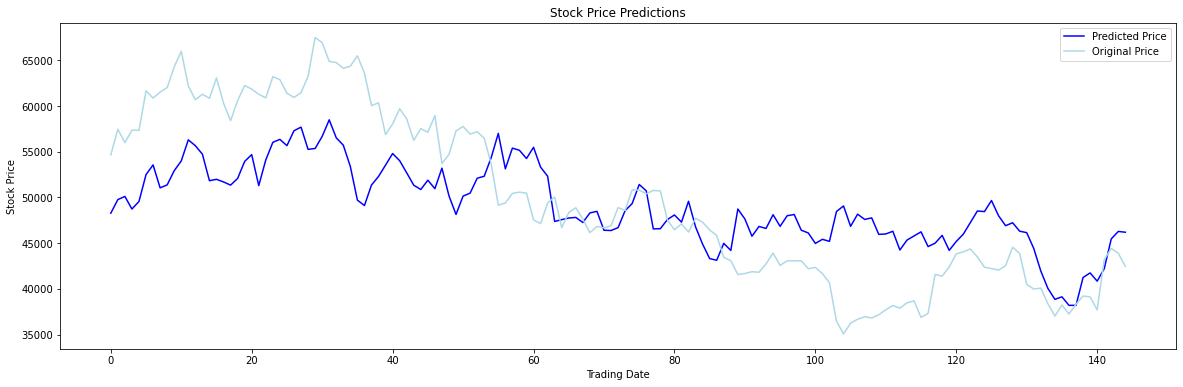

In [16]:
plt.plot(y_pred, color = 'blue', label = 'Predicted Price')
plt.plot(y_test, color = 'lightblue', label = 'Original Price')
 
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(np.arange(0, 160, step=20))  
plt.ylabel('Stock Price')
 
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

# Prediction

In [36]:
predict_feature

Compound   Volume  FundingRate  Bitcoin_SVI  Cryptocurrency_SVI  \
0  0.525319  0.47366     0.183333     0.137817            0.249198   

   No. of Active Addresses  No. of Unique Addresses  Transactions  \
0                 0.548707                 0.539364      0.502639   

   Compound_lag_1  Volume_lag_1  ...  No. of Unique Addresses_lag_4  \
0         0.52765      0.469431  ...                       0.438526   

   Transactions_lag_4  Compound_lag_5  Volume_lag_5  FundingRate_lag_5  \
0            0.414387        0.529636       0.46585           0.166667   

   Bitcoin_SVI_lag_5  Cryptocurrency_SVI_lag_5  No. of Active Addresses_lag_5  \
0           0.169315                  0.201845                       0.440803   

   No. of Unique Addresses_lag_5  Transactions_lag_5  
0                       0.460792            0.449825  

[1 rows x 48 columns]

In [37]:
# Process the data for LSTM
testX = np.array(predict_feature)
predict_feature = testX.reshape(predict_feature.shape[0], 1, predict_feature.shape[1])

In [38]:
predicted_price = lstm.predict(predict_feature)

In [39]:
predicted_price[0][0]

44302.188

Reality: Bitcoin currency had a close price of USD 39,137.61 on 4 Mar 2022.

Prediced: Our model predicted the currency to have a close price of USD 44,302.188 on 4 Mar 2022.